In [9]:
!sh lighttrack_install.sh

fatal: destination path 'lighttrack' already exists and is not an empty directory.
#python3.5 setup.py build_ext --inplace
python setup.py build_ext --inplace
running build_ext
rm -rf build
running install
/home/jovyan/.imgenv-compassionate-elgamal-0/lib/python3.7/site-packages/setuptools/command/install.py:37: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  setuptools.SetuptoolsDeprecationWarning,
/home/jovyan/.imgenv-compassionate-elgamal-0/lib/python3.7/site-packages/setuptools/command/easy_install.py:159: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  EasyInstallDeprecationWarning,
running bdist_egg
running egg_info
writing manifest file 'torchlight.egg-info/SOURCES.txt'
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/torchlight
byte-compiling build/bdist.linux-x86_64/egg/torchlig

In [17]:
!git clone https://github.com/Eighonet/muSSP_python

Cloning into 'muSSP_python'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 123 (delta 37), reused 104 (delta 28), pack-reused 0
Receiving objects: 100% (123/123), 2.73 MiB | 1.89 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [20]:
!pip install networkx

  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)


In [2]:
!pip install tensorflow==1.13.1

  Using cached tensorflow-1.13.1-cp37-cp37m-manylinux1_x86_64.whl (92.6 MB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard-1.13.1-py3-none-any.whl (3.2 MB)
  Using cached tensorflow_estimator-1.13.0-py2.py3-none-any.whl (367 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached mock-5.0.2-py3-none-any.whl (30 kB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0


In [3]:
!pip install cython opencv-python pillow matplotlib

In [213]:
!pip install transformers
!pip install ffmpeg moviepy
!pip install speechpy
!pip install lightgbm
!pip install setproctitle

     |████████████████████████████████| 7.2 MB 940 kB/s            
     |████████████████████████████████| 1.3 MB 11.7 MB/s            
  Using cached huggingface_hub-0.15.1-py3-none-any.whl (236 kB)
  Using cached tokenizers-0.13.3-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)


In [1]:
import os
from os import listdir
import shutil
import json
import time
from tqdm import tqdm

import pandas as pd
import numpy as np
import cv2 as cv
import torch
from torchvision.io import read_video
from torchvision.utils import draw_bounding_boxes
import pickle

import matplotlib.pyplot as plt

In [2]:
filmnames = [file for file in listdir(f'../DVUChallenge/dev_dataset/movie_knowledge_graph/') if '.' not in file]
filmnames

['Bagman',
 'Manos',
 'Valkaama',
 'honey',
 'The_Illusionist',
 'time_expired',
 'shooters',
 'SuperHero',
 'Huckleberry_Finn',
 'Road_To_Bali',
 'sophie',
 'Nuclear_Family',
 'The_Big_Something',
 'spiritual_contact']

### Reading scene graphs

In [5]:
from general_utils import get_scene_graphs

scene_graphs = get_scene_graphs(filmnames, scene_graph_path)

  0%|          | 0/14 [00:00<?, ?it/s]

Bagman



  7%|▋         | 1/14 [00:00<00:01,  9.18it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-14.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-15.json
../D


100%|██████████| 44/44 [00:00<00:00, 537.78it/s]


../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-14.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-15.json
../DVUChallenge/dev


  0%|          | 0/45 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-4.json


 21%|██▏       | 3/14 [00:00<00:01, 10.45it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-14.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-15.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-16.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-17.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-18.json
../DVUChallenge/dev_dataset/scenes_know


  0%|          | 0/23 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-6.json


100%|██████████| 23/23 [00:00<00:00, 412.96it/s]


../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-14.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-15.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-16.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-17.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-18.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-19.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-20.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-21.json
../DVUChallen


  0%|          | 0/47 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-13.json
../DVUChallenge/dev_d


 36%|███▌      | 5/14 [00:00<00:00, 11.24it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-29.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-30.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-31.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-32.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-33.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-34.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-35.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-36.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-37.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-38.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-39.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-40.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-41.json
../DVUChalle


  0%|          | 0/75 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_exp


100%|██████████| 75/75 [00:00<00:00, 377.33it/s]


../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-64.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-65.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-66.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-67.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-68.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-69.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-70.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-71.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-72.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-73.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-74.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-75.json
shooters



 50%|█████     | 7/14 [00:00<00:00,  9.96it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-14.json
../DVUChallenge/dev_dataset/scenes_knowledg


  0%|          | 0/10 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-4.json


100%|██████████| 10/10 [00:00<00:00, 670.46it/s]


../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-10.json
Huckleberry_Finn



  0%|          | 0/59 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-6.json


100%|██████████| 59/59 [00:00<00:00, 766.78it/s]


../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-14.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-15.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-16.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-17.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-18.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-19.json
..


  0%|          | 0/47 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_

 71%|███████▏  | 10/14 [00:00<00:00, 12.43it/s]

sophie



  0%|          | 0/45 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-14.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-15.json
../D

100%|██████████| 45/45 [00:00<00:00, 675.31it/s]


../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-36.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-37.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-38.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-39.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-40.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-41.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-42.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-43.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-44.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-45.json
Nuclear_Family



100%|██████████| 16/16 [00:00<00:00, 858.83it/s]


../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-13.json
../DVUChallenge/dev_dataset/scenes


  0%|          | 0/66 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-13.

 93%|█████████▎| 13/14 [00:01<00:00, 13.70it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-64.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-65.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-66.json
spiritual_contact



  0%|          | 0/38 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-13.

100%|██████████| 14/14 [00:01<00:00, 12.44it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-37.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-38.json


In [6]:
with open('../DVUChallenge/dev_dataset/vocab.dvu.json', 'r') as f:
    scene_vocab = json.load(f)

### Primary pose extraction

In [7]:
scene_graph_path = f'../DVUChallenge/dev_dataset/scenes_knowledge_graphs/'

shots_data_path = f'../DVUChallenge/dev_dataset/movie.shots/'

dec_rate = 50

### Pose heatmap compression

In [8]:
from general_utils import pose_heatmap_compression

###  EVG trajsim tracking

In [208]:
scene_graph_path = f'../DVUChallenge/dev_dataset/scenes_knowledge_graphs/'

shots_data_path = f'../DVUChallenge/dev_dataset/movie.shots/'

dec_rate = 50

#### 0. Reading pose trj data

In [209]:
tracking_data_c = {filmname:[] for filmname in filmnames}

for filmname in tqdm(filmnames):
    scene_shots = [file for file in listdir(shots_data_path) if filmname in file]
    for i in range(len(scene_shots)):
        scene_number = i+1
        with open(f'lighttrack/data/demo/jsons/{filmname}_{scene_number}_dr_{dec_rate}_compressed.json', 'r') as f:
            tracking_data_c[filmname].append(json.load(f)) 

100%|██████████| 14/14 [00:02<00:00,  5.42it/s]


Converting pose bboxes into the same format as face bboxes: 

In [7]:
for filmname in tqdm(filmnames):
    for i in tqdm(range(len(tracking_data_c[filmname]))): #scene
        for j in range(len(tracking_data_c[filmname][i])): #frame
            for k in range(len(tracking_data_c[filmname][i][j]['candidates'])):
                pose_box = np.array(tracking_data_c[filmname][i][j]['candidates'][k]['det_bbox'])
                if len(pose_box) > 0: 
                    pose_box[2:] = pose_box[2:] + pose_box[:2]
                tracking_data_c[filmname][i][j]['candidates'][k]['det_bbox'] = pose_box

100%|██████████| 67/67 [00:00<00:00, 1438.74it/s]

100%|██████████| 44/44 [00:00<00:00, 1612.70it/s]

100%|██████████| 23/23 [00:00<00:00, 570.00it/s]

100%|██████████| 66/66 [00:00<00:00, 1533.10it/s]

100%|██████████| 20/20 [00:00<00:00, 1020.30it/s]

100%|██████████| 10/10 [00:00<00:00, 1182.86it/s]

100%|██████████| 59/59 [00:00<00:00, 1096.94it/s]

100%|██████████| 45/45 [00:00<00:00, 2826.35it/s]

100%|██████████| 16/16 [00:00<00:00, 1690.19it/s]

100%|██████████| 66/66 [00:00<00:00, 1449.70it/s]

100%|██████████| 14/14 [00:00<00:00, 27.65it/s]


#### 1. Extracting faces from the videos

Converting to json serializable:

Why not to save?

Why not to load?

In [9]:
with open(f'../face_tracking_dr_{dec_rate}.json', 'r') as f:
    face_rec_res_d = json.load(f)

#### 2. Reading decimated videos

In [ ]:
%load_ext autoreload
%autoreload 2

from general_utils import get_videos

videos = get_videos(filmnames, shots_data_path, dec_rate)

  0%|          | 0/67 [00:00<?, ?it/s]/home/jovyan/.imgenv-compassionate-elgamal-0/lib/python3.7/site-packages/torchvision/io/video.py:162: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")

 43%|████▎     | 32/75 [00:15<00:23,  1.84it/s]

### Brief visualization test

In [ ]:
%load_ext autoreload
%autoreload 2

from visual_utils import show, random_bboxes

['Valkaama', 'The_Big_Something', 'sophie']
torch.Size([3, 720, 1280])
torch.Size([3, 358, 640])


/home/jovyan/_Thesis/bl_Graphen/visual_utils.py:39: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  for j in range(len(pose_data_raw))\


tensor([[550.4292,  88.2670, 768.5303, 363.1829]])
torch.Size([3, 582, 1366])


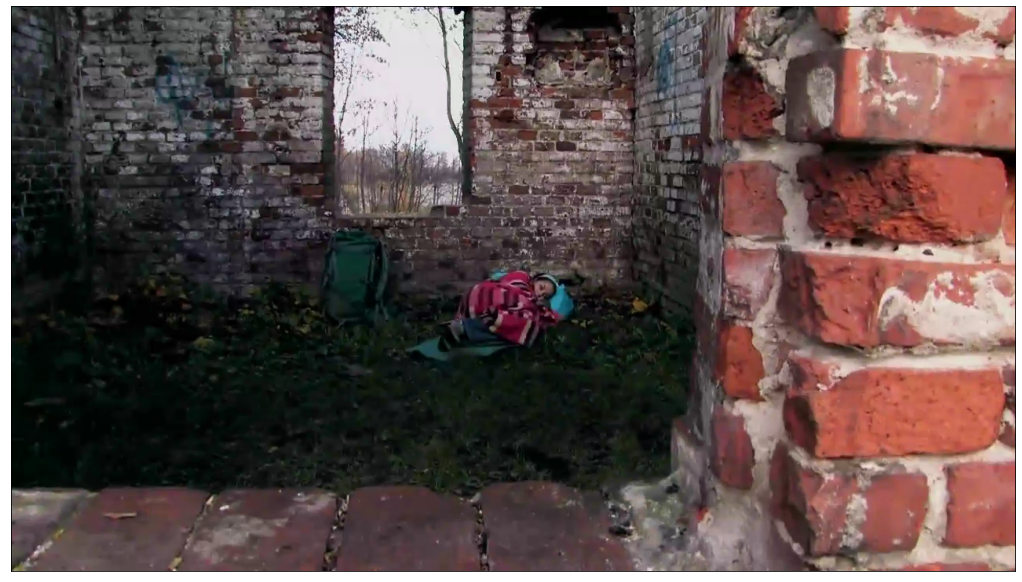

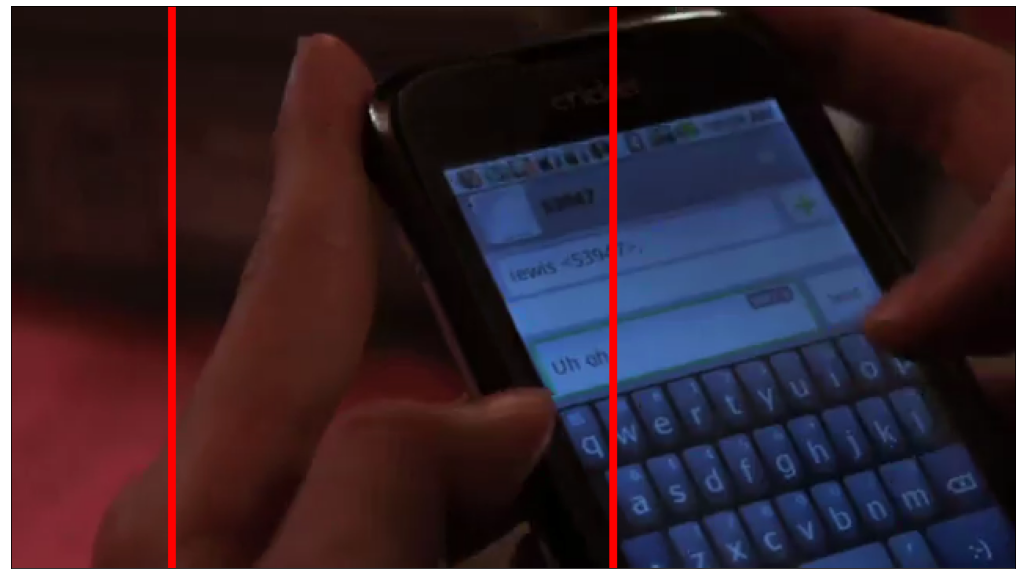

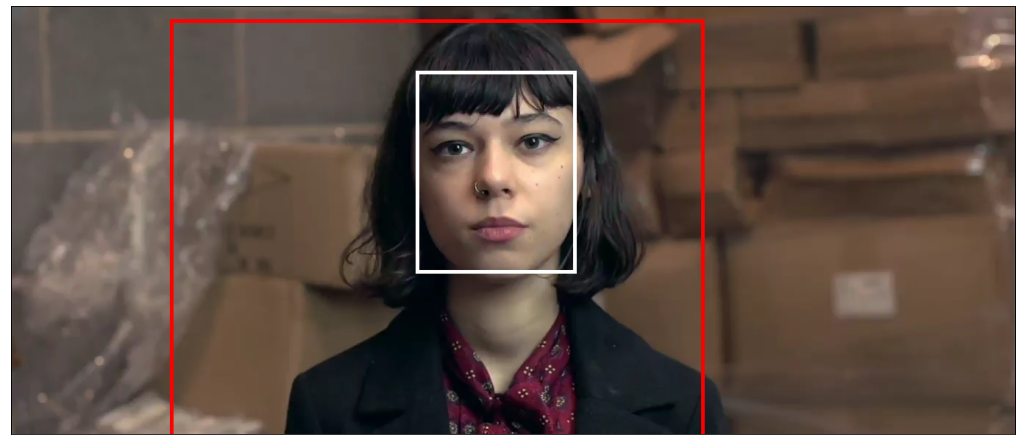

In [11]:
random_bboxes(videos, face_rec_res_d, tracking_data_c)

## Tracking #2

Key entitites up to this moment:
    
    - videos
    
    - face_rec_res_d
    
    - tracking_data_c
    

Delete the confidence from the bbox data:

In [ ]:
confidence_threhsold = 0.995

for filmname in filmnames:
    for s_idx in tqdm(range(len(face_rec_res_d[filmname]))):
        for f_idx in range(len(face_rec_res_d[filmname][s_idx])):
            if len(face_rec_res_d[filmname][s_idx][f_idx]) > 0:
                names = face_rec_res_d[filmname][s_idx][f_idx][0]
                bboxes = face_rec_res_d[filmname][s_idx][f_idx][1]
                
                face_rec_res_d[filmname][s_idx][f_idx][0] = [name for bbox,name in zip(bboxes,names) if bbox[4] > confidence_threhsold]
                face_rec_res_d[filmname][s_idx][f_idx][1] = [bbox[0:4] for bbox in bboxes if bbox[4] > confidence_threhsold]
            else:
                face_rec_res_d[filmname][s_idx][f_idx] = [[], []]

Приводим к одному формату выходные данные трекинга поз и распознавания лиц.

In [ ]:
pose_rec_res_d = {filmname:[] for filmname in filmnames}

for filmname in filmnames:
    for scene_index in tqdm(range(len(tracking_data_c[filmname]))):
        
        pose_rec_res_d[filmname].append([])
        
        for frame_index in range(len(tracking_data_c[filmname][scene_index])):
            names, bboxes, keypoints, heatmaps = [], [], [], []
            for entity in tracking_data_c[filmname][scene_index][frame_index]['candidates']:            
                if entity['det_score'] > 0.5:
                    names.append(entity['track_id'])
                    bboxes.append(entity['det_bbox'].tolist())
                    keypoints.append(entity['pose_keypoints_2d'])
                    heatmaps.append(entity['heatmap'])
                    
            pose_rec_res_d[filmname][scene_index].append([names, bboxes, keypoints, heatmaps])

In [201]:
def flat(data):
    return [item for sublist in data for item in sublist]

pose_data_t, face_data_t = {filmname:[] for filmname in filmnames}, {filmname:[] for filmname in filmnames} 

for filmname in filmnames:
    pose_f_data, face_f_data = [], []
    for s_idx in tqdm(range(len(pose_rec_res_d[filmname]))):
        pose_s_ids = set(flat([pose_rec_res_d[filmname][s_idx][i][0] for i in range(len(pose_rec_res_d[filmname][s_idx]))]))
        face_s_names = set(flat([face_rec_res_d[filmname][s_idx][i][0] for i in range(len(face_rec_res_d[filmname][s_idx]))]))
        
        pose_s_data, face_s_data = {pose_id:[] for pose_id in pose_s_ids}, {face_name:[] for face_name in face_s_names}
        
        for f_idx in range(len(pose_rec_res_d[filmname][s_idx])):

            frame_face_data = face_rec_res_d[filmname][s_idx][f_idx]
            for i in range(len(frame_face_data[0])):
                current_name = frame_face_data[0][i]
                current_bbox = frame_face_data[1][i]
                for face_name in face_s_names:
                    if current_name == face_name:
                        face_s_data[face_name].append(current_bbox)
                    else:
                        face_s_data[face_name].append([])
                        
            frame_pose_data = pose_rec_res_d[filmname][s_idx][f_idx]
            for i in range(len(frame_pose_data[0])):
                current_id = frame_pose_data[0][i]
                current_bbox = frame_pose_data[1][i]
                current_pose = frame_pose_data[2][i]
                current_heatmap = frame_pose_data[3][i]
                
                for pose_id in pose_s_ids:
                    if current_id == pose_id:
                        pose_s_data[pose_id].append([current_bbox, current_pose, current_heatmap])
                    else:
                        pose_s_data[pose_id].append([[], [], []])                
        
        pose_f_data.append(pose_s_data)
        face_f_data.append(face_s_data)
    pose_data_t[filmname] = pose_f_data
    face_data_t[filmname] = face_f_data

100%|██████████| 38/38 [00:00<00:00, 44.51it/s]


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

def get_centroid_distance(face_box, pose_box):
    face_box_centroid = (face_box[0] + face_box[2])/2, (face_box[1] + face_box[3])/2
    pose_box_centroid = (2*pose_box[0] + pose_box[2])/2, (2*pose_box[1] + pose_box[3])/2

    return euclidean_distances([face_box_centroid, pose_box_centroid])[0][1]

def compute_distance(pose_entity, face_entity):

    nonzero_face, nonzero_pose =\
        [True if len(frame)>0 else False for frame in face_entity],\
        [True if len(frame)>0 else False  for frame in pose_entity]

    intersection_mask = np.logical_and(nonzero_face, nonzero_pose)

    face_bboxes, pose_bboxes = np.array(face_entity)[intersection_mask], [item['bbox'] for item in np.array(pose_entity)[intersection_mask]]

    if len(face_bboxes) > 0: 
        dist = np.mean([get_centroid_distance(face_box, pose_box) for face_box, pose_box in zip(face_bboxes,pose_bboxes)]) 
    else:
        dist = 100500

    return dist

## actual matching of poses and faces
face_2_pose = {entity:[] for entity in trajs}

for i, pose_entity in enumerate(pose_trajs):
    candidate, min_dist = -1, 100500
    for face_entity in trajs:

        dist = compute_distance(pose_trajs[pose_entity], trajs[face_entity])

        if dist < min_dist:
            min_dist = dist
            candidate = face_entity

    if candidate != -1:
        face_2_pose[candidate].append(i)


def get_centroid_distance_wc(face_box, pose_box):
    face_box_centroid = (face_box[0] + face_box[2])/2, (face_box[1] + face_box[3])/2
    pose_box_centroid = (pose_box[0] + pose_box[2])/2, (pose_box[1] + pose_box[3])/2

    return euclidean_distances([face_box_centroid, pose_box_centroid])[0][1]

def get_closest_bbox(face_bbox, pose_bboxes):
    index, min_dist = -1, 100500
    for i, pose_bbox in enumerate(pose_bboxes):

        dist = get_centroid_distance_wc(face_bbox, pose_bbox)
#        print(f'From {face_bbox} to {pose_bbox} ({i}): \n {dist}')

        if dist < min_dist:
            min_dist = dist
            index = i
    return index

for i, frame in enumerate([i for i in range(len(scene_frames))]):
    image_path = f'lighttrack/data/demo//{filmname}_{scene_number}_dr_{dec_rate}/frame{"".join(["0" for i in range(5-len(str(frame)))])}{frame}.jpg'
    e = read_image(image_path)

    for face_entity in trajs:

        pose_entities_face = face_2_pose[face_entity] 
        pose_bbox = torch.tensor([0,0,0,0])
        pose_bboxes, pose_heatmaps = [], []


        if len(trajs[face_entity][i]) > 0:
            face_bbox = torch.tensor(trajs[face_entity][i], dtype=torch.float)
#            print('Related pose entities:', pose_entities_face)
        else:
            face_bbox = torch.tensor([0,0,0,0])


        for pose_entity_face in pose_entities_face:
            if len(pose_trajs[pose_entity_face][i]) > 0:
                pose_bbox = torch.tensor(pose_trajs[pose_entity_face][i]['bbox'])
                pose_bbox[[2,3]] = pose_bbox[[2,3]] + pose_bbox[[0,1]]

#                print(str(face_entity), pose_bbox)
                pose_heatmaps.append(pose_trajs[pose_entity_face][i]['heatmap'])
                pose_bboxes.append(pose_bbox)

        index = get_closest_bbox(face_bbox, pose_bboxes)
#        print(f'Closest entity index: {index}')
        if index != -1:
            trajs[face_entity][i] = {'face_bbox':trajs[face_entity][i], 'pose_heatmap':pose_heatmaps[index]}
            bboxes = torch.vstack([face_bbox, pose_bboxes[index]])
        else:
            trajs[face_entity][i] = {'face_bbox':trajs[face_entity][i], 'pose_heatmap':[]}
            bboxes = torch.vstack([face_bbox, torch.tensor([0,0,0,0])])
        e = draw_bounding_boxes(e, bboxes, width=5,
                                     colors=[bbox_color_entity_dict[face_entity] for bbox in bboxes],
                                     labels=[str(face_entity) for bbox in bboxes], font_size=538)


In [200]:
%debug

> /tmp/ipykernel_81/1646139564.py(30)<module>()
     28                 current_id = frame_face_data[0][i]
     29                 current_bbox = frame_face_data[1][i]
---> 30                 current_pose = frame_face_data[2][i]
     31                 current_heatmap = frame_face_data[3][i]
     32 

ipdb> frame_face_data[2]
*** IndexError: list index out of range
ipdb> frame_face_data
[['jack'], [[782.5262947753072, 212.55833160877228, 1053.4988804459572, 557.631234228611]]]
ipdb> exit


In [191]:
pose_rec_res_d['Bagman'][4]

[[[], [], [], []],
 [[], [], [], []],
 [[], [], [], []],
 [[], [], [], []],
 [[], [], [], []],
 [[], [], [], []],
 [[], [], [], []],
 [[0, 1],
  [[745.3633657602163,
    508.5187800480769,
    781.3633657602163,
    625.5187800480769],
   [79.37610684908354,
    489.76883638822113,
    136.37610684908356,
    648.7688363882212]],
  [[763.792,
    607.539,
    1.101,
    763.792,
    588.414,
    0.812,
    761.812,
    567.297,
    0.901,
    766.562,
    567.297,
    0.778,
    765.375,
    587.617,
    0.73,
    761.812,
    605.547,
    0.899,
    766.562,
    548.172,
    0.689,
    759.042,
    548.57,
    0.678,
    757.458,
    535.023,
    1.136,
    765.771,
    535.422,
    0.869,
    773.292,
    545.383,
    0.564,
    772.896,
    546.578,
    0.539,
    762.208,
    533.43,
    1.065,
    766.958,
    527.055,
    1.077,
    766.958,
    517.492,
    1.085],
   [121.493,
    635.883,
    0.532,
    119.34,
    614.32,
    0.864,
    117.726,
    578.203,
    1.103,
    10

In [196]:
face_rec_res_d['Bagman'][4]

[[[], []],
 [[], []],
 [[], []],
 [[], []],
 [[], []],
 [[], []],
 [[], []],
 [[], []],
 [[], []],
 [[], []],
 [[], []],
 [[], []],
 [[], []],
 [[], []],
 [['jack'],
  [[489.8134809732437,
    82.92980280518532,
    659.7348870933056,
    353.6096388399601]]],
 [[], []],
 [[], []],
 [[], []],
 [[], []],
 [[], []],
 [[], []],
 [[], []],
 [['jack'],
  [[683.1283290460706,
    165.88464951515198,
    746.2127916812897,
    270.062715113163]]],
 [['jack'],
  [[645.5764262750745,
    147.23127794265747,
    718.7553857415915,
    249.4736768603325]]],
 [[], []],
 [['gus_boulis'],
  [[491.1052735596895,
    128.16496102511883,
    581.8049572259188,
    288.95200341939926]]],
 [['tom_delay'],
  [[473.5001839399338,
    177.51027831435204,
    584.759480535984,
    335.5331431813538]]],
 [['mike', 'gus_boulis'],
  [[254.8029379323125,
    229.30285014212132,
    296.7200824543834,
    287.01092710345984],
   [1046.0283987224102,
    165.61700677871704,
    1072.3693721592426,
    203.81375737

In [23]:
embeddings = dict()

for filmname in tqdm(filmnames):
    
    scene_segments = [file for file in listdir(shots_data_path) if filmname in file]

    for i in tqdm(range(len(scene_segments))):

        with open(f'lighttrack/data/demo/jsons/{filmname}_{scene_number}_dr_{dec_rate}_compressed.json', 'r') as f:
            pose_tracking_data = json.load(f) 

        # face tracking

        tracker = mfacenetTracking()

        tracker.get_facebank_embeddings(movie_data_path) 

        scene_frames = [cv.imread(f'lighttrack/data/demo//{filmname}_{scene_number}_dr_{dec_rate}/' + frame)\
                        for frame in listdir(f'lighttrack/data/demo//{filmname}_{scene_number}_dr_{dec_rate}/')]

        face_rec_res = []

        for i, frame in tqdm(enumerate(scene_frames)):
            try:
                data = tracker.process_image(frame)
            except:
                data = []
            face_rec_res.append(data)


        # merging trajectories
        print('Merging trajectories')

        face_rec_res_c = []
        for frame_results in face_rec_res:
            frame_dict = {}
            if len(frame_results) > 0:
                for i, entity in tqdm(enumerate(frame_results[0])):
                    if entity != '':
                        if entity not in frame_results:
                            frame_dict[entity] = {'face_bbox':frame_results[1][i][:4], 'face_conf':frame_results[1][i][4]}
                        else:
                            if frame_dict[entity]['conf'] < frame_results[1][i][5]:
                                frame_dict[entity] = {'face_bbox':frame_results[1][i][:4], 'face_conf':frame_results[1][i][4]}
            face_rec_res_c.append(frame_dict)

        ## obtain list of all known entities
        entities_raw = [face_recognition_results[i][0] for i in range(len(face_recognition_results)) if len(face_recognition_results[i]) > 0]

        entities = set([item for sublist in entities_raw for item in sublist])
        if '' in entities:
            entities.remove('')

        ## reorganization of face detection results in the format 'entity:[frame_0:[...], frame_1:[...], ..., ]'  
        trajs = dict()
        for entity in tqdm(entities):
            trajs[entity] = []
            for i, frame_results in enumerate(face_rec_res_c):
                if entity in frame_results:
                    trajs[entity].append(frame_results[entity]['face_bbox'])
                else:
                    trajs[entity].append([])

        ## obtain list of all recognized pose entities
        pose_entities = []

        for i in tqdm(range(len(pose_tracking_data))):
            recognized_poses = pose_tracking_data[i]['candidates']
            for j in range(len(recognized_poses)):
                if recognized_poses[j]['det_score'] > 0:
                    pose_entities.append(recognized_poses[j]['track_id'])

        pose_entities = set(pose_entities)

        ## reorganization of pose recognition results in the format 'entity:[frame_0:[...], frame_1:[...], ..., ]'

        pose_trajs = dict()
        for entity in tqdm(pose_entities):
            pose_trajs[entity] = []
            for i, frame_results in enumerate(pose_tracking_data):
                ids = [candidate['track_id'] for candidate in frame_results['candidates'] if candidate['det_score'] > 0]

                if entity in ids:
                    index = ids.index(entity)
                    pose_trajs[entity].append({'bbox': frame_results['candidates'][index]['det_bbox'],
                                               'heatmap': frame_results['candidates'][index]['heatmap']}) #  frame_results['candidates'][index]['heatmap']
                else:
                    pose_trajs[entity].append([])

        from sklearn.metrics.pairwise import euclidean_distances

        def get_centroid_distance(face_box, pose_box):
            face_box_centroid = (face_box[0] + face_box[2])/2, (face_box[1] + face_box[3])/2
            pose_box_centroid = (2*pose_box[0] + pose_box[2])/2, (2*pose_box[1] + pose_box[3])/2

            return euclidean_distances([face_box_centroid, pose_box_centroid])[0][1]

        def compute_distance(pose_entity, face_entity):

            nonzero_face, nonzero_pose =\
                [True if len(frame)>0 else False for frame in face_entity],\
                [True if len(frame)>0 else False  for frame in pose_entity]

            intersection_mask = np.logical_and(nonzero_face, nonzero_pose)

            face_bboxes, pose_bboxes = np.array(face_entity)[intersection_mask], [item['bbox'] for item in np.array(pose_entity)[intersection_mask]]

            if len(face_bboxes) > 0: 
                dist = np.mean([get_centroid_distance(face_box, pose_box) for face_box, pose_box in zip(face_bboxes,pose_bboxes)]) 
            else:
                dist = 100500

            return dist

        ## actual matching of poses and faces
        face_2_pose = {entity:[] for entity in trajs}

        for i, pose_entity in enumerate(pose_trajs):
            candidate, min_dist = -1, 100500
            for face_entity in trajs:

                dist = compute_distance(pose_trajs[pose_entity], trajs[face_entity])

                if dist < min_dist:
                    min_dist = dist
                    candidate = face_entity

            if candidate != -1:
                face_2_pose[candidate].append(i)


        def get_centroid_distance_wc(face_box, pose_box):
            face_box_centroid = (face_box[0] + face_box[2])/2, (face_box[1] + face_box[3])/2
            pose_box_centroid = (pose_box[0] + pose_box[2])/2, (pose_box[1] + pose_box[3])/2

            return euclidean_distances([face_box_centroid, pose_box_centroid])[0][1]

        def get_closest_bbox(face_bbox, pose_bboxes):
            index, min_dist = -1, 100500
            for i, pose_bbox in enumerate(pose_bboxes):

                dist = get_centroid_distance_wc(face_bbox, pose_bbox)
        #        print(f'From {face_bbox} to {pose_bbox} ({i}): \n {dist}')

                if dist < min_dist:
                    min_dist = dist
                    index = i
            return index

        for i, frame in enumerate([i for i in range(len(scene_frames))]):
            image_path = f'lighttrack/data/demo//{filmname}_{scene_number}_dr_{dec_rate}/frame{"".join(["0" for i in range(5-len(str(frame)))])}{frame}.jpg'
            e = read_image(image_path)

            for face_entity in trajs:

                pose_entities_face = face_2_pose[face_entity] 
                pose_bbox = torch.tensor([0,0,0,0])
                pose_bboxes, pose_heatmaps = [], []


                if len(trajs[face_entity][i]) > 0:
                    face_bbox = torch.tensor(trajs[face_entity][i], dtype=torch.float)
        #            print('Related pose entities:', pose_entities_face)
                else:
                    face_bbox = torch.tensor([0,0,0,0])


                for pose_entity_face in pose_entities_face:
                    if len(pose_trajs[pose_entity_face][i]) > 0:
                        pose_bbox = torch.tensor(pose_trajs[pose_entity_face][i]['bbox'])
                        pose_bbox[[2,3]] = pose_bbox[[2,3]] + pose_bbox[[0,1]]

        #                print(str(face_entity), pose_bbox)
                        pose_heatmaps.append(pose_trajs[pose_entity_face][i]['heatmap'])
                        pose_bboxes.append(pose_bbox)

                index = get_closest_bbox(face_bbox, pose_bboxes)
        #        print(f'Closest entity index: {index}')
                if index != -1:
                    trajs[face_entity][i] = {'face_bbox':trajs[face_entity][i], 'pose_heatmap':pose_heatmaps[index]}
                    bboxes = torch.vstack([face_bbox, pose_bboxes[index]])
                else:
                    trajs[face_entity][i] = {'face_bbox':trajs[face_entity][i], 'pose_heatmap':[]}
                    bboxes = torch.vstack([face_bbox, torch.tensor([0,0,0,0])])
                e = draw_bounding_boxes(e, bboxes, width=5,
                                             colors=[bbox_color_entity_dict[face_entity] for bbox in bboxes],
                                             labels=[str(face_entity) for bbox in bboxes], font_size=538)
        #    print('---------------')


        # Emotion recognition
        print('Emotion recognition')

        from copy import deepcopy

        trajs_ext = deepcopy(trajs)
        for entity in trajs_ext:
            trajs_ext[entity] = {'tracking': trajs_ext[entity], 'faces':[], 'em_embs':[], 'pose_heatmaps':[]}

        for entity in tqdm(trajs_ext):
            for i in range(len(trajs_ext[entity]['tracking'])):
                frame = scene_frames[i]
                if len(trajs_ext[entity]['tracking'][i]['face_bbox']) > 0:
                    # faces
                    face_bbox = trajs_ext[entity]['tracking'][i]['face_bbox'].astype('int')
                    crooped_face = crop(torch.tensor(scene_frames[i].transpose(2, 0, 1)),\
                                        top=bbox[1], left=bbox[0], height=bbox[3]-bbox[1], width=bbox[2]-bbox[0])
                    trajs_ext[entity]['faces'].append(crooped_face)

                    # emotion embeddings
                    emotion_embedding = fer.extract_features(crooped_face.numpy().transpose(1,2,0))
                    trajs_ext[entity]['em_embs'].append(emotion_embedding)

                if len(trajs_ext[entity]['tracking'][i]['pose_heatmap']) > 0:
                    trajs_ext[entity]['pose_heatmaps'].append(trajs_ext[entity]['tracking'][i]['pose_heatmap'])


        for entity in trajs_ext:
            trajs_ext[entity]['em_embs'] = np.mean(trajs_ext[entity]['em_embs'], 0)
            if trajs_ext[entity]['em_embs'].shape == ():
                trajs_ext[entity]['em_embs'] = np.zeros((1, 1280))

        for entity in trajs_ext:
            trajs_ext[entity]['pose_heatmaps'] = np.mean(trajs_ext[entity]['pose_heatmaps'], 0)
            if trajs_ext[entity]['pose_heatmaps'].shape == ():
                trajs_ext[entity]['pose_heatmaps'] = np.zeros(30)

        for entity in trajs_ext:
            print(entity, trajs_ext[entity]['pose_heatmaps'].shape)
            print(entity, trajs_ext[entity]['em_embs'].shape)

        for entity in trajs_ext:
            trajs_ext[entity]['em_embs'] =  trajs_ext[entity]['em_embs'].tolist()
            trajs_ext[entity]['pose_heatmaps'] = trajs_ext[entity]['pose_heatmaps'].tolist()    

        embeddings[filmname].append(trajs_ext)

  0%|          | 0/14 [00:00<?, ?it/s]


NameError: name 'mfacenetTracking' is not defined

### So it begins

In [214]:
from transformers import AutoImageProcessor, ViTModel, AutoTokenizer, BertModel
import torch

A (scene-level audio) feature:

In [591]:
import scipy.io.wavfile as wav
import numpy as np
import speechpy
import moviepy.editor as mp

import os

In [590]:
for file in tqdm(listdir(shots_data_path)):
    print(shots_data_path + file)
    shot = mp.VideoFileClip(shots_data_path + file)
    shot.audio.write_audiofile(f"extracted_scene_audio/{file.split('.')[0]}.wav")



                                                                     


  0%|          | 0/622 [00:00<?, ?it/s]                             

../DVUChallenge/dev_dataset/movie.shots/Bagman-1.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_P


                                     



                                                         
  0%|          | 0/14 [3:38:26<?, ?it/s]



  0%|          | 0/622 [00:02<?, ?it/s]61:23:11, 77.84s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-1.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2867 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 163/2867 [00:00<00:01, 1624.65it/s, now=None]

chunk:  12%|█▏        | 348/2867 [00:00<00:01, 1754.27it/s, now=None]

chunk:  18%|█▊        | 525/2867 [00:00<00:01, 1761.03it/s, now=None]

chunk:  25%|██▍       | 708/2867 [00:00<00:01, 1786.66it/s, now=None]

chunk:  31%|███       | 887/2867 [00:00<00:01, 1774.14it/s, now=None]

chunk:  37%|███▋      | 1071/2867 [00:00<00:01, 1775.02it/s, now=None]

chunk:  44%|████▍     | 1257/2867 [00:00<00:00, 1799.92it/s, now=None]

chunk:  50%|█████     | 1438/2867 [00:00<00:00, 1675.70it/s, now=None]

chunk:  57%|█████▋    | 1623/2867 [00:00<00:00, 1725.38it/s, now=None]

chunk:  63%|██████▎   | 1799/2867 [00:01<00:00, 1734.11it/s, now=None]

chunk:  69%|██████▉   | 1983/2867 [00:01<00:00, 1763.45it/s, now=None]

chunk:  75%|███████▌  | 2161/2867 [00:01<00:00, 1755.71it/s, now=None]

chunk:  82%|████████▏ | 2345/2867 [00:01<00:00, 1779.45it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-10.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:38:31<?, ?it/s]



  0%|          | 1/622 [00:07<53:54,  5.21s/it], 78.02s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-10.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1125 [00:00<?, ?it/s, now=None]

chunk:  15%|█▍        | 167/1125 [00:00<00:00, 1669.76it/s, now=None]

chunk:  30%|██▉       | 335/1125 [00:00<00:00, 1673.69it/s, now=None]

chunk:  45%|████▌     | 510/1125 [00:00<00:00, 1700.92it/s, now=None]

chunk:  61%|██████    | 685/1125 [00:00<00:00, 1719.95it/s, now=None]

chunk:  77%|███████▋  | 866/1125 [00:00<00:00, 1751.22it/s, now=None]

chunk:  93%|█████████▎| 1043/1125 [00:00<00:00, 1756.09it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:38:32<?, ?it/s]



  0%|          | 2/622 [00:09<46:47,  4.53s/it], 78.07s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-11.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:38:35<?, ?it/s]



  0%|          | 2/622 [00:12<46:47,  4.53s/it], 78.17s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-11.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1655 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 180/1655 [00:00<00:00, 1792.08it/s, now=None]

chunk:  22%|██▏       | 360/1655 [00:00<00:00, 1775.04it/s, now=None]

chunk:  43%|████▎     | 706/1655 [00:00<00:00, 2537.36it/s, now=None]

chunk:  58%|█████▊    | 961/1655 [00:00<00:00, 2181.74it/s, now=None]

chunk:  72%|███████▏  | 1186/1655 [00:00<00:00, 2023.69it/s, now=None]

chunk:  88%|████████▊ | 1457/1655 [00:00<00:00, 2228.26it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:38:37<?, ?it/s]



  0%|          | 3/622 [00:13<45:19,  4.39s/it], 78.22s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-12.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:38:39<?, ?it/s]



  0%|          | 3/622 [00:16<45:19,  4.39s/it], 78.32s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-12.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/707 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 36/707 [00:00<00:01, 354.47it/s, now=None]

chunk:  29%|██▉       | 204/707 [00:00<00:00, 1116.21it/s, now=None]

chunk:  54%|█████▍    | 381/707 [00:00<00:00, 1410.54it/s, now=None]

chunk:  79%|███████▉  | 557/707 [00:00<00:00, 1545.50it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:38:40<?, ?it/s]



  1%|          | 4/622 [00:17<43:13,  4.20s/it], 78.36s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-13.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:38:43<?, ?it/s]



  1%|          | 4/622 [00:20<43:13,  4.20s/it], 78.46s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-13.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2471 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 130/2471 [00:00<00:01, 1296.37it/s, now=None]

chunk:  12%|█▏        | 305/2471 [00:00<00:01, 1562.56it/s, now=None]

chunk:  19%|█▉        | 475/2471 [00:00<00:01, 1622.76it/s, now=None]

chunk:  27%|██▋       | 655/2471 [00:00<00:01, 1691.73it/s, now=None]

chunk:  34%|███▎      | 829/2471 [00:00<00:00, 1707.35it/s, now=None]

chunk:  41%|████      | 1006/2471 [00:00<00:00, 1726.98it/s, now=None]

chunk:  48%|████▊     | 1182/2471 [00:00<00:00, 1737.39it/s, now=None]

chunk:  55%|█████▌    | 1367/2471 [00:00<00:00, 1772.32it/s, now=None]

chunk:  63%|██████▎   | 1545/2471 [00:00<00:00, 1677.39it/s, now=None]

chunk:  70%|███████   | 1730/2471 [00:01<00:00, 1727.33it/s, now=None]

chunk:  77%|███████▋  | 1908/2471 [00:01<00:00, 1742.21it/s, now=None]

chunk:  85%|████████▍ | 2091/2471 [00:01<00:00, 1747.97it/s, now=None]

chunk:  92%|█████████▏| 2272/2471 [00:01<00:00, 1765.94it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-14.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:38:48<?, ?it/s]



  1%|          | 5/622 [00:24<45:31,  4.43s/it], 78.63s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-14.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1346 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 155/1346 [00:00<00:00, 1544.94it/s, now=None]

chunk:  25%|██▍       | 331/1346 [00:00<00:00, 1668.22it/s, now=None]

chunk:  38%|███▊      | 510/1346 [00:00<00:00, 1685.64it/s, now=None]

chunk:  50%|█████     | 679/1346 [00:00<00:00, 1662.63it/s, now=None]

chunk:  64%|██████▍   | 859/1346 [00:00<00:00, 1710.57it/s, now=None]

chunk:  77%|███████▋  | 1031/1346 [00:00<00:00, 1707.86it/s, now=None]

chunk:  90%|████████▉ | 1206/1346 [00:00<00:00, 1720.20it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:38:50<?, ?it/s]



  1%|          | 6/622 [00:26<44:48,  4.36s/it], 78.68s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-15.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:38:52<?, ?it/s]



  1%|          | 6/622 [00:29<44:48,  4.36s/it], 78.78s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-15.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/971 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 102/971 [00:00<00:00, 983.98it/s, now=None]

chunk:  30%|██▉       | 291/971 [00:00<00:00, 1507.64it/s, now=None]

chunk:  48%|████▊     | 465/971 [00:00<00:00, 1611.13it/s, now=None]

chunk:  67%|██████▋   | 651/971 [00:00<00:00, 1707.60it/s, now=None]

chunk:  85%|████████▌ | 827/971 [00:00<00:00, 1725.52it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:38:54<?, ?it/s]



  1%|          | 7/622 [00:30<43:32,  4.25s/it], 78.83s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-16.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:38:56<?, ?it/s]



  1%|          | 7/622 [00:33<43:32,  4.25s/it], 78.92s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-16.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1059 [00:00<?, ?it/s, now=None]

chunk:  16%|█▌        | 170/1059 [00:00<00:00, 1698.20it/s, now=None]

chunk:  33%|███▎      | 353/1059 [00:00<00:00, 1771.80it/s, now=None]

chunk:  50%|█████     | 531/1059 [00:00<00:00, 1748.37it/s, now=None]

chunk:  67%|██████▋   | 714/1059 [00:00<00:00, 1750.22it/s, now=None]

chunk:  84%|████████▍ | 890/1059 [00:00<00:00, 1753.33it/s, now=None]

                                                                     
                                     



                                                                     
  0%|          | 0/14 [3:38:58<?, ?it/s]



  1%|▏         | 8/622 [00:34<42:31,  4.16s/it], 78.97s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-17.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:39:00<?, ?it/s]



  1%|▏         | 8/622 [00:37<42:31,  4.16s/it], 79.06s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-17.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1103 [00:00<?, ?it/s, now=None]

chunk:  15%|█▍        | 160/1103 [00:00<00:00, 1595.90it/s, now=None]

chunk:  29%|██▉       | 320/1103 [00:00<00:00, 1437.67it/s, now=None]

chunk:  44%|████▍     | 490/1103 [00:00<00:00, 1550.24it/s, now=None]

chunk:  60%|██████    | 663/1103 [00:00<00:00, 1593.66it/s, now=None]

chunk:  76%|███████▌  | 834/1103 [00:00<00:00, 1633.65it/s, now=None]

chunk:  91%|█████████▏| 1008/1103 [00:00<00:00, 1667.63it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:39:01<?, ?it/s]



  1%|▏         | 9/622 [00:38<41:49,  4.09s/it], 79.11s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-18.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:39:04<?, ?it/s]



  1%|▏         | 9/622 [00:41<41:49,  4.09s/it], 79.21s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-18.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1897 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 139/1897 [00:00<00:01, 1385.71it/s, now=None]

chunk:  16%|█▌        | 306/1897 [00:00<00:01, 1507.94it/s, now=None]

chunk:  25%|██▌       | 475/1897 [00:00<00:00, 1589.33it/s, now=None]

chunk:  34%|███▍      | 647/1897 [00:00<00:00, 1640.23it/s, now=None]

chunk:  44%|████▍     | 832/1897 [00:00<00:00, 1712.76it/s, now=None]

chunk:  53%|█████▎    | 1004/1897 [00:00<00:00, 1705.11it/s, now=None]

chunk:  62%|██████▏   | 1175/1897 [00:00<00:00, 1643.01it/s, now=None]

chunk:  71%|███████   | 1350/1897 [00:00<00:00, 1675.96it/s, now=None]

chunk:  83%|████████▎ | 1581/1897 [00:00<00:00, 1852.22it/s, now=None]

chunk:  99%|█████████▉| 1887/1897 [00:01<00:00, 2195.76it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:39:06<?, ?it/s]



MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-19.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:39:09<?, ?it/s]



  2%|▏         | 10/622 [00:45<43:05,  4.23s/it] 79.37s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-19.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1853 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 123/1853 [00:00<00:01, 1229.20it/s, now=None]

chunk:  16%|█▋        | 302/1853 [00:00<00:00, 1557.19it/s, now=None]

chunk:  26%|██▌       | 476/1853 [00:00<00:00, 1638.15it/s, now=None]

chunk:  36%|███▌      | 658/1853 [00:00<00:00, 1707.86it/s, now=None]

chunk:  45%|████▌     | 836/1853 [00:00<00:00, 1732.47it/s, now=None]

chunk:  55%|█████▍    | 1018/1853 [00:00<00:00, 1761.83it/s, now=None]

chunk:  64%|██████▍   | 1195/1853 [00:00<00:00, 1757.20it/s, now=None]

chunk:  74%|███████▍  | 1371/1853 [00:01<00:00, 1038.26it/s, now=None]

chunk:  83%|████████▎ | 1545/1853 [00:01<00:00, 1185.92it/s, now=None]

chunk:  93%|█████████▎| 1723/1853 [00:01<00:00, 1322.70it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:39:11<?, ?it/s]



MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-2.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                     
  0%|          | 0/14 [3:39:14<?, ?it/s]



  2%|▏         | 11/622 [00:50<45:05,  4.43s/it] 79.54s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-2.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1015 [00:00<?, ?it/s, now=None]

chunk:  17%|█▋        | 172/1015 [00:00<00:00, 1710.59it/s, now=None]

chunk:  34%|███▍      | 344/1015 [00:00<00:00, 1672.86it/s, now=None]

chunk:  50%|█████     | 512/1015 [00:00<00:00, 1644.06it/s, now=None]

chunk:  67%|██████▋   | 684/1015 [00:00<00:00, 1670.60it/s, now=None]

chunk:  85%|████████▍ | 859/1015 [00:00<00:00, 1696.29it/s, now=None]

                                                                     
                                     



                                                                     
  0%|          | 0/14 [3:39:15<?, ?it/s]



  2%|▏         | 12/622 [00:51<43:37,  4.29s/it] 79.59s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-20.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:39:18<?, ?it/s]



  2%|▏         | 12/622 [00:54<43:37,  4.29s/it] 79.69s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-20.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4433 [00:00<?, ?it/s, now=None]

chunk:   4%|▎         | 162/4433 [00:00<00:02, 1612.74it/s, now=None]

chunk:   8%|▊         | 345/4433 [00:00<00:02, 1739.49it/s, now=None]

chunk:  12%|█▏        | 519/4433 [00:00<00:02, 1700.43it/s, now=None]

chunk:  16%|█▌        | 694/4433 [00:00<00:02, 1716.49it/s, now=None]

chunk:  20%|█▉        | 866/4433 [00:00<00:02, 1716.55it/s, now=None]

chunk:  24%|██▎       | 1050/4433 [00:00<00:01, 1757.95it/s, now=None]

chunk:  28%|██▊       | 1226/4433 [00:00<00:01, 1727.89it/s, now=None]

chunk:  32%|███▏      | 1399/4433 [00:00<00:01, 1622.72it/s, now=None]

chunk:  35%|███▌      | 1569/4433 [00:00<00:01, 1644.47it/s, now=None]

chunk:  39%|███▉      | 1744/4433 [00:01<00:01, 1675.39it/s, now=None]

chunk:  43%|████▎     | 1922/4433 [00:01<00:01, 1685.64it/s, now=None]

chunk:  48%|████▊     | 2117/4433 [00:01<00:01, 1761.99it/s, now=None]

chunk:  52%|█████▏    | 2294/4433 [00:01<00:01, 1763.77it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-21.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:39:24<?, ?it/s]



  2%|▏         | 13/622 [01:00<49:11,  4.85s/it] 79.91s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-21.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2647 [00:00<?, ?it/s, now=None]

chunk:   6%|▋         | 172/2647 [00:00<00:01, 1714.75it/s, now=None]

chunk:  13%|█▎        | 348/2647 [00:00<00:01, 1740.69it/s, now=None]

chunk:  20%|█▉        | 523/2647 [00:00<00:01, 1618.88it/s, now=None]

chunk:  26%|██▋       | 698/2647 [00:00<00:01, 1667.56it/s, now=None]

chunk:  33%|███▎      | 866/2647 [00:00<00:01, 1251.20it/s, now=None]

chunk:  39%|███▉      | 1037/2647 [00:00<00:01, 1374.33it/s, now=None]

chunk:  46%|████▌     | 1220/2647 [00:00<00:00, 1500.33it/s, now=None]

chunk:  53%|█████▎    | 1393/2647 [00:00<00:00, 1563.70it/s, now=None]

chunk:  60%|█████▉    | 1576/2647 [00:01<00:00, 1638.41it/s, now=None]

chunk:  66%|██████▌   | 1746/2647 [00:01<00:00, 1624.26it/s, now=None]

chunk:  73%|███████▎  | 1925/2647 [00:01<00:00, 1671.06it/s, now=None]

chunk:  79%|███████▉  | 2098/2647 [00:01<00:00, 1686.65it/s, now=None]

chunk:  86%|████████▌ | 2269/2647 [00:01<00:00, 1676.21it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-22.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:39:29<?, ?it/s]



  2%|▏         | 14/622 [01:05<49:54,  4.93s/it] 80.09s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-22.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1523 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 171/1523 [00:00<00:00, 1705.67it/s, now=None]

chunk:  23%|██▎       | 354/1523 [00:00<00:00, 1776.62it/s, now=None]

chunk:  35%|███▌      | 535/1523 [00:00<00:00, 1788.12it/s, now=None]

chunk:  47%|████▋     | 718/1523 [00:00<00:00, 1803.74it/s, now=None]

chunk:  59%|█████▉    | 904/1523 [00:00<00:00, 1822.63it/s, now=None]

chunk:  71%|███████▏  | 1087/1523 [00:00<00:00, 1798.84it/s, now=None]

chunk:  83%|████████▎ | 1268/1523 [00:00<00:00, 1802.15it/s, now=None]

chunk:  95%|█████████▌| 1449/1523 [00:00<00:00, 1793.90it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:39:30<?, ?it/s]



  2%|▏         | 15/622 [01:07<48:06,  4.76s/it] 80.15s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-23.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:39:33<?, ?it/s]



  2%|▏         | 15/622 [01:10<48:06,  4.76s/it] 80.24s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-23.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1721 [00:00<?, ?it/s, now=None]

chunk:  10%|█         | 175/1721 [00:00<00:00, 1747.66it/s, now=None]

chunk:  20%|██        | 350/1721 [00:00<00:00, 1740.66it/s, now=None]

chunk:  31%|███       | 525/1721 [00:00<00:00, 1736.42it/s, now=None]

chunk:  41%|████      | 704/1721 [00:00<00:00, 1756.86it/s, now=None]

chunk:  51%|█████     | 880/1721 [00:00<00:00, 1754.35it/s, now=None]

chunk:  61%|██████▏   | 1058/1721 [00:00<00:00, 1760.62it/s, now=None]

chunk:  72%|███████▏  | 1235/1721 [00:00<00:00, 1754.33it/s, now=None]

chunk:  82%|████████▏ | 1419/1721 [00:00<00:00, 1780.56it/s, now=None]

chunk:  93%|█████████▎| 1598/1721 [00:00<00:00, 1766.70it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:39:35<?, ?it/s]



  3%|▎         | 16/622 [01:11<46:38,  4.62s/it] 80.30s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-24.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:39:37<?, ?it/s]



  3%|▎         | 16/622 [01:14<46:38,  4.62s/it] 80.40s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-24.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3793 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 170/3793 [00:00<00:02, 1692.44it/s, now=None]

chunk:   9%|▉         | 348/3793 [00:00<00:01, 1740.14it/s, now=None]

chunk:  14%|█▍        | 523/3793 [00:00<00:01, 1721.80it/s, now=None]

chunk:  19%|█▊        | 703/3793 [00:00<00:01, 1750.77it/s, now=None]

chunk:  23%|██▎       | 879/3793 [00:00<00:01, 1744.93it/s, now=None]

chunk:  28%|██▊       | 1064/3793 [00:00<00:01, 1778.93it/s, now=None]

chunk:  33%|███▎      | 1242/3793 [00:00<00:01, 1773.89it/s, now=None]

chunk:  37%|███▋      | 1420/3793 [00:00<00:01, 1679.12it/s, now=None]

chunk:  42%|████▏     | 1595/3793 [00:00<00:01, 1699.91it/s, now=None]

chunk:  47%|████▋     | 1780/3793 [00:01<00:01, 1742.37it/s, now=None]

chunk:  52%|█████▏    | 1956/3793 [00:01<00:01, 1745.35it/s, now=None]

chunk:  56%|█████▋    | 2142/3793 [00:01<00:00, 1759.14it/s, now=None]

chunk:  61%|██████▏   | 2328/3793 [00:01<00:00, 1787.41it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-25.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:39:43<?, ?it/s]



  3%|▎         | 17/622 [01:19<49:27,  4.90s/it] 80.60s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-25.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1015 [00:00<?, ?it/s, now=None]

chunk:  17%|█▋        | 173/1015 [00:00<00:00, 1729.49it/s, now=None]

chunk:  35%|███▌      | 356/1015 [00:00<00:00, 1784.45it/s, now=None]

chunk:  53%|█████▎    | 535/1015 [00:00<00:00, 1786.28it/s, now=None]

chunk:  70%|███████   | 714/1015 [00:00<00:00, 1719.74it/s, now=None]

chunk:  88%|████████▊ | 898/1015 [00:00<00:00, 1761.72it/s, now=None]

                                                                     
                                     



                                                                     
  0%|          | 0/14 [3:39:44<?, ?it/s]



  3%|▎         | 18/622 [01:21<46:39,  4.64s/it] 80.64s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-26.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:39:47<?, ?it/s]



  3%|▎         | 18/622 [01:24<46:39,  4.64s/it] 80.74s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-26.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1390 [00:00<?, ?it/s, now=None]

chunk:  11%|█▏        | 157/1390 [00:00<00:00, 1560.30it/s, now=None]

chunk:  23%|██▎       | 314/1390 [00:00<00:00, 1546.08it/s, now=None]

chunk:  35%|███▍      | 484/1390 [00:00<00:00, 1614.60it/s, now=None]

chunk:  48%|████▊     | 663/1390 [00:00<00:00, 1658.99it/s, now=None]

chunk:  61%|██████    | 844/1390 [00:00<00:00, 1710.37it/s, now=None]

chunk:  73%|███████▎  | 1020/1390 [00:00<00:00, 1711.40it/s, now=None]

chunk:  87%|████████▋ | 1206/1390 [00:00<00:00, 1758.01it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:39:49<?, ?it/s]



  3%|▎         | 19/622 [01:25<45:26,  4.52s/it] 80.79s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-27.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:39:51<?, ?it/s]



  3%|▎         | 19/622 [01:28<45:26,  4.52s/it] 80.89s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-27.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1059 [00:00<?, ?it/s, now=None]

chunk:  16%|█▌        | 166/1059 [00:00<00:00, 1657.34it/s, now=None]

chunk:  33%|███▎      | 347/1059 [00:00<00:00, 1744.88it/s, now=None]

chunk:  50%|████▉     | 527/1059 [00:00<00:00, 1767.19it/s, now=None]

chunk:  67%|██████▋   | 710/1059 [00:00<00:00, 1791.77it/s, now=None]

chunk:  84%|████████▍ | 890/1059 [00:00<00:00, 1771.03it/s, now=None]

                                                                     
                                     



                                                                     
  0%|          | 0/14 [3:39:53<?, ?it/s]



  3%|▎         | 20/622 [01:29<43:46,  4.36s/it] 80.94s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-28.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:39:55<?, ?it/s]



  3%|▎         | 20/622 [01:32<43:46,  4.36s/it] 81.03s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-28.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2449 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 153/2449 [00:00<00:01, 1458.20it/s, now=None]

chunk:  14%|█▍        | 337/2449 [00:00<00:01, 1675.99it/s, now=None]

chunk:  21%|██        | 510/2449 [00:00<00:01, 1693.58it/s, now=None]

chunk:  28%|██▊       | 697/2449 [00:00<00:00, 1761.24it/s, now=None]

chunk:  36%|███▌      | 875/2449 [00:00<00:00, 1764.69it/s, now=None]

chunk:  43%|████▎     | 1057/2449 [00:00<00:00, 1782.92it/s, now=None]

chunk:  50%|█████     | 1236/2449 [00:00<00:00, 1765.84it/s, now=None]

chunk:  58%|█████▊    | 1413/2449 [00:00<00:00, 1658.23it/s, now=None]

chunk:  65%|██████▍   | 1588/2449 [00:00<00:00, 1683.59it/s, now=None]

chunk:  72%|███████▏  | 1772/2449 [00:01<00:00, 1728.15it/s, now=None]

chunk:  80%|███████▉  | 1948/2449 [00:01<00:00, 1736.00it/s, now=None]

chunk:  87%|████████▋ | 2135/2449 [00:01<00:00, 1775.58it/s, now=None]

chunk:  95%|█████████▍| 2315/2449 [00:01<00:00, 1782.22it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-29.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:40:00<?, ?it/s]



  3%|▎         | 21/622 [01:36<44:49,  4.47s/it] 81.20s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-29.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1832 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 167/1832 [00:00<00:00, 1666.98it/s, now=None]

chunk:  19%|█▊        | 341/1832 [00:00<00:00, 1704.87it/s, now=None]

chunk:  28%|██▊       | 512/1832 [00:00<00:00, 1680.58it/s, now=None]

chunk:  37%|███▋      | 684/1832 [00:00<00:00, 1693.50it/s, now=None]

chunk:  47%|████▋     | 854/1832 [00:00<00:00, 1623.45it/s, now=None]

chunk:  56%|█████▌    | 1020/1832 [00:00<00:00, 1634.21it/s, now=None]

chunk:  65%|██████▌   | 1192/1832 [00:00<00:00, 1659.53it/s, now=None]

chunk:  75%|███████▍  | 1365/1832 [00:00<00:00, 1680.12it/s, now=None]

chunk:  84%|████████▎ | 1534/1832 [00:00<00:00, 1662.51it/s, now=None]

chunk:  93%|█████████▎| 1701/1832 [00:01<00:00, 1638.05it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:40:02<?, ?it/s]



MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-3.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                     
  0%|          | 0/14 [3:40:05<?, ?it/s]



  4%|▎         | 22/622 [01:41<44:45,  4.48s/it] 81.37s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-3.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1015 [00:00<?, ?it/s, now=None]

chunk:  16%|█▋        | 165/1015 [00:00<00:00, 1648.14it/s, now=None]

chunk:  34%|███▍      | 344/1015 [00:00<00:00, 1730.37it/s, now=None]

chunk:  51%|█████     | 520/1015 [00:00<00:00, 1741.77it/s, now=None]

chunk:  69%|██████▉   | 703/1015 [00:00<00:00, 1775.78it/s, now=None]

chunk:  87%|████████▋ | 881/1015 [00:00<00:00, 1765.93it/s, now=None]

                                                                     
                                     



                                                                     
  0%|          | 0/14 [3:40:06<?, ?it/s]



  4%|▎         | 23/622 [01:42<43:28,  4.35s/it] 81.41s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-30.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:40:09<?, ?it/s]



  4%|▎         | 23/622 [01:45<43:28,  4.35s/it] 81.51s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-30.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3243 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 175/3243 [00:00<00:01, 1748.38it/s, now=None]

chunk:  11%|█         | 357/3243 [00:00<00:01, 1751.89it/s, now=None]

chunk:  17%|█▋        | 536/3243 [00:00<00:01, 1768.84it/s, now=None]

chunk:  22%|██▏       | 713/3243 [00:00<00:01, 1768.80it/s, now=None]

chunk:  27%|██▋       | 890/3243 [00:00<00:01, 1745.71it/s, now=None]

chunk:  33%|███▎      | 1071/3243 [00:00<00:01, 1742.17it/s, now=None]

chunk:  38%|███▊      | 1246/3243 [00:00<00:01, 1731.36it/s, now=None]

chunk:  44%|████▍     | 1426/3243 [00:00<00:01, 1752.59it/s, now=None]

chunk:  49%|████▉     | 1602/3243 [00:00<00:00, 1744.52it/s, now=None]

chunk:  55%|█████▍    | 1779/3243 [00:01<00:00, 1750.48it/s, now=None]

chunk:  60%|██████    | 1955/3243 [00:01<00:00, 1614.95it/s, now=None]

chunk:  66%|██████▌   | 2137/3243 [00:01<00:00, 1672.19it/s, now=None]

chunk:  71%|███████▏  | 2312/3243 [00:01<00:00, 1692.55it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-31.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:40:14<?, ?it/s]



  4%|▍         | 24/622 [01:50<46:06,  4.63s/it] 81.70s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-31.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1390 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 170/1390 [00:00<00:00, 1695.88it/s, now=None]

chunk:  25%|██▌       | 349/1390 [00:00<00:00, 1749.76it/s, now=None]

chunk:  38%|███▊      | 524/1390 [00:00<00:00, 1719.25it/s, now=None]

chunk:  51%|█████     | 709/1390 [00:00<00:00, 1768.93it/s, now=None]

chunk:  64%|██████▎   | 886/1390 [00:00<00:00, 1768.83it/s, now=None]

chunk:  76%|███████▋  | 1063/1390 [00:00<00:00, 1694.66it/s, now=None]

chunk:  89%|████████▉ | 1239/1390 [00:00<00:00, 1714.04it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:40:15<?, ?it/s]



  4%|▍         | 25/622 [01:52<44:42,  4.49s/it] 81.75s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-32.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:40:18<?, ?it/s]



  4%|▍         | 25/622 [01:54<44:42,  4.49s/it] 81.84s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-32.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3441 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 167/3441 [00:00<00:01, 1667.62it/s, now=None]

chunk:  10%|█         | 350/3441 [00:00<00:01, 1760.96it/s, now=None]

chunk:  15%|█▌        | 527/3441 [00:00<00:01, 1688.51it/s, now=None]

chunk:  21%|██        | 710/3441 [00:00<00:01, 1740.68it/s, now=None]

chunk:  26%|██▌       | 885/3441 [00:00<00:01, 1728.10it/s, now=None]

chunk:  31%|███       | 1060/3441 [00:00<00:01, 1733.39it/s, now=None]

chunk:  36%|███▌      | 1234/3441 [00:00<00:01, 1706.45it/s, now=None]

chunk:  41%|████      | 1418/3441 [00:00<00:01, 1746.80it/s, now=None]

chunk:  46%|████▋     | 1593/3441 [00:00<00:01, 1729.95it/s, now=None]

chunk:  52%|█████▏    | 1773/3441 [00:01<00:00, 1750.74it/s, now=None]

chunk:  57%|█████▋    | 1949/3441 [00:01<00:00, 1751.12it/s, now=None]

chunk:  62%|██████▏   | 2133/3441 [00:01<00:00, 1776.86it/s, now=None]

chunk:  67%|██████▋   | 2311/3441 [00:01<00:00, 1767.43it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-33.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:40:23<?, ?it/s]



  4%|▍         | 26/622 [02:00<47:14,  4.76s/it] 82.04s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-33.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3176 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 168/3176 [00:00<00:01, 1676.64it/s, now=None]

chunk:  11%|█         | 349/3176 [00:00<00:01, 1751.30it/s, now=None]

chunk:  17%|█▋        | 525/3176 [00:00<00:01, 1697.47it/s, now=None]

chunk:  22%|██▏       | 701/3176 [00:00<00:01, 1721.10it/s, now=None]

chunk:  28%|██▊       | 877/3176 [00:00<00:01, 1733.70it/s, now=None]

chunk:  33%|███▎      | 1060/3176 [00:00<00:01, 1762.96it/s, now=None]

chunk:  39%|███▉      | 1237/3176 [00:00<00:01, 1746.88it/s, now=None]

chunk:  45%|████▍     | 1424/3176 [00:00<00:00, 1783.66it/s, now=None]

chunk:  50%|█████     | 1603/3176 [00:00<00:00, 1761.07it/s, now=None]

chunk:  56%|█████▌    | 1780/3176 [00:01<00:00, 1657.76it/s, now=None]

chunk:  62%|██████▏   | 1954/3176 [00:01<00:00, 1680.86it/s, now=None]

chunk:  67%|██████▋   | 2135/3176 [00:01<00:00, 1716.47it/s, now=None]

chunk:  73%|███████▎  | 2308/3176 [00:01<00:00, 1718.56it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-34.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:40:29<?, ?it/s]



  4%|▍         | 27/622 [02:05<48:14,  4.87s/it] 82.22s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-34.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1677 [00:00<?, ?it/s, now=None]

chunk:  10%|█         | 171/1677 [00:00<00:00, 1703.90it/s, now=None]

chunk:  21%|██        | 350/1677 [00:00<00:00, 1751.49it/s, now=None]

chunk:  31%|███▏      | 526/1677 [00:00<00:00, 1628.42it/s, now=None]

chunk:  41%|████      | 690/1677 [00:00<00:01, 879.68it/s, now=None] 

chunk:  52%|█████▏    | 867/1677 [00:00<00:00, 1077.30it/s, now=None]

chunk:  63%|██████▎   | 1058/1677 [00:00<00:00, 1279.17it/s, now=None]

chunk:  74%|███████▍  | 1238/1677 [00:00<00:00, 1412.17it/s, now=None]

chunk:  85%|████████▌ | 1428/1677 [00:01<00:00, 1528.44it/s, now=None]

chunk:  96%|█████████▌| 1612/1677 [00:01<00:00, 1612.47it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:40:30<?, ?it/s]



  5%|▍         | 28/622 [02:07<47:40,  4.82s/it] 82.29s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-35.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:40:33<?, ?it/s]



  5%|▍         | 28/622 [02:10<47:40,  4.82s/it] 82.40s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-35.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1897 [00:00<?, ?it/s, now=None]

chunk:   9%|▊         | 162/1897 [00:00<00:01, 1613.71it/s, now=None]

chunk:  18%|█▊        | 341/1897 [00:00<00:00, 1714.21it/s, now=None]

chunk:  27%|██▋       | 515/1897 [00:00<00:00, 1725.07it/s, now=None]

chunk:  37%|███▋      | 698/1897 [00:00<00:00, 1763.68it/s, now=None]

chunk:  46%|████▌     | 875/1897 [00:00<00:00, 1760.96it/s, now=None]

chunk:  56%|█████▌    | 1054/1897 [00:00<00:00, 1768.61it/s, now=None]

chunk:  65%|██████▍   | 1231/1897 [00:00<00:00, 1751.59it/s, now=None]

chunk:  74%|███████▍  | 1407/1897 [00:00<00:00, 1752.51it/s, now=None]

chunk:  83%|████████▎ | 1583/1897 [00:00<00:00, 1739.31it/s, now=None]

chunk:  93%|█████████▎| 1765/1897 [00:01<00:00, 1762.30it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:40:35<?, ?it/s]



MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-36.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:40:38<?, ?it/s]



  5%|▍         | 29/622 [02:14<47:21,  4.79s/it] 82.56s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-36.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2955 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 164/2955 [00:00<00:01, 1638.78it/s, now=None]

chunk:  12%|█▏        | 347/2955 [00:00<00:01, 1747.37it/s, now=None]

chunk:  18%|█▊        | 522/2955 [00:00<00:01, 1742.89it/s, now=None]

chunk:  24%|██▍       | 703/2955 [00:00<00:01, 1767.09it/s, now=None]

chunk:  30%|██▉       | 880/2955 [00:00<00:01, 1746.67it/s, now=None]

chunk:  36%|███▌      | 1062/2955 [00:00<00:01, 1769.22it/s, now=None]

chunk:  42%|████▏     | 1239/2955 [00:00<00:01, 1715.58it/s, now=None]

chunk:  48%|████▊     | 1416/2955 [00:00<00:00, 1731.53it/s, now=None]

chunk:  54%|█████▍    | 1590/2955 [00:00<00:00, 1724.28it/s, now=None]

chunk:  60%|█████▉    | 1767/2955 [00:01<00:00, 1737.88it/s, now=None]

chunk:  66%|██████▌   | 1941/2955 [00:01<00:00, 1673.34it/s, now=None]

chunk:  72%|███████▏  | 2121/2955 [00:01<00:00, 1709.33it/s, now=None]

chunk:  78%|███████▊  | 2295/2955 [00:01<00:00, 1712.61it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-37.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:40:43<?, ?it/s]



  5%|▍         | 30/622 [02:19<48:11,  4.88s/it] 82.73s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-37.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/751 [00:00<?, ?it/s, now=None]

chunk:  21%|██        | 157/751 [00:00<00:00, 1568.29it/s, now=None]

chunk:  44%|████▍     | 330/751 [00:00<00:00, 1659.05it/s, now=None]

chunk:  68%|██████▊   | 508/751 [00:00<00:00, 1713.74it/s, now=None]

chunk:  91%|█████████ | 680/751 [00:00<00:00, 1694.75it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:40:44<?, ?it/s]



  5%|▍         | 31/622 [02:20<44:42,  4.54s/it] 82.77s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-38.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:40:47<?, ?it/s]



  5%|▍         | 31/622 [02:23<44:42,  4.54s/it] 82.87s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-38.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1170 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 164/1170 [00:00<00:00, 1636.12it/s, now=None]

chunk:  29%|██▉       | 341/1170 [00:00<00:00, 1711.18it/s, now=None]

chunk:  44%|████▍     | 513/1170 [00:00<00:00, 1690.88it/s, now=None]

chunk:  59%|█████▉    | 688/1170 [00:00<00:00, 1712.98it/s, now=None]

chunk:  74%|███████▎  | 860/1170 [00:00<00:00, 1705.89it/s, now=None]

chunk:  88%|████████▊ | 1031/1170 [00:00<00:00, 1687.41it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:40:48<?, ?it/s]



  5%|▌         | 32/622 [02:25<43:17,  4.40s/it] 82.92s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-39.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:40:51<?, ?it/s]



  5%|▌         | 32/622 [02:27<43:17,  4.40s/it] 83.02s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-39.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/927 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 169/927 [00:00<00:00, 1683.94it/s, now=None]

chunk:  38%|███▊      | 350/927 [00:00<00:00, 1755.40it/s, now=None]

chunk:  57%|█████▋    | 526/927 [00:00<00:00, 1743.91it/s, now=None]

chunk:  76%|███████▌  | 704/927 [00:00<00:00, 1755.59it/s, now=None]

chunk:  95%|█████████▍| 880/927 [00:00<00:00, 1744.22it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:40:52<?, ?it/s]



  5%|▌         | 33/622 [02:29<42:12,  4.30s/it] 83.07s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-4.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                     
  0%|          | 0/14 [3:40:55<?, ?it/s]



  5%|▌         | 33/622 [02:31<42:12,  4.30s/it] 83.16s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-4.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2669 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 164/2669 [00:00<00:01, 1633.04it/s, now=None]

chunk:  13%|█▎        | 335/2669 [00:00<00:01, 1675.03it/s, now=None]

chunk:  19%|█▉        | 510/2669 [00:00<00:01, 1704.05it/s, now=None]

chunk:  26%|██▌       | 689/2669 [00:00<00:01, 1734.91it/s, now=None]

chunk:  32%|███▏      | 865/2669 [00:00<00:01, 1743.51it/s, now=None]

chunk:  39%|███▉      | 1040/2669 [00:00<00:00, 1744.72it/s, now=None]

chunk:  46%|████▌     | 1215/2669 [00:00<00:00, 1649.83it/s, now=None]

chunk:  52%|█████▏    | 1392/2669 [00:00<00:00, 1686.39it/s, now=None]

chunk:  59%|█████▉    | 1581/2669 [00:00<00:00, 1728.35it/s, now=None]

chunk:  66%|██████▋   | 1769/2669 [00:01<00:00, 1773.41it/s, now=None]

chunk:  73%|███████▎  | 1947/2669 [00:01<00:00, 1772.76it/s, now=None]

chunk:  80%|███████▉  | 2134/2669 [00:01<00:00, 1801.60it/s, now=None]

chunk:  87%|████████▋ | 2315/2669 [00:01<00:00, 1795.04it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-40.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:41:00<?, ?it/s]



  5%|▌         | 34/622 [02:36<44:00,  4.49s/it] 83.34s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-40.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1523 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 182/1523 [00:00<00:00, 1815.79it/s, now=None]

chunk:  24%|██▍       | 364/1523 [00:00<00:00, 1783.56it/s, now=None]

chunk:  36%|███▌      | 543/1523 [00:00<00:00, 1785.39it/s, now=None]

chunk:  47%|████▋     | 722/1523 [00:00<00:00, 1756.01it/s, now=None]

chunk:  59%|█████▉    | 898/1523 [00:00<00:00, 1688.16it/s, now=None]

chunk:  70%|███████   | 1071/1523 [00:00<00:00, 1685.21it/s, now=None]

chunk:  83%|████████▎ | 1257/1523 [00:00<00:00, 1739.75it/s, now=None]

chunk:  94%|█████████▍| 1432/1523 [00:00<00:00, 1736.27it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:41:01<?, ?it/s]



  6%|▌         | 35/622 [02:38<43:29,  4.44s/it] 83.40s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-41.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:41:04<?, ?it/s]



  6%|▌         | 35/622 [02:41<43:29,  4.44s/it] 83.50s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-41.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2691 [00:00<?, ?it/s, now=None]

chunk:   6%|▋         | 170/2691 [00:00<00:01, 1695.63it/s, now=None]

chunk:  13%|█▎        | 348/2691 [00:00<00:01, 1744.96it/s, now=None]

chunk:  19%|█▉        | 523/2691 [00:00<00:01, 1726.61it/s, now=None]

chunk:  26%|██▌       | 706/2691 [00:00<00:01, 1740.03it/s, now=None]

chunk:  33%|███▎      | 886/2691 [00:00<00:01, 1760.92it/s, now=None]

chunk:  40%|███▉      | 1063/2691 [00:00<00:00, 1754.18it/s, now=None]

chunk:  46%|████▌     | 1240/2691 [00:00<00:00, 1758.42it/s, now=None]

chunk:  53%|█████▎    | 1416/2691 [00:00<00:00, 1743.91it/s, now=None]

chunk:  59%|█████▉    | 1594/2691 [00:00<00:00, 1754.57it/s, now=None]

chunk:  66%|██████▌   | 1770/2691 [00:01<00:00, 1734.07it/s, now=None]

chunk:  73%|███████▎  | 1951/2691 [00:01<00:00, 1756.37it/s, now=None]

chunk:  79%|███████▉  | 2127/2691 [00:01<00:00, 1736.29it/s, now=None]

chunk:  86%|████████▌ | 2305/2691 [00:01<00:00, 1748.94it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-42.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:41:09<?, ?it/s]



  6%|▌         | 36/622 [02:46<45:27,  4.65s/it] 83.68s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-42.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1192 [00:00<?, ?it/s, now=None]

chunk:  20%|█▉        | 233/1192 [00:00<00:00, 2322.84it/s, now=None]

chunk:  39%|███▉      | 466/1192 [00:00<00:00, 2174.71it/s, now=None]

chunk:  57%|█████▋    | 685/1192 [00:00<00:00, 1997.70it/s, now=None]

chunk:  74%|███████▍  | 887/1192 [00:00<00:00, 1933.48it/s, now=None]

chunk:  91%|█████████ | 1082/1192 [00:00<00:00, 1876.80it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:41:11<?, ?it/s]



  6%|▌         | 37/622 [02:47<43:43,  4.49s/it] 83.73s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-43.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:41:14<?, ?it/s]



  6%|▌         | 37/622 [02:50<43:43,  4.49s/it] 83.83s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-43.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3066 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 176/3066 [00:00<00:01, 1753.06it/s, now=None]

chunk:  12%|█▏        | 353/3066 [00:00<00:01, 1758.38it/s, now=None]

chunk:  17%|█▋        | 535/3066 [00:00<00:01, 1784.76it/s, now=None]

chunk:  23%|██▎       | 714/3066 [00:00<00:01, 1667.87it/s, now=None]

chunk:  29%|██▉       | 899/3066 [00:00<00:01, 1728.20it/s, now=None]

chunk:  35%|███▌      | 1080/3066 [00:00<00:01, 1754.73it/s, now=None]

chunk:  41%|████▏     | 1267/3066 [00:00<00:01, 1789.74it/s, now=None]

chunk:  47%|████▋     | 1447/3066 [00:00<00:00, 1780.57it/s, now=None]

chunk:  53%|█████▎    | 1631/3066 [00:00<00:00, 1797.80it/s, now=None]

chunk:  59%|█████▉    | 1812/3066 [00:01<00:00, 1706.51it/s, now=None]

chunk:  65%|██████▍   | 1989/3066 [00:01<00:00, 1723.79it/s, now=None]

chunk:  71%|███████   | 2172/3066 [00:01<00:00, 1754.66it/s, now=None]

chunk:  77%|███████▋  | 2349/3066 [00:01<00:00, 1746.78it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-44.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:41:19<?, ?it/s]



  6%|▌         | 38/622 [02:55<45:36,  4.69s/it] 84.01s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-44.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1412 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 183/1412 [00:00<00:00, 1828.61it/s, now=None]

chunk:  26%|██▌       | 366/1412 [00:00<00:00, 1825.80it/s, now=None]

chunk:  39%|███▉      | 549/1412 [00:00<00:00, 1795.58it/s, now=None]

chunk:  52%|█████▏    | 729/1412 [00:00<00:00, 1760.02it/s, now=None]

chunk:  64%|██████▍   | 906/1412 [00:00<00:00, 1762.43it/s, now=None]

chunk:  77%|███████▋  | 1083/1412 [00:00<00:00, 1742.11it/s, now=None]

chunk:  89%|████████▉ | 1262/1412 [00:00<00:00, 1754.98it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:41:20<?, ?it/s]



  6%|▋         | 39/622 [02:57<44:18,  4.56s/it] 84.06s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-45.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:41:23<?, ?it/s]



  6%|▋         | 39/622 [02:59<44:18,  4.56s/it] 84.16s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-45.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1192 [00:00<?, ?it/s, now=None]

chunk:  15%|█▍        | 175/1192 [00:00<00:00, 1742.11it/s, now=None]

chunk:  30%|██▉       | 357/1192 [00:00<00:00, 1756.52it/s, now=None]

chunk:  45%|████▍     | 533/1192 [00:00<00:00, 1729.65it/s, now=None]

chunk:  60%|█████▉    | 714/1192 [00:00<00:00, 1741.27it/s, now=None]

chunk:  75%|███████▌  | 898/1192 [00:00<00:00, 1775.54it/s, now=None]

chunk:  90%|█████████ | 1076/1192 [00:00<00:00, 1770.41it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:41:24<?, ?it/s]



  6%|▋         | 40/622 [03:01<43:28,  4.48s/it] 84.22s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-46.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:41:27<?, ?it/s]



  6%|▋         | 40/622 [03:04<43:28,  4.48s/it] 84.31s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-46.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3265 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 178/3265 [00:00<00:01, 1774.47it/s, now=None]

chunk:  11%|█         | 357/3265 [00:00<00:01, 1774.03it/s, now=None]

chunk:  16%|█▋        | 535/3265 [00:00<00:01, 1631.88it/s, now=None]

chunk:  22%|██▏       | 715/3265 [00:00<00:01, 1692.62it/s, now=None]

chunk:  27%|██▋       | 896/3265 [00:00<00:01, 1731.70it/s, now=None]

chunk:  33%|███▎      | 1071/3265 [00:00<00:01, 1735.00it/s, now=None]

chunk:  38%|███▊      | 1256/3265 [00:00<00:01, 1769.76it/s, now=None]

chunk:  44%|████▍     | 1434/3265 [00:00<00:01, 1753.07it/s, now=None]

chunk:  50%|████▉     | 1619/3265 [00:00<00:00, 1781.61it/s, now=None]

chunk:  55%|█████▌    | 1798/3265 [00:01<00:00, 1783.36it/s, now=None]

chunk:  61%|██████    | 1977/3265 [00:01<00:00, 1687.68it/s, now=None]

chunk:  66%|██████▌   | 2154/3265 [00:01<00:00, 1711.59it/s, now=None]

chunk:  72%|███████▏  | 2339/3265 [00:01<00:00, 1750.30it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-47.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:41:32<?, ?it/s]



  7%|▋         | 41/622 [03:09<45:51,  4.74s/it] 84.50s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-47.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1037 [00:00<?, ?it/s, now=None]

chunk:  15%|█▌        | 157/1037 [00:00<00:00, 1564.30it/s, now=None]

chunk:  30%|███       | 314/1037 [00:00<00:00, 1501.22it/s, now=None]

chunk:  48%|████▊     | 496/1037 [00:00<00:00, 1640.09it/s, now=None]

chunk:  65%|██████▍   | 672/1037 [00:00<00:00, 1685.72it/s, now=None]

chunk:  83%|████████▎ | 858/1037 [00:00<00:00, 1745.15it/s, now=None]

chunk: 100%|█████████▉| 1033/1037 [00:00<00:00, 1744.20it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:41:34<?, ?it/s]



  7%|▋         | 42/622 [03:10<43:18,  4.48s/it] 84.55s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-48.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:41:36<?, ?it/s]



  7%|▋         | 42/622 [03:13<43:18,  4.48s/it] 84.64s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-48.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/751 [00:00<?, ?it/s, now=None]

chunk:  22%|██▏       | 165/751 [00:00<00:00, 1643.18it/s, now=None]

chunk:  45%|████▌     | 341/751 [00:00<00:00, 1710.41it/s, now=None]

chunk:  68%|██████▊   | 513/751 [00:00<00:00, 1709.97it/s, now=None]

chunk:  93%|█████████▎| 697/751 [00:00<00:00, 1760.54it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:41:37<?, ?it/s]



  7%|▋         | 43/622 [03:14<41:19,  4.28s/it] 84.68s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-49.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:41:40<?, ?it/s]



  7%|▋         | 43/622 [03:17<41:19,  4.28s/it] 84.78s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-49.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2029 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 167/2029 [00:00<00:01, 1668.34it/s, now=None]

chunk:  17%|█▋        | 347/2029 [00:00<00:00, 1742.95it/s, now=None]

chunk:  26%|██▌       | 522/2029 [00:00<00:00, 1700.45it/s, now=None]

chunk:  34%|███▍      | 693/2029 [00:00<00:00, 1669.14it/s, now=None]

chunk:  42%|████▏     | 861/2029 [00:00<00:00, 1668.66it/s, now=None]

chunk:  51%|█████     | 1028/2029 [00:00<00:00, 1651.87it/s, now=None]

chunk:  59%|█████▉    | 1205/2029 [00:00<00:00, 1689.11it/s, now=None]

chunk:  68%|██████▊   | 1377/2029 [00:00<00:00, 1681.46it/s, now=None]

chunk:  76%|███████▌  | 1546/2029 [00:00<00:00, 1681.39it/s, now=None]

chunk:  85%|████████▍ | 1717/2029 [00:01<00:00, 1688.09it/s, now=None]

chunk:  93%|█████████▎| 1887/2029 [00:01<00:00, 1676.16it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-5.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                     
  0%|          | 0/14 [3:41:45<?, ?it/s]



  7%|▋         | 44/622 [03:21<42:22,  4.40s/it] 84.95s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-5.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4675 [00:00<?, ?it/s, now=None]

chunk:   4%|▎         | 166/4675 [00:00<00:02, 1659.82it/s, now=None]

chunk:   7%|▋         | 336/4675 [00:00<00:02, 1679.93it/s, now=None]

chunk:  11%|█         | 510/4675 [00:00<00:02, 1692.41it/s, now=None]

chunk:  15%|█▍        | 688/4675 [00:00<00:02, 1726.18it/s, now=None]

chunk:  19%|█▊        | 867/4675 [00:00<00:02, 1732.03it/s, now=None]

chunk:  22%|██▏       | 1050/4675 [00:00<00:02, 1764.63it/s, now=None]

chunk:  26%|██▌       | 1227/4675 [00:00<00:01, 1760.90it/s, now=None]

chunk:  30%|███       | 1404/4675 [00:00<00:01, 1639.25it/s, now=None]

chunk:  34%|███▍      | 1581/4675 [00:00<00:01, 1665.67it/s, now=None]

chunk:  38%|███▊      | 1763/4675 [00:01<00:01, 1709.42it/s, now=None]

chunk:  41%|████▏     | 1940/4675 [00:01<00:01, 1725.28it/s, now=None]

chunk:  45%|████▌     | 2118/4675 [00:01<00:01, 1739.28it/s, now=None]

chunk:  49%|████▉     | 2295/4675 [00:01<00:01, 1747.71it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-50.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:41:52<?, ?it/s]



  7%|▋         | 45/622 [03:29<48:00,  4.99s/it] 85.22s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-50.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2383 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 162/2383 [00:00<00:01, 1619.28it/s, now=None]

chunk:  14%|█▍        | 344/2383 [00:00<00:01, 1735.77it/s, now=None]

chunk:  22%|██▏       | 523/2383 [00:00<00:01, 1756.94it/s, now=None]

chunk:  30%|██▉       | 712/2383 [00:00<00:00, 1808.57it/s, now=None]

chunk:  37%|███▋      | 893/2383 [00:00<00:00, 1793.90it/s, now=None]

chunk:  45%|████▌     | 1073/2383 [00:00<00:00, 1781.00it/s, now=None]

chunk:  53%|█████▎    | 1259/2383 [00:00<00:00, 1804.61it/s, now=None]

chunk:  60%|██████    | 1440/2383 [00:00<00:00, 1795.31it/s, now=None]

chunk:  68%|██████▊   | 1625/2383 [00:00<00:00, 1810.97it/s, now=None]

chunk:  76%|███████▌  | 1807/2383 [00:01<00:00, 1789.30it/s, now=None]

chunk:  83%|████████▎ | 1989/2383 [00:01<00:00, 1788.12it/s, now=None]

chunk:  91%|█████████ | 2168/2383 [00:01<00:00, 1784.59it/s, now=None]

chunk:  98%|█████████▊| 2347/2383 [00:01<00:00, 1761.52it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-51.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:41:57<?, ?it/s]



  7%|▋         | 46/622 [03:34<50:55,  5.30s/it] 85.39s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-51.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/905 [00:00<?, ?it/s, now=None]

chunk:  19%|█▉        | 173/905 [00:00<00:00, 1723.75it/s, now=None]

chunk:  38%|███▊      | 346/905 [00:00<00:00, 1722.23it/s, now=None]

chunk:  57%|█████▋    | 519/905 [00:00<00:00, 1717.34it/s, now=None]

chunk:  78%|███████▊  | 702/905 [00:00<00:00, 1760.02it/s, now=None]

chunk:  97%|█████████▋| 879/905 [00:00<00:00, 1733.03it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:41:58<?, ?it/s]



  8%|▊         | 47/622 [03:35<46:45,  4.88s/it] 85.43s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-52.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:42:01<?, ?it/s]



  8%|▊         | 47/622 [03:38<46:45,  4.88s/it] 85.53s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-52.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/883 [00:00<?, ?it/s, now=None]

chunk:  19%|█▉        | 171/883 [00:00<00:00, 1707.58it/s, now=None]

chunk:  39%|███▉      | 347/883 [00:00<00:00, 1736.89it/s, now=None]

chunk:  59%|█████▉    | 521/883 [00:00<00:00, 1588.07it/s, now=None]

chunk:  79%|███████▊  | 694/883 [00:00<00:00, 1639.23it/s, now=None]

chunk:  98%|█████████▊| 867/883 [00:00<00:00, 1658.50it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:42:02<?, ?it/s]



  8%|▊         | 48/622 [03:39<44:16,  4.63s/it] 85.58s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-53.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:42:05<?, ?it/s]



  8%|▊         | 48/622 [03:42<44:16,  4.63s/it] 85.67s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-53.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2647 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 159/2647 [00:00<00:01, 1589.29it/s, now=None]

chunk:  13%|█▎        | 339/2647 [00:00<00:01, 1712.32it/s, now=None]

chunk:  19%|█▉        | 516/2647 [00:00<00:01, 1736.31it/s, now=None]

chunk:  26%|██▌       | 690/2647 [00:00<00:01, 1716.52it/s, now=None]

chunk:  33%|███▎      | 867/2647 [00:00<00:01, 1731.27it/s, now=None]

chunk:  40%|███▉      | 1053/2647 [00:00<00:00, 1774.53it/s, now=None]

chunk:  47%|████▋     | 1231/2647 [00:00<00:00, 1748.58it/s, now=None]

chunk:  53%|█████▎    | 1406/2647 [00:00<00:00, 1726.54it/s, now=None]

chunk:  60%|█████▉    | 1581/2647 [00:00<00:00, 1719.63it/s, now=None]

chunk:  67%|██████▋   | 1761/2647 [00:01<00:00, 1743.54it/s, now=None]

chunk:  73%|███████▎  | 1938/2647 [00:01<00:00, 1751.04it/s, now=None]

chunk:  80%|████████  | 2122/2647 [00:01<00:00, 1777.34it/s, now=None]

chunk:  87%|████████▋ | 2300/2647 [00:01<00:00, 1770.39it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-54.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:42:10<?, ?it/s]



  8%|▊         | 49/622 [03:47<45:12,  4.73s/it] 85.85s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-54.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1655 [00:00<?, ?it/s, now=None]

chunk:  10%|█         | 166/1655 [00:00<00:00, 1658.22it/s, now=None]

chunk:  21%|██        | 341/1655 [00:00<00:00, 1709.29it/s, now=None]

chunk:  31%|███       | 512/1655 [00:00<00:00, 1667.26it/s, now=None]

chunk:  41%|████      | 681/1655 [00:00<00:00, 1674.18it/s, now=None]

chunk:  52%|█████▏    | 856/1655 [00:00<00:00, 1700.54it/s, now=None]

chunk:  62%|██████▏   | 1027/1655 [00:00<00:00, 1682.99it/s, now=None]

chunk:  73%|███████▎  | 1203/1655 [00:00<00:00, 1707.39it/s, now=None]

chunk:  83%|████████▎ | 1374/1655 [00:00<00:00, 1706.93it/s, now=None]

chunk:  93%|█████████▎| 1545/1655 [00:00<00:00, 1689.52it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:42:12<?, ?it/s]



  8%|▊         | 50/622 [03:48<44:05,  4.62s/it] 85.91s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-55.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:42:15<?, ?it/s]



  8%|▊         | 50/622 [03:51<44:05,  4.62s/it] 86.01s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-55.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2736 [00:00<?, ?it/s, now=None]

chunk:   6%|▋         | 175/2736 [00:00<00:01, 1746.83it/s, now=None]

chunk:  13%|█▎        | 350/2736 [00:00<00:01, 1561.79it/s, now=None]

chunk:  19%|█▉        | 525/2736 [00:00<00:01, 1641.03it/s, now=None]

chunk:  26%|██▌       | 710/2736 [00:00<00:01, 1718.18it/s, now=None]

chunk:  33%|███▎      | 907/2736 [00:00<00:01, 1806.04it/s, now=None]

chunk:  47%|████▋     | 1275/2736 [00:00<00:00, 2406.08it/s, now=None]

chunk:  60%|█████▉    | 1635/2736 [00:00<00:00, 2788.70it/s, now=None]

chunk:  73%|███████▎  | 2010/2736 [00:00<00:00, 3089.66it/s, now=None]

chunk:  87%|████████▋ | 2387/2736 [00:00<00:00, 3298.59it/s, now=None]

chunk:  99%|█████████▉| 2718/2736 [00:01<00:00, 3144.81it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:42:16<?, ?it/s]



MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-56.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:42:19<?, ?it/s]



  8%|▊         | 51/622 [03:56<43:55,  4.62s/it] 86.17s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-56.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4830 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 167/4830 [00:00<00:02, 1663.55it/s, now=None]

chunk:   7%|▋         | 346/4830 [00:00<00:02, 1736.63it/s, now=None]

chunk:  11%|█         | 520/4830 [00:00<00:02, 1737.57it/s, now=None]

chunk:  15%|█▍        | 705/4830 [00:00<00:02, 1779.03it/s, now=None]

chunk:  18%|█▊        | 883/4830 [00:00<00:02, 1754.19it/s, now=None]

chunk:  22%|██▏       | 1059/4830 [00:00<00:02, 1741.78it/s, now=None]

chunk:  26%|██▌       | 1234/4830 [00:00<00:02, 1734.64it/s, now=None]

chunk:  29%|██▉       | 1417/4830 [00:00<00:01, 1763.32it/s, now=None]

chunk:  33%|███▎      | 1594/4830 [00:00<00:01, 1707.89it/s, now=None]

chunk:  37%|███▋      | 1770/4830 [00:01<00:01, 1722.45it/s, now=None]

chunk:  40%|████      | 1943/4830 [00:01<00:01, 1672.53it/s, now=None]

chunk:  44%|████▍     | 2120/4830 [00:01<00:01, 1701.09it/s, now=None]

chunk:  48%|████▊     | 2295/4830 [00:01<00:01, 1692.31it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-57.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:42:25<?, ?it/s]



  8%|▊         | 52/622 [04:02<48:19,  5.09s/it] 86.39s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-57.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1147 [00:00<?, ?it/s, now=None]

chunk:  15%|█▍        | 170/1147 [00:00<00:00, 1698.74it/s, now=None]

chunk:  30%|██▉       | 340/1147 [00:00<00:00, 1692.88it/s, now=None]

chunk:  44%|████▍     | 510/1147 [00:00<00:00, 1693.94it/s, now=None]

chunk:  76%|███████▌  | 867/1147 [00:00<00:00, 2424.84it/s, now=None]

                                                                     
                                     



                                                                     
  0%|          | 0/14 [3:42:27<?, ?it/s]



  9%|▊         | 53/622 [04:03<44:56,  4.74s/it] 86.43s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-58.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:42:29<?, ?it/s]



  9%|▊         | 53/622 [04:06<44:56,  4.74s/it] 86.54s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-58.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1611 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 178/1611 [00:00<00:00, 1774.63it/s, now=None]

chunk:  22%|██▏       | 357/1611 [00:00<00:00, 1772.94it/s, now=None]

chunk:  34%|███▎      | 540/1611 [00:00<00:00, 1797.44it/s, now=None]

chunk:  45%|████▍     | 720/1611 [00:00<00:00, 1786.48it/s, now=None]

chunk:  56%|█████▋    | 907/1611 [00:00<00:00, 1813.81it/s, now=None]

chunk:  68%|██████▊   | 1089/1611 [00:00<00:00, 1809.91it/s, now=None]

chunk:  79%|███████▉  | 1274/1611 [00:00<00:00, 1820.96it/s, now=None]

chunk:  90%|█████████ | 1457/1611 [00:00<00:00, 1709.87it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:42:31<?, ?it/s]



  9%|▊         | 54/622 [04:07<44:09,  4.67s/it] 86.60s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-59.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:42:34<?, ?it/s]



  9%|▊         | 54/622 [04:10<44:09,  4.67s/it] 86.69s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-59.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1412 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 171/1412 [00:00<00:00, 1707.90it/s, now=None]

chunk:  25%|██▌       | 354/1412 [00:00<00:00, 1776.31it/s, now=None]

chunk:  38%|███▊      | 532/1412 [00:00<00:00, 1750.56it/s, now=None]

chunk:  50%|█████     | 712/1412 [00:00<00:00, 1767.52it/s, now=None]

chunk:  63%|██████▎   | 889/1412 [00:00<00:00, 1756.92it/s, now=None]

chunk:  75%|███████▌  | 1065/1412 [00:00<00:00, 1739.28it/s, now=None]

chunk:  88%|████████▊ | 1239/1412 [00:00<00:00, 1727.18it/s, now=None]

chunk: 100%|██████████| 1412/1412 [00:00<00:00, 1702.83it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:42:35<?, ?it/s]



  9%|▉         | 55/622 [04:12<42:46,  4.53s/it] 86.75s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-6.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                     
  0%|          | 0/14 [3:42:38<?, ?it/s]



  9%|▉         | 55/622 [04:14<42:46,  4.53s/it] 86.84s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-6.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1125 [00:00<?, ?it/s, now=None]

chunk:  15%|█▍        | 167/1125 [00:00<00:00, 1664.28it/s, now=None]

chunk:  31%|███▏      | 352/1125 [00:00<00:00, 1769.95it/s, now=None]

chunk:  47%|████▋     | 532/1125 [00:00<00:00, 1780.08it/s, now=None]

chunk:  63%|██████▎   | 714/1125 [00:00<00:00, 1777.93it/s, now=None]

chunk:  80%|███████▉  | 898/1125 [00:00<00:00, 1798.96it/s, now=None]

chunk:  96%|█████████▌| 1078/1125 [00:00<00:00, 1772.30it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:42:39<?, ?it/s]



  9%|▉         | 56/622 [04:16<41:24,  4.39s/it] 86.89s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-60.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:42:42<?, ?it/s]



  9%|▉         | 56/622 [04:18<41:24,  4.39s/it] 86.98s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-60.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1853 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 173/1853 [00:00<00:00, 1725.78it/s, now=None]

chunk:  19%|█▉        | 357/1853 [00:00<00:00, 1758.66it/s, now=None]

chunk:  30%|██▉       | 547/1853 [00:00<00:00, 1819.98it/s, now=None]

chunk:  39%|███▉      | 730/1853 [00:00<00:00, 1795.19it/s, now=None]

chunk:  49%|████▉     | 910/1853 [00:00<00:00, 1766.71it/s, now=None]

chunk:  59%|█████▊    | 1087/1853 [00:00<00:00, 1744.92it/s, now=None]

chunk:  68%|██████▊   | 1262/1853 [00:00<00:00, 1742.52it/s, now=None]

chunk:  78%|███████▊  | 1437/1853 [00:00<00:00, 1718.61it/s, now=None]

chunk:  87%|████████▋ | 1621/1853 [00:00<00:00, 1754.02it/s, now=None]

chunk:  97%|█████████▋| 1797/1853 [00:01<00:00, 1737.53it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:42:44<?, ?it/s]



MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-61.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:42:46<?, ?it/s]



  9%|▉         | 57/622 [04:23<41:08,  4.37s/it] 87.14s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-61.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/927 [00:00<?, ?it/s, now=None]

chunk:  17%|█▋        | 156/927 [00:00<00:00, 1559.03it/s, now=None]

chunk:  36%|███▌      | 336/927 [00:00<00:00, 1697.24it/s, now=None]

chunk:  55%|█████▌    | 510/927 [00:00<00:00, 1696.52it/s, now=None]

chunk:  74%|███████▍  | 690/927 [00:00<00:00, 1735.27it/s, now=None]

chunk:  94%|█████████▎| 867/927 [00:00<00:00, 1727.97it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:42:47<?, ?it/s]



  9%|▉         | 58/622 [04:24<39:38,  4.22s/it] 87.18s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-62.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:42:50<?, ?it/s]



  9%|▉         | 58/622 [04:27<39:38,  4.22s/it] 87.28s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-62.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/839 [00:00<?, ?it/s, now=None]

chunk:  19%|█▊        | 157/839 [00:00<00:00, 1565.58it/s, now=None]

chunk:  40%|███▉      | 335/839 [00:00<00:00, 1689.88it/s, now=None]

chunk:  60%|██████    | 504/839 [00:00<00:00, 1678.10it/s, now=None]

chunk:  81%|████████▏ | 682/839 [00:00<00:00, 1716.07it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:42:51<?, ?it/s]



  9%|▉         | 59/622 [04:28<38:52,  4.14s/it] 87.32s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-63.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:42:54<?, ?it/s]



  9%|▉         | 59/622 [04:31<38:52,  4.14s/it] 87.42s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-63.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2361 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 173/2361 [00:00<00:01, 1728.67it/s, now=None]

chunk:  15%|█▌        | 356/2361 [00:00<00:01, 1786.33it/s, now=None]

chunk:  23%|██▎       | 535/2361 [00:00<00:01, 1766.30it/s, now=None]

chunk:  30%|███       | 714/2361 [00:00<00:00, 1759.00it/s, now=None]

chunk:  38%|███▊      | 897/2361 [00:00<00:00, 1783.99it/s, now=None]

chunk:  46%|████▌     | 1076/2361 [00:00<00:00, 1776.32it/s, now=None]

chunk:  53%|█████▎    | 1259/2361 [00:00<00:00, 1791.24it/s, now=None]

chunk:  61%|██████    | 1439/2361 [00:00<00:00, 1771.31it/s, now=None]

chunk:  70%|███████   | 1654/2361 [00:00<00:00, 1887.17it/s, now=None]

chunk:  86%|████████▌ | 2025/2361 [00:01<00:00, 2444.31it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:42:56<?, ?it/s]



MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-64.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:42:59<?, ?it/s]



 10%|▉         | 60/622 [04:35<39:40,  4.24s/it] 87.58s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-64.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5579 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 153/5579 [00:00<00:03, 1489.44it/s, now=None]

chunk:   6%|▌         | 330/5579 [00:00<00:03, 1650.76it/s, now=None]

chunk:   9%|▉         | 509/5579 [00:00<00:02, 1710.00it/s, now=None]

chunk:  12%|█▏        | 681/5579 [00:00<00:02, 1678.41it/s, now=None]

chunk:  15%|█▌        | 858/5579 [00:00<00:02, 1709.39it/s, now=None]

chunk:  19%|█▊        | 1033/5579 [00:00<00:02, 1720.79it/s, now=None]

chunk:  22%|██▏       | 1219/5579 [00:00<00:02, 1765.20it/s, now=None]

chunk:  25%|██▌       | 1396/5579 [00:00<00:02, 1764.83it/s, now=None]

chunk:  28%|██▊       | 1580/5579 [00:00<00:02, 1786.03it/s, now=None]

chunk:  32%|███▏      | 1759/5579 [00:01<00:02, 1657.49it/s, now=None]

chunk:  35%|███▍      | 1938/5579 [00:01<00:02, 1693.20it/s, now=None]

chunk:  38%|███▊      | 2126/5579 [00:01<00:01, 1745.42it/s, now=None]

chunk:  41%|████▏     | 2303/5579 [00:01<00:01, 1750.91it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-65.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:43:05<?, ?it/s]



 10%|▉         | 61/622 [04:42<46:25,  4.96s/it] 87.82s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-65.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2581 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 193/2581 [00:00<00:01, 1929.54it/s, now=None]

chunk:  15%|█▍        | 386/2581 [00:00<00:01, 1843.31it/s, now=None]

chunk:  22%|██▏       | 571/2581 [00:00<00:01, 1804.51it/s, now=None]

chunk:  29%|██▉       | 752/2581 [00:00<00:01, 1760.01it/s, now=None]

chunk:  36%|███▌      | 929/2581 [00:00<00:00, 1752.64it/s, now=None]

chunk:  43%|████▎     | 1105/2581 [00:00<00:00, 1740.96it/s, now=None]

chunk:  50%|████▉     | 1280/2581 [00:00<00:00, 1731.75it/s, now=None]

chunk:  57%|█████▋    | 1462/2581 [00:00<00:00, 1758.22it/s, now=None]

chunk:  63%|██████▎   | 1638/2581 [00:00<00:00, 1739.76it/s, now=None]

chunk:  70%|███████   | 1813/2581 [00:01<00:00, 1730.26it/s, now=None]

chunk:  77%|███████▋  | 1987/2581 [00:01<00:00, 1731.31it/s, now=None]

chunk:  84%|████████▎ | 2161/2581 [00:01<00:00, 1715.72it/s, now=None]

chunk:  91%|█████████ | 2346/2581 [00:01<00:00, 1737.98it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-66.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:43:10<?, ?it/s]



 10%|▉         | 62/622 [04:47<46:02,  4.93s/it] 87.99s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-66.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2559 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 157/2559 [00:00<00:01, 1566.92it/s, now=None]

chunk:  13%|█▎        | 334/2559 [00:00<00:01, 1685.55it/s, now=None]

chunk:  20%|█▉        | 510/2559 [00:00<00:01, 1702.55it/s, now=None]

chunk:  27%|██▋       | 693/2559 [00:00<00:01, 1752.42it/s, now=None]

chunk:  34%|███▍      | 869/2559 [00:00<00:00, 1754.95it/s, now=None]

chunk:  41%|████      | 1053/2559 [00:00<00:00, 1782.57it/s, now=None]

chunk:  48%|████▊     | 1232/2559 [00:00<00:00, 1780.61it/s, now=None]

chunk:  55%|█████▌    | 1420/2559 [00:00<00:00, 1812.07it/s, now=None]

chunk:  63%|██████▎   | 1602/2559 [00:00<00:00, 1799.23it/s, now=None]

chunk:  70%|██████▉   | 1785/2559 [00:01<00:00, 1790.74it/s, now=None]

chunk:  77%|███████▋  | 1965/2559 [00:01<00:00, 1792.95it/s, now=None]

chunk:  84%|████████▍ | 2145/2559 [00:01<00:00, 1790.18it/s, now=None]

chunk:  91%|█████████ | 2331/2559 [00:01<00:00, 1808.78it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-67.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                     
  0%|          | 0/14 [3:43:15<?, ?it/s]



 10%|█         | 63/622 [04:52<45:55,  4.93s/it] 88.17s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-67.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2581 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 178/2581 [00:00<00:01, 1779.87it/s, now=None]

chunk:  14%|█▍        | 357/2581 [00:00<00:01, 1740.63it/s, now=None]

chunk:  21%|██        | 532/2581 [00:00<00:01, 1704.15it/s, now=None]

chunk:  32%|███▏      | 817/2581 [00:00<00:00, 2145.73it/s, now=None]

chunk:  40%|████      | 1033/2581 [00:00<00:00, 2113.71it/s, now=None]

chunk:  48%|████▊     | 1246/2581 [00:00<00:00, 1988.88it/s, now=None]

chunk:  56%|█████▌    | 1447/2581 [00:00<00:00, 1903.89it/s, now=None]

chunk:  64%|██████▎   | 1639/2581 [00:00<00:00, 1837.75it/s, now=None]

chunk:  71%|███████   | 1824/2581 [00:00<00:00, 1821.40it/s, now=None]

chunk:  78%|███████▊  | 2007/2581 [00:01<00:00, 1707.38it/s, now=None]

chunk:  85%|████████▍ | 2186/2581 [00:01<00:00, 1729.10it/s, now=None]

chunk:  91%|█████████▏| 2361/2581 [00:01<00:00, 1712.71it/s, now=None]

chunk:  98%|█████████▊| 2536/2581 [00:01<00:00, 1721.44it/s, now=None]

       

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-7.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                     
  0%|          | 0/14 [3:43:20<?, ?it/s]



 10%|█         | 64/622 [04:56<45:57,  4.94s/it] 88.35s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-7.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2294 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 173/2294 [00:00<00:01, 1729.52it/s, now=None]

chunk:  15%|█▌        | 355/2294 [00:00<00:01, 1779.28it/s, now=None]

chunk:  23%|██▎       | 533/2294 [00:00<00:01, 1689.28it/s, now=None]

chunk:  31%|███       | 711/2294 [00:00<00:00, 1720.93it/s, now=None]

chunk:  39%|███▊      | 884/2294 [00:00<00:00, 1689.93it/s, now=None]

chunk:  46%|████▌     | 1054/2294 [00:00<00:00, 1678.29it/s, now=None]

chunk:  53%|█████▎    | 1224/2294 [00:00<00:00, 1660.45it/s, now=None]

chunk:  61%|██████    | 1399/2294 [00:00<00:00, 1674.83it/s, now=None]

chunk:  69%|██████▊   | 1572/2294 [00:00<00:00, 1689.71it/s, now=None]

chunk:  76%|███████▌  | 1742/2294 [00:01<00:00, 1687.32it/s, now=None]

chunk:  84%|████████▎ | 1920/2294 [00:01<00:00, 1714.85it/s, now=None]

chunk:  91%|█████████ | 2092/2294 [00:01<00:00, 1702.40it/s, now=None]

chunk:  99%|█████████▉| 2268/2294 [00:01<00:00, 1717.56it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-8.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                     
  0%|          | 0/14 [3:43:25<?, ?it/s]



 10%|█         | 65/622 [05:01<45:22,  4.89s/it] 88.52s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-8.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1721 [00:00<?, ?it/s, now=None]

chunk:   2%|▏         | 36/1721 [00:00<00:18, 91.94it/s, now=None]

chunk:  12%|█▏        | 204/1721 [00:00<00:02, 513.01it/s, now=None]

chunk:  22%|██▏       | 386/1721 [00:00<00:01, 872.21it/s, now=None]

chunk:  33%|███▎      | 561/1721 [00:00<00:01, 1116.95it/s, now=None]

chunk:  50%|█████     | 862/1721 [00:00<00:00, 1658.95it/s, now=None]

chunk:  62%|██████▏   | 1068/1721 [00:00<00:00, 1712.23it/s, now=None]

chunk:  74%|███████▎  | 1266/1721 [00:01<00:00, 1739.54it/s, now=None]

chunk:  85%|████████▍ | 1458/1721 [00:01<00:00, 1756.95it/s, now=None]

chunk:  96%|█████████▌| 1647/1721 [00:01<00:00, 1744.41it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:43:27<?, ?it/s]



 11%|█         | 66/622 [05:03<44:57,  4.85s/it] 88.59s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Bagman-9.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                     
  0%|          | 0/14 [3:43:30<?, ?it/s]



 11%|█         | 66/622 [05:06<44:57,  4.85s/it] 88.68s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Bagman-9.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2140 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 130/2140 [00:00<00:01, 1299.88it/s, now=None]

chunk:  14%|█▍        | 305/2140 [00:00<00:01, 1561.27it/s, now=None]

chunk:  22%|██▏       | 472/2140 [00:00<00:01, 1606.51it/s, now=None]

chunk:  30%|███       | 651/2140 [00:00<00:00, 1677.17it/s, now=None]

chunk:  38%|███▊      | 821/2140 [00:00<00:00, 1682.85it/s, now=None]

chunk:  46%|████▋     | 990/2140 [00:00<00:00, 1682.34it/s, now=None]

chunk:  55%|█████▍    | 1172/2140 [00:00<00:00, 1724.98it/s, now=None]

chunk:  63%|██████▎   | 1346/2140 [00:00<00:00, 1729.31it/s, now=None]

chunk:  71%|███████   | 1519/2140 [00:00<00:00, 1660.95it/s, now=None]

chunk:  79%|███████▉  | 1696/2140 [00:01<00:00, 1691.74it/s, now=None]

chunk:  88%|████████▊ | 1881/2140 [00:01<00:00, 1737.09it/s, now=None]

chunk:  96%|█████████▋| 2060/2140 [00:01<00:00, 1750.86it/s, now=None]

                                                                      
          

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-1.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                     
  0%|          | 0/14 [3:43:34<?, ?it/s]



 11%|█         | 67/622 [05:11<44:15,  4.78s/it] 88.85s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-1.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/552 [00:00<?, ?it/s, now=None]

chunk:  31%|███       | 171/552 [00:00<00:00, 1702.71it/s, now=None]

chunk:  64%|██████▍   | 356/552 [00:00<00:00, 1787.87it/s, now=None]

chunk:  97%|█████████▋| 535/552 [00:00<00:00, 1766.24it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:43:35<?, ?it/s]



 11%|█         | 68/622 [05:12<41:15,  4.47s/it] 88.89s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-10.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:43:38<?, ?it/s]



 11%|█         | 68/622 [05:14<41:15,  4.47s/it] 88.99s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-10.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1390 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 171/1390 [00:00<00:00, 1707.08it/s, now=None]

chunk:  25%|██▌       | 354/1390 [00:00<00:00, 1774.58it/s, now=None]

chunk:  38%|███▊      | 532/1390 [00:00<00:00, 1770.64it/s, now=None]

chunk:  51%|█████▏    | 714/1390 [00:00<00:00, 1781.17it/s, now=None]

chunk:  65%|██████▍   | 901/1390 [00:00<00:00, 1810.94it/s, now=None]

chunk:  78%|███████▊  | 1083/1390 [00:00<00:00, 1798.23it/s, now=None]

chunk:  91%|█████████▏| 1270/1390 [00:00<00:00, 1819.18it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:43:40<?, ?it/s]



 11%|█         | 69/622 [05:16<41:14,  4.47s/it] 89.04s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-11.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:43:42<?, ?it/s]



 11%|█         | 69/622 [05:19<41:14,  4.47s/it] 89.14s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-11.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/817 [00:00<?, ?it/s, now=None]

chunk:  20%|██        | 165/817 [00:00<00:00, 1646.32it/s, now=None]

chunk:  41%|████      | 335/817 [00:00<00:00, 1676.99it/s, now=None]

chunk:  62%|██████▏   | 510/817 [00:00<00:00, 1693.22it/s, now=None]

chunk:  85%|████████▍ | 693/817 [00:00<00:00, 1743.85it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:43:44<?, ?it/s]



 11%|█▏        | 70/622 [05:20<39:20,  4.28s/it] 89.18s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-12.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:43:46<?, ?it/s]



 11%|█▏        | 70/622 [05:23<39:20,  4.28s/it] 89.28s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-12.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3904 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 178/3904 [00:00<00:02, 1774.51it/s, now=None]

chunk:   9%|▉         | 357/3904 [00:00<00:02, 1770.41it/s, now=None]

chunk:  14%|█▍        | 543/3904 [00:00<00:01, 1806.98it/s, now=None]

chunk:  22%|██▏       | 849/3904 [00:00<00:01, 2298.74it/s, now=None]

chunk:  31%|███▏      | 1222/3904 [00:00<00:00, 2811.78it/s, now=None]

chunk:  40%|████      | 1581/3904 [00:00<00:00, 3055.12it/s, now=None]

chunk:  50%|████▉     | 1938/3904 [00:00<00:00, 3188.01it/s, now=None]

chunk:  59%|█████▉    | 2295/3904 [00:00<00:00, 3279.96it/s, now=None]

chunk:  67%|██████▋   | 2623/3904 [00:00<00:00, 2931.94it/s, now=None]

chunk:  75%|███████▍  | 2923/3904 [00:01<00:00, 2398.46it/s, now=None]

chunk:  81%|████████▏ | 3181/3904 [00:01<00:00, 2204.63it/s, now=None]

chunk:  87%|████████▋ | 3415/3904 [00:01<00:00, 2100.07it/s, now=None]

chunk:  93%|█████████▎| 3634/3904 [00:01<00:00, 2003.78it/s, now=None]

chunk: 

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-13.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:43:51<?, ?it/s]



 11%|█▏        | 71/622 [05:28<41:38,  4.54s/it] 89.47s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-13.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3132 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 167/3132 [00:00<00:01, 1663.22it/s, now=None]

chunk:  11%|█         | 347/3132 [00:00<00:01, 1739.37it/s, now=None]

chunk:  17%|█▋        | 521/3132 [00:00<00:01, 1734.45it/s, now=None]

chunk:  23%|██▎       | 709/3132 [00:00<00:01, 1788.63it/s, now=None]

chunk:  28%|██▊       | 888/3132 [00:00<00:01, 1778.28it/s, now=None]

chunk:  34%|███▍      | 1071/3132 [00:00<00:01, 1779.28it/s, now=None]

chunk:  40%|████      | 1258/3132 [00:00<00:01, 1807.21it/s, now=None]

chunk:  46%|████▌     | 1439/3132 [00:00<00:00, 1794.12it/s, now=None]

chunk:  52%|█████▏    | 1620/3132 [00:00<00:00, 1797.77it/s, now=None]

chunk:  57%|█████▋    | 1800/3132 [00:01<00:00, 1783.83it/s, now=None]

chunk:  63%|██████▎   | 1986/3132 [00:01<00:00, 1805.46it/s, now=None]

chunk:  69%|██████▉   | 2167/3132 [00:01<00:00, 1800.87it/s, now=None]

chunk:  75%|███████▍  | 2348/3132 [00:01<00:00, 1793.14it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-14.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:43:56<?, ?it/s]



 12%|█▏        | 72/622 [05:33<43:11,  4.71s/it] 89.65s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-14.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/530 [00:00<?, ?it/s, now=None]

chunk:  33%|███▎      | 173/530 [00:00<00:00, 1725.30it/s, now=None]

chunk:  66%|██████▌   | 349/530 [00:00<00:00, 1743.22it/s, now=None]

chunk:  99%|█████████▉| 525/530 [00:00<00:00, 1749.30it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:43:57<?, ?it/s]



 12%|█▏        | 73/622 [05:34<40:18,  4.40s/it] 89.68s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-15.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:44:00<?, ?it/s]



 12%|█▏        | 73/622 [05:37<40:18,  4.40s/it] 89.78s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-15.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/883 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 123/883 [00:00<00:00, 1227.55it/s, now=None]

chunk:  34%|███▎      | 296/883 [00:00<00:00, 1519.91it/s, now=None]

chunk:  53%|█████▎    | 467/883 [00:00<00:00, 1604.98it/s, now=None]

chunk:  73%|███████▎  | 644/883 [00:00<00:00, 1669.50it/s, now=None]

chunk:  93%|█████████▎| 821/883 [00:00<00:00, 1704.79it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:44:01<?, ?it/s]



 12%|█▏        | 74/622 [05:38<39:04,  4.28s/it] 89.82s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-16.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:44:04<?, ?it/s]



 12%|█▏        | 74/622 [05:41<39:04,  4.28s/it] 89.92s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-16.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1081 [00:00<?, ?it/s, now=None]

chunk:  16%|█▋        | 177/1081 [00:00<00:00, 1769.86it/s, now=None]

chunk:  33%|███▎      | 357/1081 [00:00<00:00, 1778.69it/s, now=None]

chunk:  51%|█████     | 546/1081 [00:00<00:00, 1827.16it/s, now=None]

chunk:  68%|██████▊   | 730/1081 [00:00<00:00, 1831.83it/s, now=None]

chunk:  85%|████████▍ | 916/1081 [00:00<00:00, 1840.62it/s, now=None]

                                                                     
                                     



                                                                     
  0%|          | 0/14 [3:44:05<?, ?it/s]



 12%|█▏        | 75/622 [05:42<38:01,  4.17s/it] 89.96s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-17.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:44:08<?, ?it/s]



 12%|█▏        | 75/622 [05:45<38:01,  4.17s/it] 90.06s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-17.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3110 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 177/3110 [00:00<00:01, 1764.60it/s, now=None]

chunk:  11%|█▏        | 357/3110 [00:00<00:01, 1763.70it/s, now=None]

chunk:  17%|█▋        | 539/3110 [00:00<00:01, 1778.66it/s, now=None]

chunk:  23%|██▎       | 717/3110 [00:00<00:01, 1772.54it/s, now=None]

chunk:  29%|██▉       | 901/3110 [00:00<00:01, 1795.82it/s, now=None]

chunk:  35%|███▍      | 1081/3110 [00:00<00:01, 1791.35it/s, now=None]

chunk:  41%|████      | 1267/3110 [00:00<00:01, 1811.69it/s, now=None]

chunk:  47%|████▋     | 1449/3110 [00:00<00:00, 1797.91it/s, now=None]

chunk:  52%|█████▏    | 1632/3110 [00:00<00:00, 1795.02it/s, now=None]

chunk:  58%|█████▊    | 1819/3110 [00:01<00:00, 1816.38it/s, now=None]

chunk:  64%|██████▍   | 2001/3110 [00:01<00:00, 1800.88it/s, now=None]

chunk:  70%|███████   | 2184/3110 [00:01<00:00, 1808.97it/s, now=None]

chunk:  76%|███████▌  | 2365/3110 [00:01<00:00, 1795.67it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-1.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                     
  0%|          | 0/14 [3:44:13<?, ?it/s]



 12%|█▏        | 76/622 [05:50<40:52,  4.49s/it] 90.25s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-1.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2955 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 160/2955 [00:00<00:01, 1598.01it/s, now=None]

chunk:  12%|█▏        | 350/2955 [00:00<00:01, 1771.66it/s, now=None]

chunk:  18%|█▊        | 528/2955 [00:00<00:01, 1754.57it/s, now=None]

chunk:  24%|██▍       | 708/2955 [00:00<00:01, 1769.75it/s, now=None]

chunk:  30%|██▉       | 885/2955 [00:00<00:01, 1769.56it/s, now=None]

chunk:  36%|███▌      | 1071/2955 [00:00<00:01, 1779.65it/s, now=None]

chunk:  42%|████▏     | 1254/2955 [00:00<00:00, 1794.06it/s, now=None]

chunk:  49%|████▊     | 1434/2955 [00:00<00:00, 1644.16it/s, now=None]

chunk:  54%|█████▍    | 1605/2955 [00:00<00:00, 1661.38it/s, now=None]

chunk:  60%|██████    | 1773/2955 [00:01<00:00, 1662.51it/s, now=None]

chunk:  66%|██████▌   | 1941/2955 [00:01<00:00, 1623.54it/s, now=None]

chunk:  71%|███████   | 2105/2955 [00:01<00:00, 1626.60it/s, now=None]

chunk:  77%|███████▋  | 2269/2955 [00:01<00:00, 1593.58it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-18.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:44:19<?, ?it/s]



 12%|█▏        | 77/622 [05:55<42:59,  4.73s/it] 90.44s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-18.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2294 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 174/2294 [00:00<00:01, 1739.34it/s, now=None]

chunk:  15%|█▌        | 348/2294 [00:00<00:01, 1655.28it/s, now=None]

chunk:  23%|██▎       | 526/2294 [00:00<00:01, 1708.57it/s, now=None]

chunk:  31%|███       | 713/2294 [00:00<00:00, 1769.98it/s, now=None]

chunk:  39%|███▉      | 894/2294 [00:00<00:00, 1781.04it/s, now=None]

chunk:  47%|████▋     | 1073/2294 [00:00<00:00, 1782.28it/s, now=None]

chunk:  55%|█████▍    | 1252/2294 [00:00<00:00, 1770.91it/s, now=None]

chunk:  62%|██████▏   | 1430/2294 [00:00<00:00, 1764.41it/s, now=None]

chunk:  70%|███████   | 1611/2294 [00:00<00:00, 1778.02it/s, now=None]

chunk:  78%|███████▊  | 1789/2294 [00:01<00:00, 1723.26it/s, now=None]

chunk:  86%|████████▌ | 1974/2294 [00:01<00:00, 1760.62it/s, now=None]

chunk:  94%|█████████▍| 2151/2294 [00:01<00:00, 1748.35it/s, now=None]

                                                                      
         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-19.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:44:23<?, ?it/s]



 13%|█▎        | 78/622 [06:00<43:09,  4.76s/it] 90.61s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-19.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/6505 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 176/6505 [00:00<00:03, 1756.78it/s, now=None]

chunk:   5%|▌         | 354/6505 [00:00<00:03, 1752.68it/s, now=None]

chunk:   8%|▊         | 536/6505 [00:00<00:03, 1780.47it/s, now=None]

chunk:  11%|█         | 715/6505 [00:00<00:03, 1760.98it/s, now=None]

chunk:  14%|█▍        | 898/6505 [00:00<00:03, 1783.46it/s, now=None]

chunk:  17%|█▋        | 1077/6505 [00:00<00:03, 1766.66it/s, now=None]

chunk:  19%|█▉        | 1258/6505 [00:00<00:02, 1763.19it/s, now=None]

chunk:  22%|██▏       | 1441/6505 [00:00<00:02, 1783.21it/s, now=None]

chunk:  25%|██▍       | 1620/6505 [00:00<00:02, 1771.28it/s, now=None]

chunk:  28%|██▊       | 1803/6505 [00:01<00:02, 1789.01it/s, now=None]

chunk:  30%|███       | 1982/6505 [00:01<00:02, 1786.55it/s, now=None]

chunk:  33%|███▎      | 2162/6505 [00:01<00:02, 1781.67it/s, now=None]

chunk:  36%|███▌      | 2346/6505 [00:01<00:02, 1798.97it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-2.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                     
  0%|          | 0/14 [3:44:31<?, ?it/s]



 13%|█▎        | 79/622 [06:07<49:34,  5.48s/it] 90.87s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-2.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/552 [00:00<?, ?it/s, now=None]

chunk:  31%|███       | 170/552 [00:00<00:00, 1695.05it/s, now=None]

chunk:  64%|██████▍   | 356/552 [00:00<00:00, 1788.71it/s, now=None]

chunk:  97%|█████████▋| 535/552 [00:00<00:00, 1761.03it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:44:32<?, ?it/s]



 13%|█▎        | 80/622 [06:08<44:52,  4.97s/it] 90.90s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-20.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:44:34<?, ?it/s]



 13%|█▎        | 80/622 [06:11<44:52,  4.97s/it] 91.00s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-20.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4257 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 165/4257 [00:00<00:02, 1645.70it/s, now=None]

chunk:   8%|▊         | 348/4257 [00:00<00:02, 1749.18it/s, now=None]

chunk:  12%|█▏        | 524/4257 [00:00<00:02, 1753.25it/s, now=None]

chunk:  16%|█▋        | 700/4257 [00:00<00:02, 1743.36it/s, now=None]

chunk:  21%|██        | 875/4257 [00:00<00:01, 1725.43it/s, now=None]

chunk:  25%|██▍       | 1056/4257 [00:00<00:01, 1752.55it/s, now=None]

chunk:  29%|██▉       | 1232/4257 [00:00<00:01, 1747.59it/s, now=None]

chunk:  33%|███▎      | 1411/4257 [00:00<00:01, 1758.60it/s, now=None]

chunk:  37%|███▋      | 1587/4257 [00:00<00:01, 1753.56it/s, now=None]

chunk:  42%|████▏     | 1771/4257 [00:01<00:01, 1777.53it/s, now=None]

chunk:  46%|████▌     | 1949/4257 [00:01<00:01, 1774.27it/s, now=None]

chunk:  50%|█████     | 2131/4257 [00:01<00:01, 1786.56it/s, now=None]

chunk:  54%|█████▍    | 2310/4257 [00:01<00:01, 1773.60it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-21.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:44:40<?, ?it/s]



 13%|█▎        | 81/622 [06:17<46:53,  5.20s/it] 91.20s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-21.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2625 [00:00<?, ?it/s, now=None]

chunk:   6%|▋         | 166/2625 [00:00<00:01, 1655.49it/s, now=None]

chunk:  13%|█▎        | 343/2625 [00:00<00:01, 1721.12it/s, now=None]

chunk:  20%|█▉        | 516/2625 [00:00<00:01, 1722.11it/s, now=None]

chunk:  26%|██▋       | 695/2625 [00:00<00:01, 1747.01it/s, now=None]

chunk:  33%|███▎      | 870/2625 [00:00<00:01, 1734.63it/s, now=None]

chunk:  40%|████      | 1051/2625 [00:00<00:00, 1757.52it/s, now=None]

chunk:  47%|████▋     | 1227/2625 [00:00<00:00, 1640.89it/s, now=None]

chunk:  54%|█████▍    | 1414/2625 [00:00<00:00, 1709.28it/s, now=None]

chunk:  61%|██████    | 1593/2625 [00:00<00:00, 1731.22it/s, now=None]

chunk:  68%|██████▊   | 1780/2625 [00:01<00:00, 1770.78it/s, now=None]

chunk:  75%|███████▍  | 1958/2625 [00:01<00:00, 1769.12it/s, now=None]

chunk:  82%|████████▏ | 2142/2625 [00:01<00:00, 1777.65it/s, now=None]

chunk:  89%|████████▉ | 2332/2625 [00:01<00:00, 1812.60it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-22.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:44:45<?, ?it/s]



 13%|█▎        | 82/622 [06:21<45:56,  5.10s/it] 91.38s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-22.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/949 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 175/949 [00:00<00:00, 1742.32it/s, now=None]

chunk:  37%|███▋      | 350/949 [00:00<00:00, 1608.58it/s, now=None]

chunk:  54%|█████▍    | 517/949 [00:00<00:00, 1632.44it/s, now=None]

chunk:  74%|███████▎  | 699/949 [00:00<00:00, 1703.67it/s, now=None]

chunk:  92%|█████████▏| 876/949 [00:00<00:00, 1726.19it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:44:46<?, ?it/s]



 13%|█▎        | 83/622 [06:23<42:49,  4.77s/it] 91.42s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-23.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:44:49<?, ?it/s]



 13%|█▎        | 83/622 [06:25<42:49,  4.77s/it] 91.52s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-23.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3904 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 173/3904 [00:00<00:02, 1725.99it/s, now=None]

chunk:   9%|▉         | 353/3904 [00:00<00:02, 1768.44it/s, now=None]

chunk:  14%|█▎        | 530/3904 [00:00<00:01, 1762.57it/s, now=None]

chunk:  18%|█▊        | 710/3904 [00:00<00:01, 1774.78it/s, now=None]

chunk:  23%|██▎       | 888/3904 [00:00<00:01, 1759.13it/s, now=None]

chunk:  27%|██▋       | 1070/3904 [00:00<00:01, 1778.47it/s, now=None]

chunk:  32%|███▏      | 1248/3904 [00:00<00:01, 1778.69it/s, now=None]

chunk:  37%|███▋      | 1426/3904 [00:00<00:01, 1770.44it/s, now=None]

chunk:  41%|████      | 1604/3904 [00:00<00:01, 1769.08it/s, now=None]

chunk:  46%|████▌     | 1785/3904 [00:01<00:01, 1773.33it/s, now=None]

chunk:  50%|█████     | 1968/3904 [00:01<00:01, 1788.75it/s, now=None]

chunk:  55%|█████▍    | 2147/3904 [00:01<00:00, 1779.20it/s, now=None]

chunk:  60%|█████▉    | 2325/3904 [00:01<00:00, 1775.08it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-24.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:44:54<?, ?it/s]



 14%|█▎        | 84/622 [06:31<44:54,  5.01s/it] 91.72s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-24.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/9240 [00:00<?, ?it/s, now=None]

chunk:   2%|▏         | 171/9240 [00:00<00:05, 1702.05it/s, now=None]

chunk:   4%|▍         | 351/9240 [00:00<00:05, 1757.69it/s, now=None]

chunk:   6%|▌         | 527/9240 [00:00<00:04, 1752.18it/s, now=None]

chunk:   8%|▊         | 711/9240 [00:00<00:04, 1785.51it/s, now=None]

chunk:  10%|▉         | 890/9240 [00:00<00:05, 1654.76it/s, now=None]

chunk:  12%|█▏        | 1091/9240 [00:00<00:04, 1766.71it/s, now=None]

chunk:  15%|█▌        | 1428/9240 [00:00<00:03, 2261.34it/s, now=None]

chunk:  20%|█▉        | 1803/9240 [00:00<00:02, 2720.57it/s, now=None]

chunk:  22%|██▏       | 2078/9240 [00:00<00:02, 2445.92it/s, now=None]

chunk:  25%|██▌       | 2330/9240 [00:01<00:03, 2230.69it/s, now=None]

chunk:  28%|██▊       | 2561/9240 [00:01<00:03, 2098.86it/s, now=None]

chunk:  30%|███       | 2777/9240 [00:01<00:03, 1926.05it/s, now=None]

chunk:  32%|███▏      | 2975/9240 [00:01<00:03, 1887.89it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-25.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:45:03<?, ?it/s]



 14%|█▎        | 85/622 [06:40<54:06,  6.05s/it] 92.03s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-25.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1919 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 177/1919 [00:00<00:00, 1769.23it/s, now=None]

chunk:  19%|█▊        | 357/1919 [00:00<00:00, 1752.91it/s, now=None]

chunk:  28%|██▊       | 540/1919 [00:00<00:00, 1784.11it/s, now=None]

chunk:  37%|███▋      | 719/1919 [00:00<00:00, 1770.05it/s, now=None]

chunk:  47%|████▋     | 897/1919 [00:00<00:00, 1765.28it/s, now=None]

chunk:  56%|█████▌    | 1074/1919 [00:00<00:00, 1758.87it/s, now=None]

chunk:  66%|██████▌   | 1261/1919 [00:00<00:00, 1793.90it/s, now=None]

chunk:  75%|███████▌  | 1441/1919 [00:00<00:00, 1777.60it/s, now=None]

chunk:  84%|████████▍ | 1621/1919 [00:00<00:00, 1782.18it/s, now=None]

chunk:  94%|█████████▍| 1800/1919 [00:01<00:00, 1772.67it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:45:05<?, ?it/s]



MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-26.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:45:08<?, ?it/s]



 14%|█▍        | 86/622 [06:44<50:04,  5.61s/it] 92.19s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-26.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3397 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 171/3397 [00:00<00:01, 1707.03it/s, now=None]

chunk:  10%|█         | 345/3397 [00:00<00:01, 1722.55it/s, now=None]

chunk:  15%|█▌        | 519/3397 [00:00<00:01, 1730.09it/s, now=None]

chunk:  21%|██        | 705/3397 [00:00<00:01, 1780.31it/s, now=None]

chunk:  26%|██▌       | 884/3397 [00:00<00:01, 1777.01it/s, now=None]

chunk:  32%|███▏      | 1071/3397 [00:00<00:01, 1783.53it/s, now=None]

chunk:  37%|███▋      | 1258/3397 [00:00<00:01, 1809.20it/s, now=None]

chunk:  42%|████▏     | 1439/3397 [00:00<00:01, 1689.36it/s, now=None]

chunk:  48%|████▊     | 1623/3397 [00:00<00:01, 1733.37it/s, now=None]

chunk:  53%|█████▎    | 1800/3397 [00:01<00:00, 1741.84it/s, now=None]

chunk:  58%|█████▊    | 1984/3397 [00:01<00:00, 1768.32it/s, now=None]

chunk:  64%|██████▎   | 2162/3397 [00:01<00:00, 1752.16it/s, now=None]

chunk:  69%|██████▉   | 2343/3397 [00:01<00:00, 1767.88it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-27.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:45:13<?, ?it/s]



 14%|█▍        | 87/622 [06:50<49:51,  5.59s/it] 92.38s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-27.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2206 [00:00<?, ?it/s, now=None]

chunk:   6%|▋         | 143/2206 [00:00<00:01, 1423.61it/s, now=None]

chunk:  14%|█▍        | 309/2206 [00:00<00:01, 1559.59it/s, now=None]

chunk:  22%|██▏       | 489/2206 [00:00<00:01, 1666.77it/s, now=None]

chunk:  30%|███       | 663/2206 [00:00<00:00, 1692.57it/s, now=None]

chunk:  39%|███▊      | 851/2206 [00:00<00:00, 1758.04it/s, now=None]

chunk:  47%|████▋     | 1031/2206 [00:00<00:00, 1769.95it/s, now=None]

chunk:  55%|█████▌    | 1216/2206 [00:00<00:00, 1795.60it/s, now=None]

chunk:  63%|██████▎   | 1396/2206 [00:00<00:00, 1786.61it/s, now=None]

chunk:  72%|███████▏  | 1581/2206 [00:00<00:00, 1785.28it/s, now=None]

chunk:  80%|████████  | 1765/2206 [00:01<00:00, 1801.50it/s, now=None]

chunk:  88%|████████▊ | 1946/2206 [00:01<00:00, 1796.70it/s, now=None]

chunk:  97%|█████████▋| 2135/2206 [00:01<00:00, 1823.29it/s, now=None]

                                                                      
         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-28.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:45:18<?, ?it/s]



 14%|█▍        | 88/622 [06:54<47:16,  5.31s/it] 92.55s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-28.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3088 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 181/3088 [00:00<00:01, 1806.00it/s, now=None]

chunk:  12%|█▏        | 362/3088 [00:00<00:01, 1805.28it/s, now=None]

chunk:  18%|█▊        | 545/3088 [00:00<00:01, 1812.80it/s, now=None]

chunk:  24%|██▎       | 727/3088 [00:00<00:01, 1802.15it/s, now=None]

chunk:  29%|██▉       | 910/3088 [00:00<00:01, 1811.38it/s, now=None]

chunk:  35%|███▌      | 1092/3088 [00:00<00:01, 1803.04it/s, now=None]

chunk:  41%|████▏     | 1275/3088 [00:00<00:01, 1799.40it/s, now=None]

chunk:  47%|████▋     | 1455/3088 [00:00<00:00, 1782.53it/s, now=None]

chunk:  53%|█████▎    | 1634/3088 [00:00<00:00, 1782.18it/s, now=None]

chunk:  59%|█████▉    | 1815/3088 [00:01<00:00, 1788.54it/s, now=None]

chunk:  65%|██████▍   | 1994/3088 [00:01<00:00, 1774.19it/s, now=None]

chunk:  71%|███████   | 2180/3088 [00:01<00:00, 1797.85it/s, now=None]

chunk:  76%|███████▋  | 2360/3088 [00:01<00:00, 1782.50it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-29.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:45:23<?, ?it/s]



 14%|█▍        | 89/622 [06:59<46:51,  5.28s/it] 92.74s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-29.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1501 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 177/1501 [00:00<00:00, 1762.18it/s, now=None]

chunk:  24%|██▍       | 357/1501 [00:00<00:00, 1780.52it/s, now=None]

chunk:  36%|███▋      | 545/1501 [00:00<00:00, 1824.69it/s, now=None]

chunk:  49%|████▊     | 728/1501 [00:00<00:00, 1816.62it/s, now=None]

chunk:  61%|██████    | 912/1501 [00:00<00:00, 1824.42it/s, now=None]

chunk:  73%|███████▎  | 1095/1501 [00:00<00:00, 1716.18it/s, now=None]

chunk:  85%|████████▍ | 1275/1501 [00:00<00:00, 1741.69it/s, now=None]

chunk:  97%|█████████▋| 1462/1501 [00:00<00:00, 1779.76it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:45:25<?, ?it/s]



 14%|█▍        | 90/622 [07:01<43:58,  4.96s/it] 92.79s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-3.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                     
  0%|          | 0/14 [3:45:27<?, ?it/s]



 14%|█▍        | 90/622 [07:04<43:58,  4.96s/it] 92.89s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-3.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/288 [00:00<?, ?it/s, now=None]

chunk:  58%|█████▊    | 166/288 [00:00<00:00, 1657.60it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:45:28<?, ?it/s]



 15%|█▍        | 91/622 [07:04<40:08,  4.54s/it] 92.92s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-30.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:45:31<?, ?it/s]



 15%|█▍        | 91/622 [07:07<40:08,  4.54s/it] 93.02s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-30.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1302 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 180/1302 [00:00<00:00, 1797.64it/s, now=None]

chunk:  28%|██▊       | 360/1302 [00:00<00:00, 1758.61it/s, now=None]

chunk:  41%|████▏     | 538/1302 [00:00<00:00, 1764.53it/s, now=None]

chunk:  55%|█████▍    | 715/1302 [00:00<00:00, 1746.48it/s, now=None]

chunk:  69%|██████▉   | 898/1302 [00:00<00:00, 1774.07it/s, now=None]

chunk:  83%|████████▎ | 1076/1302 [00:00<00:00, 1766.06it/s, now=None]

chunk:  97%|█████████▋| 1261/1302 [00:00<00:00, 1790.65it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:45:32<?, ?it/s]



 15%|█▍        | 92/622 [07:09<39:18,  4.45s/it] 93.07s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-31.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:45:35<?, ?it/s]



 15%|█▍        | 92/622 [07:11<39:18,  4.45s/it] 93.16s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-31.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1412 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 166/1412 [00:00<00:00, 1657.46it/s, now=None]

chunk:  24%|██▍       | 343/1412 [00:00<00:00, 1719.75it/s, now=None]

chunk:  36%|███▋      | 515/1412 [00:00<00:00, 1682.25it/s, now=None]

chunk:  49%|████▉     | 692/1412 [00:00<00:00, 1713.43it/s, now=None]

chunk:  61%|██████▏   | 867/1412 [00:00<00:00, 1714.10it/s, now=None]

chunk:  74%|███████▍  | 1048/1412 [00:00<00:00, 1744.35it/s, now=None]

chunk:  87%|████████▋ | 1224/1412 [00:00<00:00, 1737.05it/s, now=None]

chunk:  99%|█████████▉| 1403/1412 [00:00<00:00, 1752.88it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:45:36<?, ?it/s]



 15%|█▍        | 93/622 [07:13<38:31,  4.37s/it] 93.22s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-32.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:45:39<?, ?it/s]



 15%|█▍        | 93/622 [07:16<38:31,  4.37s/it] 93.32s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-32.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4786 [00:00<?, ?it/s, now=None]

chunk:   4%|▎         | 169/4786 [00:00<00:02, 1685.10it/s, now=None]

chunk:   7%|▋         | 350/4786 [00:00<00:02, 1757.99it/s, now=None]

chunk:  11%|█         | 526/4786 [00:00<00:02, 1755.79it/s, now=None]

chunk:  15%|█▍        | 702/4786 [00:00<00:02, 1647.58it/s, now=None]

chunk:  18%|█▊        | 868/4786 [00:00<00:02, 1619.78it/s, now=None]

chunk:  22%|██▏       | 1031/4786 [00:00<00:02, 1575.87it/s, now=None]

chunk:  25%|██▍       | 1190/4786 [00:00<00:02, 1527.21it/s, now=None]

chunk:  28%|██▊       | 1349/4786 [00:00<00:02, 1544.29it/s, now=None]

chunk:  32%|███▏      | 1517/4786 [00:00<00:02, 1582.98it/s, now=None]

chunk:  35%|███▌      | 1683/4786 [00:01<00:01, 1605.98it/s, now=None]

chunk:  39%|███▊      | 1844/4786 [00:01<00:01, 1536.85it/s, now=None]

chunk:  42%|████▏     | 2008/4786 [00:01<00:01, 1565.24it/s, now=None]

chunk:  45%|████▌     | 2173/4786 [00:01<00:01, 1588.43it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-33.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:45:45<?, ?it/s]



 15%|█▌        | 94/622 [07:22<43:33,  4.95s/it] 93.54s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-33.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2889 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 171/2889 [00:00<00:01, 1709.65it/s, now=None]

chunk:  12%|█▏        | 345/2889 [00:00<00:01, 1726.44it/s, now=None]

chunk:  20%|██        | 578/2889 [00:00<00:01, 1999.61it/s, now=None]

chunk:  27%|██▋       | 778/2889 [00:00<00:01, 1902.59it/s, now=None]

chunk:  34%|███▎      | 969/2889 [00:00<00:01, 1855.99it/s, now=None]

chunk:  40%|████      | 1156/2889 [00:00<00:00, 1853.20it/s, now=None]

chunk:  46%|████▋     | 1342/2889 [00:00<00:00, 1825.75it/s, now=None]

chunk:  53%|█████▎    | 1527/2889 [00:00<00:00, 1831.59it/s, now=None]

chunk:  59%|█████▉    | 1711/2889 [00:00<00:00, 1806.26it/s, now=None]

chunk:  65%|██████▌   | 1892/2889 [00:01<00:00, 1790.61it/s, now=None]

chunk:  72%|███████▏  | 2077/2889 [00:01<00:00, 1806.73it/s, now=None]

chunk:  78%|███████▊  | 2258/2889 [00:01<00:00, 1797.98it/s, now=None]

chunk:  84%|████████▍ | 2441/2889 [00:01<00:00, 1805.60it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-34.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:45:50<?, ?it/s]



 15%|█▌        | 95/622 [07:27<43:29,  4.95s/it] 93.72s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-34.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2250 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 130/2250 [00:00<00:01, 1298.48it/s, now=None]

chunk:  14%|█▎        | 306/2250 [00:00<00:01, 1545.56it/s, now=None]

chunk:  21%|██▏       | 482/2250 [00:00<00:01, 1641.38it/s, now=None]

chunk:  29%|██▉       | 654/2250 [00:00<00:00, 1669.62it/s, now=None]

chunk:  36%|███▋      | 821/2250 [00:00<00:00, 1666.29it/s, now=None]

chunk:  44%|████▍     | 998/2250 [00:00<00:00, 1699.20it/s, now=None]

chunk:  52%|█████▏    | 1173/2250 [00:00<00:00, 1698.90it/s, now=None]

chunk:  60%|██████    | 1355/2250 [00:00<00:00, 1735.68it/s, now=None]

chunk:  68%|██████▊   | 1529/2250 [00:00<00:00, 1670.60it/s, now=None]

chunk:  76%|███████▌  | 1701/2250 [00:01<00:00, 1684.30it/s, now=None]

chunk:  84%|████████▍ | 1885/2250 [00:01<00:00, 1730.09it/s, now=None]

chunk:  92%|█████████▏| 2059/2250 [00:01<00:00, 1731.48it/s, now=None]

chunk: 100%|█████████▉| 2242/2250 [00:01<00:00, 1759.95it/s, now=None]

         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-35.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:45:55<?, ?it/s]



 15%|█▌        | 96/622 [07:32<42:51,  4.89s/it] 93.89s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-35.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2405 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 173/2405 [00:00<00:01, 1729.09it/s, now=None]

chunk:  15%|█▍        | 349/2405 [00:00<00:01, 1744.48it/s, now=None]

chunk:  22%|██▏       | 527/2405 [00:00<00:01, 1760.27it/s, now=None]

chunk:  29%|██▉       | 708/2405 [00:00<00:00, 1778.89it/s, now=None]

chunk:  45%|████▍     | 1071/2405 [00:00<00:00, 2429.50it/s, now=None]

chunk:  59%|█████▉    | 1429/2405 [00:00<00:00, 2816.83it/s, now=None]

chunk:  71%|███████▏  | 1717/2405 [00:00<00:00, 2835.19it/s, now=None]

chunk:  83%|████████▎ | 2001/2405 [00:00<00:00, 2351.19it/s, now=None]

chunk:  94%|█████████▎| 2249/2405 [00:01<00:00, 2168.72it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:45:57<?, ?it/s]



 16%|█▌        | 97/622 [07:33<41:57,  4.80s/it] 93.95s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-36.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:46:00<?, ?it/s]



 16%|█▌        | 97/622 [07:36<41:57,  4.80s/it] 94.05s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-36.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1258 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 175/1258 [00:00<00:00, 1747.91it/s, now=None]

chunk:  28%|██▊       | 357/1258 [00:00<00:00, 1764.10it/s, now=None]

chunk:  43%|████▎     | 540/1258 [00:00<00:00, 1793.06it/s, now=None]

chunk:  57%|█████▋    | 720/1258 [00:00<00:00, 1764.06it/s, now=None]

chunk:  71%|███████▏  | 897/1258 [00:00<00:00, 1760.73it/s, now=None]

chunk:  85%|████████▌ | 1074/1258 [00:00<00:00, 1745.30it/s, now=None]

chunk: 100%|█████████▉| 1254/1258 [00:00<00:00, 1761.39it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:46:01<?, ?it/s]



 16%|█▌        | 98/622 [07:38<39:54,  4.57s/it] 94.10s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-37.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:46:04<?, ?it/s]



 16%|█▌        | 98/622 [07:40<39:54,  4.57s/it] 94.19s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-37.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/464 [00:00<?, ?it/s, now=None]

chunk:  36%|███▌      | 168/464 [00:00<00:00, 1679.95it/s, now=None]

chunk:  77%|███████▋  | 357/464 [00:00<00:00, 1764.02it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:46:05<?, ?it/s]



 16%|█▌        | 99/622 [07:41<37:29,  4.30s/it] 94.23s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-38.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:46:07<?, ?it/s]



 16%|█▌        | 99/622 [07:44<37:29,  4.30s/it] 94.33s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-38.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1765 [00:00<?, ?it/s, now=None]

chunk:  10%|▉         | 175/1765 [00:00<00:00, 1744.70it/s, now=None]

chunk:  20%|██        | 357/1765 [00:00<00:00, 1769.05it/s, now=None]

chunk:  30%|███       | 534/1765 [00:00<00:00, 1659.61it/s, now=None]

chunk:  40%|████      | 714/1765 [00:00<00:00, 1709.58it/s, now=None]

chunk:  51%|█████     | 899/1765 [00:00<00:00, 1757.85it/s, now=None]

chunk:  61%|██████    | 1078/1765 [00:00<00:00, 1768.41it/s, now=None]

chunk:  71%|███████▏  | 1258/1765 [00:00<00:00, 1777.07it/s, now=None]

chunk:  81%|████████▏ | 1436/1765 [00:00<00:00, 1774.20it/s, now=None]

chunk:  91%|█████████▏| 1614/1765 [00:00<00:00, 1708.15it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:46:09<?, ?it/s]



 16%|█▌        | 100/622 [07:46<37:41,  4.33s/it]94.39s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-39.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:46:12<?, ?it/s]



 16%|█▌        | 100/622 [07:48<37:41,  4.33s/it]94.48s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-39.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3397 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 165/3397 [00:00<00:01, 1646.24it/s, now=None]

chunk:  10%|▉         | 330/3397 [00:00<00:01, 1639.79it/s, now=None]

chunk:  15%|█▍        | 503/3397 [00:00<00:01, 1677.96it/s, now=None]

chunk:  20%|█▉        | 673/3397 [00:00<00:01, 1686.56it/s, now=None]

chunk:  25%|██▍       | 842/3397 [00:00<00:01, 1668.37it/s, now=None]

chunk:  30%|██▉       | 1009/3397 [00:00<00:01, 1643.44it/s, now=None]

chunk:  35%|███▍      | 1174/3397 [00:00<00:01, 1621.27it/s, now=None]

chunk:  40%|███▉      | 1342/3397 [00:00<00:01, 1638.34it/s, now=None]

chunk:  44%|████▍     | 1508/3397 [00:00<00:01, 1643.17it/s, now=None]

chunk:  49%|████▉     | 1673/3397 [00:01<00:01, 1616.71it/s, now=None]

chunk:  54%|█████▍    | 1835/3397 [00:01<00:00, 1614.40it/s, now=None]

chunk:  59%|█████▉    | 1997/3397 [00:01<00:00, 1589.24it/s, now=None]

chunk:  64%|██████▍   | 2168/3397 [00:01<00:00, 1623.95it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-4.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                     
  0%|          | 0/14 [3:46:17<?, ?it/s]



 16%|█▌        | 101/622 [07:54<40:36,  4.68s/it]94.68s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-4.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/795 [00:00<?, ?it/s, now=None]

chunk:  21%|██        | 166/795 [00:00<00:00, 1657.33it/s, now=None]

chunk:  44%|████▍     | 348/795 [00:00<00:00, 1751.97it/s, now=None]

chunk:  66%|██████▌   | 526/795 [00:00<00:00, 1763.01it/s, now=None]

chunk:  88%|████████▊ | 703/795 [00:00<00:00, 1757.49it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:46:18<?, ?it/s]



 16%|█▋        | 102/622 [07:55<37:51,  4.37s/it]94.71s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-40.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:46:21<?, ?it/s]



 16%|█▋        | 102/622 [07:57<37:51,  4.37s/it]94.81s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-40.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4146 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 175/4146 [00:00<00:02, 1746.41it/s, now=None]

chunk:   9%|▊         | 353/4146 [00:00<00:02, 1765.47it/s, now=None]

chunk:  13%|█▎        | 530/4146 [00:00<00:02, 1585.09it/s, now=None]

chunk:  17%|█▋        | 710/4146 [00:00<00:02, 1663.55it/s, now=None]

chunk:  21%|██▏       | 888/4146 [00:00<00:01, 1703.12it/s, now=None]

chunk:  26%|██▌       | 1071/4146 [00:00<00:01, 1722.10it/s, now=None]

chunk:  30%|███       | 1255/4146 [00:00<00:01, 1759.28it/s, now=None]

chunk:  35%|███▍      | 1434/4146 [00:00<00:01, 1767.85it/s, now=None]

chunk:  39%|███▉      | 1620/4146 [00:00<00:01, 1793.67it/s, now=None]

chunk:  43%|████▎     | 1800/4146 [00:01<00:01, 1702.45it/s, now=None]

chunk:  48%|████▊     | 1986/4146 [00:01<00:01, 1746.99it/s, now=None]

chunk:  52%|█████▏    | 2162/4146 [00:01<00:01, 1747.00it/s, now=None]

chunk:  56%|█████▋    | 2340/4146 [00:01<00:01, 1754.46it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-41.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:46:27<?, ?it/s]



 17%|█▋        | 103/622 [08:04<41:31,  4.80s/it]95.03s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-41.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1059 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 36/1059 [00:00<00:15, 65.88it/s, now=None]

chunk:  19%|█▉        | 204/1059 [00:00<00:02, 398.48it/s, now=None]

chunk:  36%|███▌      | 383/1059 [00:00<00:00, 714.45it/s, now=None]

chunk:  53%|█████▎    | 561/1059 [00:00<00:00, 968.90it/s, now=None]

chunk:  67%|██████▋   | 712/1059 [00:01<00:00, 513.63it/s, now=None]

chunk:  84%|████████▍ | 888/1059 [00:01<00:00, 695.12it/s, now=None]

chunk: 100%|██████████| 1059/1059 [00:01<00:00, 869.49it/s, now=None]

                                                                     
                                     



                                                                     
  0%|          | 0/14 [3:46:29<?, ?it/s]



 17%|█▋        | 104/622 [08:06<42:49,  4.96s/it]95.11s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-42.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:46:32<?, ?it/s]



 17%|█▋        | 104/622 [08:09<42:49,  4.96s/it]95.21s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-42.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/310 [00:00<?, ?it/s, now=None]

chunk:  54%|█████▍    | 167/310 [00:00<00:00, 1665.11it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:46:33<?, ?it/s]



 17%|█▋        | 105/622 [08:10<39:18,  4.56s/it]95.24s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-43.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:46:36<?, ?it/s]



 17%|█▋        | 105/622 [08:12<39:18,  4.56s/it]95.34s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-43.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1015 [00:00<?, ?it/s, now=None]

chunk:  17%|█▋        | 174/1015 [00:00<00:00, 1733.61it/s, now=None]

chunk:  34%|███▍      | 348/1015 [00:00<00:00, 1581.60it/s, now=None]

chunk:  52%|█████▏    | 530/1015 [00:00<00:00, 1683.20it/s, now=None]

chunk:  70%|███████   | 714/1015 [00:00<00:00, 1724.10it/s, now=None]

chunk:  89%|████████▊ | 900/1015 [00:00<00:00, 1770.29it/s, now=None]

                                                                     
                                     



                                                                     
  0%|          | 0/14 [3:46:37<?, ?it/s]



 17%|█▋        | 106/622 [08:14<37:58,  4.41s/it]95.39s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-44.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:46:40<?, ?it/s]



 17%|█▋        | 106/622 [08:16<37:58,  4.41s/it]95.49s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-44.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/574 [00:00<?, ?it/s, now=None]

chunk:  31%|███       | 176/574 [00:00<00:00, 1754.20it/s, now=None]

chunk:  62%|██████▏   | 357/574 [00:00<00:00, 1767.57it/s, now=None]

chunk:  93%|█████████▎| 534/574 [00:00<00:00, 1667.46it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:46:41<?, ?it/s]



 17%|█▋        | 107/622 [08:18<36:36,  4.27s/it]95.53s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-45.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:46:44<?, ?it/s]



 17%|█▋        | 107/622 [08:20<36:36,  4.27s/it]95.62s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-45.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5492 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 167/5492 [00:00<00:03, 1667.68it/s, now=None]

chunk:   6%|▌         | 340/5492 [00:00<00:03, 1703.11it/s, now=None]

chunk:   9%|▉         | 511/5492 [00:00<00:02, 1705.06it/s, now=None]

chunk:  13%|█▎        | 694/5492 [00:00<00:02, 1746.12it/s, now=None]

chunk:  16%|█▌        | 873/5492 [00:00<00:02, 1759.06it/s, now=None]

chunk:  19%|█▉        | 1062/5492 [00:00<00:02, 1802.73it/s, now=None]

chunk:  23%|██▎       | 1243/5492 [00:00<00:02, 1792.81it/s, now=None]

chunk:  26%|██▌       | 1428/5492 [00:00<00:02, 1786.83it/s, now=None]

chunk:  29%|██▉       | 1609/5492 [00:00<00:02, 1791.38it/s, now=None]

chunk:  33%|███▎      | 1789/5492 [00:01<00:02, 1782.66it/s, now=None]

chunk:  36%|███▌      | 1974/5492 [00:01<00:01, 1802.62it/s, now=None]

chunk:  39%|███▉      | 2155/5492 [00:01<00:01, 1769.40it/s, now=None]

chunk:  42%|████▏     | 2333/5492 [00:01<00:01, 1763.92it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-46.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:46:50<?, ?it/s]



 17%|█▋        | 108/622 [08:26<40:47,  4.76s/it]95.84s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-46.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1170 [00:00<?, ?it/s, now=None]

chunk:  15%|█▌        | 180/1170 [00:00<00:00, 1793.61it/s, now=None]

chunk:  31%|███       | 360/1170 [00:00<00:00, 1780.15it/s, now=None]

chunk:  47%|████▋     | 545/1170 [00:00<00:00, 1808.58it/s, now=None]

chunk:  62%|██████▏   | 726/1170 [00:00<00:00, 1789.45it/s, now=None]

chunk:  77%|███████▋  | 905/1170 [00:00<00:00, 1787.65it/s, now=None]

chunk:  93%|█████████▎| 1084/1170 [00:00<00:00, 1769.52it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:46:51<?, ?it/s]



 18%|█▊        | 109/622 [08:28<39:01,  4.56s/it]95.88s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-47.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:46:54<?, ?it/s]



 18%|█▊        | 109/622 [08:30<39:01,  4.56s/it]95.98s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-47.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2736 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 160/2736 [00:00<00:01, 1597.02it/s, now=None]

chunk:  12%|█▏        | 328/2736 [00:00<00:01, 1645.67it/s, now=None]

chunk:  19%|█▊        | 510/2736 [00:00<00:01, 1704.68it/s, now=None]

chunk:  25%|██▌       | 692/2736 [00:00<00:01, 1747.14it/s, now=None]

chunk:  32%|███▏      | 870/2736 [00:00<00:01, 1756.11it/s, now=None]

chunk:  38%|███▊      | 1050/2736 [00:00<00:01, 1684.45it/s, now=None]

chunk:  45%|████▍     | 1229/2736 [00:00<00:00, 1715.29it/s, now=None]

chunk:  52%|█████▏    | 1416/2736 [00:00<00:00, 1761.46it/s, now=None]

chunk:  58%|█████▊    | 1593/2736 [00:00<00:00, 1762.39it/s, now=None]

chunk:  65%|██████▌   | 1781/2736 [00:01<00:00, 1796.43it/s, now=None]

chunk:  72%|███████▏  | 1962/2736 [00:01<00:00, 1798.96it/s, now=None]

chunk:  78%|███████▊  | 2143/2736 [00:01<00:00, 1785.13it/s, now=None]

chunk:  85%|████████▍ | 2322/2736 [00:01<00:00, 1779.50it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-48.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:46:59<?, ?it/s]



 18%|█▊        | 110/622 [08:35<39:55,  4.68s/it]96.16s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-48.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3309 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 172/3309 [00:00<00:01, 1719.12it/s, now=None]

chunk:  11%|█         | 356/3309 [00:00<00:01, 1787.37it/s, now=None]

chunk:  16%|█▌        | 535/3309 [00:00<00:01, 1777.79it/s, now=None]

chunk:  22%|██▏       | 714/3309 [00:00<00:01, 1772.63it/s, now=None]

chunk:  27%|██▋       | 900/3309 [00:00<00:01, 1801.93it/s, now=None]

chunk:  33%|███▎      | 1081/3309 [00:00<00:01, 1788.93it/s, now=None]

chunk:  38%|███▊      | 1266/3309 [00:00<00:01, 1807.89it/s, now=None]

chunk:  44%|████▍     | 1448/3309 [00:00<00:01, 1809.31it/s, now=None]

chunk:  49%|████▉     | 1632/3309 [00:00<00:00, 1799.74it/s, now=None]

chunk:  55%|█████▍    | 1817/3309 [00:01<00:00, 1813.94it/s, now=None]

chunk:  60%|██████    | 1999/3309 [00:01<00:00, 1804.38it/s, now=None]

chunk:  66%|██████▌   | 2185/3309 [00:01<00:00, 1818.94it/s, now=None]

chunk:  72%|███████▏  | 2367/3309 [00:01<00:00, 1796.30it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-49.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:47:04<?, ?it/s]



 18%|█▊        | 111/622 [08:41<41:22,  4.86s/it]96.35s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-49.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1346 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 175/1346 [00:00<00:00, 1748.93it/s, now=None]

chunk:  27%|██▋       | 357/1346 [00:00<00:00, 1773.95it/s, now=None]

chunk:  40%|███▉      | 535/1346 [00:00<00:00, 1632.31it/s, now=None]

chunk:  53%|█████▎    | 714/1346 [00:00<00:00, 1681.96it/s, now=None]

chunk:  67%|██████▋   | 897/1346 [00:00<00:00, 1730.53it/s, now=None]

chunk:  80%|███████▉  | 1076/1346 [00:00<00:00, 1747.67it/s, now=None]

chunk:  94%|█████████▍| 1263/1346 [00:00<00:00, 1786.12it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:47:06<?, ?it/s]



 18%|█▊        | 112/622 [08:42<39:54,  4.70s/it]96.40s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-5.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                     
  0%|          | 0/14 [3:47:08<?, ?it/s]



 18%|█▊        | 112/622 [08:45<39:54,  4.70s/it]96.50s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-5.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1809 [00:00<?, ?it/s, now=None]

chunk:  10%|▉         | 177/1809 [00:00<00:00, 1767.88it/s, now=None]

chunk:  20%|█▉        | 355/1809 [00:00<00:00, 1771.11it/s, now=None]

chunk:  30%|███       | 544/1809 [00:00<00:00, 1824.90it/s, now=None]

chunk:  40%|████      | 727/1809 [00:00<00:00, 1695.07it/s, now=None]

chunk:  50%|█████     | 910/1809 [00:00<00:00, 1730.82it/s, now=None]

chunk:  60%|██████    | 1093/1809 [00:00<00:00, 1762.89it/s, now=None]

chunk:  70%|███████   | 1275/1809 [00:00<00:00, 1779.65it/s, now=None]

chunk:  81%|████████  | 1460/1809 [00:00<00:00, 1800.88it/s, now=None]

chunk:  91%|█████████ | 1641/1809 [00:00<00:00, 1796.07it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:47:10<?, ?it/s]



 18%|█▊        | 113/622 [08:47<39:17,  4.63s/it]96.56s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-50.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:47:13<?, ?it/s]



 18%|█▊        | 113/622 [08:49<39:17,  4.63s/it]96.66s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-50.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/663 [00:00<?, ?it/s, now=None]

chunk:  26%|██▌       | 171/663 [00:00<00:00, 1709.04it/s, now=None]

chunk:  53%|█████▎    | 352/663 [00:00<00:00, 1764.29it/s, now=None]

chunk:  80%|███████▉  | 529/663 [00:00<00:00, 1717.16it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:47:14<?, ?it/s]



 18%|█▊        | 114/622 [08:50<37:12,  4.39s/it]96.70s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-51.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:47:17<?, ?it/s]



 18%|█▊        | 114/622 [08:53<37:12,  4.39s/it]96.80s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-51.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2073 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 163/2073 [00:00<00:01, 1628.33it/s, now=None]

chunk:  16%|█▋        | 339/2073 [00:00<00:01, 1705.68it/s, now=None]

chunk:  25%|██▍       | 512/2073 [00:00<00:00, 1714.21it/s, now=None]

chunk:  33%|███▎      | 694/2073 [00:00<00:00, 1754.47it/s, now=None]

chunk:  42%|████▏     | 870/2073 [00:00<00:00, 1741.07it/s, now=None]

chunk:  51%|█████     | 1055/2073 [00:00<00:00, 1775.56it/s, now=None]

chunk:  59%|█████▉    | 1233/2073 [00:00<00:00, 1770.50it/s, now=None]

chunk:  68%|██████▊   | 1413/2073 [00:00<00:00, 1777.95it/s, now=None]

chunk:  77%|███████▋  | 1591/2073 [00:00<00:00, 1755.70it/s, now=None]

chunk:  85%|████████▌ | 1770/2073 [00:01<00:00, 1764.17it/s, now=None]

chunk:  94%|█████████▍| 1949/2073 [00:01<00:00, 1769.22it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-52.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:47:21<?, ?it/s]



 18%|█▊        | 115/622 [08:58<37:50,  4.48s/it]96.97s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-52.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2162 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 153/2162 [00:00<00:01, 1377.62it/s, now=None]

chunk:  16%|█▌        | 338/2162 [00:00<00:01, 1638.99it/s, now=None]

chunk:  24%|██▍       | 514/2162 [00:00<00:00, 1689.45it/s, now=None]

chunk:  32%|███▏      | 698/2162 [00:00<00:00, 1747.60it/s, now=None]

chunk:  40%|████      | 874/2162 [00:00<00:00, 1746.07it/s, now=None]

chunk:  49%|████▉     | 1059/2162 [00:00<00:00, 1779.60it/s, now=None]

chunk:  57%|█████▋    | 1238/2162 [00:00<00:00, 1679.46it/s, now=None]

chunk:  66%|██████▌   | 1418/2162 [00:00<00:00, 1714.21it/s, now=None]

chunk:  74%|███████▎  | 1591/2162 [00:00<00:00, 1637.06it/s, now=None]

chunk:  82%|████████▏ | 1773/2162 [00:01<00:00, 1689.08it/s, now=None]

chunk:  90%|█████████ | 1949/2162 [00:01<00:00, 1709.08it/s, now=None]

chunk:  99%|█████████▉| 2135/2162 [00:01<00:00, 1753.14it/s, now=None]

                                                                      
         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-53.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:47:26<?, ?it/s]



 19%|█▊        | 116/622 [09:02<38:24,  4.56s/it]97.13s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-53.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5557 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 175/5557 [00:00<00:03, 1748.67it/s, now=None]

chunk:   6%|▋         | 352/5557 [00:00<00:02, 1760.00it/s, now=None]

chunk:  10%|▉         | 529/5557 [00:00<00:02, 1760.47it/s, now=None]

chunk:  13%|█▎        | 712/5557 [00:00<00:02, 1784.59it/s, now=None]

chunk:  16%|█▌        | 891/5557 [00:00<00:02, 1724.76it/s, now=None]

chunk:  19%|█▉        | 1068/5557 [00:00<00:02, 1738.91it/s, now=None]

chunk:  22%|██▏       | 1247/5557 [00:00<00:02, 1754.07it/s, now=None]

chunk:  26%|██▌       | 1423/5557 [00:00<00:02, 1755.77it/s, now=None]

chunk:  29%|██▉       | 1599/5557 [00:00<00:02, 1743.51it/s, now=None]

chunk:  32%|███▏      | 1777/5557 [00:01<00:02, 1753.28it/s, now=None]

chunk:  35%|███▌      | 1955/5557 [00:01<00:02, 1745.34it/s, now=None]

chunk:  39%|███▊      | 2141/5557 [00:01<00:01, 1777.94it/s, now=None]

chunk:  42%|████▏     | 2319/5557 [00:01<00:01, 1773.23it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-54.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:47:33<?, ?it/s]



 19%|█▉        | 117/622 [09:09<43:17,  5.14s/it]97.36s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-54.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1214 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 157/1214 [00:00<00:00, 1569.38it/s, now=None]

chunk:  27%|██▋       | 326/1214 [00:00<00:00, 1637.04it/s, now=None]

chunk:  42%|████▏     | 504/1214 [00:00<00:00, 1701.22it/s, now=None]

chunk:  56%|█████▌    | 675/1214 [00:00<00:00, 1698.28it/s, now=None]

chunk:  70%|███████   | 854/1214 [00:00<00:00, 1729.20it/s, now=None]

chunk:  85%|████████▍ | 1030/1214 [00:00<00:00, 1736.74it/s, now=None]

chunk:  99%|█████████▉| 1204/1214 [00:00<00:00, 1628.21it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:47:34<?, ?it/s]



 19%|█▉        | 118/622 [09:10<40:31,  4.82s/it]97.41s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-55.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:47:37<?, ?it/s]



 19%|█▉        | 118/622 [09:13<40:31,  4.82s/it]97.51s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-55.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/905 [00:00<?, ?it/s, now=None]

chunk:  19%|█▉        | 171/905 [00:00<00:00, 1707.37it/s, now=None]

chunk:  38%|███▊      | 342/905 [00:00<00:00, 1708.48it/s, now=None]

chunk:  57%|█████▋    | 513/905 [00:00<00:00, 1647.08it/s, now=None]

chunk:  75%|███████▍  | 678/905 [00:00<00:00, 1629.34it/s, now=None]

chunk:  93%|█████████▎| 842/905 [00:00<00:00, 1597.86it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:47:38<?, ?it/s]



 19%|█▉        | 119/622 [09:14<38:17,  4.57s/it]97.56s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-56.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:47:41<?, ?it/s]



 19%|█▉        | 119/622 [09:17<38:17,  4.57s/it]97.65s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-56.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1412 [00:00<?, ?it/s, now=None]

chunk:  11%|█▏        | 161/1412 [00:00<00:00, 1605.16it/s, now=None]

chunk:  24%|██▍       | 339/1412 [00:00<00:00, 1705.03it/s, now=None]

chunk:  37%|███▋      | 517/1412 [00:00<00:00, 1737.87it/s, now=None]

chunk:  50%|████▉     | 702/1412 [00:00<00:00, 1781.09it/s, now=None]

chunk:  62%|██████▏   | 881/1412 [00:00<00:00, 1759.10it/s, now=None]

chunk:  75%|███████▍  | 1057/1412 [00:00<00:00, 1749.63it/s, now=None]

chunk:  87%|████████▋ | 1232/1412 [00:00<00:00, 1733.13it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:47:42<?, ?it/s]



 19%|█▉        | 120/622 [09:19<37:08,  4.44s/it]97.70s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-57.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:47:45<?, ?it/s]



 19%|█▉        | 120/622 [09:21<37:08,  4.44s/it]97.80s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-57.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3220 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 173/3220 [00:00<00:01, 1728.26it/s, now=None]

chunk:  11%|█         | 357/3220 [00:00<00:01, 1759.72it/s, now=None]

chunk:  17%|█▋        | 539/3220 [00:00<00:01, 1784.31it/s, now=None]

chunk:  22%|██▏       | 718/3220 [00:00<00:01, 1772.51it/s, now=None]

chunk:  28%|██▊       | 901/3220 [00:00<00:01, 1792.99it/s, now=None]

chunk:  34%|███▎      | 1081/3220 [00:00<00:01, 1788.52it/s, now=None]

chunk:  39%|███▉      | 1268/3220 [00:00<00:01, 1814.07it/s, now=None]

chunk:  45%|████▌     | 1450/3220 [00:00<00:00, 1802.41it/s, now=None]

chunk:  51%|█████     | 1640/3220 [00:00<00:00, 1831.27it/s, now=None]

chunk:  57%|█████▋    | 1824/3220 [00:01<00:00, 1796.05it/s, now=None]

chunk:  62%|██████▏   | 2004/3220 [00:01<00:00, 1764.23it/s, now=None]

chunk:  68%|██████▊   | 2181/3220 [00:01<00:00, 1751.17it/s, now=None]

chunk:  73%|███████▎  | 2357/3220 [00:01<00:00, 1722.62it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-58.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:47:50<?, ?it/s]



 19%|█▉        | 121/622 [09:26<38:51,  4.65s/it]97.99s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-58.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3022 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 176/3022 [00:00<00:01, 1754.08it/s, now=None]

chunk:  12%|█▏        | 353/3022 [00:00<00:01, 1761.80it/s, now=None]

chunk:  18%|█▊        | 530/3022 [00:00<00:01, 1728.77it/s, now=None]

chunk:  24%|██▎       | 714/3022 [00:00<00:01, 1748.79it/s, now=None]

chunk:  30%|██▉       | 899/3022 [00:00<00:01, 1782.38it/s, now=None]

chunk:  36%|███▌      | 1078/3022 [00:00<00:01, 1777.68it/s, now=None]

chunk:  42%|████▏     | 1256/3022 [00:00<00:01, 1698.24it/s, now=None]

chunk:  47%|████▋     | 1434/3022 [00:00<00:00, 1722.08it/s, now=None]

chunk:  54%|█████▎    | 1617/3022 [00:00<00:00, 1753.90it/s, now=None]

chunk:  59%|█████▉    | 1793/3022 [00:01<00:00, 1749.43it/s, now=None]

chunk:  65%|██████▌   | 1978/3022 [00:01<00:00, 1778.33it/s, now=None]

chunk:  71%|███████▏  | 2157/3022 [00:01<00:00, 1777.47it/s, now=None]

chunk:  78%|███████▊  | 2343/3022 [00:01<00:00, 1799.82it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-59.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                     
  0%|          | 0/14 [3:47:55<?, ?it/s]



 20%|█▉        | 122/622 [09:32<40:18,  4.84s/it]98.17s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-59.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2096 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 167/2096 [00:00<00:01, 1669.17it/s, now=None]

chunk:  16%|█▌        | 339/2096 [00:00<00:01, 1696.36it/s, now=None]

chunk:  24%|██▍       | 510/2096 [00:00<00:00, 1688.54it/s, now=None]

chunk:  33%|███▎      | 692/2096 [00:00<00:00, 1739.49it/s, now=None]

chunk:  41%|████▏     | 866/2096 [00:00<00:00, 1723.62it/s, now=None]

chunk:  50%|████▉     | 1039/2096 [00:00<00:00, 1709.83it/s, now=None]

chunk:  58%|█████▊    | 1220/2096 [00:00<00:00, 1740.41it/s, now=None]

chunk:  67%|██████▋   | 1399/2096 [00:00<00:00, 1753.21it/s, now=None]

chunk:  75%|███████▌  | 1581/2096 [00:00<00:00, 1757.59it/s, now=None]

chunk:  84%|████████▍ | 1764/2096 [00:01<00:00, 1778.81it/s, now=None]

chunk:  93%|█████████▎| 1942/2096 [00:01<00:00, 1750.98it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-6.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                     
  0%|          | 0/14 [3:48:00<?, ?it/s]



 20%|█▉        | 123/622 [09:36<39:32,  4.75s/it]98.33s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-6.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1897 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 173/1897 [00:00<00:00, 1728.69it/s, now=None]

chunk:  19%|█▉        | 357/1897 [00:00<00:00, 1743.66it/s, now=None]

chunk:  28%|██▊       | 540/1897 [00:00<00:00, 1778.78it/s, now=None]

chunk:  38%|███▊      | 718/1897 [00:00<00:00, 1737.09it/s, now=None]

chunk:  47%|████▋     | 892/1897 [00:00<00:00, 1729.06it/s, now=None]

chunk:  56%|█████▋    | 1071/1897 [00:00<00:00, 1734.89it/s, now=None]

chunk:  66%|██████▌   | 1254/1897 [00:00<00:00, 1763.92it/s, now=None]

chunk:  81%|████████  | 1537/1897 [00:00<00:00, 2098.26it/s, now=None]

chunk:  94%|█████████▍| 1785/1897 [00:00<00:00, 2196.08it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:48:01<?, ?it/s]



 20%|█▉        | 124/622 [09:38<38:32,  4.64s/it]98.40s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-7.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                     
  0%|          | 0/14 [3:48:04<?, ?it/s]



 20%|█▉        | 124/622 [09:41<38:32,  4.64s/it]98.49s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-7.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2449 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 164/2449 [00:00<00:01, 1637.79it/s, now=None]

chunk:  14%|█▍        | 341/2449 [00:00<00:01, 1711.58it/s, now=None]

chunk:  21%|██        | 513/2449 [00:00<00:01, 1536.90it/s, now=None]

chunk:  29%|██▊       | 700/2449 [00:00<00:01, 1657.33it/s, now=None]

chunk:  36%|███▌      | 876/2449 [00:00<00:00, 1691.58it/s, now=None]

chunk:  43%|████▎     | 1060/2449 [00:00<00:00, 1739.35it/s, now=None]

chunk:  51%|█████     | 1240/2449 [00:00<00:00, 1758.13it/s, now=None]

chunk:  58%|█████▊    | 1425/2449 [00:00<00:00, 1785.25it/s, now=None]

chunk:  66%|██████▌   | 1605/2449 [00:00<00:00, 1780.55it/s, now=None]

chunk:  73%|███████▎  | 1785/2449 [00:01<00:00, 1768.06it/s, now=None]

chunk:  80%|████████  | 1963/2449 [00:01<00:00, 1683.77it/s, now=None]

chunk:  87%|████████▋ | 2142/2449 [00:01<00:00, 1711.46it/s, now=None]

chunk:  95%|█████████▍| 2324/2449 [00:01<00:00, 1742.18it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-8.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                     
  0%|          | 0/14 [3:48:09<?, ?it/s]



 20%|██        | 125/622 [09:45<39:00,  4.71s/it]98.67s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-8.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3640 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 158/3640 [00:00<00:02, 1574.06it/s, now=None]

chunk:   9%|▉         | 344/3640 [00:00<00:01, 1737.39it/s, now=None]

chunk:  14%|█▍        | 523/3640 [00:00<00:01, 1759.73it/s, now=None]

chunk:  20%|█▉        | 711/3640 [00:00<00:01, 1805.68it/s, now=None]

chunk:  25%|██▍       | 892/3640 [00:00<00:01, 1734.99it/s, now=None]

chunk:  29%|██▉       | 1071/3640 [00:00<00:01, 1743.44it/s, now=None]

chunk:  34%|███▍      | 1247/3640 [00:00<00:01, 1745.75it/s, now=None]

chunk:  39%|███▉      | 1426/3640 [00:00<00:01, 1758.21it/s, now=None]

chunk:  44%|████▍     | 1602/3640 [00:00<00:01, 1731.49it/s, now=None]

chunk:  49%|████▉     | 1777/3640 [00:01<00:01, 1736.23it/s, now=None]

chunk:  54%|█████▎    | 1951/3640 [00:01<00:00, 1732.44it/s, now=None]

chunk:  59%|█████▊    | 2136/3640 [00:01<00:00, 1766.31it/s, now=None]

chunk:  64%|██████▎   | 2313/3640 [00:01<00:00, 1762.47it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Huckleberry_Finn-9.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                     
  0%|          | 0/14 [3:48:14<?, ?it/s]



 20%|██        | 126/622 [09:51<40:56,  4.95s/it]98.86s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Huckleberry_Finn-9.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4852 [00:00<?, ?it/s, now=None]

chunk:   4%|▎         | 172/4852 [00:00<00:02, 1713.65it/s, now=None]

chunk:   7%|▋         | 355/4852 [00:00<00:02, 1779.44it/s, now=None]

chunk:  11%|█         | 533/4852 [00:00<00:02, 1763.31it/s, now=None]

chunk:  15%|█▍        | 714/4852 [00:00<00:02, 1769.99it/s, now=None]

chunk:  19%|█▊        | 899/4852 [00:00<00:02, 1796.90it/s, now=None]

chunk:  22%|██▏       | 1079/4852 [00:00<00:02, 1742.21it/s, now=None]

chunk:  26%|██▌       | 1262/4852 [00:00<00:02, 1769.78it/s, now=None]

chunk:  30%|██▉       | 1440/4852 [00:00<00:01, 1754.05it/s, now=None]

chunk:  33%|███▎      | 1623/4852 [00:00<00:01, 1776.97it/s, now=None]

chunk:  37%|███▋      | 1801/4852 [00:01<00:01, 1775.47it/s, now=None]

chunk:  41%|████      | 1987/4852 [00:01<00:01, 1800.29it/s, now=None]

chunk:  45%|████▍     | 2168/4852 [00:01<00:01, 1776.61it/s, now=None]

chunk:  48%|████▊     | 2346/4852 [00:01<00:01, 1660.65it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-10.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                     
  0%|          | 0/14 [3:48:21<?, ?it/s]



 20%|██        | 127/622 [09:57<43:51,  5.32s/it]99.08s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-10.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2889 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 168/2889 [00:00<00:01, 1675.83it/s, now=None]

chunk:  12%|█▏        | 356/2889 [00:00<00:01, 1791.80it/s, now=None]

chunk:  19%|█▊        | 537/2889 [00:00<00:01, 1799.78it/s, now=None]

chunk:  25%|██▍       | 717/2889 [00:00<00:01, 1729.44it/s, now=None]

chunk:  31%|███       | 891/2889 [00:00<00:01, 1732.03it/s, now=None]

chunk:  37%|███▋      | 1071/2889 [00:00<00:01, 1736.97it/s, now=None]

chunk:  43%|████▎     | 1245/2889 [00:00<00:00, 1725.79it/s, now=None]

chunk:  49%|████▉     | 1425/2889 [00:00<00:00, 1746.57it/s, now=None]

chunk:  55%|█████▌    | 1600/2889 [00:00<00:00, 1719.81it/s, now=None]

chunk:  62%|██████▏   | 1779/2889 [00:01<00:00, 1740.46it/s, now=None]

chunk:  68%|██████▊   | 1954/2889 [00:01<00:00, 1740.51it/s, now=None]

chunk:  74%|███████▍  | 2140/2889 [00:01<00:00, 1775.20it/s, now=None]

chunk:  80%|████████  | 2319/2889 [00:01<00:00, 1777.15it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-11.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                     
  0%|          | 0/14 [3:48:26<?, ?it/s]



 21%|██        | 128/622 [10:02<43:11,  5.25s/it]99.27s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-11.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/464 [00:00<?, ?it/s, now=None]

chunk:  37%|███▋      | 173/464 [00:00<00:00, 1723.71it/s, now=None]

chunk:  77%|███████▋  | 357/464 [00:00<00:00, 1764.81it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:48:27<?, ?it/s]



 21%|██        | 129/622 [10:03<39:10,  4.77s/it]99.30s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-12.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                     
  0%|          | 0/14 [3:48:29<?, ?it/s]



 21%|██        | 129/622 [10:06<39:10,  4.77s/it]99.39s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-12.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1170 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 167/1170 [00:00<00:00, 1666.27it/s, now=None]

chunk:  29%|██▊       | 334/1170 [00:00<00:00, 1539.91it/s, now=None]

chunk:  44%|████▍     | 513/1170 [00:00<00:00, 1646.74it/s, now=None]

chunk:  60%|█████▉    | 698/1170 [00:00<00:00, 1724.57it/s, now=None]

chunk:  75%|███████▍  | 876/1170 [00:00<00:00, 1742.36it/s, now=None]

chunk:  91%|█████████ | 1059/1170 [00:00<00:00, 1768.94it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:48:31<?, ?it/s]



 21%|██        | 130/622 [10:07<37:19,  4.55s/it]99.44s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-13.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                     
  0%|          | 0/14 [3:48:33<?, ?it/s]



 21%|██        | 130/622 [10:10<37:19,  4.55s/it]99.54s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-13.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3419 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 172/3419 [00:00<00:01, 1719.96it/s, now=None]

chunk:  10%|█         | 351/3419 [00:00<00:01, 1759.30it/s, now=None]

chunk:  15%|█▌        | 527/3419 [00:00<00:01, 1703.50it/s, now=None]

chunk:  20%|██        | 698/3419 [00:00<00:01, 1602.92it/s, now=None]

chunk:  25%|██▌       | 867/3419 [00:00<00:01, 1625.48it/s, now=None]

chunk:  30%|███       | 1040/3419 [00:00<00:01, 1657.40it/s, now=None]

chunk:  35%|███▌      | 1211/3419 [00:00<00:01, 1672.44it/s, now=None]

chunk:  40%|████      | 1379/3419 [00:00<00:01, 1663.56it/s, now=None]

chunk:  45%|████▌     | 1554/3419 [00:00<00:01, 1688.40it/s, now=None]

chunk:  50%|█████     | 1724/3419 [00:01<00:01, 1622.15it/s, now=None]

chunk:  55%|█████▌    | 1887/3419 [00:01<00:00, 1624.02it/s, now=None]

chunk:  60%|██████    | 2060/3419 [00:01<00:00, 1654.89it/s, now=None]

chunk:  65%|██████▌   | 2235/3419 [00:01<00:00, 1682.63it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-14.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                     
  0%|          | 0/14 [3:48:39<?, ?it/s]



 21%|██        | 131/622 [10:15<39:25,  4.82s/it]99.73s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-14.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1832 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 174/1832 [00:00<00:00, 1738.19it/s, now=None]

chunk:  19%|█▉        | 357/1832 [00:00<00:00, 1771.18it/s, now=None]

chunk:  30%|██▉       | 543/1832 [00:00<00:00, 1809.52it/s, now=None]

chunk:  40%|███▉      | 724/1832 [00:00<00:00, 1806.93it/s, now=None]

chunk:  50%|████▉     | 913/1832 [00:00<00:00, 1835.62it/s, now=None]

chunk:  60%|█████▉    | 1097/1832 [00:00<00:00, 1819.69it/s, now=None]

chunk:  70%|██████▉   | 1280/1832 [00:00<00:00, 1782.90it/s, now=None]

chunk:  80%|███████▉  | 1459/1832 [00:00<00:00, 1781.18it/s, now=None]

chunk:  89%|████████▉ | 1638/1832 [00:00<00:00, 1778.52it/s, now=None]

chunk:  99%|█████████▉| 1816/1832 [00:01<00:00, 1778.55it/s, now=None]

                                                                      
                                     



                                                                     
  0%|          | 0/14 [3:48:41<?, ?it/s]



MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-15.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                     
  0%|          | 0/14 [3:48:43<?, ?it/s]



 21%|██        | 132/622 [10:20<38:24,  4.70s/it]99.89s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-15.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/663 [00:00<?, ?it/s, now=None]

chunk:  26%|██▌       | 174/663 [00:00<00:00, 1737.45it/s, now=None]

chunk:  54%|█████▍    | 357/663 [00:00<00:00, 1750.76it/s, now=None]

chunk:  81%|████████  | 538/663 [00:00<00:00, 1777.26it/s, now=None]

                                                                    
                                     



                                                                     
  0%|          | 0/14 [3:48:44<?, ?it/s]



 21%|██▏       | 133/622 [10:21<35:59,  4.42s/it]99.93s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-16.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                     
  0%|          | 0/14 [3:48:47<?, ?it/s]



 21%|██▏       | 133/622 [10:24<35:59,  4.42s/it]100.03s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-16.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/552 [00:00<?, ?it/s, now=None]

chunk:  31%|███▏      | 173/552 [00:00<00:00, 1726.95it/s, now=None]

chunk:  65%|██████▍   | 357/552 [00:00<00:00, 1765.28it/s, now=None]

chunk:  97%|█████████▋| 534/552 [00:00<00:00, 1657.49it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:48:48<?, ?it/s]



 22%|██▏       | 134/622 [10:25<34:10,  4.20s/it]100.06s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-17.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:48:51<?, ?it/s]



 22%|██▏       | 134/622 [10:27<34:10,  4.20s/it]100.16s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-17.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3044 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 178/3044 [00:00<00:01, 1773.64it/s, now=None]

chunk:  12%|█▏        | 357/3044 [00:00<00:01, 1782.81it/s, now=None]

chunk:  18%|█▊        | 538/3044 [00:00<00:01, 1794.95it/s, now=None]

chunk:  24%|██▎       | 718/3044 [00:00<00:01, 1756.44it/s, now=None]

chunk:  30%|██▉       | 903/3044 [00:00<00:01, 1788.06it/s, now=None]

chunk:  36%|███▌      | 1082/3044 [00:00<00:01, 1783.55it/s, now=None]

chunk:  42%|████▏     | 1266/3044 [00:00<00:00, 1800.39it/s, now=None]

chunk:  48%|████▊     | 1447/3044 [00:00<00:00, 1758.12it/s, now=None]

chunk:  54%|█████▎    | 1632/3044 [00:00<00:00, 1766.35it/s, now=None]

chunk:  60%|█████▉    | 1816/3044 [00:01<00:00, 1786.15it/s, now=None]

chunk:  66%|██████▌   | 1995/3044 [00:01<00:00, 1744.36it/s, now=None]

chunk:  72%|███████▏  | 2183/3044 [00:01<00:00, 1781.86it/s, now=None]

chunk:  78%|███████▊  | 2362/3044 [00:01<00:00, 1768.75it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-18.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:48:56<?, ?it/s]



 22%|██▏       | 135/622 [10:32<36:16,  4.47s/it]100.34s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-18.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1633 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 174/1633 [00:00<00:00, 1733.69it/s, now=None]

chunk:  22%|██▏       | 357/1633 [00:00<00:00, 1754.70it/s, now=None]

chunk:  33%|███▎      | 539/1633 [00:00<00:00, 1780.45it/s, now=None]

chunk:  44%|████▍     | 718/1633 [00:00<00:00, 1756.66it/s, now=None]

chunk:  55%|█████▌    | 901/1633 [00:00<00:00, 1780.00it/s, now=None]

chunk:  66%|██████▌   | 1080/1633 [00:00<00:00, 1775.11it/s, now=None]

chunk:  78%|███████▊  | 1267/1633 [00:00<00:00, 1805.14it/s, now=None]

chunk:  89%|████████▊ | 1448/1633 [00:00<00:00, 1801.48it/s, now=None]

chunk: 100%|█████████▉| 1630/1633 [00:00<00:00, 1805.29it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:48:57<?, ?it/s]



 22%|██▏       | 136/622 [10:34<35:30,  4.38s/it]100.39s/it, now=None

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-19.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:49:00<?, ?it/s]



 22%|██▏       | 136/622 [10:36<35:30,  4.38s/it]100.49s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-19.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2449 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 172/2449 [00:00<00:01, 1718.08it/s, now=None]

chunk:  15%|█▍        | 357/2449 [00:00<00:01, 1757.57it/s, now=None]

chunk:  22%|██▏       | 533/2449 [00:00<00:01, 1622.00it/s, now=None]

chunk:  29%|██▉       | 714/2449 [00:00<00:01, 1687.75it/s, now=None]

chunk:  37%|███▋      | 901/2449 [00:00<00:00, 1748.32it/s, now=None]

chunk:  46%|████▌     | 1117/2449 [00:00<00:00, 1883.72it/s, now=None]

chunk:  56%|█████▌    | 1377/2449 [00:00<00:00, 2110.58it/s, now=None]

chunk:  65%|██████▍   | 1590/2449 [00:00<00:00, 2022.21it/s, now=None]

chunk:  73%|███████▎  | 1794/2449 [00:00<00:00, 1962.97it/s, now=None]

chunk:  81%|████████▏ | 1992/2449 [00:01<00:00, 1895.60it/s, now=None]

chunk:  89%|████████▉ | 2183/2449 [00:01<00:00, 1774.87it/s, now=None]

chunk:  96%|█████████▋| 2363/2449 [00:01<00:00, 1778.99it/s, now=None]

                                                                      
         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-2.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                      
  0%|          | 0/14 [3:49:05<?, ?it/s]



 22%|██▏       | 137/622 [10:41<36:12,  4.48s/it]100.66s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-2.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3573 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 170/3573 [00:00<00:02, 1696.84it/s, now=None]

chunk:  10%|▉         | 353/3573 [00:00<00:01, 1767.66it/s, now=None]

chunk:  15%|█▍        | 530/3573 [00:00<00:01, 1716.27it/s, now=None]

chunk:  24%|██▍       | 875/3573 [00:00<00:01, 2385.72it/s, now=None]

chunk:  31%|███       | 1115/3573 [00:00<00:01, 2198.52it/s, now=None]

chunk:  39%|███▉      | 1409/3573 [00:00<00:00, 2434.37it/s, now=None]

chunk:  46%|████▋     | 1657/3573 [00:00<00:00, 2209.46it/s, now=None]

chunk:  53%|█████▎    | 1884/3573 [00:00<00:00, 2039.82it/s, now=None]

chunk:  59%|█████▊    | 2094/3573 [00:01<00:00, 1979.17it/s, now=None]

chunk:  64%|██████▍   | 2296/3573 [00:01<00:00, 1901.01it/s, now=None]

chunk:  70%|██████▉   | 2489/3573 [00:01<00:00, 1874.92it/s, now=None]

chunk:  75%|███████▍  | 2678/3573 [00:01<00:00, 1838.32it/s, now=None]

chunk:  80%|████████  | 2863/3573 [00:01<00:00, 1835.17it/s, now=None]

chunk: 

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-20.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:49:10<?, ?it/s]



 22%|██▏       | 138/622 [10:46<37:57,  4.71s/it]100.84s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-20.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1103 [00:00<?, ?it/s, now=None]

chunk:  16%|█▌        | 174/1103 [00:00<00:00, 1736.49it/s, now=None]

chunk:  32%|███▏      | 357/1103 [00:00<00:00, 1786.96it/s, now=None]

chunk:  49%|████▉     | 543/1103 [00:00<00:00, 1819.71it/s, now=None]

chunk:  66%|██████▌   | 725/1103 [00:00<00:00, 1803.61it/s, now=None]

chunk:  83%|████████▎ | 913/1103 [00:00<00:00, 1828.65it/s, now=None]

chunk:  99%|█████████▉| 1096/1103 [00:00<00:00, 1786.03it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:49:11<?, ?it/s]



 22%|██▏       | 139/622 [10:48<36:10,  4.49s/it]100.89s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-21.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:49:14<?, ?it/s]



 22%|██▏       | 139/622 [10:50<36:10,  4.49s/it]100.99s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-21.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2338 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 177/2338 [00:00<00:01, 1766.76it/s, now=None]

chunk:  15%|█▌        | 355/2338 [00:00<00:01, 1770.25it/s, now=None]

chunk:  23%|██▎       | 540/2338 [00:00<00:00, 1805.71it/s, now=None]

chunk:  31%|███       | 724/2338 [00:00<00:00, 1817.58it/s, now=None]

chunk:  39%|███▉      | 913/2338 [00:00<00:00, 1821.96it/s, now=None]

chunk:  47%|████▋     | 1096/2338 [00:00<00:00, 1707.42it/s, now=None]

chunk:  54%|█████▍    | 1274/2338 [00:00<00:00, 1729.19it/s, now=None]

chunk:  62%|██████▏   | 1458/2338 [00:00<00:00, 1763.11it/s, now=None]

chunk:  71%|███████▏  | 1666/2338 [00:00<00:00, 1858.82it/s, now=None]

chunk:  79%|███████▉  | 1853/2338 [00:01<00:00, 1829.99it/s, now=None]

chunk:  87%|████████▋ | 2037/2338 [00:01<00:00, 1830.89it/s, now=None]

chunk:  95%|█████████▌| 2225/2338 [00:01<00:00, 1843.81it/s, now=None]

                                                                      
         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-22.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:49:19<?, ?it/s]



 23%|██▎       | 140/622 [10:55<36:47,  4.58s/it]101.16s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-22.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2889 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 177/2889 [00:00<00:01, 1767.49it/s, now=None]

chunk:  12%|█▏        | 358/2889 [00:00<00:01, 1790.43it/s, now=None]

chunk:  19%|█▉        | 546/2889 [00:00<00:01, 1830.84it/s, now=None]

chunk:  25%|██▌       | 730/2889 [00:00<00:01, 1821.79it/s, now=None]

chunk:  32%|███▏      | 913/2889 [00:00<00:01, 1779.57it/s, now=None]

chunk:  38%|███▊      | 1092/2889 [00:00<00:01, 1748.43it/s, now=None]

chunk:  44%|████▍     | 1272/2889 [00:00<00:00, 1764.66it/s, now=None]

chunk:  50%|█████     | 1449/2889 [00:00<00:00, 1654.51it/s, now=None]

chunk:  56%|█████▌    | 1622/2889 [00:00<00:00, 1675.91it/s, now=None]

chunk:  62%|██████▏   | 1791/2889 [00:01<00:00, 1680.05it/s, now=None]

chunk:  68%|██████▊   | 1969/2889 [00:01<00:00, 1707.54it/s, now=None]

chunk:  74%|███████▍  | 2142/2889 [00:01<00:00, 1703.69it/s, now=None]

chunk:  80%|████████  | 2313/2889 [00:01<00:00, 1676.67it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-23.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:49:24<?, ?it/s]



 23%|██▎       | 141/622 [11:00<38:00,  4.74s/it]101.34s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-23.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2537 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 172/2537 [00:00<00:01, 1717.11it/s, now=None]

chunk:  14%|█▍        | 357/2537 [00:00<00:01, 1759.72it/s, now=None]

chunk:  21%|██▏       | 543/2537 [00:00<00:01, 1803.20it/s, now=None]

chunk:  29%|██▊       | 724/2537 [00:00<00:01, 1786.35it/s, now=None]

chunk:  36%|███▌      | 909/2537 [00:00<00:00, 1808.49it/s, now=None]

chunk:  43%|████▎     | 1090/2537 [00:00<00:00, 1798.26it/s, now=None]

chunk:  50%|█████     | 1275/2537 [00:00<00:00, 1794.72it/s, now=None]

chunk:  58%|█████▊    | 1462/2537 [00:00<00:00, 1815.93it/s, now=None]

chunk:  65%|██████▍   | 1644/2537 [00:00<00:00, 1800.52it/s, now=None]

chunk:  72%|███████▏  | 1831/2537 [00:01<00:00, 1820.79it/s, now=None]

chunk:  79%|███████▉  | 2014/2537 [00:01<00:00, 1796.13it/s, now=None]

chunk:  86%|████████▋ | 2194/2537 [00:01<00:00, 1792.11it/s, now=None]

chunk:  94%|█████████▍| 2380/2537 [00:01<00:00, 1811.42it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-24.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:49:29<?, ?it/s]



 23%|██▎       | 142/622 [11:05<38:28,  4.81s/it]101.52s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-24.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3529 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 134/3529 [00:00<00:02, 1338.31it/s, now=None]

chunk:   9%|▊         | 306/3529 [00:00<00:02, 1555.52it/s, now=None]

chunk:  14%|█▍        | 492/3529 [00:00<00:01, 1693.96it/s, now=None]

chunk:  19%|█▉        | 669/3529 [00:00<00:01, 1721.68it/s, now=None]

chunk:  24%|██▍       | 851/3529 [00:00<00:01, 1756.97it/s, now=None]

chunk:  29%|██▉       | 1027/3529 [00:00<00:01, 1754.89it/s, now=None]

chunk:  34%|███▍      | 1211/3529 [00:00<00:01, 1782.11it/s, now=None]

chunk:  39%|███▉      | 1390/3529 [00:00<00:01, 1777.56it/s, now=None]

chunk:  44%|████▍     | 1568/3529 [00:00<00:01, 1664.39it/s, now=None]

chunk:  49%|████▉     | 1746/3529 [00:01<00:01, 1697.77it/s, now=None]

chunk:  55%|█████▍    | 1933/3529 [00:01<00:00, 1747.98it/s, now=None]

chunk:  60%|█████▉    | 2109/3529 [00:01<00:00, 1738.16it/s, now=None]

chunk:  65%|██████▌   | 2295/3529 [00:01<00:00, 1755.70it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-25.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:49:34<?, ?it/s]



 23%|██▎       | 143/622 [11:11<39:49,  4.99s/it]101.71s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-25.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5006 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 170/5006 [00:00<00:02, 1674.95it/s, now=None]

chunk:   7%|▋         | 357/5006 [00:00<00:02, 1756.17it/s, now=None]

chunk:  11%|█         | 537/5006 [00:00<00:02, 1773.21it/s, now=None]

chunk:  14%|█▍        | 715/5006 [00:00<00:02, 1716.38it/s, now=None]

chunk:  18%|█▊        | 901/5006 [00:00<00:02, 1765.63it/s, now=None]

chunk:  22%|██▏       | 1078/5006 [00:00<00:02, 1758.86it/s, now=None]

chunk:  25%|██▌       | 1260/5006 [00:00<00:02, 1776.42it/s, now=None]

chunk:  30%|██▉       | 1479/5006 [00:00<00:01, 1897.54it/s, now=None]

chunk:  33%|███▎      | 1669/5006 [00:00<00:01, 1885.86it/s, now=None]

chunk:  38%|███▊      | 1887/5006 [00:01<00:01, 1968.94it/s, now=None]

chunk:  42%|████▏     | 2084/5006 [00:01<00:01, 1934.07it/s, now=None]

chunk:  46%|████▌     | 2278/5006 [00:01<00:01, 1878.56it/s, now=None]

chunk:  49%|████▉     | 2467/5006 [00:01<00:01, 1840.91it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-26.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:49:41<?, ?it/s]



 23%|██▎       | 144/622 [11:17<42:34,  5.34s/it]101.93s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-26.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1919 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 127/1919 [00:00<00:01, 1264.87it/s, now=None]

chunk:  16%|█▌        | 303/1919 [00:00<00:01, 1551.92it/s, now=None]

chunk:  24%|██▍       | 465/1919 [00:00<00:00, 1582.34it/s, now=None]

chunk:  33%|███▎      | 638/1919 [00:00<00:00, 1637.89it/s, now=None]

chunk:  42%|████▏     | 812/1919 [00:00<00:00, 1673.30it/s, now=None]

chunk:  51%|█████     | 980/1919 [00:00<00:00, 1666.97it/s, now=None]

chunk:  60%|██████    | 1155/1919 [00:00<00:00, 1691.24it/s, now=None]

chunk:  69%|██████▉   | 1326/1919 [00:00<00:00, 1686.21it/s, now=None]

chunk:  78%|███████▊  | 1495/1919 [00:00<00:00, 1612.52it/s, now=None]

chunk:  87%|████████▋ | 1671/1919 [00:01<00:00, 1655.91it/s, now=None]

chunk:  96%|█████████▌| 1841/1919 [00:01<00:00, 1668.43it/s, now=None]

                                                                      
                                     



                                         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-27.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:49:45<?, ?it/s]



 23%|██▎       | 145/622 [11:21<40:43,  5.12s/it]102.10s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-27.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1236 [00:00<?, ?it/s, now=None]

chunk:  10%|▉         | 119/1236 [00:00<00:00, 1188.82it/s, now=None]

chunk:  24%|██▍       | 301/1236 [00:00<00:00, 1559.49it/s, now=None]

chunk:  39%|███▊      | 476/1236 [00:00<00:00, 1643.70it/s, now=None]

chunk:  53%|█████▎    | 661/1236 [00:00<00:00, 1722.07it/s, now=None]

chunk:  67%|██████▋   | 834/1236 [00:00<00:00, 1695.61it/s, now=None]

chunk:  81%|████████  | 1004/1236 [00:00<00:00, 1241.98it/s, now=None]

chunk:  96%|█████████▌| 1183/1236 [00:00<00:00, 1383.35it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:49:47<?, ?it/s]



 23%|██▎       | 146/622 [11:23<38:35,  4.87s/it]102.15s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-28.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:49:50<?, ?it/s]



 23%|██▎       | 146/622 [11:27<38:35,  4.87s/it]102.28s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-28.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/751 [00:00<?, ?it/s, now=None]

chunk:  23%|██▎       | 174/751 [00:00<00:00, 1737.91it/s, now=None]

chunk:  48%|████▊     | 357/751 [00:00<00:00, 1754.14it/s, now=None]

chunk:  71%|███████   | 535/751 [00:00<00:00, 1764.63it/s, now=None]

chunk:  95%|█████████▌| 714/751 [00:00<00:00, 1759.01it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:49:51<?, ?it/s]



 24%|██▎       | 147/622 [11:28<38:12,  4.83s/it]102.32s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-29.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:49:54<?, ?it/s]



 24%|██▎       | 147/622 [11:30<38:12,  4.83s/it]102.42s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-29.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4169 [00:00<?, ?it/s, now=None]

chunk:   4%|▎         | 153/4169 [00:00<00:02, 1458.94it/s, now=None]

chunk:   8%|▊         | 315/4169 [00:00<00:02, 1547.68it/s, now=None]

chunk:  12%|█▏        | 490/4169 [00:00<00:02, 1638.32it/s, now=None]

chunk:  16%|█▌        | 663/4169 [00:00<00:02, 1655.02it/s, now=None]

chunk:  20%|██        | 842/4169 [00:00<00:01, 1702.47it/s, now=None]

chunk:  24%|██▍       | 1020/4169 [00:00<00:01, 1723.00it/s, now=None]

chunk:  29%|██▊       | 1195/4169 [00:00<00:01, 1730.77it/s, now=None]

chunk:  33%|███▎      | 1377/4169 [00:00<00:01, 1757.00it/s, now=None]

chunk:  38%|███▊      | 1564/4169 [00:00<00:01, 1789.25it/s, now=None]

chunk:  42%|████▏     | 1743/4169 [00:01<00:01, 1766.47it/s, now=None]

chunk:  46%|████▋     | 1929/4169 [00:01<00:01, 1792.49it/s, now=None]

chunk:  51%|█████     | 2109/4169 [00:01<00:01, 1786.80it/s, now=None]

chunk:  55%|█████▌    | 2294/4169 [00:01<00:01, 1805.60it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-3.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                      
  0%|          | 0/14 [3:50:00<?, ?it/s]



 24%|██▍       | 148/622 [11:36<40:20,  5.11s/it]102.62s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-3.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1103 [00:00<?, ?it/s, now=None]

chunk:  16%|█▌        | 175/1103 [00:00<00:00, 1745.70it/s, now=None]

chunk:  32%|███▏      | 353/1103 [00:00<00:00, 1764.37it/s, now=None]

chunk:  48%|████▊     | 530/1103 [00:00<00:00, 1753.33it/s, now=None]

chunk:  64%|██████▍   | 706/1103 [00:00<00:00, 1753.52it/s, now=None]

chunk:  80%|███████▉  | 882/1103 [00:00<00:00, 1741.92it/s, now=None]

chunk:  96%|█████████▌| 1057/1103 [00:00<00:00, 1721.41it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:50:01<?, ?it/s]



 24%|██▍       | 149/622 [11:38<37:39,  4.78s/it]102.67s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-30.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:50:04<?, ?it/s]



 24%|██▍       | 149/622 [11:40<37:39,  4.78s/it]102.77s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-30.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/552 [00:00<?, ?it/s, now=None]

chunk:  32%|███▏      | 175/552 [00:00<00:00, 1744.45it/s, now=None]

chunk:  65%|██████▍   | 357/552 [00:00<00:00, 1772.06it/s, now=None]

chunk:  97%|█████████▋| 537/552 [00:00<00:00, 1782.78it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:50:05<?, ?it/s]



 24%|██▍       | 150/622 [11:41<34:58,  4.45s/it]102.80s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-31.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:50:08<?, ?it/s]



 24%|██▍       | 150/622 [11:44<34:58,  4.45s/it]102.90s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-31.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/663 [00:00<?, ?it/s, now=None]

chunk:  26%|██▋       | 175/663 [00:00<00:00, 1748.58it/s, now=None]

chunk:  54%|█████▍    | 358/663 [00:00<00:00, 1796.17it/s, now=None]

chunk:  82%|████████▏ | 545/663 [00:00<00:00, 1827.94it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:50:08<?, ?it/s]



 24%|██▍       | 151/622 [11:45<33:07,  4.22s/it]102.93s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-32.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:50:11<?, ?it/s]



 24%|██▍       | 151/622 [11:48<33:07,  4.22s/it]103.03s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-32.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/508 [00:00<?, ?it/s, now=None]

chunk:  26%|██▌       | 133/508 [00:00<00:00, 1328.93it/s, now=None]

chunk:  60%|██████    | 307/508 [00:00<00:00, 1570.45it/s, now=None]

chunk:  96%|█████████▌| 488/508 [00:00<00:00, 1677.49it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:50:12<?, ?it/s]



 24%|██▍       | 152/622 [11:49<31:44,  4.05s/it]103.06s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-33.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:50:15<?, ?it/s]



 24%|██▍       | 152/622 [11:51<31:44,  4.05s/it]103.16s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-33.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2779 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 173/2779 [00:00<00:01, 1725.26it/s, now=None]

chunk:  17%|█▋        | 481/2779 [00:00<00:00, 2521.25it/s, now=None]

chunk:  26%|██▋       | 734/2779 [00:00<00:01, 2036.35it/s, now=None]

chunk:  34%|███▍      | 947/2779 [00:00<00:00, 1929.29it/s, now=None]

chunk:  41%|████      | 1146/2779 [00:00<00:00, 1885.68it/s, now=None]

chunk:  48%|████▊     | 1338/2779 [00:00<00:00, 1842.17it/s, now=None]

chunk:  55%|█████▍    | 1525/2779 [00:00<00:00, 1825.69it/s, now=None]

chunk:  61%|██████▏   | 1709/2779 [00:00<00:00, 1754.19it/s, now=None]

chunk:  68%|██████▊   | 1886/2779 [00:01<00:00, 1746.18it/s, now=None]

chunk:  74%|███████▍  | 2062/2779 [00:01<00:00, 1674.31it/s, now=None]

chunk:  80%|████████  | 2236/2779 [00:01<00:00, 1691.97it/s, now=None]

chunk:  87%|████████▋ | 2406/2779 [00:01<00:00, 1667.07it/s, now=None]

chunk:  93%|█████████▎| 2577/2779 [00:01<00:00, 1677.88it/s, now=None]

chunk: 

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-34.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:50:20<?, ?it/s]



 25%|██▍       | 153/622 [11:56<33:52,  4.33s/it]103.34s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-34.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/310 [00:00<?, ?it/s, now=None]

chunk:  55%|█████▌    | 172/310 [00:00<00:00, 1713.73it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:50:21<?, ?it/s]



 25%|██▍       | 154/622 [11:57<32:08,  4.12s/it]103.37s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-35.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:50:23<?, ?it/s]



 25%|██▍       | 154/622 [12:00<32:08,  4.12s/it]103.47s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-35.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2118 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 175/2118 [00:00<00:01, 1748.01it/s, now=None]

chunk:  17%|█▋        | 350/2118 [00:00<00:01, 1725.74it/s, now=None]

chunk:  25%|██▌       | 530/2118 [00:00<00:00, 1756.79it/s, now=None]

chunk:  34%|███▎      | 714/2118 [00:00<00:00, 1782.88it/s, now=None]

chunk:  43%|████▎     | 903/2118 [00:00<00:00, 1819.24it/s, now=None]

chunk:  51%|█████     | 1085/2118 [00:00<00:00, 1771.05it/s, now=None]

chunk:  60%|██████    | 1271/2118 [00:00<00:00, 1799.35it/s, now=None]

chunk:  69%|██████▊   | 1452/2118 [00:00<00:00, 1792.06it/s, now=None]

chunk:  77%|███████▋  | 1632/2118 [00:00<00:00, 1791.69it/s, now=None]

chunk:  86%|████████▌ | 1820/2118 [00:01<00:00, 1818.22it/s, now=None]

chunk:  95%|█████████▍| 2002/2118 [00:01<00:00, 1808.55it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-36.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:50:28<?, ?it/s]



 25%|██▍       | 155/622 [12:05<33:08,  4.26s/it]103.63s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-36.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1412 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 173/1412 [00:00<00:00, 1727.25it/s, now=None]

chunk:  25%|██▌       | 357/1412 [00:00<00:00, 1764.51it/s, now=None]

chunk:  38%|███▊      | 542/1412 [00:00<00:00, 1802.46it/s, now=None]

chunk:  51%|█████     | 723/1412 [00:00<00:00, 1684.56it/s, now=None]

chunk:  64%|██████▍   | 910/1412 [00:00<00:00, 1746.33it/s, now=None]

chunk:  77%|███████▋  | 1089/1412 [00:00<00:00, 1758.75it/s, now=None]

chunk:  90%|████████▉ | 1269/1412 [00:00<00:00, 1770.15it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:50:30<?, ?it/s]



 25%|██▌       | 156/622 [12:06<32:58,  4.25s/it]103.69s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-37.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:50:32<?, ?it/s]



 25%|██▌       | 156/622 [12:09<32:58,  4.25s/it]103.78s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-37.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/927 [00:00<?, ?it/s, now=None]

chunk:  19%|█▉        | 180/927 [00:00<00:00, 1796.20it/s, now=None]

chunk:  55%|█████▌    | 510/927 [00:00<00:00, 2673.22it/s, now=None]

chunk:  97%|█████████▋| 897/927 [00:00<00:00, 3217.29it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:50:33<?, ?it/s]



 25%|██▌       | 157/622 [12:10<31:35,  4.08s/it]103.82s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-38.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:50:36<?, ?it/s]



 25%|██▌       | 157/622 [12:12<31:35,  4.08s/it]103.91s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-38.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/486 [00:00<?, ?it/s, now=None]

chunk:  34%|███▍      | 167/486 [00:00<00:00, 1663.87it/s, now=None]

chunk:  71%|███████▏  | 347/486 [00:00<00:00, 1743.39it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:50:37<?, ?it/s]



 25%|██▌       | 158/622 [12:13<30:32,  3.95s/it]103.95s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-39.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:50:40<?, ?it/s]



 25%|██▌       | 158/622 [12:16<30:32,  3.95s/it]104.05s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-39.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/949 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 170/949 [00:00<00:00, 1699.21it/s, now=None]

chunk:  37%|███▋      | 352/949 [00:00<00:00, 1767.10it/s, now=None]

chunk:  56%|█████▌    | 530/949 [00:00<00:00, 1770.01it/s, now=None]

chunk:  75%|███████▌  | 714/949 [00:00<00:00, 1783.66it/s, now=None]

chunk:  95%|█████████▍| 901/949 [00:00<00:00, 1813.23it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:50:41<?, ?it/s]



 26%|██▌       | 159/622 [12:17<30:33,  3.96s/it]104.09s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-4.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                      
  0%|          | 0/14 [3:50:44<?, ?it/s]



 26%|██▌       | 159/622 [12:20<30:33,  3.96s/it]104.19s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-4.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1721 [00:00<?, ?it/s, now=None]

chunk:  10%|▉         | 170/1721 [00:00<00:00, 1693.32it/s, now=None]

chunk:  20%|█▉        | 341/1721 [00:00<00:00, 1553.53it/s, now=None]

chunk:  30%|███       | 520/1721 [00:00<00:00, 1653.70it/s, now=None]

chunk:  41%|████      | 703/1721 [00:00<00:00, 1718.32it/s, now=None]

chunk:  51%|█████     | 880/1721 [00:00<00:00, 1734.35it/s, now=None]

chunk:  62%|██████▏   | 1066/1721 [00:00<00:00, 1773.84it/s, now=None]

chunk:  72%|███████▏  | 1246/1721 [00:00<00:00, 1780.89it/s, now=None]

chunk:  83%|████████▎ | 1428/1721 [00:00<00:00, 1789.20it/s, now=None]

chunk:  94%|█████████▍| 1616/1721 [00:00<00:00, 1816.44it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:50:45<?, ?it/s]



 26%|██▌       | 160/622 [12:22<31:47,  4.13s/it]104.25s/it, now=None

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-40.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:50:48<?, ?it/s]



 26%|██▌       | 160/622 [12:25<31:47,  4.13s/it]104.35s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-40.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1037 [00:00<?, ?it/s, now=None]

chunk:  16%|█▌        | 168/1037 [00:00<00:00, 1677.97it/s, now=None]

chunk:  34%|███▍      | 355/1037 [00:00<00:00, 1786.20it/s, now=None]

chunk:  51%|█████▏    | 534/1037 [00:00<00:00, 1651.94it/s, now=None]

chunk:  69%|██████▉   | 714/1037 [00:00<00:00, 1697.81it/s, now=None]

chunk:  87%|████████▋ | 903/1037 [00:00<00:00, 1762.75it/s, now=None]

                                                                     
                                     



                                                                      
  0%|          | 0/14 [3:50:49<?, ?it/s]



 26%|██▌       | 161/622 [12:26<31:22,  4.08s/it]104.39s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-41.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:50:52<?, ?it/s]



 26%|██▌       | 161/622 [12:29<31:22,  4.08s/it]104.49s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-41.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1434 [00:00<?, ?it/s, now=None]

chunk:  11%|█▏        | 164/1434 [00:00<00:00, 1637.55it/s, now=None]

chunk:  23%|██▎       | 333/1434 [00:00<00:00, 1665.92it/s, now=None]

chunk:  36%|███▌      | 510/1434 [00:00<00:00, 1688.27it/s, now=None]

chunk:  48%|████▊     | 688/1434 [00:00<00:00, 1721.96it/s, now=None]

chunk:  61%|██████    | 869/1434 [00:00<00:00, 1751.19it/s, now=None]

chunk:  74%|███████▎  | 1056/1434 [00:00<00:00, 1790.21it/s, now=None]

chunk:  86%|████████▌ | 1236/1434 [00:00<00:00, 1787.80it/s, now=None]

chunk:  99%|█████████▉| 1418/1434 [00:00<00:00, 1796.60it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:50:54<?, ?it/s]



 26%|██▌       | 162/622 [12:30<31:49,  4.15s/it]104.55s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-42.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:50:56<?, ?it/s]



 26%|██▌       | 162/622 [12:33<31:49,  4.15s/it]104.64s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-42.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1037 [00:00<?, ?it/s, now=None]

chunk:  16%|█▌        | 168/1037 [00:00<00:00, 1671.72it/s, now=None]

chunk:  33%|███▎      | 342/1037 [00:00<00:00, 1710.70it/s, now=None]

chunk:  50%|████▉     | 514/1037 [00:00<00:00, 1702.87it/s, now=None]

chunk:  67%|██████▋   | 692/1037 [00:00<00:00, 1732.10it/s, now=None]

chunk:  84%|████████▎ | 867/1037 [00:00<00:00, 1732.67it/s, now=None]

                                                                     
                                     



                                                                      
  0%|          | 0/14 [3:50:58<?, ?it/s]



 26%|██▌       | 163/622 [12:34<31:18,  4.09s/it]104.69s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-43.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:51:00<?, ?it/s]



 26%|██▌       | 163/622 [12:37<31:18,  4.09s/it]104.79s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-43.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2647 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 134/2647 [00:00<00:01, 1335.66it/s, now=None]

chunk:  12%|█▏        | 308/2647 [00:00<00:01, 1573.13it/s, now=None]

chunk:  19%|█▊        | 493/2647 [00:00<00:01, 1698.63it/s, now=None]

chunk:  25%|██▌       | 671/2647 [00:00<00:01, 1727.76it/s, now=None]

chunk:  32%|███▏      | 857/2647 [00:00<00:01, 1773.65it/s, now=None]

chunk:  39%|███▉      | 1035/2647 [00:00<00:00, 1770.48it/s, now=None]

chunk:  46%|████▌     | 1218/2647 [00:00<00:00, 1787.72it/s, now=None]

chunk:  53%|█████▎    | 1397/2647 [00:00<00:00, 1775.67it/s, now=None]

chunk:  60%|█████▉    | 1575/2647 [00:00<00:00, 1648.37it/s, now=None]

chunk:  66%|██████▌   | 1742/2647 [00:01<00:00, 1652.36it/s, now=None]

chunk:  73%|███████▎  | 1923/2647 [00:01<00:00, 1697.64it/s, now=None]

chunk:  79%|███████▉  | 2103/2647 [00:01<00:00, 1726.38it/s, now=None]

chunk:  86%|████████▋ | 2285/2647 [00:01<00:00, 1754.09it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-44.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                      
  0%|          | 0/14 [3:51:05<?, ?it/s]



 26%|██▋       | 164/622 [12:42<33:17,  4.36s/it]104.97s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-44.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/861 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 153/861 [00:00<00:00, 1460.79it/s, now=None]

chunk:  61%|██████▏   | 528/861 [00:00<00:00, 2780.01it/s, now=None]

chunk:  94%|█████████▍| 809/861 [00:00<00:00, 2260.84it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:51:07<?, ?it/s]



 27%|██▋       | 165/622 [12:43<32:06,  4.21s/it]105.01s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-5.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                      
  0%|          | 0/14 [3:51:09<?, ?it/s]



 27%|██▋       | 165/622 [12:46<32:06,  4.21s/it]105.11s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-5.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1147 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 158/1147 [00:00<00:00, 1575.16it/s, now=None]

chunk:  30%|██▉       | 344/1147 [00:00<00:00, 1738.40it/s, now=None]

chunk:  45%|████▌     | 518/1147 [00:00<00:00, 1736.54it/s, now=None]

chunk:  61%|██████    | 699/1147 [00:00<00:00, 1752.73it/s, now=None]

chunk:  76%|███████▋  | 875/1147 [00:00<00:00, 1751.82it/s, now=None]

chunk:  92%|█████████▏| 1059/1147 [00:00<00:00, 1780.51it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:51:11<?, ?it/s]



 27%|██▋       | 166/622 [12:47<31:52,  4.19s/it]105.15s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-6.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                      
  0%|          | 0/14 [3:51:13<?, ?it/s]



 27%|██▋       | 166/622 [12:50<31:52,  4.19s/it]105.25s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-6.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/7300 [00:00<?, ?it/s, now=None]

chunk:   2%|▏         | 172/7300 [00:00<00:04, 1714.13it/s, now=None]

chunk:   5%|▍         | 357/7300 [00:00<00:03, 1759.43it/s, now=None]

chunk:   7%|▋         | 542/7300 [00:00<00:03, 1799.92it/s, now=None]

chunk:  10%|▉         | 723/7300 [00:00<00:03, 1761.29it/s, now=None]

chunk:  12%|█▏        | 909/7300 [00:00<00:03, 1793.35it/s, now=None]

chunk:  15%|█▍        | 1089/7300 [00:00<00:03, 1786.14it/s, now=None]

chunk:  17%|█▋        | 1270/7300 [00:00<00:03, 1793.25it/s, now=None]

chunk:  20%|█▉        | 1450/7300 [00:00<00:03, 1783.59it/s, now=None]

chunk:  22%|██▏       | 1629/7300 [00:00<00:03, 1761.43it/s, now=None]

chunk:  25%|██▍       | 1806/7300 [00:01<00:03, 1755.02it/s, now=None]

chunk:  27%|██▋       | 1989/7300 [00:01<00:03, 1761.74it/s, now=None]

chunk:  30%|██▉       | 2173/7300 [00:01<00:02, 1782.96it/s, now=None]

chunk:  32%|███▏      | 2352/7300 [00:01<00:02, 1769.19it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-7.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                      
  0%|          | 0/14 [3:51:21<?, ?it/s]



 27%|██▋       | 167/622 [12:57<39:26,  5.20s/it]105.52s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-7.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4433 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 174/4433 [00:00<00:02, 1736.33it/s, now=None]

chunk:   8%|▊         | 355/4433 [00:00<00:02, 1749.09it/s, now=None]

chunk:  12%|█▏        | 541/4433 [00:00<00:02, 1796.70it/s, now=None]

chunk:  16%|█▋        | 721/4433 [00:00<00:02, 1723.65it/s, now=None]

chunk:  20%|██        | 907/4433 [00:00<00:01, 1770.09it/s, now=None]

chunk:  24%|██▍       | 1085/4433 [00:00<00:01, 1754.70it/s, now=None]

chunk:  29%|██▊       | 1265/4433 [00:00<00:01, 1754.24it/s, now=None]

chunk:  33%|███▎      | 1442/4433 [00:00<00:01, 1758.36it/s, now=None]

chunk:  37%|███▋      | 1622/4433 [00:00<00:01, 1771.09it/s, now=None]

chunk:  41%|████      | 1806/4433 [00:01<00:01, 1790.32it/s, now=None]

chunk:  45%|████▍     | 1986/4433 [00:01<00:01, 1781.87it/s, now=None]

chunk:  49%|████▉     | 2167/4433 [00:01<00:01, 1789.25it/s, now=None]

chunk:  53%|█████▎    | 2346/4433 [00:01<00:01, 1777.02it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-8.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                      
  0%|          | 0/14 [3:51:27<?, ?it/s]



 27%|██▋       | 168/622 [13:03<40:56,  5.41s/it]105.73s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-8.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2581 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 178/2581 [00:00<00:01, 1777.13it/s, now=None]

chunk:  14%|█▍        | 357/2581 [00:00<00:01, 1768.63it/s, now=None]

chunk:  21%|██        | 545/2581 [00:00<00:01, 1815.40it/s, now=None]

chunk:  28%|██▊       | 727/2581 [00:00<00:01, 1793.95it/s, now=None]

chunk:  35%|███▌      | 910/2581 [00:00<00:00, 1804.67it/s, now=None]

chunk:  42%|████▏     | 1094/2581 [00:00<00:00, 1814.76it/s, now=None]

chunk:  49%|████▉     | 1276/2581 [00:00<00:00, 1774.68it/s, now=None]

chunk:  56%|█████▋    | 1454/2581 [00:00<00:00, 1640.92it/s, now=None]

chunk:  63%|██████▎   | 1629/2581 [00:00<00:00, 1672.12it/s, now=None]

chunk:  70%|███████   | 1810/2581 [00:01<00:00, 1711.79it/s, now=None]

chunk:  77%|███████▋  | 1989/2581 [00:01<00:00, 1718.00it/s, now=None]

chunk:  85%|████████▍ | 2184/2581 [00:01<00:00, 1785.13it/s, now=None]

chunk:  92%|█████████▏| 2364/2581 [00:01<00:00, 1772.01it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Manos-9.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                      
  0%|          | 0/14 [3:51:32<?, ?it/s]



 27%|██▋       | 169/622 [13:08<39:49,  5.28s/it]105.91s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Manos-9.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1677 [00:00<?, ?it/s, now=None]

chunk:  10%|█         | 174/1677 [00:00<00:00, 1739.40it/s, now=None]

chunk:  21%|██▏       | 357/1677 [00:00<00:00, 1756.63it/s, now=None]

chunk:  32%|███▏      | 536/1677 [00:00<00:00, 1770.57it/s, now=None]

chunk:  43%|████▎     | 714/1677 [00:00<00:00, 1764.35it/s, now=None]

chunk:  53%|█████▎    | 894/1677 [00:00<00:00, 1776.88it/s, now=None]

chunk:  64%|██████▍   | 1072/1677 [00:00<00:00, 1757.68it/s, now=None]

chunk:  74%|███████▍  | 1248/1677 [00:00<00:00, 1733.02it/s, now=None]

chunk:  85%|████████▌ | 1428/1677 [00:00<00:00, 1748.83it/s, now=None]

chunk:  96%|█████████▌| 1604/1677 [00:00<00:00, 1752.13it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:51:33<?, ?it/s]



 27%|██▋       | 170/622 [13:10<37:36,  4.99s/it]105.97s/it, now=None

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Nuclear_Family-1.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environme


                                     



                                                                      
  0%|          | 0/14 [3:51:36<?, ?it/s]



 27%|██▋       | 170/622 [13:13<37:36,  4.99s/it]106.06s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Nuclear_Family-1.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2051 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 166/2051 [00:00<00:01, 1651.22it/s, now=None]

chunk:  16%|█▋        | 336/2051 [00:00<00:01, 1676.83it/s, now=None]

chunk:  25%|██▍       | 504/2051 [00:00<00:00, 1671.25it/s, now=None]

chunk:  33%|███▎      | 673/2051 [00:00<00:00, 1676.16it/s, now=None]

chunk:  41%|████▏     | 849/2051 [00:00<00:00, 1704.45it/s, now=None]

chunk:  50%|█████     | 1026/2051 [00:00<00:00, 1725.20it/s, now=None]

chunk:  59%|█████▉    | 1212/2051 [00:00<00:00, 1768.02it/s, now=None]

chunk:  68%|██████▊   | 1389/2051 [00:00<00:00, 1763.60it/s, now=None]

chunk:  77%|███████▋  | 1572/2051 [00:00<00:00, 1781.38it/s, now=None]

chunk:  85%|████████▌ | 1751/2051 [00:01<00:00, 1779.13it/s, now=None]

chunk:  94%|█████████▍| 1938/2051 [00:01<00:00, 1786.05it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Nuclear_Family-10.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environm


                                     



                                                                      
  0%|          | 0/14 [3:51:41<?, ?it/s]



 27%|██▋       | 171/622 [13:17<36:38,  4.87s/it]106.23s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Nuclear_Family-10.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5954 [00:00<?, ?it/s, now=None]

chunk:   2%|▏         | 131/5954 [00:00<00:04, 1309.42it/s, now=None]

chunk:   5%|▌         | 304/5954 [00:00<00:03, 1553.55it/s, now=None]

chunk:   8%|▊         | 478/5954 [00:00<00:03, 1637.61it/s, now=None]

chunk:  11%|█         | 647/5954 [00:00<00:03, 1655.96it/s, now=None]

chunk:  14%|█▎        | 813/5954 [00:00<00:03, 1605.28it/s, now=None]

chunk:  16%|█▋        | 974/5954 [00:00<00:03, 1577.76it/s, now=None]

chunk:  19%|█▉        | 1135/5954 [00:00<00:03, 1586.11it/s, now=None]

chunk:  22%|██▏       | 1296/5954 [00:00<00:02, 1590.72it/s, now=None]

chunk:  24%|██▍       | 1456/5954 [00:00<00:02, 1508.51it/s, now=None]

chunk:  27%|██▋       | 1629/5954 [00:01<00:02, 1572.26it/s, now=None]

chunk:  30%|███       | 1810/5954 [00:01<00:02, 1642.36it/s, now=None]

chunk:  33%|███▎      | 1976/5954 [00:01<00:02, 1640.93it/s, now=None]

chunk:  36%|███▌      | 2152/5954 [00:01<00:02, 1675.04it/s, now=None]

chunk:  3

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Nuclear_Family-11.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environm


                                     



                                                                      
  0%|          | 0/14 [3:51:48<?, ?it/s]



 28%|██▊       | 172/622 [13:24<41:16,  5.50s/it]106.48s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Nuclear_Family-11.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1346 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 175/1346 [00:00<00:00, 1747.50it/s, now=None]

chunk:  27%|██▋       | 357/1346 [00:00<00:00, 1768.11it/s, now=None]

chunk:  40%|███▉      | 538/1346 [00:00<00:00, 1786.25it/s, now=None]

chunk:  53%|█████▎    | 717/1346 [00:00<00:00, 1779.44it/s, now=None]

chunk:  67%|██████▋   | 901/1346 [00:00<00:00, 1799.54it/s, now=None]

chunk:  80%|████████  | 1081/1346 [00:00<00:00, 1786.86it/s, now=None]

chunk:  94%|█████████▍| 1267/1346 [00:00<00:00, 1810.52it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:51:49<?, ?it/s]



 28%|██▊       | 173/622 [13:26<38:12,  5.11s/it]106.53s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Nuclear_Family-12.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environm


                                     



                                                                      
  0%|          | 0/14 [3:51:52<?, ?it/s]



 28%|██▊       | 173/622 [13:28<38:12,  5.11s/it]106.63s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Nuclear_Family-12.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/949 [00:00<?, ?it/s, now=None]

chunk:  19%|█▉        | 181/949 [00:00<00:00, 1803.36it/s, now=None]

chunk:  38%|███▊      | 362/949 [00:00<00:00, 1792.46it/s, now=None]

chunk:  57%|█████▋    | 545/949 [00:00<00:00, 1809.23it/s, now=None]

chunk:  77%|███████▋  | 726/949 [00:00<00:00, 1793.26it/s, now=None]

chunk:  96%|█████████▌| 910/949 [00:00<00:00, 1807.64it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:51:53<?, ?it/s]



 28%|██▊       | 174/622 [13:30<35:32,  4.76s/it]106.67s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Nuclear_Family-13.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environm


                                     



                                                                      
  0%|          | 0/14 [3:51:56<?, ?it/s]



 28%|██▊       | 174/622 [13:32<35:32,  4.76s/it]106.77s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Nuclear_Family-13.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1236 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 175/1236 [00:00<00:00, 1741.95it/s, now=None]

chunk:  29%|██▉       | 357/1236 [00:00<00:00, 1782.42it/s, now=None]

chunk:  44%|████▍     | 546/1236 [00:00<00:00, 1830.21it/s, now=None]

chunk:  59%|█████▉    | 730/1236 [00:00<00:00, 1821.97it/s, now=None]

chunk:  74%|███████▍  | 918/1236 [00:00<00:00, 1836.43it/s, now=None]

chunk:  89%|████████▉ | 1102/1236 [00:00<00:00, 1721.21it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:51:57<?, ?it/s]



 28%|██▊       | 175/622 [13:34<34:19,  4.61s/it]106.82s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Nuclear_Family-14.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environm


                                     



                                                                      
  0%|          | 0/14 [3:52:00<?, ?it/s]



 28%|██▊       | 175/622 [13:37<34:19,  4.61s/it]106.92s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Nuclear_Family-14.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5293 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 165/5293 [00:00<00:03, 1643.90it/s, now=None]

chunk:   7%|▋         | 349/5293 [00:00<00:02, 1758.06it/s, now=None]

chunk:  10%|▉         | 526/5293 [00:00<00:02, 1760.21it/s, now=None]

chunk:  13%|█▎        | 703/5293 [00:00<00:02, 1709.67it/s, now=None]

chunk:  17%|█▋        | 880/5293 [00:00<00:02, 1730.67it/s, now=None]

chunk:  20%|██        | 1067/5293 [00:00<00:02, 1775.75it/s, now=None]

chunk:  24%|██▎       | 1245/5293 [00:00<00:02, 1775.34it/s, now=None]

chunk:  27%|██▋       | 1428/5293 [00:00<00:02, 1784.18it/s, now=None]

chunk:  30%|███       | 1607/5293 [00:00<00:02, 1757.72it/s, now=None]

chunk:  34%|███▎      | 1786/5293 [00:01<00:01, 1765.76it/s, now=None]

chunk:  37%|███▋      | 1972/5293 [00:01<00:01, 1792.90it/s, now=None]

chunk:  41%|████      | 2152/5293 [00:01<00:01, 1743.84it/s, now=None]

chunk:  44%|████▍     | 2335/5293 [00:01<00:01, 1768.16it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Nuclear_Family-15.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environm


                                     



                                                                      
  0%|          | 0/14 [3:52:06<?, ?it/s]



 28%|██▊       | 176/622 [13:43<38:28,  5.18s/it]107.15s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Nuclear_Family-15.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4279 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 178/4279 [00:00<00:02, 1777.22it/s, now=None]

chunk:   8%|▊         | 356/4279 [00:00<00:02, 1710.10it/s, now=None]

chunk:  12%|█▏        | 530/4279 [00:00<00:02, 1721.80it/s, now=None]

chunk:  17%|█▋        | 709/4279 [00:00<00:02, 1748.22it/s, now=None]

chunk:  21%|██        | 884/4279 [00:00<00:01, 1737.61it/s, now=None]

chunk:  25%|██▌       | 1070/4279 [00:00<00:01, 1777.83it/s, now=None]

chunk:  29%|██▉       | 1248/4279 [00:00<00:01, 1771.92it/s, now=None]

chunk:  33%|███▎      | 1428/4279 [00:00<00:01, 1771.77it/s, now=None]

chunk:  38%|███▊      | 1606/4279 [00:00<00:01, 1671.23it/s, now=None]

chunk:  42%|████▏     | 1785/4279 [00:01<00:01, 1705.32it/s, now=None]

chunk:  46%|████▌     | 1971/4279 [00:01<00:01, 1750.17it/s, now=None]

chunk:  50%|█████     | 2148/4279 [00:01<00:01, 1754.87it/s, now=None]

chunk:  55%|█████▍    | 2334/4279 [00:01<00:01, 1784.61it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Nuclear_Family-16.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environm


                                     



                                                                      
  0%|          | 0/14 [3:52:12<?, ?it/s]



 28%|██▊       | 177/622 [13:49<39:53,  5.38s/it]107.36s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Nuclear_Family-16.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2471 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 164/2471 [00:00<00:01, 1638.55it/s, now=None]

chunk:  14%|█▍        | 348/2471 [00:00<00:01, 1753.97it/s, now=None]

chunk:  21%|██▏       | 528/2471 [00:00<00:01, 1772.42it/s, now=None]

chunk:  29%|██▊       | 706/2471 [00:00<00:01, 1744.97it/s, now=None]

chunk:  36%|███▌      | 884/2471 [00:00<00:00, 1756.68it/s, now=None]

chunk:  43%|████▎     | 1064/2471 [00:00<00:00, 1771.25it/s, now=None]

chunk:  50%|█████     | 1242/2471 [00:00<00:00, 1742.66it/s, now=None]

chunk:  57%|█████▋    | 1417/2471 [00:00<00:00, 1726.77it/s, now=None]

chunk:  64%|██████▍   | 1590/2471 [00:00<00:00, 1719.14it/s, now=None]

chunk:  72%|███████▏  | 1767/2471 [00:01<00:00, 1733.95it/s, now=None]

chunk:  79%|███████▊  | 1943/2471 [00:01<00:00, 1740.79it/s, now=None]

chunk:  86%|████████▌ | 2127/2471 [00:01<00:00, 1768.36it/s, now=None]

chunk:  93%|█████████▎| 2304/2471 [00:01<00:00, 1178.52it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Nuclear_Family-2.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environme


                                     



                                                                      
  0%|          | 0/14 [3:52:17<?, ?it/s]



 29%|██▊       | 178/622 [13:54<38:52,  5.25s/it]107.54s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Nuclear_Family-2.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/663 [00:00<?, ?it/s, now=None]

chunk:  25%|██▌       | 167/663 [00:00<00:00, 1667.16it/s, now=None]

chunk:  52%|█████▏    | 348/663 [00:00<00:00, 1749.32it/s, now=None]

chunk:  79%|███████▉  | 523/663 [00:00<00:00, 1730.18it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:52:18<?, ?it/s]



 29%|██▉       | 179/622 [13:55<35:34,  4.82s/it]107.58s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Nuclear_Family-3.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environme


                                     



                                                                      
  0%|          | 0/14 [3:52:21<?, ?it/s]



 29%|██▉       | 179/622 [13:58<35:34,  4.82s/it]107.67s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Nuclear_Family-3.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/729 [00:00<?, ?it/s, now=None]

chunk:  24%|██▍       | 175/729 [00:00<00:00, 1744.32it/s, now=None]

chunk:  49%|████▉     | 357/729 [00:00<00:00, 1759.95it/s, now=None]

chunk:  74%|███████▍  | 541/729 [00:00<00:00, 1793.14it/s, now=None]

chunk:  99%|█████████▉| 721/729 [00:00<00:00, 1769.62it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:52:22<?, ?it/s]



 29%|██▉       | 180/622 [13:59<33:32,  4.55s/it]107.72s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Nuclear_Family-4.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environme


                                     



                                                                      
  0%|          | 0/14 [3:52:25<?, ?it/s]



 29%|██▉       | 180/622 [14:02<33:32,  4.55s/it]107.82s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Nuclear_Family-4.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1501 [00:00<?, ?it/s, now=None]

chunk:  10%|▉         | 149/1501 [00:00<00:00, 1487.29it/s, now=None]

chunk:  21%|██        | 316/1501 [00:00<00:00, 1593.90it/s, now=None]

chunk:  33%|███▎      | 501/1501 [00:00<00:00, 1709.75it/s, now=None]

chunk:  45%|████▌     | 679/1501 [00:00<00:00, 1736.11it/s, now=None]

chunk:  57%|█████▋    | 862/1501 [00:00<00:00, 1768.54it/s, now=None]

chunk:  69%|██████▉   | 1039/1501 [00:00<00:00, 1765.06it/s, now=None]

chunk:  82%|████████▏ | 1224/1501 [00:00<00:00, 1775.11it/s, now=None]

chunk:  93%|█████████▎| 1402/1501 [00:00<00:00, 1703.30it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:52:27<?, ?it/s]



 29%|██▉       | 181/622 [14:03<33:04,  4.50s/it]107.87s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Nuclear_Family-7.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environme


                                     



                                                                      
  0%|          | 0/14 [3:52:29<?, ?it/s]



 29%|██▉       | 181/622 [14:06<33:04,  4.50s/it]107.97s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Nuclear_Family-7.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4191 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 175/4191 [00:00<00:02, 1744.08it/s, now=None]

chunk:   8%|▊         | 354/4191 [00:00<00:02, 1765.97it/s, now=None]

chunk:  13%|█▎        | 531/4191 [00:00<00:02, 1745.81it/s, now=None]

chunk:  17%|█▋        | 706/4191 [00:00<00:02, 1708.59it/s, now=None]

chunk:  21%|██        | 877/4191 [00:00<00:01, 1700.43it/s, now=None]

chunk:  25%|██▌       | 1052/4191 [00:00<00:01, 1716.23it/s, now=None]

chunk:  29%|██▉       | 1224/4191 [00:00<00:01, 1664.42it/s, now=None]

chunk:  33%|███▎      | 1402/4191 [00:00<00:01, 1697.71it/s, now=None]

chunk:  38%|███▊      | 1580/4191 [00:00<00:01, 1722.30it/s, now=None]

chunk:  42%|████▏     | 1753/4191 [00:01<00:01, 1721.07it/s, now=None]

chunk:  46%|████▌     | 1926/4191 [00:01<00:01, 1715.82it/s, now=None]

chunk:  50%|█████     | 2098/4191 [00:01<00:01, 1683.84it/s, now=None]

chunk:  54%|█████▍    | 2270/4191 [00:01<00:01, 1693.90it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Nuclear_Family-5.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environme


                                     



                                                                      
  0%|          | 0/14 [3:52:35<?, ?it/s]



 29%|██▉       | 182/622 [14:12<35:49,  4.88s/it]108.17s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Nuclear_Family-5.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1214 [00:00<?, ?it/s, now=None]

chunk:  15%|█▌        | 183/1214 [00:00<00:00, 1827.51it/s, now=None]

chunk:  30%|███       | 366/1214 [00:00<00:00, 1747.80it/s, now=None]

chunk:  45%|████▌     | 551/1214 [00:00<00:00, 1791.71it/s, now=None]

chunk:  60%|██████    | 731/1214 [00:00<00:00, 1783.27it/s, now=None]

chunk:  80%|███████▉  | 969/1214 [00:00<00:00, 1983.69it/s, now=None]

                                                                     
                                     



                                                                      
  0%|          | 0/14 [3:52:36<?, ?it/s]



 29%|██▉       | 183/622 [14:13<33:37,  4.60s/it]108.22s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Nuclear_Family-6.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environme


                                     



                                                                      
  0%|          | 0/14 [3:52:39<?, ?it/s]



 29%|██▉       | 183/622 [14:16<33:37,  4.60s/it]108.32s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Nuclear_Family-6.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/905 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 165/905 [00:00<00:00, 1646.13it/s, now=None]

chunk:  39%|███▊      | 350/905 [00:00<00:00, 1762.89it/s, now=None]

chunk:  58%|█████▊    | 527/905 [00:00<00:00, 1637.72it/s, now=None]

chunk:  79%|███████▊  | 711/905 [00:00<00:00, 1712.63it/s, now=None]

chunk:  98%|█████████▊| 884/905 [00:00<00:00, 1707.31it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:52:40<?, ?it/s]



 30%|██▉       | 184/622 [14:17<32:12,  4.41s/it]108.36s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Nuclear_Family-8.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environme


                                     



                                                                      
  0%|          | 0/14 [3:52:43<?, ?it/s]



 30%|██▉       | 184/622 [14:20<32:12,  4.41s/it]108.46s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Nuclear_Family-8.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2316 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 169/2316 [00:00<00:01, 1685.01it/s, now=None]

chunk:  15%|█▌        | 349/2316 [00:00<00:01, 1747.24it/s, now=None]

chunk:  23%|██▎       | 524/2316 [00:00<00:01, 1707.98it/s, now=None]

chunk:  30%|███       | 695/2316 [00:00<00:00, 1685.66it/s, now=None]

chunk:  38%|███▊      | 869/2316 [00:00<00:00, 1702.32it/s, now=None]

chunk:  45%|████▍     | 1040/2316 [00:00<00:00, 1696.85it/s, now=None]

chunk:  53%|█████▎    | 1224/2316 [00:00<00:00, 1721.63it/s, now=None]

chunk:  61%|██████    | 1409/2316 [00:00<00:00, 1760.27it/s, now=None]

chunk:  68%|██████▊   | 1586/2316 [00:00<00:00, 1732.44it/s, now=None]

chunk:  76%|███████▌  | 1764/2316 [00:01<00:00, 1746.36it/s, now=None]

chunk:  84%|████████▎ | 1939/2316 [00:01<00:00, 1737.10it/s, now=None]

chunk:  91%|█████████▏| 2116/2316 [00:01<00:00, 1744.73it/s, now=None]

chunk:  99%|█████████▉| 2295/2316 [00:01<00:00, 1745.72it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Nuclear_Family-9.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environme


                                     



                                                                      
  0%|          | 0/14 [3:52:48<?, ?it/s]



 30%|██▉       | 185/622 [14:24<32:53,  4.52s/it]108.63s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Nuclear_Family-9.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/530 [00:00<?, ?it/s, now=None]

chunk:  32%|███▏      | 171/530 [00:00<00:00, 1708.41it/s, now=None]

chunk:  66%|██████▋   | 352/530 [00:00<00:00, 1767.41it/s, now=None]

chunk: 100%|█████████▉| 529/530 [00:00<00:00, 1738.65it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:52:49<?, ?it/s]



 30%|██▉       | 186/622 [14:25<30:55,  4.26s/it]108.66s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-1.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                      
  0%|          | 0/14 [3:52:52<?, ?it/s]



 30%|██▉       | 186/622 [14:28<30:55,  4.26s/it]108.76s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-1.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/860 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 36/860 [00:00<00:04, 168.95it/s, now=None]

chunk:  24%|██▍       | 208/860 [00:00<00:00, 790.01it/s, now=None]

chunk:  45%|████▌     | 390/860 [00:00<00:00, 1164.27it/s, now=None]

chunk:  65%|██████▌   | 561/860 [00:00<00:00, 1347.31it/s, now=None]

chunk:  85%|████████▍ | 730/860 [00:00<00:00, 1459.49it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:52:53<?, ?it/s]



 30%|███       | 187/622 [14:29<30:19,  4.18s/it]108.80s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-10.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:52:56<?, ?it/s]



 30%|███       | 187/622 [14:32<30:19,  4.18s/it]108.90s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-10.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3815 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 178/3815 [00:00<00:02, 1773.87it/s, now=None]

chunk:   9%|▉         | 358/3815 [00:00<00:01, 1785.97it/s, now=None]

chunk:  14%|█▍        | 545/3815 [00:00<00:01, 1823.93it/s, now=None]

chunk:  19%|█▉        | 728/3815 [00:00<00:01, 1806.52it/s, now=None]

chunk:  24%|██▍       | 914/3815 [00:00<00:01, 1823.98it/s, now=None]

chunk:  29%|██▉       | 1097/3815 [00:00<00:01, 1812.12it/s, now=None]

chunk:  34%|███▎      | 1279/3815 [00:00<00:01, 1703.25it/s, now=None]

chunk:  38%|███▊      | 1463/3815 [00:00<00:01, 1744.38it/s, now=None]

chunk:  43%|████▎     | 1642/3815 [00:00<00:01, 1755.35it/s, now=None]

chunk:  48%|████▊     | 1823/3815 [00:01<00:01, 1770.95it/s, now=None]

chunk:  52%|█████▏    | 2001/3815 [00:01<00:01, 1751.97it/s, now=None]

chunk:  57%|█████▋    | 2185/3815 [00:01<00:00, 1776.70it/s, now=None]

chunk:  62%|██████▏   | 2365/3815 [00:01<00:00, 1781.71it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-11.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:53:01<?, ?it/s]



 30%|███       | 188/622 [14:38<33:26,  4.62s/it]109.10s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-11.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1368 [00:00<?, ?it/s, now=None]

chunk:  15%|█▍        | 204/1368 [00:00<00:00, 1979.78it/s, now=None]

chunk:  37%|███▋      | 510/1368 [00:00<00:00, 2553.81it/s, now=None]

chunk:  56%|█████▌    | 766/1368 [00:00<00:00, 2094.51it/s, now=None]

chunk:  72%|███████▏  | 984/1368 [00:00<00:00, 1968.96it/s, now=None]

chunk:  87%|████████▋ | 1186/1368 [00:00<00:00, 1873.86it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:53:03<?, ?it/s]



 30%|███       | 189/622 [14:39<32:03,  4.44s/it]109.15s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-12.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:53:05<?, ?it/s]



 30%|███       | 189/622 [14:42<32:03,  4.44s/it]109.25s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-12.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/596 [00:00<?, ?it/s, now=None]

chunk:  32%|███▏      | 188/596 [00:00<00:00, 1874.24it/s, now=None]

chunk:  63%|██████▎   | 376/596 [00:00<00:00, 1793.44it/s, now=None]

chunk:  93%|█████████▎| 556/596 [00:00<00:00, 1780.94it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:53:06<?, ?it/s]



 31%|███       | 190/622 [14:43<30:21,  4.22s/it]109.28s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-13.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:53:09<?, ?it/s]



 31%|███       | 190/622 [14:45<30:21,  4.22s/it]109.38s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-13.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1698 [00:00<?, ?it/s, now=None]

chunk:  10%|█         | 173/1698 [00:00<00:00, 1729.09it/s, now=None]

chunk:  20%|██        | 346/1698 [00:00<00:00, 1725.01it/s, now=None]

chunk:  31%|███       | 520/1698 [00:00<00:00, 1731.62it/s, now=None]

chunk:  41%|████▏     | 704/1698 [00:00<00:00, 1773.76it/s, now=None]

chunk:  52%|█████▏    | 882/1698 [00:00<00:00, 1758.57it/s, now=None]

chunk:  63%|██████▎   | 1063/1698 [00:00<00:00, 1774.88it/s, now=None]

chunk:  73%|███████▎  | 1241/1698 [00:00<00:00, 1754.06it/s, now=None]

chunk:  84%|████████▍ | 1426/1698 [00:00<00:00, 1782.51it/s, now=None]

chunk:  95%|█████████▍| 1605/1698 [00:00<00:00, 1654.09it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:53:11<?, ?it/s]



 31%|███       | 191/622 [14:47<30:46,  4.28s/it]109.44s/it, now=None

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-14.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:53:13<?, ?it/s]



 31%|███       | 191/622 [14:50<30:46,  4.28s/it]109.54s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-14.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2647 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 175/2647 [00:00<00:01, 1745.79it/s, now=None]

chunk:  13%|█▎        | 350/2647 [00:00<00:01, 1610.75it/s, now=None]

chunk:  20%|█▉        | 525/2647 [00:00<00:01, 1669.68it/s, now=None]

chunk:  27%|██▋       | 704/2647 [00:00<00:01, 1713.08it/s, now=None]

chunk:  33%|███▎      | 879/2647 [00:00<00:01, 1724.85it/s, now=None]

chunk:  40%|████      | 1062/2647 [00:00<00:00, 1759.20it/s, now=None]

chunk:  47%|████▋     | 1239/2647 [00:00<00:00, 1752.50it/s, now=None]

chunk:  54%|█████▍    | 1424/2647 [00:00<00:00, 1692.42it/s, now=None]

chunk:  60%|██████    | 1598/2647 [00:00<00:00, 1705.60it/s, now=None]

chunk:  67%|██████▋   | 1783/2647 [00:01<00:00, 1747.71it/s, now=None]

chunk:  74%|███████▍  | 1959/2647 [00:01<00:00, 1746.46it/s, now=None]

chunk:  81%|████████  | 2142/2647 [00:01<00:00, 1753.81it/s, now=None]

chunk:  88%|████████▊ | 2328/2647 [00:01<00:00, 1784.71it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-15.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:53:18<?, ?it/s]



 31%|███       | 192/622 [14:55<32:03,  4.47s/it]109.72s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-15.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1478 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 173/1478 [00:00<00:00, 1729.83it/s, now=None]

chunk:  24%|██▍       | 357/1478 [00:00<00:00, 1760.48it/s, now=None]

chunk:  36%|███▌      | 534/1478 [00:00<00:00, 1755.93it/s, now=None]

chunk:  48%|████▊     | 714/1478 [00:00<00:00, 1754.71it/s, now=None]

chunk:  61%|██████    | 896/1478 [00:00<00:00, 1776.21it/s, now=None]

chunk:  73%|███████▎  | 1075/1478 [00:00<00:00, 1779.14it/s, now=None]

chunk:  85%|████████▌ | 1263/1478 [00:00<00:00, 1810.24it/s, now=None]

chunk:  98%|█████████▊| 1445/1478 [00:00<00:00, 1803.48it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:53:20<?, ?it/s]



 31%|███       | 193/622 [14:56<31:42,  4.43s/it]109.77s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-16.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:53:23<?, ?it/s]



 31%|███       | 193/622 [14:59<31:42,  4.43s/it]109.87s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-16.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3021 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 174/3021 [00:00<00:01, 1736.23it/s, now=None]

chunk:  12%|█▏        | 357/3021 [00:00<00:01, 1751.88it/s, now=None]

chunk:  18%|█▊        | 540/3021 [00:00<00:01, 1783.45it/s, now=None]

chunk:  24%|██▍       | 719/3021 [00:00<00:01, 1769.30it/s, now=None]

chunk:  30%|██▉       | 902/3021 [00:00<00:01, 1789.02it/s, now=None]

chunk:  36%|███▌      | 1081/3021 [00:00<00:01, 1775.06it/s, now=None]

chunk:  42%|████▏     | 1259/3021 [00:00<00:00, 1774.84it/s, now=None]

chunk:  48%|████▊     | 1437/3021 [00:00<00:00, 1771.17it/s, now=None]

chunk:  54%|█████▎    | 1622/3021 [00:00<00:00, 1795.31it/s, now=None]

chunk:  60%|█████▉    | 1802/3021 [00:01<00:00, 1751.08it/s, now=None]

chunk:  66%|██████▌   | 1985/3021 [00:01<00:00, 1772.40it/s, now=None]

chunk:  72%|███████▏  | 2163/3021 [00:01<00:00, 1774.33it/s, now=None]

chunk:  78%|███████▊  | 2346/3021 [00:01<00:00, 1774.61it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-17.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:53:28<?, ?it/s]



 31%|███       | 194/622 [15:04<33:09,  4.65s/it]110.05s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-17.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5160 [00:00<?, ?it/s, now=None]

chunk:   4%|▎         | 182/5160 [00:00<00:02, 1814.29it/s, now=None]

chunk:   7%|▋         | 364/5160 [00:00<00:02, 1784.79it/s, now=None]

chunk:  11%|█         | 549/5160 [00:00<00:02, 1812.52it/s, now=None]

chunk:  14%|█▍        | 731/5160 [00:00<00:02, 1793.78it/s, now=None]

chunk:  18%|█▊        | 916/5160 [00:00<00:02, 1813.37it/s, now=None]

chunk:  21%|██▏       | 1098/5160 [00:00<00:02, 1793.51it/s, now=None]

chunk:  25%|██▍       | 1278/5160 [00:00<00:02, 1765.58it/s, now=None]

chunk:  28%|██▊       | 1455/5160 [00:00<00:02, 1713.14it/s, now=None]

chunk:  32%|███▏      | 1632/5160 [00:00<00:02, 1717.25it/s, now=None]

chunk:  35%|███▌      | 1818/5160 [00:01<00:01, 1759.93it/s, now=None]

chunk:  39%|███▊      | 1995/5160 [00:01<00:01, 1757.46it/s, now=None]

chunk:  42%|████▏     | 2181/5160 [00:01<00:01, 1785.18it/s, now=None]

chunk:  46%|████▌     | 2361/5160 [00:01<00:01, 1789.59it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-18.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:53:34<?, ?it/s]



 31%|███▏      | 195/622 [15:11<36:43,  5.16s/it]110.28s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-18.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2823 [00:00<?, ?it/s, now=None]

chunk:   6%|▋         | 178/2823 [00:00<00:01, 1775.61it/s, now=None]

chunk:  13%|█▎        | 357/2823 [00:00<00:01, 1749.57it/s, now=None]

chunk:  19%|█▉        | 537/2823 [00:00<00:01, 1769.04it/s, now=None]

chunk:  25%|██▌       | 714/2823 [00:00<00:01, 1758.01it/s, now=None]

chunk:  32%|███▏      | 894/2823 [00:00<00:01, 1772.35it/s, now=None]

chunk:  38%|███▊      | 1072/2823 [00:00<00:00, 1765.30it/s, now=None]

chunk:  45%|████▍     | 1257/2823 [00:00<00:00, 1791.61it/s, now=None]

chunk:  51%|█████     | 1437/2823 [00:00<00:00, 1776.73it/s, now=None]

chunk:  61%|██████    | 1712/2823 [00:00<00:00, 2077.06it/s, now=None]

chunk:  73%|███████▎  | 2072/2823 [00:01<00:00, 2543.42it/s, now=None]

chunk:  82%|████████▏ | 2327/2823 [00:01<00:00, 1709.70it/s, now=None]

chunk:  90%|████████▉ | 2534/2823 [00:01<00:00, 1730.45it/s, now=None]

                                                                      
         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-19.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:53:39<?, ?it/s]



 32%|███▏      | 196/622 [15:15<36:08,  5.09s/it]110.45s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-19.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4036 [00:00<?, ?it/s, now=None]

chunk:   4%|▎         | 151/4036 [00:00<00:02, 1508.70it/s, now=None]

chunk:   8%|▊         | 325/4036 [00:00<00:02, 1642.63it/s, now=None]

chunk:  13%|█▎        | 510/4036 [00:00<00:02, 1711.51it/s, now=None]

chunk:  17%|█▋        | 693/4036 [00:00<00:01, 1754.90it/s, now=None]

chunk:  22%|██▏       | 870/4036 [00:00<00:01, 1759.18it/s, now=None]

chunk:  26%|██▌       | 1049/4036 [00:00<00:01, 1767.37it/s, now=None]

chunk:  30%|███       | 1226/4036 [00:00<00:01, 1735.39it/s, now=None]

chunk:  35%|███▍      | 1400/4036 [00:00<00:01, 1662.26it/s, now=None]

chunk:  39%|███▉      | 1581/4036 [00:00<00:01, 1694.42it/s, now=None]

chunk:  44%|████▎     | 1762/4036 [00:01<00:01, 1728.63it/s, now=None]

chunk:  48%|████▊     | 1938/4036 [00:01<00:01, 1733.71it/s, now=None]

chunk:  53%|█████▎    | 2124/4036 [00:01<00:01, 1770.43it/s, now=None]

chunk:  57%|█████▋    | 2302/4036 [00:01<00:00, 1762.96it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-2.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                      
  0%|          | 0/14 [3:53:45<?, ?it/s]



 32%|███▏      | 197/622 [15:21<37:12,  5.25s/it]110.66s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-2.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5050 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 173/5050 [00:00<00:02, 1729.64it/s, now=None]

chunk:   7%|▋         | 351/5050 [00:00<00:02, 1758.90it/s, now=None]

chunk:  11%|█         | 540/5050 [00:00<00:02, 1817.12it/s, now=None]

chunk:  16%|█▌        | 806/5050 [00:00<00:01, 2149.04it/s, now=None]

chunk:  20%|██        | 1021/5050 [00:00<00:02, 1945.25it/s, now=None]

chunk:  24%|██▍       | 1219/5050 [00:00<00:02, 1900.21it/s, now=None]

chunk:  28%|██▊       | 1411/5050 [00:00<00:01, 1851.88it/s, now=None]

chunk:  32%|███▏      | 1598/5050 [00:00<00:01, 1818.22it/s, now=None]

chunk:  35%|███▌      | 1781/5050 [00:00<00:01, 1821.27it/s, now=None]

chunk:  39%|███▉      | 1964/5050 [00:01<00:01, 1807.06it/s, now=None]

chunk:  42%|████▏     | 2146/5050 [00:01<00:01, 1790.94it/s, now=None]

chunk:  46%|████▌     | 2329/5050 [00:01<00:01, 1800.96it/s, now=None]

chunk:  50%|████▉     | 2510/5050 [00:01<00:01, 1782.15it/s, now=None]

chunk: 

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-20.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:53:51<?, ?it/s]



 32%|███▏      | 198/622 [15:27<39:15,  5.56s/it]110.88s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-20.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2272 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 183/2272 [00:00<00:01, 1824.32it/s, now=None]

chunk:  16%|█▌        | 366/2272 [00:00<00:01, 1814.83it/s, now=None]

chunk:  24%|██▍       | 554/2272 [00:00<00:00, 1843.39it/s, now=None]

chunk:  33%|███▎      | 739/2272 [00:00<00:00, 1723.06it/s, now=None]

chunk:  40%|████      | 918/2272 [00:00<00:00, 1735.53it/s, now=None]

chunk:  49%|████▊     | 1105/2272 [00:00<00:00, 1778.43it/s, now=None]

chunk:  57%|█████▋    | 1284/2272 [00:00<00:00, 1766.93it/s, now=None]

chunk:  65%|██████▍   | 1469/2272 [00:00<00:00, 1792.20it/s, now=None]

chunk:  73%|███████▎  | 1649/2272 [00:00<00:00, 1722.17it/s, now=None]

chunk:  81%|████████  | 1836/2272 [00:01<00:00, 1745.14it/s, now=None]

chunk:  89%|████████▉ | 2019/2272 [00:01<00:00, 1768.33it/s, now=None]

chunk:  97%|█████████▋| 2197/2272 [00:01<00:00, 1758.28it/s, now=None]

                                                                      
         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-21.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:53:56<?, ?it/s]



 32%|███▏      | 199/622 [15:32<37:24,  5.31s/it]111.05s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-21.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3065 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 166/3065 [00:00<00:01, 1659.66it/s, now=None]

chunk:  11%|█▏        | 346/3065 [00:00<00:01, 1726.34it/s, now=None]

chunk:  17%|█▋        | 521/3065 [00:00<00:01, 1734.67it/s, now=None]

chunk:  23%|██▎       | 695/3065 [00:00<00:01, 1730.41it/s, now=None]

chunk:  28%|██▊       | 869/3065 [00:00<00:01, 1670.68it/s, now=None]

chunk:  34%|███▍      | 1047/3065 [00:00<00:01, 1706.26it/s, now=None]

chunk:  40%|███▉      | 1223/3065 [00:00<00:01, 1721.08it/s, now=None]

chunk:  46%|████▌     | 1402/3065 [00:00<00:00, 1741.04it/s, now=None]

chunk:  51%|█████▏    | 1577/3065 [00:00<00:00, 1736.90it/s, now=None]

chunk:  57%|█████▋    | 1761/3065 [00:01<00:00, 1767.38it/s, now=None]

chunk:  63%|██████▎   | 1938/3065 [00:01<00:00, 1764.82it/s, now=None]

chunk:  69%|██████▉   | 2124/3065 [00:01<00:00, 1791.32it/s, now=None]

chunk:  75%|███████▌  | 2304/3065 [00:01<00:00, 1786.58it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-22.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:54:01<?, ?it/s]



 32%|███▏      | 200/622 [15:37<37:14,  5.30s/it]111.24s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-22.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/6373 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 176/6373 [00:00<00:03, 1751.65it/s, now=None]

chunk:   6%|▌         | 357/6373 [00:00<00:03, 1771.69it/s, now=None]

chunk:   8%|▊         | 535/6373 [00:00<00:03, 1760.27it/s, now=None]

chunk:  13%|█▎        | 837/6373 [00:00<00:02, 2253.30it/s, now=None]

chunk:  17%|█▋        | 1073/6373 [00:00<00:02, 2287.58it/s, now=None]

chunk:  20%|██        | 1303/6373 [00:00<00:02, 2105.09it/s, now=None]

chunk:  24%|██▍       | 1517/6373 [00:00<00:02, 1994.62it/s, now=None]

chunk:  27%|██▋       | 1719/6373 [00:00<00:02, 1939.97it/s, now=None]

chunk:  30%|███       | 1915/6373 [00:00<00:02, 1904.08it/s, now=None]

chunk:  33%|███▎      | 2107/6373 [00:01<00:02, 1760.18it/s, now=None]

chunk:  36%|███▌      | 2292/6373 [00:01<00:02, 1784.34it/s, now=None]

chunk:  39%|███▉      | 2473/6373 [00:01<00:02, 1769.32it/s, now=None]

chunk:  42%|████▏     | 2652/6373 [00:01<00:02, 1766.60it/s, now=None]

chunk: 

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-23.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:54:08<?, ?it/s]



 32%|███▏      | 201/622 [15:44<40:45,  5.81s/it]111.49s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-23.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2183 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 168/2183 [00:00<00:01, 1677.78it/s, now=None]

chunk:  15%|█▌        | 336/2183 [00:00<00:01, 1661.58it/s, now=None]

chunk:  23%|██▎       | 510/2183 [00:00<00:00, 1689.50it/s, now=None]

chunk:  32%|███▏      | 688/2183 [00:00<00:00, 1723.68it/s, now=None]

chunk:  39%|███▉      | 861/2183 [00:00<00:00, 1701.03it/s, now=None]

chunk:  47%|████▋     | 1036/2183 [00:00<00:00, 1715.31it/s, now=None]

chunk:  56%|█████▌    | 1213/2183 [00:00<00:00, 1730.63it/s, now=None]

chunk:  64%|██████▎   | 1387/2183 [00:00<00:00, 1711.09it/s, now=None]

chunk:  72%|███████▏  | 1565/2183 [00:00<00:00, 1731.10it/s, now=None]

chunk:  80%|███████▉  | 1739/2183 [00:01<00:00, 1728.48it/s, now=None]

chunk:  88%|████████▊ | 1922/2183 [00:01<00:00, 1757.82it/s, now=None]

chunk:  96%|█████████▌| 2098/2183 [00:01<00:00, 1748.14it/s, now=None]

                                                                      
         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-24.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:54:13<?, ?it/s]



 32%|███▏      | 202/622 [15:49<38:21,  5.48s/it]111.66s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-24.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/6770 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 180/6770 [00:00<00:03, 1796.65it/s, now=None]

chunk:   5%|▌         | 360/6770 [00:00<00:03, 1784.88it/s, now=None]

chunk:   8%|▊         | 547/6770 [00:00<00:03, 1822.52it/s, now=None]

chunk:  11%|█         | 730/6770 [00:00<00:03, 1784.64it/s, now=None]

chunk:  13%|█▎        | 910/6770 [00:00<00:03, 1790.02it/s, now=None]

chunk:  16%|█▌        | 1090/6770 [00:00<00:03, 1771.38it/s, now=None]

chunk:  19%|█▉        | 1275/6770 [00:00<00:03, 1776.29it/s, now=None]

chunk:  21%|██▏       | 1453/6770 [00:00<00:02, 1772.52it/s, now=None]

chunk:  24%|██▍       | 1632/6770 [00:00<00:02, 1769.25it/s, now=None]

chunk:  27%|██▋       | 1817/6770 [00:01<00:02, 1792.81it/s, now=None]

chunk:  29%|██▉       | 1997/6770 [00:01<00:02, 1781.65it/s, now=None]

chunk:  32%|███▏      | 2185/6770 [00:01<00:02, 1809.47it/s, now=None]

chunk:  35%|███▍      | 2367/6770 [00:01<00:02, 1771.40it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-25.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:54:20<?, ?it/s]



 33%|███▎      | 203/622 [15:57<42:33,  6.09s/it]111.92s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-25.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2272 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 167/2272 [00:00<00:01, 1663.07it/s, now=None]

chunk:  15%|█▍        | 339/2272 [00:00<00:01, 1694.37it/s, now=None]

chunk:  22%|██▏       | 509/2272 [00:00<00:01, 1591.36it/s, now=None]

chunk:  29%|██▉       | 669/2272 [00:00<00:01, 1558.18it/s, now=None]

chunk:  36%|███▋      | 828/2272 [00:00<00:00, 1567.30it/s, now=None]

chunk:  44%|████▎     | 991/2272 [00:00<00:00, 1585.70it/s, now=None]

chunk:  51%|█████     | 1158/2272 [00:00<00:00, 1610.57it/s, now=None]

chunk:  58%|█████▊    | 1327/2272 [00:00<00:00, 1635.46it/s, now=None]

chunk:  67%|██████▋   | 1511/2272 [00:00<00:00, 1697.42it/s, now=None]

chunk:  74%|███████▍  | 1681/2272 [00:01<00:00, 1693.86it/s, now=None]

chunk:  81%|████████▏ | 1851/2272 [00:01<00:00, 1676.20it/s, now=None]

chunk:  89%|████████▉ | 2028/2272 [00:01<00:00, 1702.31it/s, now=None]

chunk:  97%|█████████▋| 2201/2272 [00:01<00:00, 1709.72it/s, now=None]

         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-26.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:54:25<?, ?it/s]



 33%|███▎      | 204/622 [16:01<39:52,  5.72s/it]112.10s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-26.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3727 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 178/3727 [00:00<00:02, 1773.94it/s, now=None]

chunk:  10%|▉         | 357/3727 [00:00<00:01, 1769.04it/s, now=None]

chunk:  14%|█▍        | 534/3727 [00:00<00:01, 1761.69it/s, now=None]

chunk:  19%|█▉        | 714/3727 [00:00<00:01, 1769.75it/s, now=None]

chunk:  24%|██▍       | 900/3727 [00:00<00:01, 1800.33it/s, now=None]

chunk:  29%|██▉       | 1081/3727 [00:00<00:01, 1788.00it/s, now=None]

chunk:  34%|███▍      | 1268/3727 [00:00<00:01, 1813.65it/s, now=None]

chunk:  39%|███▉      | 1450/3727 [00:00<00:01, 1811.40it/s, now=None]

chunk:  44%|████▍     | 1632/3727 [00:00<00:01, 1798.13it/s, now=None]

chunk:  49%|████▊     | 1816/3727 [00:01<00:01, 1809.57it/s, now=None]

chunk:  54%|█████▎    | 1997/3727 [00:01<00:00, 1776.24it/s, now=None]

chunk:  59%|█████▊    | 2185/3727 [00:01<00:00, 1805.87it/s, now=None]

chunk:  63%|██████▎   | 2366/3727 [00:01<00:00, 1797.48it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-27.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:54:30<?, ?it/s]



 33%|███▎      | 205/622 [16:07<39:10,  5.64s/it]112.29s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-27.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1478 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 178/1478 [00:00<00:00, 1772.47it/s, now=None]

chunk:  24%|██▍       | 357/1478 [00:00<00:00, 1757.80it/s, now=None]

chunk:  37%|███▋      | 541/1478 [00:00<00:00, 1792.90it/s, now=None]

chunk:  49%|████▉     | 721/1478 [00:00<00:00, 1784.12it/s, now=None]

chunk:  61%|██████▏   | 907/1478 [00:00<00:00, 1809.65it/s, now=None]

chunk:  74%|███████▎  | 1088/1478 [00:00<00:00, 1793.70it/s, now=None]

chunk:  89%|████████▊ | 1310/1478 [00:00<00:00, 1931.12it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:54:32<?, ?it/s]



 33%|███▎      | 206/622 [16:08<35:57,  5.19s/it]112.34s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-28.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:54:35<?, ?it/s]



 33%|███▎      | 206/622 [16:11<35:57,  5.19s/it]112.43s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-28.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1522 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 164/1522 [00:00<00:00, 1637.46it/s, now=None]

chunk:  23%|██▎       | 344/1522 [00:00<00:00, 1728.91it/s, now=None]

chunk:  34%|███▍      | 521/1522 [00:00<00:00, 1746.21it/s, now=None]

chunk:  46%|████▌     | 696/1522 [00:00<00:00, 1735.14it/s, now=None]

chunk:  57%|█████▋    | 870/1522 [00:00<00:00, 1714.90it/s, now=None]

chunk:  68%|██████▊   | 1042/1522 [00:00<00:00, 1688.74it/s, now=None]

chunk:  80%|███████▉  | 1211/1522 [00:00<00:00, 1652.46it/s, now=None]

chunk:  90%|█████████ | 1377/1522 [00:00<00:00, 1625.92it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:54:36<?, ?it/s]



 33%|███▎      | 207/622 [16:13<33:44,  4.88s/it]112.49s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-29.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:54:39<?, ?it/s]



 33%|███▎      | 207/622 [16:15<33:44,  4.88s/it]112.59s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-29.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2073 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 169/2073 [00:00<00:01, 1687.52it/s, now=None]

chunk:  17%|█▋        | 351/2073 [00:00<00:00, 1762.33it/s, now=None]

chunk:  26%|██▌       | 531/2073 [00:00<00:00, 1777.54it/s, now=None]

chunk:  34%|███▍      | 714/2073 [00:00<00:00, 1785.39it/s, now=None]

chunk:  43%|████▎     | 899/2073 [00:00<00:00, 1808.14it/s, now=None]

chunk:  52%|█████▏    | 1080/2073 [00:00<00:00, 1797.42it/s, now=None]

chunk:  61%|██████    | 1265/2073 [00:00<00:00, 1812.31it/s, now=None]

chunk:  70%|██████▉   | 1447/2073 [00:00<00:00, 1793.07it/s, now=None]

chunk:  79%|███████▊  | 1630/2073 [00:00<00:00, 1803.03it/s, now=None]

chunk:  87%|████████▋ | 1811/2073 [00:01<00:00, 1791.93it/s, now=None]

chunk:  96%|█████████▌| 1991/2073 [00:01<00:00, 1791.79it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-3.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                      
  0%|          | 0/14 [3:54:43<?, ?it/s]



 33%|███▎      | 208/622 [16:20<33:02,  4.79s/it]112.75s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-3.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3330 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 176/3330 [00:00<00:01, 1754.17it/s, now=None]

chunk:  11%|█         | 357/3330 [00:00<00:01, 1760.83it/s, now=None]

chunk:  16%|█▌        | 541/3330 [00:00<00:01, 1795.45it/s, now=None]

chunk:  22%|██▏       | 721/3330 [00:00<00:01, 1767.05it/s, now=None]

chunk:  27%|██▋       | 904/3330 [00:00<00:01, 1789.07it/s, now=None]

chunk:  33%|███▎      | 1083/3330 [00:00<00:01, 1780.33it/s, now=None]

chunk:  38%|███▊      | 1268/3330 [00:00<00:01, 1801.25it/s, now=None]

chunk:  44%|████▎     | 1449/3330 [00:00<00:01, 1675.04it/s, now=None]

chunk:  49%|████▊     | 1619/3330 [00:00<00:01, 1547.10it/s, now=None]

chunk:  54%|█████▍    | 1798/3330 [00:01<00:00, 1614.65it/s, now=None]

chunk:  60%|█████▉    | 1982/3330 [00:01<00:00, 1677.06it/s, now=None]

chunk:  65%|██████▍   | 2157/3330 [00:01<00:00, 1697.21it/s, now=None]

chunk:  70%|███████   | 2341/3330 [00:01<00:00, 1738.54it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-30.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:54:49<?, ?it/s]



 34%|███▎      | 209/622 [16:25<33:52,  4.92s/it]112.94s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-30.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/6395 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 173/6395 [00:00<00:03, 1722.58it/s, now=None]

chunk:   5%|▌         | 346/6395 [00:00<00:03, 1726.53it/s, now=None]

chunk:   8%|▊         | 525/6395 [00:00<00:03, 1754.75it/s, now=None]

chunk:  11%|█         | 701/6395 [00:00<00:03, 1734.30it/s, now=None]

chunk:  14%|█▎        | 876/6395 [00:00<00:03, 1737.59it/s, now=None]

chunk:  17%|█▋        | 1059/6395 [00:00<00:03, 1766.31it/s, now=None]

chunk:  19%|█▉        | 1236/6395 [00:00<00:02, 1732.28it/s, now=None]

chunk:  22%|██▏       | 1411/6395 [00:00<00:02, 1735.40it/s, now=None]

chunk:  26%|██▌       | 1639/6395 [00:00<00:02, 1902.06it/s, now=None]

chunk:  29%|██▊       | 1830/6395 [00:01<00:02, 1879.93it/s, now=None]

chunk:  32%|███▏      | 2019/6395 [00:01<00:02, 1837.55it/s, now=None]

chunk:  34%|███▍      | 2204/6395 [00:01<00:02, 1811.63it/s, now=None]

chunk:  37%|███▋      | 2388/6395 [00:01<00:02, 1817.94it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-31.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:54:56<?, ?it/s]



 34%|███▍      | 210/622 [16:32<38:04,  5.55s/it]113.19s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-31.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/640 [00:00<?, ?it/s, now=None]

chunk:  25%|██▌       | 160/640 [00:00<00:00, 1596.88it/s, now=None]

chunk:  55%|█████▍    | 351/640 [00:00<00:00, 1776.34it/s, now=None]

chunk:  84%|████████▍ | 538/640 [00:00<00:00, 1817.14it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:54:57<?, ?it/s]



 34%|███▍      | 211/622 [16:33<34:08,  4.98s/it]113.22s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-32.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:54:59<?, ?it/s]



 34%|███▍      | 211/622 [16:36<34:08,  4.98s/it]113.32s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-32.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3352 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 174/3352 [00:00<00:01, 1733.60it/s, now=None]

chunk:  11%|█         | 357/3352 [00:00<00:01, 1766.68it/s, now=None]

chunk:  16%|█▌        | 542/3352 [00:00<00:01, 1800.99it/s, now=None]

chunk:  22%|██▏       | 723/3352 [00:00<00:01, 1790.32it/s, now=None]

chunk:  27%|██▋       | 915/3352 [00:00<00:01, 1835.89it/s, now=None]

chunk:  33%|███▎      | 1100/3352 [00:00<00:01, 1838.02it/s, now=None]

chunk:  38%|███▊      | 1284/3352 [00:00<00:01, 1822.41it/s, now=None]

chunk:  44%|████▍     | 1468/3352 [00:00<00:01, 1826.47it/s, now=None]

chunk:  49%|████▉     | 1651/3352 [00:00<00:00, 1797.05it/s, now=None]

chunk:  55%|█████▍    | 1831/3352 [00:01<00:00, 1720.45it/s, now=None]

chunk:  60%|█████▉    | 2004/3352 [00:01<00:00, 1700.36it/s, now=None]

chunk:  65%|██████▍   | 2175/3352 [00:01<00:00, 1702.42it/s, now=None]

chunk:  70%|██████▉   | 2346/3352 [00:01<00:00, 1692.62it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-33.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:55:05<?, ?it/s]



 34%|███▍      | 212/622 [16:41<34:47,  5.09s/it]113.51s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-33.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/7387 [00:00<?, ?it/s, now=None]

chunk:   2%|▏         | 170/7387 [00:00<00:04, 1697.61it/s, now=None]

chunk:   5%|▍         | 352/7387 [00:00<00:03, 1765.54it/s, now=None]

chunk:   8%|▊         | 563/7387 [00:00<00:03, 1922.50it/s, now=None]

chunk:  10%|█         | 756/7387 [00:00<00:03, 1900.20it/s, now=None]

chunk:  13%|█▎        | 947/7387 [00:00<00:03, 1868.27it/s, now=None]

chunk:  15%|█▌        | 1134/7387 [00:00<00:03, 1839.33it/s, now=None]

chunk:  18%|█▊        | 1320/7387 [00:00<00:03, 1844.49it/s, now=None]

chunk:  20%|██        | 1505/7387 [00:00<00:03, 1825.24it/s, now=None]

chunk:  23%|██▎       | 1707/7387 [00:00<00:03, 1884.15it/s, now=None]

chunk:  26%|██▌       | 1896/7387 [00:01<00:02, 1849.21it/s, now=None]

chunk:  29%|██▉       | 2174/7387 [00:01<00:02, 2127.35it/s, now=None]

chunk:  33%|███▎      | 2448/7387 [00:01<00:02, 2301.72it/s, now=None]

chunk:  36%|███▋      | 2679/7387 [00:01<00:02, 2100.56it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-34.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:55:12<?, ?it/s]



 34%|███▍      | 213/622 [16:49<39:51,  5.85s/it]113.78s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-34.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2294 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 167/2294 [00:00<00:01, 1664.76it/s, now=None]

chunk:  15%|█▌        | 352/2294 [00:00<00:01, 1771.04it/s, now=None]

chunk:  23%|██▎       | 530/2294 [00:00<00:00, 1770.24it/s, now=None]

chunk:  31%|███       | 713/2294 [00:00<00:00, 1792.86it/s, now=None]

chunk:  39%|███▉      | 893/2294 [00:00<00:00, 1776.90it/s, now=None]

chunk:  47%|████▋     | 1071/2294 [00:00<00:00, 1770.86it/s, now=None]

chunk:  55%|█████▍    | 1257/2294 [00:00<00:00, 1797.90it/s, now=None]

chunk:  63%|██████▎   | 1437/2294 [00:00<00:00, 1792.23it/s, now=None]

chunk:  71%|███████   | 1619/2294 [00:00<00:00, 1798.90it/s, now=None]

chunk:  78%|███████▊  | 1799/2294 [00:01<00:00, 1720.67it/s, now=None]

chunk:  86%|████████▋ | 1982/2294 [00:01<00:00, 1752.10it/s, now=None]

chunk:  94%|█████████▍| 2158/2294 [00:01<00:00, 1751.60it/s, now=None]

                                                                      
         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-35.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:55:17<?, ?it/s]



 34%|███▍      | 214/622 [16:53<37:21,  5.49s/it]113.95s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-35.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1368 [00:00<?, ?it/s, now=None]

chunk:  12%|█▎        | 171/1368 [00:00<00:00, 1707.22it/s, now=None]

chunk:  26%|██▌       | 351/1368 [00:00<00:00, 1761.02it/s, now=None]

chunk:  39%|███▊      | 528/1368 [00:00<00:00, 1758.22it/s, now=None]

chunk:  52%|█████▏    | 711/1368 [00:00<00:00, 1783.73it/s, now=None]

chunk:  65%|██████▌   | 890/1368 [00:00<00:00, 1771.14it/s, now=None]

chunk:  78%|███████▊  | 1071/1368 [00:00<00:00, 1758.60it/s, now=None]

chunk:  92%|█████████▏| 1253/1368 [00:00<00:00, 1778.22it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:55:18<?, ?it/s]



 35%|███▍      | 215/622 [16:55<34:45,  5.12s/it]114.00s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-36.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:55:21<?, ?it/s]



 35%|███▍      | 215/622 [16:58<34:45,  5.12s/it]114.10s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-36.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/905 [00:00<?, ?it/s, now=None]

chunk:  19%|█▉        | 176/905 [00:00<00:00, 1752.30it/s, now=None]

chunk:  39%|███▉      | 357/905 [00:00<00:00, 1766.68it/s, now=None]

chunk:  60%|█████▉    | 541/905 [00:00<00:00, 1799.14it/s, now=None]

chunk:  80%|███████▉  | 721/905 [00:00<00:00, 1780.27it/s, now=None]

chunk:  99%|█████████▉| 900/905 [00:00<00:00, 1759.71it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:55:22<?, ?it/s]



 35%|███▍      | 216/622 [16:59<32:06,  4.74s/it]114.14s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-37.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:55:25<?, ?it/s]



 35%|███▍      | 216/622 [17:01<32:06,  4.74s/it]114.24s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-37.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1235 [00:00<?, ?it/s, now=None]

chunk:  21%|██        | 259/1235 [00:00<00:00, 2585.64it/s, now=None]

chunk:  42%|████▏     | 518/1235 [00:00<00:00, 2213.61it/s, now=None]

chunk:  60%|██████    | 743/1235 [00:00<00:00, 2033.94it/s, now=None]

chunk:  77%|███████▋  | 949/1235 [00:00<00:00, 1950.80it/s, now=None]

chunk:  93%|█████████▎| 1146/1235 [00:00<00:00, 1900.61it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:55:26<?, ?it/s]



 35%|███▍      | 217/622 [17:03<30:40,  4.54s/it]114.29s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-38.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:55:29<?, ?it/s]



 35%|███▍      | 217/622 [17:06<30:40,  4.54s/it]114.39s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-38.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/397 [00:00<?, ?it/s, now=None]

chunk:  44%|████▍     | 174/397 [00:00<00:00, 1736.72it/s, now=None]

chunk:  89%|████████▉ | 354/397 [00:00<00:00, 1773.23it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:55:30<?, ?it/s]



 35%|███▌      | 218/622 [17:07<28:52,  4.29s/it]114.42s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-39.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:55:33<?, ?it/s]



 35%|███▌      | 218/622 [17:09<28:52,  4.29s/it]114.52s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-39.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1456 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 174/1456 [00:00<00:00, 1737.50it/s, now=None]

chunk:  25%|██▍       | 357/1456 [00:00<00:00, 1763.56it/s, now=None]

chunk:  37%|███▋      | 534/1456 [00:00<00:00, 1702.72it/s, now=None]

chunk:  49%|████▉     | 714/1456 [00:00<00:00, 1720.35it/s, now=None]

chunk:  61%|██████    | 887/1456 [00:00<00:00, 1702.35it/s, now=None]

chunk:  73%|███████▎  | 1058/1456 [00:00<00:00, 1681.56it/s, now=None]

chunk:  84%|████████▍ | 1227/1456 [00:00<00:00, 1659.96it/s, now=None]

chunk:  96%|█████████▋| 1405/1456 [00:00<00:00, 1695.89it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:55:34<?, ?it/s]



 35%|███▌      | 219/622 [17:11<28:47,  4.29s/it]114.57s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-4.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                      
  0%|          | 0/14 [3:55:37<?, ?it/s]



 35%|███▌      | 219/622 [17:13<28:47,  4.29s/it]114.67s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-4.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/684 [00:00<?, ?it/s, now=None]

chunk:  26%|██▌       | 178/684 [00:00<00:00, 1779.18it/s, now=None]

chunk:  52%|█████▏    | 357/684 [00:00<00:00, 1769.80it/s, now=None]

chunk:  79%|███████▉  | 539/684 [00:00<00:00, 1792.53it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:55:38<?, ?it/s]



 35%|███▌      | 220/622 [17:15<27:36,  4.12s/it]114.71s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-40.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:55:41<?, ?it/s]



 35%|███▌      | 220/622 [17:17<27:36,  4.12s/it]114.80s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-40.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/662 [00:00<?, ?it/s, now=None]

chunk:  27%|██▋       | 176/662 [00:00<00:00, 1758.28it/s, now=None]

chunk:  54%|█████▍    | 357/662 [00:00<00:00, 1762.93it/s, now=None]

chunk:  82%|████████▏ | 540/662 [00:00<00:00, 1790.09it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:55:42<?, ?it/s]



 36%|███▌      | 221/622 [17:18<26:51,  4.02s/it]114.84s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-41.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:55:45<?, ?it/s]



 36%|███▌      | 221/622 [17:21<26:51,  4.02s/it]114.94s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-41.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3308 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 173/3308 [00:00<00:01, 1723.07it/s, now=None]

chunk:  11%|█         | 351/3308 [00:00<00:01, 1754.29it/s, now=None]

chunk:  16%|█▌        | 527/3308 [00:00<00:01, 1734.04it/s, now=None]

chunk:  21%|██        | 701/3308 [00:00<00:01, 1638.12it/s, now=None]

chunk:  26%|██▋       | 873/3308 [00:00<00:01, 1663.97it/s, now=None]

chunk:  32%|███▏      | 1053/3308 [00:00<00:01, 1708.36it/s, now=None]

chunk:  37%|███▋      | 1225/3308 [00:00<00:01, 1702.38it/s, now=None]

chunk:  42%|████▏     | 1396/3308 [00:00<00:01, 1704.62it/s, now=None]

chunk:  48%|████▊     | 1578/3308 [00:00<00:00, 1738.94it/s, now=None]

chunk:  53%|█████▎    | 1753/3308 [00:01<00:00, 1578.30it/s, now=None]

chunk:  61%|██████    | 2005/3308 [00:01<00:00, 1844.50it/s, now=None]

chunk:  71%|███████▏  | 2362/3308 [00:01<00:00, 2340.81it/s, now=None]

chunk:  81%|████████  | 2667/3308 [00:01<00:00, 2544.67it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-42.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:55:50<?, ?it/s]



 36%|███▌      | 222/622 [17:26<29:12,  4.38s/it]115.12s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-42.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/508 [00:00<?, ?it/s, now=None]

chunk:  32%|███▏      | 162/508 [00:00<00:00, 1619.03it/s, now=None]

chunk:  67%|██████▋   | 341/508 [00:00<00:00, 1719.09it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:55:51<?, ?it/s]



 36%|███▌      | 223/622 [17:27<27:39,  4.16s/it]115.16s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-43.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:55:53<?, ?it/s]



 36%|███▌      | 223/622 [17:30<27:39,  4.16s/it]115.25s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-43.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/816 [00:00<?, ?it/s, now=None]

chunk:  21%|██▏       | 174/816 [00:00<00:00, 1738.80it/s, now=None]

chunk:  44%|████▍     | 357/816 [00:00<00:00, 1764.46it/s, now=None]

chunk:  66%|██████▌   | 540/816 [00:00<00:00, 1790.83it/s, now=None]

chunk:  88%|████████▊ | 720/816 [00:00<00:00, 1784.60it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:55:54<?, ?it/s]



 36%|███▌      | 224/622 [17:31<26:41,  4.03s/it]115.29s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-44.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:55:57<?, ?it/s]



 36%|███▌      | 224/622 [17:34<26:41,  4.03s/it]115.39s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-44.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2514 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 180/2514 [00:00<00:01, 1794.64it/s, now=None]

chunk:  14%|█▍        | 360/2514 [00:00<00:01, 1792.66it/s, now=None]

chunk:  21%|██▏       | 540/2514 [00:00<00:01, 1784.14it/s, now=None]

chunk:  29%|██▊       | 719/2514 [00:00<00:01, 1779.04it/s, now=None]

chunk:  36%|███▌      | 901/2514 [00:00<00:00, 1791.56it/s, now=None]

chunk:  43%|████▎     | 1081/2514 [00:00<00:00, 1785.05it/s, now=None]

chunk:  50%|█████     | 1268/2514 [00:00<00:00, 1810.75it/s, now=None]

chunk:  58%|█████▊    | 1450/2514 [00:00<00:00, 1800.21it/s, now=None]

chunk:  65%|██████▍   | 1632/2514 [00:00<00:00, 1793.93it/s, now=None]

chunk:  72%|███████▏  | 1815/2514 [00:01<00:00, 1804.50it/s, now=None]

chunk:  79%|███████▉  | 1996/2514 [00:01<00:00, 1698.97it/s, now=None]

chunk:  87%|████████▋ | 2182/2514 [00:01<00:00, 1745.53it/s, now=None]

chunk:  94%|█████████▍| 2360/2514 [00:01<00:00, 1755.48it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-45.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:56:02<?, ?it/s]



 36%|███▌      | 225/622 [17:38<28:24,  4.29s/it]115.56s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-45.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4256 [00:00<?, ?it/s, now=None]

chunk:   4%|▎         | 152/4256 [00:00<00:02, 1518.22it/s, now=None]

chunk:   8%|▊         | 326/4256 [00:00<00:02, 1643.83it/s, now=None]

chunk:  12%|█▏        | 509/4256 [00:00<00:02, 1727.23it/s, now=None]

chunk:  16%|█▌        | 682/4256 [00:00<00:02, 1725.55it/s, now=None]

chunk:  20%|██        | 865/4256 [00:00<00:01, 1760.11it/s, now=None]

chunk:  24%|██▍       | 1042/4256 [00:00<00:01, 1754.91it/s, now=None]

chunk:  29%|██▊       | 1218/4256 [00:00<00:01, 1678.59it/s, now=None]

chunk:  33%|███▎      | 1387/4256 [00:00<00:01, 1677.42it/s, now=None]

chunk:  37%|███▋      | 1561/4256 [00:00<00:01, 1695.39it/s, now=None]

chunk:  41%|████      | 1734/4256 [00:01<00:01, 1684.82it/s, now=None]

chunk:  45%|████▍     | 1909/4256 [00:01<00:01, 1703.27it/s, now=None]

chunk:  49%|████▉     | 2080/4256 [00:01<00:01, 1644.77it/s, now=None]

chunk:  53%|█████▎    | 2248/4256 [00:01<00:01, 1652.95it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-46.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:56:08<?, ?it/s]



 36%|███▋      | 226/622 [17:44<31:24,  4.76s/it]115.77s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-46.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1698 [00:00<?, ?it/s, now=None]

chunk:  10%|█         | 175/1698 [00:00<00:00, 1748.25it/s, now=None]

chunk:  21%|██        | 354/1698 [00:00<00:00, 1770.60it/s, now=None]

chunk:  31%|███▏      | 533/1698 [00:00<00:00, 1775.71it/s, now=None]

chunk:  42%|████▏     | 714/1698 [00:00<00:00, 1776.12it/s, now=None]

chunk:  53%|█████▎    | 898/1698 [00:00<00:00, 1798.12it/s, now=None]

chunk:  63%|██████▎   | 1078/1698 [00:01<00:00, 678.92it/s, now=None]

chunk:  74%|███████▍  | 1261/1698 [00:01<00:00, 856.45it/s, now=None]

chunk:  85%|████████▍ | 1438/1698 [00:01<00:00, 1021.14it/s, now=None]

chunk:  96%|█████████▌| 1624/1698 [00:01<00:00, 1192.73it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:56:10<?, ?it/s]



 36%|███▋      | 227/622 [17:46<31:16,  4.75s/it]115.84s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-47.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                      
  0%|          | 0/14 [3:56:13<?, ?it/s]



 36%|███▋      | 227/622 [17:49<31:16,  4.75s/it]115.95s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-47.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3749 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 167/3749 [00:00<00:02, 1664.96it/s, now=None]

chunk:   9%|▉         | 352/3749 [00:00<00:01, 1773.60it/s, now=None]

chunk:  14%|█▍        | 530/3749 [00:00<00:01, 1775.11it/s, now=None]

chunk:  19%|█▉        | 714/3749 [00:00<00:01, 1780.04it/s, now=None]

chunk:  24%|██▍       | 900/3749 [00:00<00:01, 1806.62it/s, now=None]

chunk:  29%|██▉       | 1081/3749 [00:00<00:01, 1794.45it/s, now=None]

chunk:  34%|███▍      | 1267/3749 [00:00<00:01, 1705.38it/s, now=None]

chunk:  39%|███▉      | 1455/3749 [00:00<00:01, 1757.77it/s, now=None]

chunk:  44%|████▍     | 1662/3749 [00:00<00:01, 1851.73it/s, now=None]

chunk:  49%|████▉     | 1849/3749 [00:01<00:01, 1829.08it/s, now=None]

chunk:  54%|█████▍    | 2033/3749 [00:01<00:00, 1829.25it/s, now=None]

chunk:  59%|█████▉    | 2217/3749 [00:01<00:00, 1810.39it/s, now=None]

chunk:  64%|██████▍   | 2399/3749 [00:01<00:00, 1771.62it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-5.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                      
  0%|          | 0/14 [3:56:18<?, ?it/s]



 37%|███▋      | 228/622 [17:55<33:09,  5.05s/it]116.14s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-5.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2095 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 165/2095 [00:00<00:01, 1642.84it/s, now=None]

chunk:  16%|█▋        | 343/2095 [00:00<00:01, 1720.80it/s, now=None]

chunk:  25%|██▍       | 516/2095 [00:00<00:00, 1701.23it/s, now=None]

chunk:  33%|███▎      | 689/2095 [00:00<00:00, 1711.38it/s, now=None]

chunk:  41%|████▏     | 867/2095 [00:00<00:00, 1714.54it/s, now=None]

chunk:  50%|█████     | 1049/2095 [00:00<00:00, 1749.13it/s, now=None]

chunk:  59%|█████▊    | 1226/2095 [00:00<00:00, 1755.78it/s, now=None]

chunk:  67%|██████▋   | 1402/2095 [00:00<00:00, 1750.10it/s, now=None]

chunk:  75%|███████▌  | 1581/2095 [00:00<00:00, 1745.44it/s, now=None]

chunk:  84%|████████▍ | 1764/2095 [00:01<00:00, 1769.53it/s, now=None]

chunk:  93%|█████████▎| 1941/2095 [00:01<00:00, 1755.13it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-6.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                      
  0%|          | 0/14 [3:56:23<?, ?it/s]



 37%|███▋      | 229/622 [18:00<32:10,  4.91s/it]116.31s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-6.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1081 [00:00<?, ?it/s, now=None]

chunk:  15%|█▌        | 167/1081 [00:00<00:00, 1668.18it/s, now=None]

chunk:  32%|███▏      | 344/1081 [00:00<00:00, 1723.91it/s, now=None]

chunk:  48%|████▊     | 517/1081 [00:00<00:00, 1713.48it/s, now=None]

chunk:  64%|██████▍   | 697/1081 [00:00<00:00, 1745.03it/s, now=None]

chunk:  81%|████████  | 872/1081 [00:00<00:00, 1737.07it/s, now=None]

chunk:  98%|█████████▊| 1055/1081 [00:00<00:00, 1766.33it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:56:25<?, ?it/s]



 37%|███▋      | 230/622 [18:01<30:49,  4.72s/it]116.37s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-7.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                      
  0%|          | 0/14 [3:56:27<?, ?it/s]



 37%|███▋      | 230/622 [18:04<30:49,  4.72s/it]116.47s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-7.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1301 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 170/1301 [00:00<00:00, 1697.52it/s, now=None]

chunk:  27%|██▋       | 350/1301 [00:00<00:00, 1756.63it/s, now=None]

chunk:  40%|████      | 526/1301 [00:00<00:00, 1757.96it/s, now=None]

chunk:  55%|█████▍    | 711/1301 [00:00<00:00, 1792.04it/s, now=None]

chunk:  68%|██████▊   | 891/1301 [00:00<00:00, 1768.54it/s, now=None]

chunk:  82%|████████▏ | 1071/1301 [00:00<00:00, 1762.51it/s, now=None]

chunk:  96%|█████████▋| 1254/1301 [00:00<00:00, 1782.21it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:56:29<?, ?it/s]



 37%|███▋      | 231/622 [18:05<29:51,  4.58s/it]116.52s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-8.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                      
  0%|          | 0/14 [3:56:32<?, ?it/s]



 37%|███▋      | 231/622 [18:08<29:51,  4.58s/it]116.62s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-8.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1544 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 168/1544 [00:00<00:00, 1674.97it/s, now=None]

chunk:  22%|██▏       | 346/1544 [00:00<00:00, 1735.98it/s, now=None]

chunk:  34%|███▎      | 520/1544 [00:00<00:00, 1609.76it/s, now=None]

chunk:  45%|████▌     | 699/1544 [00:00<00:00, 1676.83it/s, now=None]

chunk:  56%|█████▋    | 872/1544 [00:00<00:00, 1694.39it/s, now=None]

chunk:  68%|██████▊   | 1053/1544 [00:00<00:00, 1730.47it/s, now=None]

chunk:  79%|███████▉  | 1227/1544 [00:00<00:00, 1729.21it/s, now=None]

chunk:  91%|█████████▏| 1410/1544 [00:00<00:00, 1760.57it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:56:33<?, ?it/s]



 37%|███▋      | 232/622 [18:10<29:31,  4.54s/it]116.68s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Road_To_Bali-9.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                      
  0%|          | 0/14 [3:56:36<?, ?it/s]



 37%|███▋      | 232/622 [18:12<29:31,  4.54s/it]116.77s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Road_To_Bali-9.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/993 [00:00<?, ?it/s, now=None]

chunk:  16%|█▌        | 161/993 [00:00<00:00, 1608.20it/s, now=None]

chunk:  34%|███▎      | 335/993 [00:00<00:00, 1681.07it/s, now=None]

chunk:  51%|█████▏    | 510/993 [00:00<00:00, 1705.26it/s, now=None]

chunk:  70%|██████▉   | 694/993 [00:00<00:00, 1757.76it/s, now=None]

chunk:  88%|████████▊ | 874/993 [00:00<00:00, 1770.45it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:56:37<?, ?it/s]



 37%|███▋      | 233/622 [18:14<28:20,  4.37s/it]116.82s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/SuperHero-1.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                      
  0%|          | 0/14 [3:56:40<?, ?it/s]



 37%|███▋      | 233/622 [18:16<28:20,  4.37s/it]116.91s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/SuperHero-1.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/316 [00:00<?, ?it/s, now=None]

chunk:  56%|█████▌    | 177/316 [00:00<00:00, 1763.90it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:56:41<?, ?it/s]



 38%|███▊      | 234/622 [18:17<26:45,  4.14s/it]116.95s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/SuperHero-10.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment v


                                     



                                                                      
  0%|          | 0/14 [3:56:44<?, ?it/s]



 38%|███▊      | 234/622 [18:20<26:45,  4.14s/it]117.04s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/SuperHero-10.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/6199 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 169/6199 [00:00<00:03, 1688.71it/s, now=None]

chunk:   5%|▌         | 338/6199 [00:00<00:03, 1620.27it/s, now=None]

chunk:   8%|▊         | 509/6199 [00:00<00:03, 1658.43it/s, now=None]

chunk:  11%|█         | 696/6199 [00:00<00:03, 1737.45it/s, now=None]

chunk:  14%|█▍        | 871/6199 [00:00<00:03, 1741.68it/s, now=None]

chunk:  17%|█▋        | 1055/6199 [00:00<00:02, 1772.34it/s, now=None]

chunk:  20%|█▉        | 1234/6199 [00:00<00:02, 1776.99it/s, now=None]

chunk:  23%|██▎       | 1419/6199 [00:00<00:02, 1773.15it/s, now=None]

chunk:  26%|██▌       | 1605/6199 [00:00<00:02, 1797.78it/s, now=None]

chunk:  29%|██▉       | 1785/6199 [00:01<00:02, 1791.54it/s, now=None]

chunk:  32%|███▏      | 2000/6199 [00:01<00:02, 1865.34it/s, now=None]

chunk:  35%|███▌      | 2187/6199 [00:01<00:02, 1827.75it/s, now=None]

chunk:  38%|███▊      | 2370/6199 [00:01<00:02, 1817.18it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/SuperHero-2.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                      
  0%|          | 0/14 [3:56:50<?, ?it/s]



 38%|███▊      | 235/622 [18:27<31:44,  4.92s/it]117.28s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/SuperHero-2.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/830 [00:00<?, ?it/s, now=None]

chunk:  22%|██▏       | 182/830 [00:00<00:00, 1812.32it/s, now=None]

chunk:  44%|████▍     | 364/830 [00:00<00:00, 1770.20it/s, now=None]

chunk:  66%|██████▌   | 548/830 [00:00<00:00, 1800.81it/s, now=None]

chunk:  88%|████████▊ | 729/830 [00:00<00:00, 1767.88it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:56:51<?, ?it/s]



 38%|███▊      | 236/622 [18:28<29:16,  4.55s/it]117.32s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/SuperHero-3.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                      
  0%|          | 0/14 [3:56:54<?, ?it/s]



 38%|███▊      | 236/622 [18:31<29:16,  4.55s/it]117.42s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/SuperHero-3.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/589 [00:00<?, ?it/s, now=None]

chunk:  30%|██▉       | 176/589 [00:00<00:00, 1759.81it/s, now=None]

chunk:  61%|██████    | 357/589 [00:00<00:00, 1763.54it/s, now=None]

chunk:  92%|█████████▏| 541/589 [00:00<00:00, 1798.13it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:56:55<?, ?it/s]



 38%|███▊      | 237/622 [18:32<27:46,  4.33s/it]117.46s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/SuperHero-4.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                      
  0%|          | 0/14 [3:56:58<?, ?it/s]



 38%|███▊      | 237/622 [18:34<27:46,  4.33s/it]117.55s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/SuperHero-4.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1869 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 173/1869 [00:00<00:00, 1723.43it/s, now=None]

chunk:  19%|█▉        | 356/1869 [00:00<00:00, 1784.73it/s, now=None]

chunk:  29%|██▊       | 535/1869 [00:00<00:00, 1782.72it/s, now=None]

chunk:  38%|███▊      | 714/1869 [00:00<00:00, 1779.23it/s, now=None]

chunk:  48%|████▊     | 897/1869 [00:00<00:00, 1794.70it/s, now=None]

chunk:  58%|█████▊    | 1077/1869 [00:00<00:00, 1796.28it/s, now=None]

chunk:  68%|██████▊   | 1265/1869 [00:00<00:00, 1821.47it/s, now=None]

chunk:  77%|███████▋  | 1448/1869 [00:00<00:00, 1797.64it/s, now=None]

chunk:  87%|████████▋ | 1628/1869 [00:00<00:00, 1790.94it/s, now=None]

chunk:  97%|█████████▋| 1808/1869 [00:01<00:00, 1782.91it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:57:00<?, ?it/s]


MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/SuperHero-5.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                      
  0%|          | 0/14 [3:57:02<?, ?it/s]



 38%|███▊      | 238/622 [18:39<27:57,  4.37s/it]117.71s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/SuperHero-5.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2739 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 166/2739 [00:00<00:01, 1656.55it/s, now=None]

chunk:  13%|█▎        | 349/2739 [00:00<00:01, 1758.30it/s, now=None]

chunk:  19%|█▉        | 527/2739 [00:00<00:01, 1766.29it/s, now=None]

chunk:  26%|██▌       | 711/2739 [00:00<00:01, 1793.92it/s, now=None]

chunk:  33%|███▎      | 891/2739 [00:00<00:01, 1781.52it/s, now=None]

chunk:  39%|███▉      | 1071/2739 [00:00<00:00, 1777.90it/s, now=None]

chunk:  46%|████▌     | 1257/2739 [00:00<00:00, 1802.28it/s, now=None]

chunk:  53%|█████▎    | 1438/2739 [00:00<00:00, 1655.81it/s, now=None]

chunk:  59%|█████▉    | 1621/2739 [00:00<00:00, 1704.71it/s, now=None]

chunk:  66%|██████▌   | 1795/2739 [00:01<00:00, 1712.89it/s, now=None]

chunk:  72%|███████▏  | 1975/2739 [00:01<00:00, 1738.67it/s, now=None]

chunk:  78%|███████▊  | 2150/2739 [00:01<00:00, 1738.31it/s, now=None]

chunk:  85%|████████▌ | 2333/2739 [00:01<00:00, 1765.17it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/SuperHero-6.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                      
  0%|          | 0/14 [3:57:07<?, ?it/s]



 38%|███▊      | 239/622 [18:44<29:17,  4.59s/it]117.89s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/SuperHero-6.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4699 [00:00<?, ?it/s, now=None]

chunk:   4%|▎         | 174/4699 [00:00<00:02, 1737.02it/s, now=None]

chunk:   8%|▊         | 357/4699 [00:00<00:02, 1760.06it/s, now=None]

chunk:  11%|█▏        | 537/4699 [00:00<00:02, 1731.70it/s, now=None]

chunk:  15%|█▌        | 714/4699 [00:00<00:02, 1734.56it/s, now=None]

chunk:  19%|█▉        | 896/4699 [00:00<00:02, 1763.99it/s, now=None]

chunk:  23%|██▎       | 1073/4699 [00:00<00:02, 1718.57it/s, now=None]

chunk:  27%|██▋       | 1253/4699 [00:00<00:01, 1742.60it/s, now=None]

chunk:  30%|███       | 1428/4699 [00:00<00:01, 1729.55it/s, now=None]

chunk:  34%|███▍      | 1614/4699 [00:00<00:01, 1767.54it/s, now=None]

chunk:  38%|███▊      | 1791/4699 [00:01<00:01, 1749.64it/s, now=None]

chunk:  42%|████▏     | 1972/4699 [00:01<00:01, 1766.90it/s, now=None]

chunk:  46%|████▌     | 2149/4699 [00:01<00:01, 1762.26it/s, now=None]

chunk:  50%|████▉     | 2330/4699 [00:01<00:01, 1776.37it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/SuperHero-7.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                      
  0%|          | 0/14 [3:57:13<?, ?it/s]



 39%|███▊      | 240/622 [18:50<32:07,  5.05s/it]118.11s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/SuperHero-7.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2832 [00:00<?, ?it/s, now=None]

chunk:   6%|▋         | 182/2832 [00:00<00:01, 1815.77it/s, now=None]

chunk:  13%|█▎        | 364/2832 [00:00<00:01, 1615.95it/s, now=None]

chunk:  20%|█▉        | 561/2832 [00:00<00:01, 1749.83it/s, now=None]

chunk:  26%|██▋       | 746/2832 [00:00<00:01, 1786.30it/s, now=None]

chunk:  33%|███▎      | 926/2832 [00:00<00:01, 1768.39it/s, now=None]

chunk:  39%|███▉      | 1112/2832 [00:00<00:00, 1798.57it/s, now=None]

chunk:  46%|████▌     | 1293/2832 [00:00<00:00, 1794.46it/s, now=None]

chunk:  52%|█████▏    | 1478/2832 [00:00<00:00, 1811.68it/s, now=None]

chunk:  59%|█████▊    | 1660/2832 [00:00<00:00, 1798.37it/s, now=None]

chunk:  65%|██████▌   | 1841/2832 [00:01<00:00, 1677.51it/s, now=None]

chunk:  72%|███████▏  | 2026/2832 [00:01<00:00, 1725.87it/s, now=None]

chunk:  78%|███████▊  | 2201/2832 [00:01<00:00, 1728.69it/s, now=None]

chunk:  84%|████████▍ | 2385/2832 [00:01<00:00, 1760.32it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/SuperHero-8.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                      
  0%|          | 0/14 [3:57:18<?, ?it/s]



 39%|███▊      | 241/622 [18:55<31:57,  5.03s/it]118.29s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/SuperHero-8.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1437 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 166/1437 [00:00<00:00, 1659.02it/s, now=None]

chunk:  31%|███       | 442/1437 [00:00<00:00, 2302.97it/s, now=None]

chunk:  47%|████▋     | 673/1437 [00:00<00:00, 1910.78it/s, now=None]

chunk:  61%|██████    | 871/1437 [00:00<00:00, 1859.70it/s, now=None]

chunk:  74%|███████▍  | 1061/1437 [00:00<00:00, 1855.14it/s, now=None]

chunk:  87%|████████▋ | 1249/1437 [00:00<00:00, 1828.04it/s, now=None]

chunk: 100%|█████████▉| 1434/1437 [00:00<00:00, 1814.16it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:57:20<?, ?it/s]



 39%|███▉      | 242/622 [18:56<30:01,  4.74s/it]118.34s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/SuperHero-9.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                      
  0%|          | 0/14 [3:57:22<?, ?it/s]



 39%|███▉      | 242/622 [18:59<30:01,  4.74s/it]118.43s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/SuperHero-9.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1107 [00:00<?, ?it/s, now=None]

chunk:  15%|█▍        | 166/1107 [00:00<00:00, 1658.33it/s, now=None]

chunk:  32%|███▏      | 350/1107 [00:00<00:00, 1761.72it/s, now=None]

chunk:  48%|████▊     | 527/1107 [00:00<00:00, 1758.28it/s, now=None]

chunk:  64%|██████▍   | 712/1107 [00:00<00:00, 1791.41it/s, now=None]

chunk:  81%|████████  | 892/1107 [00:00<00:00, 1783.89it/s, now=None]

chunk:  97%|█████████▋| 1071/1107 [00:00<00:00, 1771.04it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:57:24<?, ?it/s]



 39%|███▉      | 243/622 [19:00<28:22,  4.49s/it]118.48s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-1.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                      
  0%|          | 0/14 [3:57:26<?, ?it/s]



 39%|███▉      | 243/622 [19:03<28:22,  4.49s/it]118.57s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-1.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3287 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 164/3287 [00:00<00:01, 1638.95it/s, now=None]

chunk:  10%|█         | 338/3287 [00:00<00:01, 1698.00it/s, now=None]

chunk:  16%|█▌        | 510/3287 [00:00<00:01, 1692.21it/s, now=None]

chunk:  21%|██        | 688/3287 [00:00<00:01, 1724.56it/s, now=None]

chunk:  26%|██▋       | 865/3287 [00:00<00:01, 1739.58it/s, now=None]

chunk:  32%|███▏      | 1039/3287 [00:00<00:01, 1717.43it/s, now=None]

chunk:  37%|███▋      | 1214/3287 [00:00<00:01, 1727.94it/s, now=None]

chunk:  42%|████▏     | 1387/3287 [00:00<00:01, 1705.93it/s, now=None]

chunk:  47%|████▋     | 1558/3287 [00:00<00:01, 1686.44it/s, now=None]

chunk:  53%|█████▎    | 1734/3287 [00:01<00:00, 1682.31it/s, now=None]

chunk:  58%|█████▊    | 1908/3287 [00:01<00:00, 1698.35it/s, now=None]

chunk:  63%|██████▎   | 2084/3287 [00:01<00:00, 1716.21it/s, now=None]

chunk:  69%|██████▊   | 2256/3287 [00:01<00:00, 1706.97it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-10.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:57:32<?, ?it/s]



 39%|███▉      | 244/622 [19:08<29:58,  4.76s/it]118.77s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-10.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/641 [00:00<?, ?it/s, now=None]

chunk:  27%|██▋       | 170/641 [00:00<00:00, 1694.57it/s, now=None]

chunk:  54%|█████▎    | 343/641 [00:00<00:00, 1711.53it/s, now=None]

chunk:  80%|████████  | 515/641 [00:00<00:00, 1697.64it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:57:33<?, ?it/s]



 39%|███▉      | 245/622 [19:09<28:05,  4.47s/it]118.81s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-11.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:57:36<?, ?it/s]



 39%|███▉      | 245/622 [19:12<28:05,  4.47s/it]118.90s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-11.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/685 [00:00<?, ?it/s, now=None]

chunk:  25%|██▍       | 170/685 [00:00<00:00, 1693.12it/s, now=None]

chunk:  50%|████▉     | 340/685 [00:00<00:00, 1643.23it/s, now=None]

chunk:  74%|███████▍  | 510/685 [00:00<00:00, 1662.17it/s, now=None]

chunk:  99%|█████████▉| 680/685 [00:00<00:00, 1675.81it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:57:37<?, ?it/s]



 40%|███▉      | 246/622 [19:13<26:42,  4.26s/it]118.94s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-12.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:57:40<?, ?it/s]



 40%|███▉      | 246/622 [19:16<26:42,  4.26s/it]119.05s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-12.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1103 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 136/1103 [00:00<00:00, 1354.16it/s, now=None]

chunk:  28%|██▊       | 306/1103 [00:00<00:00, 1529.45it/s, now=None]

chunk:  44%|████▍     | 484/1103 [00:00<00:00, 1640.19it/s, now=None]

chunk:  60%|██████    | 662/1103 [00:00<00:00, 1691.72it/s, now=None]

chunk:  75%|███████▌  | 832/1103 [00:00<00:00, 1687.58it/s, now=None]

chunk:  92%|█████████▏| 1010/1103 [00:00<00:00, 1718.65it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:57:41<?, ?it/s]



 40%|███▉      | 247/622 [19:17<26:39,  4.27s/it]119.09s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-13.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:57:44<?, ?it/s]



 40%|███▉      | 247/622 [19:20<26:39,  4.27s/it]119.19s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-13.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1434 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 153/1434 [00:00<00:00, 1529.57it/s, now=None]

chunk:  21%|██▏       | 306/1434 [00:00<00:00, 1504.81it/s, now=None]

chunk:  33%|███▎      | 479/1434 [00:00<00:00, 1605.45it/s, now=None]

chunk:  45%|████▍     | 640/1434 [00:00<00:00, 1606.44it/s, now=None]

chunk:  56%|█████▌    | 801/1434 [00:00<00:00, 1588.51it/s, now=None]

chunk:  67%|██████▋   | 960/1434 [00:00<00:00, 1579.42it/s, now=None]

chunk:  78%|███████▊  | 1118/1434 [00:00<00:00, 1559.10it/s, now=None]

chunk:  89%|████████▉ | 1275/1434 [00:00<00:00, 1541.89it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:57:45<?, ?it/s]



 40%|███▉      | 248/622 [19:22<26:39,  4.28s/it]119.25s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-14.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:57:48<?, ?it/s]



 40%|███▉      | 248/622 [19:24<26:39,  4.28s/it]119.35s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-14.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/773 [00:00<?, ?it/s, now=None]

chunk:  21%|██        | 164/773 [00:00<00:00, 1633.78it/s, now=None]

chunk:  42%|████▏     | 328/773 [00:00<00:00, 1606.12it/s, now=None]

chunk:  65%|██████▍   | 499/773 [00:00<00:00, 1651.63it/s, now=None]

chunk:  86%|████████▌ | 665/773 [00:00<00:00, 1633.64it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:57:49<?, ?it/s]



 40%|████      | 249/622 [19:26<25:50,  4.16s/it]119.39s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-15.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:57:52<?, ?it/s]



 40%|████      | 249/622 [19:28<25:50,  4.16s/it]119.48s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-15.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3066 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 153/3066 [00:00<00:01, 1474.94it/s, now=None]

chunk:  11%|█         | 330/3066 [00:00<00:01, 1643.33it/s, now=None]

chunk:  17%|█▋        | 509/3066 [00:00<00:01, 1708.40it/s, now=None]

chunk:  22%|██▏       | 681/3066 [00:00<00:01, 1695.00it/s, now=None]

chunk:  28%|██▊       | 851/3066 [00:00<00:01, 1663.97it/s, now=None]

chunk:  33%|███▎      | 1020/3066 [00:00<00:01, 1668.79it/s, now=None]

chunk:  39%|███▊      | 1188/3066 [00:00<00:01, 1672.06it/s, now=None]

chunk:  44%|████▍     | 1361/3066 [00:00<00:01, 1688.08it/s, now=None]

chunk:  50%|████▉     | 1530/3066 [00:00<00:00, 1681.72it/s, now=None]

chunk:  55%|█████▌    | 1699/3066 [00:01<00:00, 1667.08it/s, now=None]

chunk:  61%|██████    | 1866/3066 [00:01<00:00, 1662.97it/s, now=None]

chunk:  66%|██████▋   | 2037/3066 [00:01<00:00, 1676.03it/s, now=None]

chunk:  72%|███████▏  | 2205/3066 [00:01<00:00, 1656.79it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-16.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:57:57<?, ?it/s]



 40%|████      | 250/622 [19:34<28:05,  4.53s/it]119.68s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-16.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1015 [00:00<?, ?it/s, now=None]

chunk:  15%|█▌        | 153/1015 [00:00<00:00, 1506.95it/s, now=None]

chunk:  32%|███▏      | 328/1015 [00:00<00:00, 1645.19it/s, now=None]

chunk:  50%|████▉     | 505/1015 [00:00<00:00, 1701.31it/s, now=None]

chunk:  67%|██████▋   | 676/1015 [00:00<00:00, 1678.92it/s, now=None]

chunk:  84%|████████▍ | 853/1015 [00:00<00:00, 1709.48it/s, now=None]

                                                                     
                                     



                                                                      
  0%|          | 0/14 [3:57:59<?, ?it/s]



 40%|████      | 251/622 [19:35<27:06,  4.39s/it]119.72s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-17.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:58:01<?, ?it/s]



 40%|████      | 251/622 [19:38<27:06,  4.39s/it]119.82s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-17.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2889 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 171/2889 [00:00<00:01, 1707.99it/s, now=None]

chunk:  12%|█▏        | 342/2889 [00:00<00:01, 1546.63it/s, now=None]

chunk:  18%|█▊        | 513/2889 [00:00<00:01, 1615.30it/s, now=None]

chunk:  24%|██▍       | 692/2889 [00:00<00:01, 1679.81it/s, now=None]

chunk:  30%|███       | 867/2889 [00:00<00:01, 1678.47it/s, now=None]

chunk:  36%|███▌      | 1046/2889 [00:00<00:01, 1713.11it/s, now=None]

chunk:  42%|████▏     | 1221/2889 [00:00<00:00, 1723.93it/s, now=None]

chunk:  48%|████▊     | 1394/2889 [00:00<00:00, 1712.60it/s, now=None]

chunk:  55%|█████▍    | 1575/2889 [00:00<00:00, 1740.27it/s, now=None]

chunk:  61%|██████    | 1750/2889 [00:01<00:00, 1666.01it/s, now=None]

chunk:  66%|██████▋   | 1918/2889 [00:01<00:00, 1591.68it/s, now=None]

chunk:  72%|███████▏  | 2091/2889 [00:01<00:00, 1624.08it/s, now=None]

chunk:  82%|████████▏ | 2362/2889 [00:01<00:00, 1937.38it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-18.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:58:06<?, ?it/s]



 41%|████      | 252/622 [19:43<28:09,  4.57s/it]120.00s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-18.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4675 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 153/4675 [00:00<00:02, 1511.56it/s, now=None]

chunk:   7%|▋         | 334/4675 [00:00<00:02, 1683.34it/s, now=None]

chunk:  11%|█         | 510/4675 [00:00<00:02, 1689.60it/s, now=None]

chunk:  15%|█▍        | 679/4675 [00:00<00:02, 1685.21it/s, now=None]

chunk:  18%|█▊        | 849/4675 [00:00<00:02, 1689.66it/s, now=None]

chunk:  22%|██▏       | 1018/4675 [00:00<00:02, 1680.90it/s, now=None]

chunk:  25%|██▌       | 1187/4675 [00:00<00:02, 1672.12it/s, now=None]

chunk:  29%|██▉       | 1357/4675 [00:00<00:01, 1679.35it/s, now=None]

chunk:  33%|███▎      | 1529/4675 [00:00<00:01, 1690.15it/s, now=None]

chunk:  36%|███▋      | 1699/4675 [00:01<00:01, 1672.99it/s, now=None]

chunk:  40%|████      | 1870/4675 [00:01<00:01, 1684.04it/s, now=None]

chunk:  44%|████▎     | 2040/4675 [00:01<00:01, 1671.30it/s, now=None]

chunk:  47%|████▋     | 2217/4675 [00:01<00:01, 1699.53it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-19.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:58:13<?, ?it/s]



 41%|████      | 253/622 [19:49<31:03,  5.05s/it]120.23s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-19.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4323 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 175/4323 [00:00<00:02, 1744.70it/s, now=None]

chunk:   8%|▊         | 357/4323 [00:00<00:02, 1763.22it/s, now=None]

chunk:  12%|█▏        | 539/4323 [00:00<00:02, 1785.08it/s, now=None]

chunk:  17%|█▋        | 718/4323 [00:00<00:02, 1755.36it/s, now=None]

chunk:  21%|██        | 899/4323 [00:00<00:01, 1772.11it/s, now=None]

chunk:  25%|██▍       | 1077/4323 [00:00<00:01, 1756.36it/s, now=None]

chunk:  29%|██▉       | 1258/4323 [00:00<00:01, 1771.91it/s, now=None]

chunk:  33%|███▎      | 1436/4323 [00:00<00:01, 1632.58it/s, now=None]

chunk:  37%|███▋      | 1613/4323 [00:00<00:01, 1671.36it/s, now=None]

chunk:  41%|████▏     | 1785/4323 [00:01<00:01, 1657.82it/s, now=None]

chunk:  45%|████▌     | 1959/4323 [00:01<00:01, 1680.74it/s, now=None]

chunk:  49%|████▉     | 2136/4323 [00:01<00:01, 1707.05it/s, now=None]

chunk:  53%|█████▎    | 2308/4323 [00:01<00:01, 1700.43it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-2.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                      
  0%|          | 0/14 [3:58:19<?, ?it/s]



 41%|████      | 254/622 [19:55<32:49,  5.35s/it]120.44s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-2.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/685 [00:00<?, ?it/s, now=None]

chunk:  23%|██▎       | 159/685 [00:00<00:00, 1587.62it/s, now=None]

chunk:  49%|████▉     | 335/685 [00:00<00:00, 1684.56it/s, now=None]

chunk:  74%|███████▍  | 510/685 [00:00<00:00, 1689.04it/s, now=None]

chunk: 100%|█████████▉| 683/685 [00:00<00:00, 1704.06it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:58:20<?, ?it/s]



 41%|████      | 255/622 [19:56<29:59,  4.90s/it]120.48s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-20.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:58:22<?, ?it/s]



 41%|████      | 255/622 [19:59<29:59,  4.90s/it]120.57s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-20.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1125 [00:00<?, ?it/s, now=None]

chunk:  14%|█▎        | 153/1125 [00:00<00:00, 1461.55it/s, now=None]

chunk:  28%|██▊       | 313/1125 [00:00<00:00, 1538.11it/s, now=None]

chunk:  43%|████▎     | 483/1125 [00:00<00:00, 1609.09it/s, now=None]

chunk:  58%|█████▊    | 658/1125 [00:00<00:00, 1664.06it/s, now=None]

chunk:  73%|███████▎  | 825/1125 [00:00<00:00, 1663.49it/s, now=None]

chunk:  89%|████████▉ | 1003/1125 [00:00<00:00, 1702.61it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:58:24<?, ?it/s]



 41%|████      | 256/622 [20:00<28:24,  4.66s/it]120.62s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-21.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:58:26<?, ?it/s]



 41%|████      | 256/622 [20:03<28:24,  4.66s/it]120.72s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-21.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3596 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 166/3596 [00:00<00:02, 1659.31it/s, now=None]

chunk:  10%|▉         | 343/3596 [00:00<00:01, 1719.81it/s, now=None]

chunk:  14%|█▍        | 515/3596 [00:00<00:01, 1646.52it/s, now=None]

chunk:  19%|█▉        | 687/3596 [00:00<00:01, 1673.79it/s, now=None]

chunk:  24%|██▍       | 861/3596 [00:00<00:01, 1693.18it/s, now=None]

chunk:  29%|██▊       | 1031/3596 [00:00<00:01, 1690.00it/s, now=None]

chunk:  34%|███▎      | 1213/3596 [00:00<00:01, 1730.71it/s, now=None]

chunk:  39%|███▊      | 1387/3596 [00:00<00:01, 1713.92it/s, now=None]

chunk:  44%|████▎     | 1566/3596 [00:00<00:01, 1735.26it/s, now=None]

chunk:  48%|████▊     | 1740/3596 [00:01<00:01, 1608.60it/s, now=None]

chunk:  53%|█████▎    | 1917/3596 [00:01<00:01, 1653.59it/s, now=None]

chunk:  58%|█████▊    | 2091/3596 [00:01<00:00, 1666.64it/s, now=None]

chunk:  63%|██████▎   | 2268/3596 [00:01<00:00, 1696.70it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-22.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:58:32<?, ?it/s]



 41%|████▏     | 257/622 [20:09<29:56,  4.92s/it]120.92s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-22.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/6858 [00:00<?, ?it/s, now=None]

chunk:   2%|▏         | 152/6858 [00:00<00:04, 1503.72it/s, now=None]

chunk:   5%|▍         | 318/6858 [00:00<00:04, 1470.75it/s, now=None]

chunk:   7%|▋         | 492/6858 [00:00<00:04, 1585.15it/s, now=None]

chunk:  10%|▉         | 656/6858 [00:00<00:03, 1604.88it/s, now=None]

chunk:  12%|█▏        | 830/6858 [00:00<00:03, 1650.97it/s, now=None]

chunk:  15%|█▍        | 1003/6858 [00:00<00:03, 1656.17it/s, now=None]

chunk:  17%|█▋        | 1177/6858 [00:00<00:03, 1681.38it/s, now=None]

chunk:  20%|█▉        | 1346/6858 [00:00<00:03, 1662.75it/s, now=None]

chunk:  22%|██▏       | 1513/6858 [00:00<00:03, 1655.04it/s, now=None]

chunk:  25%|██▍       | 1689/6858 [00:01<00:03, 1684.83it/s, now=None]

chunk:  27%|██▋       | 1858/6858 [00:01<00:03, 1636.32it/s, now=None]

chunk:  30%|██▉       | 2031/6858 [00:01<00:02, 1663.32it/s, now=None]

chunk:  32%|███▏      | 2198/6858 [00:01<00:02, 1636.98it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-23.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:58:40<?, ?it/s]



 41%|████▏     | 258/622 [20:16<34:54,  5.75s/it]121.20s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-23.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3618 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 156/3618 [00:00<00:02, 1558.37it/s, now=None]

chunk:   9%|▉         | 326/3618 [00:00<00:02, 1637.51it/s, now=None]

chunk:  14%|█▎        | 494/3618 [00:00<00:01, 1656.39it/s, now=None]

chunk:  18%|█▊        | 660/3618 [00:00<00:01, 1652.84it/s, now=None]

chunk:  23%|██▎       | 826/3618 [00:00<00:01, 1525.95it/s, now=None]

chunk:  28%|██▊       | 999/3618 [00:00<00:01, 1590.87it/s, now=None]

chunk:  32%|███▏      | 1173/3618 [00:00<00:01, 1612.86it/s, now=None]

chunk:  37%|███▋      | 1345/3618 [00:00<00:01, 1643.71it/s, now=None]

chunk:  42%|████▏     | 1516/3618 [00:00<00:01, 1662.61it/s, now=None]

chunk:  47%|████▋     | 1683/3618 [00:01<00:01, 1650.71it/s, now=None]

chunk:  51%|█████▏    | 1857/3618 [00:01<00:01, 1675.39it/s, now=None]

chunk:  56%|█████▌    | 2025/3618 [00:01<00:00, 1600.57it/s, now=None]

chunk:  61%|██████    | 2193/3618 [00:01<00:00, 1605.66it/s, now=None]

chunk:  6

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-24.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:58:46<?, ?it/s]



 42%|████▏     | 259/622 [20:22<34:54,  5.77s/it]121.40s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-24.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1985 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 157/1985 [00:00<00:01, 1565.43it/s, now=None]

chunk:  17%|█▋        | 334/1985 [00:00<00:00, 1684.69it/s, now=None]

chunk:  26%|██▌       | 509/1985 [00:00<00:00, 1713.89it/s, now=None]

chunk:  34%|███▍      | 681/1985 [00:00<00:00, 1673.14it/s, now=None]

chunk:  43%|████▎     | 857/1985 [00:00<00:00, 1702.49it/s, now=None]

chunk:  52%|█████▏    | 1028/1985 [00:00<00:00, 1692.06it/s, now=None]

chunk:  61%|██████    | 1205/1985 [00:00<00:00, 1714.81it/s, now=None]

chunk:  69%|██████▉   | 1377/1985 [00:00<00:00, 1695.00it/s, now=None]

chunk:  78%|███████▊  | 1549/1985 [00:00<00:00, 1701.18it/s, now=None]

chunk:  87%|████████▋ | 1720/1985 [00:01<00:00, 1689.50it/s, now=None]

chunk:  95%|█████████▌| 1890/1985 [00:01<00:00, 1680.33it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-25.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:58:50<?, ?it/s]



 42%|████▏     | 260/622 [20:27<32:56,  5.46s/it]121.57s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-25.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1346 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 172/1346 [00:00<00:00, 1713.52it/s, now=None]

chunk:  26%|██▌       | 350/1346 [00:00<00:00, 1748.82it/s, now=None]

chunk:  39%|███▉      | 525/1346 [00:00<00:00, 1721.75it/s, now=None]

chunk:  52%|█████▏    | 702/1346 [00:00<00:00, 1740.57it/s, now=None]

chunk:  65%|██████▌   | 877/1346 [00:00<00:00, 1688.32it/s, now=None]

chunk:  78%|███████▊  | 1053/1346 [00:00<00:00, 1709.72it/s, now=None]

chunk:  91%|█████████ | 1225/1346 [00:00<00:00, 1705.37it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:58:52<?, ?it/s]



 42%|████▏     | 261/622 [20:28<30:47,  5.12s/it]121.63s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-26.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:58:55<?, ?it/s]



 42%|████▏     | 261/622 [20:31<30:47,  5.12s/it]121.72s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-26.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1611 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 174/1611 [00:00<00:00, 1738.89it/s, now=None]

chunk:  22%|██▏       | 352/1611 [00:00<00:00, 1762.38it/s, now=None]

chunk:  33%|███▎      | 529/1611 [00:00<00:00, 1717.90it/s, now=None]

chunk:  44%|████▎     | 701/1611 [00:00<00:00, 1683.26it/s, now=None]

chunk:  54%|█████▍    | 870/1611 [00:00<00:00, 1619.53it/s, now=None]

chunk:  64%|██████▍   | 1033/1611 [00:00<00:00, 1603.62it/s, now=None]

chunk:  74%|███████▍  | 1194/1611 [00:00<00:00, 1526.62it/s, now=None]

chunk:  84%|████████▍ | 1359/1611 [00:00<00:00, 1561.95it/s, now=None]

chunk:  95%|█████████▍| 1523/1611 [00:00<00:00, 1585.25it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:58:56<?, ?it/s]



 42%|████▏     | 262/622 [20:33<29:30,  4.92s/it]121.78s/it, now=None

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-27.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:58:59<?, ?it/s]



 42%|████▏     | 262/622 [20:35<29:30,  4.92s/it]121.88s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-27.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/795 [00:00<?, ?it/s, now=None]

chunk:  21%|██        | 168/795 [00:00<00:00, 1673.49it/s, now=None]

chunk:  43%|████▎     | 345/795 [00:00<00:00, 1726.15it/s, now=None]

chunk:  65%|██████▌   | 518/795 [00:00<00:00, 1658.10it/s, now=None]

chunk:  87%|████████▋ | 694/795 [00:00<00:00, 1695.24it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:59:00<?, ?it/s]



 42%|████▏     | 263/622 [20:37<27:36,  4.61s/it]121.92s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-28.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:59:03<?, ?it/s]



 42%|████▏     | 263/622 [20:39<27:36,  4.61s/it]122.02s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-28.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/927 [00:00<?, ?it/s, now=None]

chunk:  17%|█▋        | 162/927 [00:00<00:00, 1613.11it/s, now=None]

chunk:  36%|███▋      | 337/927 [00:00<00:00, 1690.45it/s, now=None]

chunk:  55%|█████▌    | 510/927 [00:00<00:00, 1688.41it/s, now=None]

chunk:  74%|███████▍  | 687/927 [00:00<00:00, 1717.50it/s, now=None]

chunk:  93%|█████████▎| 862/927 [00:00<00:00, 1727.24it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:59:04<?, ?it/s]



 42%|████▏     | 264/622 [20:41<26:30,  4.44s/it]122.07s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-29.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:59:07<?, ?it/s]



 42%|████▏     | 264/622 [20:43<26:30,  4.44s/it]122.16s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-29.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4367 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 171/4367 [00:00<00:02, 1704.39it/s, now=None]

chunk:   8%|▊         | 342/4367 [00:00<00:02, 1707.52it/s, now=None]

chunk:  12%|█▏        | 513/4367 [00:00<00:02, 1677.13it/s, now=None]

chunk:  16%|█▌        | 688/4367 [00:00<00:02, 1704.88it/s, now=None]

chunk:  20%|█▉        | 864/4367 [00:00<00:02, 1723.50it/s, now=None]

chunk:  24%|██▎       | 1037/4367 [00:00<00:01, 1693.99it/s, now=None]

chunk:  28%|██▊       | 1214/4367 [00:00<00:01, 1718.33it/s, now=None]

chunk:  32%|███▏      | 1386/4367 [00:00<00:01, 1676.13it/s, now=None]

chunk:  36%|███▌      | 1563/4367 [00:00<00:01, 1699.29it/s, now=None]

chunk:  40%|███▉      | 1734/4367 [00:01<00:01, 1682.89it/s, now=None]

chunk:  44%|████▎     | 1903/4367 [00:01<00:01, 1680.05it/s, now=None]

chunk:  47%|████▋     | 2074/4367 [00:01<00:01, 1688.05it/s, now=None]

chunk:  51%|█████▏    | 2244/4367 [00:01<00:01, 1667.94it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-3.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                      
  0%|          | 0/14 [3:59:13<?, ?it/s]



 43%|████▎     | 265/622 [20:49<29:11,  4.91s/it]122.38s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-3.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1832 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 169/1832 [00:00<00:00, 1684.36it/s, now=None]

chunk:  19%|█▉        | 348/1832 [00:00<00:00, 1743.64it/s, now=None]

chunk:  29%|██▊       | 523/1832 [00:00<00:00, 1706.45it/s, now=None]

chunk:  38%|███▊      | 698/1832 [00:00<00:00, 1721.68it/s, now=None]

chunk:  48%|████▊     | 871/1832 [00:00<00:00, 1681.73it/s, now=None]

chunk:  57%|█████▋    | 1048/1832 [00:00<00:00, 1709.00it/s, now=None]

chunk:  67%|██████▋   | 1220/1832 [00:00<00:00, 1622.00it/s, now=None]

chunk:  76%|███████▌  | 1384/1832 [00:00<00:00, 1625.68it/s, now=None]

chunk:  85%|████████▌ | 1562/1832 [00:00<00:00, 1669.89it/s, now=None]

chunk:  95%|█████████▍| 1734/1832 [00:01<00:00, 1677.82it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:59:15<?, ?it/s]


MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-30.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:59:18<?, ?it/s]



 43%|████▎     | 266/622 [20:54<28:24,  4.79s/it]122.54s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-30.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/221 [00:00<?, ?it/s, now=None]

chunk:  75%|███████▌  | 166/221 [00:00<00:00, 1657.22it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:59:18<?, ?it/s]



 43%|████▎     | 267/622 [20:55<26:16,  4.44s/it]122.57s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-31.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:59:21<?, ?it/s]



 43%|████▎     | 267/622 [20:57<26:16,  4.44s/it]122.67s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-31.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/817 [00:00<?, ?it/s, now=None]

chunk:  21%|██        | 172/817 [00:00<00:00, 1713.80it/s, now=None]

chunk:  43%|████▎     | 351/817 [00:00<00:00, 1757.86it/s, now=None]

chunk:  65%|██████▍   | 527/817 [00:00<00:00, 1729.18it/s, now=None]

chunk:  87%|████████▋ | 709/817 [00:00<00:00, 1764.34it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:59:22<?, ?it/s]



 43%|████▎     | 268/622 [20:59<25:13,  4.28s/it]122.71s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-32.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:59:25<?, ?it/s]



 43%|████▎     | 268/622 [21:01<25:13,  4.28s/it]122.81s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-32.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/619 [00:00<?, ?it/s, now=None]

chunk:  27%|██▋       | 168/619 [00:00<00:00, 1675.02it/s, now=None]

chunk:  81%|████████  | 499/619 [00:00<00:00, 2635.41it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:59:26<?, ?it/s]



 43%|████▎     | 269/622 [21:02<23:54,  4.06s/it]122.84s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-33.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:59:29<?, ?it/s]



 43%|████▎     | 269/622 [21:05<23:54,  4.06s/it]122.94s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-33.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/530 [00:00<?, ?it/s, now=None]

chunk:  26%|██▌       | 138/530 [00:00<00:00, 1373.60it/s, now=None]

chunk:  57%|█████▋    | 303/530 [00:00<00:00, 1535.26it/s, now=None]

chunk:  88%|████████▊ | 469/530 [00:00<00:00, 1589.17it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:59:30<?, ?it/s]



 43%|████▎     | 270/622 [21:06<23:12,  3.96s/it]122.97s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-34.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:59:32<?, ?it/s]



 43%|████▎     | 270/622 [21:09<23:12,  3.96s/it]123.07s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-34.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/486 [00:00<?, ?it/s, now=None]

chunk:  33%|███▎      | 162/486 [00:00<00:00, 1619.40it/s, now=None]

chunk:  70%|██████▉   | 338/486 [00:00<00:00, 1701.39it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:59:33<?, ?it/s]



 44%|████▎     | 271/622 [21:10<22:53,  3.91s/it]123.11s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-35.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:59:36<?, ?it/s]



 44%|████▎     | 271/622 [21:13<22:53,  3.91s/it]123.21s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-35.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/332 [00:00<?, ?it/s, now=None]

chunk:  53%|█████▎    | 177/332 [00:00<00:00, 1762.10it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:59:37<?, ?it/s]



 44%|████▎     | 272/622 [21:14<22:30,  3.86s/it]123.24s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-36.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:59:40<?, ?it/s]



 44%|████▎     | 272/622 [21:16<22:30,  3.86s/it]123.34s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-36.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/773 [00:00<?, ?it/s, now=None]

chunk:  22%|██▏       | 169/773 [00:00<00:00, 1684.00it/s, now=None]

chunk:  45%|████▍     | 346/773 [00:00<00:00, 1734.06it/s, now=None]

chunk:  67%|██████▋   | 520/773 [00:00<00:00, 1703.37it/s, now=None]

chunk:  90%|█████████ | 698/773 [00:00<00:00, 1733.20it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:59:41<?, ?it/s]



 44%|████▍     | 273/622 [21:17<22:18,  3.84s/it]123.38s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-37.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:59:44<?, ?it/s]



 44%|████▍     | 273/622 [21:20<22:18,  3.84s/it]123.47s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-37.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/354 [00:00<?, ?it/s, now=None]

chunk:  47%|████▋     | 168/354 [00:00<00:00, 1670.62it/s, now=None]

chunk:  95%|█████████▍| 336/354 [00:00<00:00, 1633.34it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:59:44<?, ?it/s]



 44%|████▍     | 274/622 [21:21<21:50,  3.76s/it]123.50s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-38.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:59:47<?, ?it/s]



 44%|████▍     | 274/622 [21:24<21:50,  3.76s/it]123.60s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-38.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2316 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 165/2316 [00:00<00:01, 1646.53it/s, now=None]

chunk:  14%|█▍        | 330/2316 [00:00<00:01, 1479.32it/s, now=None]

chunk:  22%|██▏       | 506/2316 [00:00<00:01, 1597.34it/s, now=None]

chunk:  29%|██▉       | 671/2316 [00:00<00:01, 1617.26it/s, now=None]

chunk:  37%|███▋      | 849/2316 [00:00<00:00, 1673.02it/s, now=None]

chunk:  44%|████▍     | 1020/2316 [00:00<00:00, 1673.75it/s, now=None]

chunk:  52%|█████▏    | 1199/2316 [00:00<00:00, 1710.98it/s, now=None]

chunk:  59%|█████▉    | 1377/2316 [00:00<00:00, 1710.45it/s, now=None]

chunk:  67%|██████▋   | 1551/2316 [00:00<00:00, 1717.60it/s, now=None]

chunk:  74%|███████▍  | 1723/2316 [00:01<00:00, 1620.19it/s, now=None]

chunk:  82%|████████▏ | 1889/2316 [00:01<00:00, 1631.61it/s, now=None]

chunk:  89%|████████▉ | 2068/2316 [00:01<00:00, 1677.93it/s, now=None]

chunk:  97%|█████████▋| 2242/2316 [00:01<00:00, 1696.07it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-39.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [3:59:52<?, ?it/s]



 44%|████▍     | 275/622 [21:29<23:48,  4.12s/it]123.78s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-39.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1214 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 172/1214 [00:00<00:00, 1719.76it/s, now=None]

chunk:  28%|██▊       | 344/1214 [00:00<00:00, 1715.52it/s, now=None]

chunk:  43%|████▎     | 516/1214 [00:00<00:00, 1705.80it/s, now=None]

chunk:  57%|█████▋    | 687/1214 [00:00<00:00, 1637.49it/s, now=None]

chunk:  71%|███████▏  | 867/1214 [00:00<00:00, 1665.49it/s, now=None]

chunk:  86%|████████▌ | 1047/1214 [00:00<00:00, 1707.99it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [3:59:54<?, ?it/s]



 44%|████▍     | 276/622 [21:30<23:48,  4.13s/it]123.83s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-4.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                      
  0%|          | 0/14 [3:59:56<?, ?it/s]



 44%|████▍     | 276/622 [21:33<23:48,  4.13s/it]123.93s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-4.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/773 [00:00<?, ?it/s, now=None]

chunk:  20%|█▉        | 153/773 [00:00<00:00, 1488.57it/s, now=None]

chunk:  42%|████▏     | 326/773 [00:00<00:00, 1624.65it/s, now=None]

chunk:  65%|██████▍   | 501/773 [00:00<00:00, 1679.33it/s, now=None]

chunk:  87%|████████▋ | 670/773 [00:00<00:00, 1671.70it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [3:59:58<?, ?it/s]



 45%|████▍     | 277/622 [21:34<23:28,  4.08s/it]123.97s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-40.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [4:00:00<?, ?it/s]



 45%|████▍     | 277/622 [21:37<23:28,  4.08s/it]124.07s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-40.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1897 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 174/1897 [00:00<00:00, 1732.78it/s, now=None]

chunk:  19%|█▊        | 351/1897 [00:00<00:00, 1750.60it/s, now=None]

chunk:  28%|██▊       | 527/1897 [00:00<00:00, 1705.99it/s, now=None]

chunk:  37%|███▋      | 698/1897 [00:00<00:00, 1700.69it/s, now=None]

chunk:  46%|████▌     | 869/1897 [00:00<00:00, 1686.25it/s, now=None]

chunk:  55%|█████▌    | 1047/1897 [00:00<00:00, 1717.44it/s, now=None]

chunk:  64%|██████▍   | 1223/1897 [00:00<00:00, 1731.13it/s, now=None]

chunk:  74%|███████▎  | 1397/1897 [00:00<00:00, 1691.52it/s, now=None]

chunk:  83%|████████▎ | 1573/1897 [00:00<00:00, 1710.41it/s, now=None]

chunk:  92%|█████████▏| 1745/1897 [00:01<00:00, 1703.25it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [4:00:02<?, ?it/s]


MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-41.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [4:00:05<?, ?it/s]



 45%|████▍     | 278/622 [21:41<24:02,  4.19s/it]124.23s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-41.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2537 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 124/2537 [00:00<00:01, 1238.73it/s, now=None]

chunk:  12%|█▏        | 293/2537 [00:00<00:01, 1501.34it/s, now=None]

chunk:  18%|█▊        | 459/2537 [00:00<00:01, 1559.42it/s, now=None]

chunk:  25%|██▍       | 629/2537 [00:00<00:01, 1614.14it/s, now=None]

chunk:  32%|███▏      | 801/2537 [00:00<00:01, 1650.19it/s, now=None]

chunk:  38%|███▊      | 967/2537 [00:00<00:00, 1648.17it/s, now=None]

chunk:  45%|████▍     | 1132/2537 [00:00<00:00, 1625.91it/s, now=None]

chunk:  52%|█████▏    | 1318/2537 [00:00<00:00, 1697.13it/s, now=None]

chunk:  59%|█████▊    | 1488/2537 [00:00<00:00, 1579.10it/s, now=None]

chunk:  65%|██████▌   | 1657/2537 [00:01<00:00, 1610.03it/s, now=None]

chunk:  72%|███████▏  | 1830/2537 [00:01<00:00, 1643.13it/s, now=None]

chunk:  79%|███████▊  | 1996/2537 [00:01<00:00, 1637.24it/s, now=None]

chunk:  85%|████████▌ | 2169/2537 [00:01<00:00, 1663.78it/s, now=None]

chunk:  9

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-42.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [4:00:10<?, ?it/s]



 45%|████▍     | 279/622 [21:46<25:13,  4.41s/it]124.40s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-42.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/927 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 171/927 [00:00<00:00, 1704.49it/s, now=None]

chunk:  38%|███▊      | 351/927 [00:00<00:00, 1756.27it/s, now=None]

chunk:  57%|█████▋    | 527/927 [00:00<00:00, 1723.03it/s, now=None]

chunk:  76%|███████▌  | 700/927 [00:00<00:00, 1703.12it/s, now=None]

chunk:  94%|█████████▍| 871/927 [00:00<00:00, 1669.83it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [4:00:11<?, ?it/s]



 45%|████▌     | 280/622 [21:47<24:23,  4.28s/it]124.45s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-43.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [4:00:14<?, ?it/s]



 45%|████▌     | 280/622 [21:50<24:23,  4.28s/it]124.54s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-43.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1479 [00:00<?, ?it/s, now=None]

chunk:  11%|█▏        | 170/1479 [00:00<00:00, 1698.41it/s, now=None]

chunk:  23%|██▎       | 340/1479 [00:00<00:00, 1686.96it/s, now=None]

chunk:  34%|███▍      | 510/1479 [00:00<00:00, 1683.49it/s, now=None]

chunk:  46%|████▌     | 679/1479 [00:00<00:00, 1683.60it/s, now=None]

chunk:  58%|█████▊    | 853/1479 [00:00<00:00, 1701.80it/s, now=None]

chunk:  69%|██████▉   | 1024/1479 [00:00<00:00, 1660.59it/s, now=None]

chunk:  81%|████████  | 1193/1479 [00:00<00:00, 1667.84it/s, now=None]

chunk:  92%|█████████▏| 1362/1479 [00:00<00:00, 1674.61it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [4:00:15<?, ?it/s]



 45%|████▌     | 281/622 [21:52<24:14,  4.27s/it]124.60s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-44.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [4:00:18<?, ?it/s]



 45%|████▌     | 281/622 [21:54<24:14,  4.27s/it]124.70s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-44.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1103 [00:00<?, ?it/s, now=None]

chunk:  16%|█▌        | 173/1103 [00:00<00:00, 1724.36it/s, now=None]

chunk:  32%|███▏      | 351/1103 [00:00<00:00, 1752.43it/s, now=None]

chunk:  48%|████▊     | 527/1103 [00:00<00:00, 1725.50it/s, now=None]

chunk:  64%|██████▍   | 705/1103 [00:00<00:00, 1746.30it/s, now=None]

chunk:  80%|███████▉  | 880/1103 [00:00<00:00, 1724.22it/s, now=None]

chunk:  96%|█████████▌| 1060/1103 [00:00<00:00, 1748.82it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [4:00:19<?, ?it/s]



 45%|████▌     | 282/622 [21:56<23:48,  4.20s/it]124.74s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-45.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [4:00:22<?, ?it/s]



 45%|████▌     | 282/622 [21:58<23:48,  4.20s/it]124.84s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-45.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2007 [00:00<?, ?it/s, now=None]

chunk:   9%|▊         | 172/2007 [00:00<00:01, 1718.86it/s, now=None]

chunk:  17%|█▋        | 346/2007 [00:00<00:00, 1727.11it/s, now=None]

chunk:  26%|██▌       | 519/2007 [00:00<00:00, 1551.48it/s, now=None]

chunk:  34%|███▍      | 692/2007 [00:00<00:00, 1615.61it/s, now=None]

chunk:  43%|████▎     | 867/2007 [00:00<00:00, 1640.70it/s, now=None]

chunk:  52%|█████▏    | 1044/2007 [00:00<00:00, 1682.72it/s, now=None]

chunk:  61%|██████    | 1222/2007 [00:00<00:00, 1711.99it/s, now=None]

chunk:  69%|██████▉   | 1394/2007 [00:00<00:00, 1695.74it/s, now=None]

chunk:  78%|███████▊  | 1572/2007 [00:00<00:00, 1721.24it/s, now=None]

chunk:  87%|████████▋ | 1745/2007 [00:01<00:00, 1628.64it/s, now=None]

chunk:  96%|█████████▌| 1921/2007 [00:01<00:00, 1666.43it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-46.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [4:00:27<?, ?it/s]



 45%|████▌     | 283/622 [22:03<24:35,  4.35s/it]125.01s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-46.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1765 [00:00<?, ?it/s, now=None]

chunk:   9%|▊         | 153/1765 [00:00<00:01, 1495.63it/s, now=None]

chunk:  18%|█▊        | 319/1765 [00:00<00:00, 1589.40it/s, now=None]

chunk:  28%|██▊       | 489/1765 [00:00<00:00, 1637.85it/s, now=None]

chunk:  37%|███▋      | 657/1765 [00:00<00:00, 1653.22it/s, now=None]

chunk:  47%|████▋     | 823/1765 [00:00<00:00, 1634.91it/s, now=None]

chunk:  56%|█████▋    | 994/1765 [00:00<00:00, 1658.49it/s, now=None]

chunk:  66%|██████▌   | 1169/1765 [00:00<00:00, 1687.18it/s, now=None]

chunk:  76%|███████▌  | 1338/1765 [00:00<00:00, 1686.39it/s, now=None]

chunk:  86%|████████▌ | 1514/1765 [00:00<00:00, 1709.18it/s, now=None]

chunk:  95%|█████████▌| 1685/1765 [00:01<00:00, 1684.00it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [4:00:28<?, ?it/s]



MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-47.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [4:00:31<?, ?it/s]



 46%|████▌     | 284/622 [22:08<24:40,  4.38s/it]125.17s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-47.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2383 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 159/2383 [00:00<00:01, 1585.47it/s, now=None]

chunk:  14%|█▎        | 325/2383 [00:00<00:01, 1624.46it/s, now=None]

chunk:  20%|██        | 488/2383 [00:00<00:01, 1601.84it/s, now=None]

chunk:  28%|██▊       | 659/2383 [00:00<00:01, 1643.92it/s, now=None]

chunk:  35%|███▍      | 824/2383 [00:00<00:00, 1601.21it/s, now=None]

chunk:  41%|████▏     | 985/2383 [00:00<00:00, 1579.63it/s, now=None]

chunk:  48%|████▊     | 1145/2383 [00:00<00:00, 1584.90it/s, now=None]

chunk:  55%|█████▍    | 1304/2383 [00:00<00:00, 1574.71it/s, now=None]

chunk:  61%|██████▏   | 1462/2383 [00:00<00:00, 1565.90it/s, now=None]

chunk:  68%|██████▊   | 1625/2383 [00:01<00:00, 1583.59it/s, now=None]

chunk:  75%|███████▍  | 1785/2383 [00:01<00:00, 1579.71it/s, now=None]

chunk:  82%|████████▏ | 1952/2383 [00:01<00:00, 1604.71it/s, now=None]

chunk:  94%|█████████▍| 2250/2383 [00:01<00:00, 2016.91it/s, now=None]

         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-48.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [4:00:36<?, ?it/s]



 46%|████▌     | 285/622 [22:12<25:16,  4.50s/it]125.34s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-48.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2471 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 166/2471 [00:00<00:01, 1653.84it/s, now=None]

chunk:  14%|█▍        | 346/2471 [00:00<00:01, 1738.52it/s, now=None]

chunk:  21%|██        | 520/2471 [00:00<00:01, 1718.46it/s, now=None]

chunk:  28%|██▊       | 702/2471 [00:00<00:01, 1756.85it/s, now=None]

chunk:  36%|███▌      | 878/2471 [00:00<00:00, 1734.86it/s, now=None]

chunk:  43%|████▎     | 1057/2471 [00:00<00:00, 1751.83it/s, now=None]

chunk:  50%|████▉     | 1233/2471 [00:00<00:00, 1621.23it/s, now=None]

chunk:  57%|█████▋    | 1412/2471 [00:00<00:00, 1670.99it/s, now=None]

chunk:  64%|██████▍   | 1581/2471 [00:00<00:00, 1593.40it/s, now=None]

chunk:  71%|███████   | 1760/2471 [00:01<00:00, 1649.07it/s, now=None]

chunk:  78%|███████▊  | 1938/2471 [00:01<00:00, 1666.84it/s, now=None]

chunk:  86%|████████▌ | 2117/2471 [00:01<00:00, 1701.03it/s, now=None]

chunk:  93%|█████████▎| 2295/2471 [00:01<00:00, 1701.58it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-49.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [4:00:41<?, ?it/s]



 46%|████▌     | 286/622 [22:17<25:55,  4.63s/it]125.51s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-49.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3132 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 171/3132 [00:00<00:01, 1702.71it/s, now=None]

chunk:  11%|█         | 350/3132 [00:00<00:01, 1752.20it/s, now=None]

chunk:  17%|█▋        | 526/3132 [00:00<00:01, 1651.25it/s, now=None]

chunk:  22%|██▏       | 703/3132 [00:00<00:01, 1694.40it/s, now=None]

chunk:  28%|██▊       | 873/3132 [00:00<00:01, 1657.91it/s, now=None]

chunk:  33%|███▎      | 1041/3132 [00:00<00:01, 1663.93it/s, now=None]

chunk:  39%|███▉      | 1218/3132 [00:00<00:01, 1697.50it/s, now=None]

chunk:  44%|████▍     | 1389/3132 [00:00<00:01, 1670.69it/s, now=None]

chunk:  50%|████▉     | 1557/3132 [00:00<00:00, 1672.82it/s, now=None]

chunk:  55%|█████▌    | 1729/3132 [00:01<00:00, 1685.99it/s, now=None]

chunk:  61%|██████    | 1898/3132 [00:01<00:00, 1671.87it/s, now=None]

chunk:  66%|██████▌   | 2068/3132 [00:01<00:00, 1678.44it/s, now=None]

chunk:  72%|███████▏  | 2243/3132 [00:01<00:00, 1697.25it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-5.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                      
  0%|          | 0/14 [4:00:46<?, ?it/s]



 46%|████▌     | 287/622 [22:23<26:54,  4.82s/it]125.71s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-5.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3551 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 171/3551 [00:00<00:01, 1706.51it/s, now=None]

chunk:  10%|▉         | 345/3551 [00:00<00:01, 1725.47it/s, now=None]

chunk:  15%|█▍        | 518/3551 [00:00<00:01, 1710.42it/s, now=None]

chunk:  19%|█▉        | 690/3551 [00:00<00:01, 1704.03it/s, now=None]

chunk:  24%|██▍       | 867/3551 [00:00<00:01, 1699.22it/s, now=None]

chunk:  29%|██▉       | 1045/3551 [00:00<00:01, 1723.94it/s, now=None]

chunk:  34%|███▍      | 1218/3551 [00:00<00:01, 1722.56it/s, now=None]

chunk:  39%|███▉      | 1391/3551 [00:00<00:01, 1705.05it/s, now=None]

chunk:  44%|████▍     | 1569/3551 [00:00<00:01, 1725.67it/s, now=None]

chunk:  49%|████▉     | 1742/3551 [00:01<00:01, 1710.85it/s, now=None]

chunk:  54%|█████▍    | 1920/3551 [00:01<00:00, 1729.53it/s, now=None]

chunk:  59%|█████▉    | 2094/3551 [00:01<00:00, 1718.42it/s, now=None]

chunk:  64%|██████▍   | 2275/3551 [00:01<00:00, 1744.90it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-50.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [4:00:52<?, ?it/s]



 46%|████▋     | 288/622 [22:28<28:09,  5.06s/it]125.90s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-50.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/927 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 164/927 [00:00<00:00, 1639.50it/s, now=None]

chunk:  37%|███▋      | 341/927 [00:00<00:00, 1713.13it/s, now=None]

chunk:  55%|█████▌    | 513/927 [00:00<00:00, 1690.80it/s, now=None]

chunk:  74%|███████▍  | 685/927 [00:00<00:00, 1700.84it/s, now=None]

chunk:  93%|█████████▎| 862/927 [00:00<00:00, 1724.52it/s, now=None]

                                                                    
                                     



                                                                      
  0%|          | 0/14 [4:00:53<?, ?it/s]



 46%|████▋     | 289/622 [22:29<26:14,  4.73s/it]125.95s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-51.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [4:00:56<?, ?it/s]



 46%|████▋     | 289/622 [22:32<26:14,  4.73s/it]126.05s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-51.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1434 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 156/1434 [00:00<00:00, 1552.69it/s, now=None]

chunk:  23%|██▎       | 335/1434 [00:00<00:00, 1690.86it/s, now=None]

chunk:  35%|███▌      | 506/1434 [00:00<00:00, 1696.58it/s, now=None]

chunk:  47%|████▋     | 676/1434 [00:00<00:00, 1667.71it/s, now=None]

chunk:  59%|█████▉    | 845/1434 [00:00<00:00, 1675.50it/s, now=None]

chunk:  71%|███████   | 1013/1434 [00:00<00:00, 1676.17it/s, now=None]

chunk:  82%|████████▏ | 1181/1434 [00:00<00:00, 1663.65it/s, now=None]

chunk:  95%|█████████▍| 1362/1434 [00:00<00:00, 1707.42it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [4:00:57<?, ?it/s]



 47%|████▋     | 290/622 [22:34<25:31,  4.61s/it]126.10s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-52.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [4:01:00<?, ?it/s]



 47%|████▋     | 290/622 [22:36<25:31,  4.61s/it]126.20s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-52.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1633 [00:00<?, ?it/s, now=None]

chunk:  10%|█         | 166/1633 [00:00<00:00, 1653.86it/s, now=None]

chunk:  21%|██        | 342/1633 [00:00<00:00, 1712.66it/s, now=None]

chunk:  31%|███▏      | 514/1633 [00:00<00:00, 1691.22it/s, now=None]

chunk:  42%|████▏     | 685/1633 [00:00<00:00, 1696.75it/s, now=None]

chunk:  52%|█████▏    | 856/1633 [00:00<00:00, 1699.91it/s, now=None]

chunk:  63%|██████▎   | 1027/1633 [00:00<00:00, 1689.35it/s, now=None]

chunk:  74%|███████▎  | 1203/1633 [00:00<00:00, 1710.51it/s, now=None]

chunk:  84%|████████▍ | 1376/1633 [00:00<00:00, 1716.38it/s, now=None]

chunk:  95%|█████████▍| 1548/1633 [00:00<00:00, 1697.27it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [4:01:02<?, ?it/s]



 47%|████▋     | 291/622 [22:38<25:12,  4.57s/it]126.26s/it, now=None

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-53.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [4:01:05<?, ?it/s]



 47%|████▋     | 291/622 [22:41<25:12,  4.57s/it]126.36s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-53.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1875 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 153/1875 [00:00<00:01, 1517.90it/s, now=None]

chunk:  16%|█▋        | 308/1875 [00:00<00:01, 1536.29it/s, now=None]

chunk:  25%|██▍       | 462/1875 [00:00<00:00, 1500.55it/s, now=None]

chunk:  36%|███▋      | 680/1875 [00:00<00:00, 1762.90it/s, now=None]

chunk:  53%|█████▎    | 986/1875 [00:00<00:00, 2224.14it/s, now=None]

chunk:  67%|██████▋   | 1260/1875 [00:00<00:00, 2398.08it/s, now=None]

chunk:  80%|████████  | 1501/1875 [00:00<00:00, 2055.43it/s, now=None]

chunk:  91%|█████████▏| 1715/1875 [00:00<00:00, 1953.16it/s, now=None]

                                                                      
                                     



                                                                      
  0%|          | 0/14 [4:01:06<?, ?it/s]



 47%|████▋     | 292/622 [22:43<25:16,  4.59s/it]126.43s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-54.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [4:01:09<?, ?it/s]



 47%|████▋     | 292/622 [22:45<25:16,  4.59s/it]126.53s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-54.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2051 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 168/2051 [00:00<00:01, 1674.59it/s, now=None]

chunk:  17%|█▋        | 342/2051 [00:00<00:00, 1710.93it/s, now=None]

chunk:  25%|██▌       | 514/2051 [00:00<00:00, 1681.97it/s, now=None]

chunk:  34%|███▎      | 691/2051 [00:00<00:00, 1715.18it/s, now=None]

chunk:  42%|████▏     | 863/2051 [00:00<00:00, 1714.69it/s, now=None]

chunk:  50%|█████     | 1035/2051 [00:00<00:00, 1704.93it/s, now=None]

chunk:  59%|█████▉    | 1206/2051 [00:00<00:00, 1633.26it/s, now=None]

chunk:  67%|██████▋   | 1377/2051 [00:00<00:00, 1651.45it/s, now=None]

chunk:  76%|███████▌  | 1554/2051 [00:00<00:00, 1686.70it/s, now=None]

chunk:  84%|████████▍ | 1731/2051 [00:01<00:00, 1710.80it/s, now=None]

chunk:  93%|█████████▎| 1903/2051 [00:01<00:00, 1706.67it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-55.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                      
  0%|          | 0/14 [4:01:14<?, ?it/s]



 47%|████▋     | 293/622 [22:51<25:15,  4.61s/it]126.71s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-55.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4169 [00:00<?, ?it/s, now=None]

chunk:   1%|          | 36/4169 [00:01<02:54, 23.63it/s, now=None]

chunk:   7%|▋         | 306/4169 [00:01<00:18, 204.34it/s, now=None]

chunk:  11%|█▏        | 477/4169 [00:02<00:10, 339.70it/s, now=None]

chunk:  16%|█▌        | 649/4169 [00:02<00:07, 496.84it/s, now=None]

chunk:  20%|█▉        | 816/4169 [00:02<00:06, 510.97it/s, now=None]

chunk:  24%|██▎       | 984/4169 [00:02<00:04, 667.34it/s, now=None]

chunk:  28%|██▊       | 1162/4169 [00:02<00:03, 845.42it/s, now=None]

chunk:  32%|███▏      | 1329/4169 [00:02<00:02, 998.41it/s, now=None]

chunk:  36%|███▌      | 1506/4169 [00:02<00:02, 1159.89it/s, now=None]

chunk:  40%|████      | 1681/4169 [00:02<00:01, 1295.47it/s, now=None]

chunk:  44%|████▍     | 1845/4169 [00:03<00:01, 1376.65it/s, now=None]

chunk:  48%|████▊     | 2018/4169 [00:03<00:01, 1468.83it/s, now=None]

chunk:  53%|█████▎    | 2193/4169 [00:03<00:01, 1523.36it/s, now=None]

chunk:  57%|█████▋ 

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-56.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                       
  0%|          | 0/14 [4:01:22<?, ?it/s]



 47%|████▋     | 294/622 [22:59<31:41,  5.80s/it] 127.00s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-56.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1236 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 96/1236 [00:00<00:01, 958.32it/s, now=None]

chunk:  21%|██        | 255/1236 [00:00<00:00, 1291.46it/s, now=None]

chunk:  35%|███▍      | 428/1236 [00:00<00:00, 1485.38it/s, now=None]

chunk:  49%|████▊     | 601/1236 [00:00<00:00, 1580.03it/s, now=None]

chunk:  62%|██████▏   | 769/1236 [00:00<00:00, 1613.60it/s, now=None]

chunk:  77%|███████▋  | 950/1236 [00:00<00:00, 1677.00it/s, now=None]

chunk:  91%|█████████ | 1122/1236 [00:00<00:00, 1684.89it/s, now=None]

                                                                      
                                     



                                                                       
  0%|          | 0/14 [4:01:24<?, ?it/s]



 47%|████▋     | 295/622 [23:00<29:07,  5.34s/it] 127.05s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-57.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                       
  0%|          | 0/14 [4:01:26<?, ?it/s]



 47%|████▋     | 295/622 [23:03<29:07,  5.34s/it] 127.15s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-57.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5073 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 172/5073 [00:00<00:02, 1719.04it/s, now=None]

chunk:   7%|▋         | 352/5073 [00:00<00:02, 1762.46it/s, now=None]

chunk:  10%|█         | 529/5073 [00:00<00:02, 1656.45it/s, now=None]

chunk:  14%|█▍        | 708/5073 [00:00<00:02, 1704.22it/s, now=None]

chunk:  17%|█▋        | 880/5073 [00:00<00:02, 1695.74it/s, now=None]

chunk:  21%|██        | 1050/5073 [00:00<00:02, 1688.84it/s, now=None]

chunk:  24%|██▍       | 1221/5073 [00:00<00:02, 1693.67it/s, now=None]

chunk:  27%|██▋       | 1391/5073 [00:00<00:02, 1667.06it/s, now=None]

chunk:  31%|███       | 1566/5073 [00:00<00:02, 1690.91it/s, now=None]

chunk:  34%|███▍      | 1736/5073 [00:01<00:01, 1685.78it/s, now=None]

chunk:  38%|███▊      | 1914/5073 [00:01<00:01, 1712.74it/s, now=None]

chunk:  41%|████      | 2086/5073 [00:01<00:01, 1710.76it/s, now=None]

chunk:  45%|████▍     | 2258/5073 [00:01<00:01, 1690.41it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-58.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                       
  0%|          | 0/14 [4:01:33<?, ?it/s]



 48%|████▊     | 296/622 [23:09<30:44,  5.66s/it] 127.38s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-58.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4697 [00:00<?, ?it/s, now=None]

chunk:   4%|▎         | 172/4697 [00:00<00:02, 1719.85it/s, now=None]

chunk:   7%|▋         | 348/4697 [00:00<00:02, 1740.80it/s, now=None]

chunk:  11%|█         | 523/4697 [00:00<00:02, 1721.69it/s, now=None]

chunk:  15%|█▍        | 700/4697 [00:00<00:02, 1740.30it/s, now=None]

chunk:  19%|█▊        | 875/4697 [00:00<00:02, 1586.62it/s, now=None]

chunk:  22%|██▏       | 1051/4697 [00:00<00:02, 1639.64it/s, now=None]

chunk:  26%|██▌       | 1224/4697 [00:00<00:02, 1652.58it/s, now=None]

chunk:  30%|██▉       | 1398/4697 [00:00<00:01, 1677.81it/s, now=None]

chunk:  34%|███▎      | 1577/4697 [00:00<00:01, 1711.38it/s, now=None]

chunk:  37%|███▋      | 1749/4697 [00:01<00:01, 1707.11it/s, now=None]

chunk:  41%|████      | 1929/4697 [00:01<00:01, 1734.91it/s, now=None]

chunk:  45%|████▍     | 2103/4697 [00:01<00:01, 1719.71it/s, now=None]

chunk:  48%|████▊     | 2276/4697 [00:01<00:01, 1635.29it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-59.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                       
  0%|          | 0/14 [4:01:39<?, ?it/s]



 48%|████▊     | 297/622 [23:16<31:30,  5.82s/it] 127.60s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-59.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/398 [00:00<?, ?it/s, now=None]

chunk:  40%|████      | 160/398 [00:00<00:00, 1599.43it/s, now=None]

chunk:  83%|████████▎ | 332/398 [00:00<00:00, 1667.55it/s, now=None]

                                                                    
                                     



                                                                       
  0%|          | 0/14 [4:01:40<?, ?it/s]



 48%|████▊     | 298/622 [23:16<27:52,  5.16s/it] 127.63s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-6.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                       
  0%|          | 0/14 [4:01:43<?, ?it/s]



 48%|████▊     | 298/622 [23:19<27:52,  5.16s/it] 127.73s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-6.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/486 [00:00<?, ?it/s, now=None]

chunk:  31%|███▏      | 153/486 [00:00<00:00, 1492.29it/s, now=None]

chunk:  66%|██████▋   | 323/486 [00:00<00:00, 1609.45it/s, now=None]

                                                                    
                                     



                                                                       
  0%|          | 0/14 [4:01:44<?, ?it/s]



 48%|████▊     | 299/622 [23:20<25:26,  4.73s/it] 127.76s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-60.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                       
  0%|          | 0/14 [4:01:46<?, ?it/s]



 48%|████▊     | 299/622 [23:23<25:26,  4.73s/it] 127.86s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-60.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5205 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 153/5205 [00:00<00:03, 1418.76it/s, now=None]

chunk:   6%|▋         | 326/5205 [00:00<00:03, 1594.74it/s, now=None]

chunk:  10%|▉         | 505/5205 [00:00<00:02, 1679.39it/s, now=None]

chunk:  13%|█▎        | 674/5205 [00:00<00:02, 1655.01it/s, now=None]

chunk:  16%|█▋        | 847/5205 [00:00<00:02, 1679.72it/s, now=None]

chunk:  20%|█▉        | 1016/5205 [00:00<00:02, 1663.34it/s, now=None]

chunk:  23%|██▎       | 1183/5205 [00:00<00:02, 1632.88it/s, now=None]

chunk:  26%|██▌       | 1356/5205 [00:00<00:02, 1660.90it/s, now=None]

chunk:  29%|██▉       | 1527/5205 [00:00<00:02, 1675.52it/s, now=None]

chunk:  33%|███▎      | 1695/5205 [00:01<00:02, 1662.18it/s, now=None]

chunk:  36%|███▌      | 1869/5205 [00:01<00:01, 1683.92it/s, now=None]

chunk:  39%|███▉      | 2040/5205 [00:01<00:01, 1674.12it/s, now=None]

chunk:  42%|████▏     | 2208/5205 [00:01<00:01, 1601.12it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-61.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                       
  0%|          | 0/14 [4:01:53<?, ?it/s]



 48%|████▊     | 300/622 [23:29<27:33,  5.14s/it] 128.08s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-61.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/376 [00:00<?, ?it/s, now=None]

chunk:  44%|████▍     | 166/376 [00:00<00:00, 1658.72it/s, now=None]

chunk:  91%|█████████ | 341/376 [00:00<00:00, 1711.21it/s, now=None]

                                                                    
                                     



                                                                       
  0%|          | 0/14 [4:01:53<?, ?it/s]



 48%|████▊     | 301/622 [23:30<24:58,  4.67s/it] 128.11s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-62.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                       
  0%|          | 0/14 [4:01:56<?, ?it/s]



 48%|████▊     | 301/622 [23:33<24:58,  4.67s/it] 128.21s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-62.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1015 [00:00<?, ?it/s, now=None]

chunk:  16%|█▋        | 167/1015 [00:00<00:00, 1666.89it/s, now=None]

chunk:  34%|███▎      | 341/1015 [00:00<00:00, 1706.59it/s, now=None]

chunk:  50%|█████     | 512/1015 [00:00<00:00, 1690.89it/s, now=None]

chunk:  67%|██████▋   | 683/1015 [00:00<00:00, 1697.80it/s, now=None]

chunk:  84%|████████▍ | 856/1015 [00:00<00:00, 1708.09it/s, now=None]

                                                                     
                                     



                                                                       
  0%|          | 0/14 [4:01:58<?, ?it/s]



 49%|████▊     | 302/622 [23:34<24:03,  4.51s/it] 128.26s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-63.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                       
  0%|          | 0/14 [4:02:00<?, ?it/s]



 49%|████▊     | 302/622 [23:37<24:03,  4.51s/it] 128.36s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-63.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1633 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 143/1633 [00:00<00:01, 1427.67it/s, now=None]

chunk:  19%|█▊        | 306/1633 [00:00<00:00, 1504.68it/s, now=None]

chunk:  29%|██▉       | 477/1633 [00:00<00:00, 1595.93it/s, now=None]

chunk:  40%|████      | 656/1633 [00:00<00:00, 1670.29it/s, now=None]

chunk:  50%|█████     | 824/1633 [00:00<00:00, 1666.90it/s, now=None]

chunk:  61%|██████    | 1000/1633 [00:00<00:00, 1697.14it/s, now=None]

chunk:  72%|███████▏  | 1173/1633 [00:00<00:00, 1690.61it/s, now=None]

chunk:  83%|████████▎ | 1351/1633 [00:00<00:00, 1716.49it/s, now=None]

chunk:  94%|█████████▎| 1528/1633 [00:00<00:00, 1731.15it/s, now=None]

                                                                      
                                     



                                                                       
  0%|          | 0/14 [4:02:02<?, ?it/s]



 49%|████▊     | 303/622 [23:39<23:59,  4.51s/it] 128.42s/it, now=No

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-64.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                       
  0%|          | 0/14 [4:02:05<?, ?it/s]



 49%|████▊     | 303/622 [23:41<23:59,  4.51s/it] 128.52s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-64.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2405 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 171/2405 [00:00<00:01, 1706.88it/s, now=None]

chunk:  17%|█▋        | 418/2405 [00:00<00:00, 2154.68it/s, now=None]

chunk:  26%|██▋       | 634/2405 [00:00<00:00, 1976.14it/s, now=None]

chunk:  35%|███▍      | 834/2405 [00:00<00:00, 1869.04it/s, now=None]

chunk:  43%|████▎     | 1023/2405 [00:00<00:00, 1813.32it/s, now=None]

chunk:  50%|█████     | 1206/2405 [00:00<00:00, 1689.74it/s, now=None]

chunk:  57%|█████▋    | 1377/2405 [00:00<00:00, 1679.71it/s, now=None]

chunk:  65%|██████▍   | 1555/2405 [00:00<00:00, 1708.92it/s, now=None]

chunk:  72%|███████▏  | 1734/2405 [00:00<00:00, 1711.46it/s, now=None]

chunk:  80%|███████▉  | 1912/2405 [00:01<00:00, 1731.04it/s, now=None]

chunk:  87%|████████▋ | 2090/2405 [00:01<00:00, 1744.19it/s, now=None]

chunk:  94%|█████████▍| 2265/2405 [00:01<00:00, 1722.20it/s, now=None]

                                                                      
        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-65.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:02:10<?, ?it/s]



 49%|████▉     | 304/622 [23:46<24:37,  4.65s/it]7, 128.70s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-65.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1214 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 174/1214 [00:00<00:00, 1734.63it/s, now=None]

chunk:  29%|██▉       | 354/1214 [00:00<00:00, 1770.68it/s, now=None]

chunk:  44%|████▍     | 532/1214 [00:00<00:00, 1767.66it/s, now=None]

chunk:  59%|█████▉    | 714/1214 [00:00<00:00, 1763.44it/s, now=None]

chunk:  73%|███████▎  | 891/1214 [00:00<00:00, 1723.81it/s, now=None]

chunk:  88%|████████▊ | 1070/1214 [00:00<00:00, 1743.20it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:02:11<?, ?it/s]



 49%|████▉     | 305/622 [23:48<23:47,  4.50s/it]7, 128.75s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-66.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:02:14<?, ?it/s]



 49%|████▉     | 305/622 [23:50<23:47,  4.50s/it]4, 128.85s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-66.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/8094 [00:00<?, ?it/s, now=None]

chunk:   2%|▏         | 159/8094 [00:00<00:05, 1584.73it/s, now=None]

chunk:   4%|▍         | 335/8094 [00:00<00:04, 1684.27it/s, now=None]

chunk:   6%|▋         | 510/8094 [00:00<00:04, 1682.40it/s, now=None]

chunk:   8%|▊         | 679/8094 [00:00<00:04, 1684.14it/s, now=None]

chunk:  11%|█         | 856/8094 [00:00<00:04, 1712.60it/s, now=None]

chunk:  13%|█▎        | 1028/8094 [00:00<00:04, 1695.57it/s, now=None]

chunk:  15%|█▍        | 1203/8094 [00:00<00:04, 1709.89it/s, now=None]

chunk:  17%|█▋        | 1377/8094 [00:00<00:03, 1703.61it/s, now=None]

chunk:  19%|█▉        | 1565/8094 [00:00<00:03, 1757.87it/s, now=None]

chunk:  22%|██▏       | 1820/8094 [00:01<00:03, 2000.20it/s, now=None]

chunk:  27%|██▋       | 2154/8094 [00:01<00:02, 2406.91it/s, now=None]

chunk:  31%|███       | 2497/8094 [00:01<00:02, 2715.53it/s, now=None]

chunk:  34%|███▍      | 2769/8094 [00:01<00:02, 2623.36it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-7.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                         
  0%|          | 0/14 [4:02:22<?, ?it/s]



 49%|████▉     | 306/622 [23:58<29:17,  5.56s/it]7, 129.13s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-7.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/927 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 169/927 [00:00<00:00, 1689.37it/s, now=None]

chunk:  37%|███▋      | 344/927 [00:00<00:00, 1721.13it/s, now=None]

chunk:  56%|█████▌    | 517/927 [00:00<00:00, 1633.96it/s, now=None]

chunk:  74%|███████▍  | 689/927 [00:00<00:00, 1665.18it/s, now=None]

chunk:  93%|█████████▎| 860/927 [00:00<00:00, 1679.25it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:02:23<?, ?it/s]



 49%|████▉     | 307/622 [24:00<26:41,  5.08s/it]4, 129.17s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-8.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                         
  0%|          | 0/14 [4:02:26<?, ?it/s]



 49%|████▉     | 307/622 [24:02<26:41,  5.08s/it]4, 129.27s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-8.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/861 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 153/861 [00:00<00:00, 1507.20it/s, now=None]

chunk:  38%|███▊      | 331/861 [00:00<00:00, 1664.84it/s, now=None]

chunk:  58%|█████▊    | 503/861 [00:00<00:00, 1687.04it/s, now=None]

chunk:  78%|███████▊  | 672/861 [00:00<00:00, 1663.50it/s, now=None]

chunk:  98%|█████████▊| 847/861 [00:00<00:00, 1691.57it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:02:27<?, ?it/s]



 50%|████▉     | 308/622 [24:04<24:53,  4.76s/it]8, 129.32s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Big_Something-9.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                         
  0%|          | 0/14 [4:02:30<?, ?it/s]



 50%|████▉     | 308/622 [24:06<24:53,  4.76s/it]2, 129.42s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Big_Something-9.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/530 [00:00<?, ?it/s, now=None]

chunk:  32%|███▏      | 168/530 [00:00<00:00, 1672.42it/s, now=None]

chunk:  64%|██████▍   | 341/530 [00:00<00:00, 1702.20it/s, now=None]

chunk:  97%|█████████▋| 512/530 [00:00<00:00, 1670.22it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:02:31<?, ?it/s]



 50%|████▉     | 309/622 [24:07<23:20,  4.47s/it]5, 129.45s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-1.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environm


                                     



                                                                         
  0%|          | 0/14 [4:02:34<?, ?it/s]



 50%|████▉     | 309/622 [24:10<23:20,  4.47s/it]4, 129.55s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-1.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2758 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 162/2758 [00:00<00:01, 1613.15it/s, now=None]

chunk:  13%|█▎        | 345/2758 [00:00<00:01, 1737.38it/s, now=None]

chunk:  19%|█▉        | 519/2758 [00:00<00:01, 1705.02it/s, now=None]

chunk:  26%|██▌       | 708/2758 [00:00<00:01, 1774.69it/s, now=None]

chunk:  32%|███▏      | 888/2758 [00:00<00:01, 1783.00it/s, now=None]

chunk:  39%|███▉      | 1071/2758 [00:00<00:00, 1776.18it/s, now=None]

chunk:  45%|████▌     | 1252/2758 [00:00<00:00, 1784.98it/s, now=None]

chunk:  52%|█████▏    | 1431/2758 [00:00<00:00, 1751.62it/s, now=None]

chunk:  58%|█████▊    | 1607/2758 [00:00<00:00, 1747.26it/s, now=None]

chunk:  65%|██████▍   | 1782/2758 [00:01<00:00, 1644.49it/s, now=None]

chunk:  71%|███████   | 1951/2758 [00:01<00:00, 1657.41it/s, now=None]

chunk:  77%|███████▋  | 2129/2758 [00:01<00:00, 1691.97it/s, now=None]

chunk:  83%|████████▎ | 2299/2758 [00:01<00:00, 1672.63it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-10.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:02:39<?, ?it/s]



 50%|████▉     | 310/622 [24:15<24:10,  4.65s/it]6, 129.73s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-10.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/597 [00:00<?, ?it/s, now=None]

chunk:  24%|██▍       | 143/597 [00:00<00:00, 1425.36it/s, now=None]

chunk:  53%|█████▎    | 316/597 [00:00<00:00, 1602.12it/s, now=None]

chunk:  80%|███████▉  | 477/597 [00:00<00:00, 1570.60it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:02:40<?, ?it/s]



 50%|█████     | 311/622 [24:16<22:49,  4.40s/it]6, 129.77s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-11.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:02:43<?, ?it/s]



 50%|█████     | 311/622 [24:19<22:49,  4.40s/it]8, 129.86s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-11.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5271 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 153/5271 [00:00<00:03, 1465.11it/s, now=None]

chunk:   6%|▋         | 337/5271 [00:00<00:02, 1678.43it/s, now=None]

chunk:  10%|▉         | 510/5271 [00:00<00:02, 1663.57it/s, now=None]

chunk:  13%|█▎        | 690/5271 [00:00<00:02, 1715.00it/s, now=None]

chunk:  16%|█▋        | 867/5271 [00:00<00:02, 1717.67it/s, now=None]

chunk:  20%|█▉        | 1043/5271 [00:00<00:02, 1730.76it/s, now=None]

chunk:  23%|██▎       | 1221/5271 [00:00<00:02, 1745.23it/s, now=None]

chunk:  27%|██▋       | 1397/5271 [00:00<00:02, 1747.86it/s, now=None]

chunk:  30%|██▉       | 1581/5271 [00:00<00:02, 1761.10it/s, now=None]

chunk:  33%|███▎      | 1765/5271 [00:01<00:01, 1784.20it/s, now=None]

chunk:  37%|███▋      | 1944/5271 [00:01<00:01, 1771.94it/s, now=None]

chunk:  40%|████      | 2128/5271 [00:01<00:01, 1790.71it/s, now=None]

chunk:  44%|████▍     | 2308/5271 [00:01<00:01, 1782.40it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-12.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:02:49<?, ?it/s]



 50%|█████     | 312/622 [24:25<25:39,  4.97s/it]4, 130.09s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-12.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1015 [00:00<?, ?it/s, now=None]

chunk:  16%|█▋        | 166/1015 [00:00<00:00, 1658.50it/s, now=None]

chunk:  33%|███▎      | 336/1015 [00:00<00:00, 1682.57it/s, now=None]

chunk:  50%|█████     | 510/1015 [00:00<00:00, 1692.67it/s, now=None]

chunk:  67%|██████▋   | 680/1015 [00:00<00:00, 1591.62it/s, now=None]

chunk:  85%|████████▍ | 862/1015 [00:00<00:00, 1669.88it/s, now=None]

                                                                     
                                     



                                                                         
  0%|          | 0/14 [4:02:50<?, ?it/s]



 50%|█████     | 313/622 [24:27<23:58,  4.65s/it]1, 130.13s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-13.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:02:53<?, ?it/s]



 50%|█████     | 313/622 [24:29<23:58,  4.65s/it]3, 130.23s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-13.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1214 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 173/1214 [00:00<00:00, 1728.71it/s, now=None]

chunk:  29%|██▉       | 357/1214 [00:00<00:00, 1746.62it/s, now=None]

chunk:  44%|████▍     | 538/1214 [00:00<00:00, 1773.78it/s, now=None]

chunk:  59%|█████▉    | 716/1214 [00:00<00:00, 1743.40it/s, now=None]

chunk:  73%|███████▎  | 891/1214 [00:00<00:00, 1662.90it/s, now=None]

chunk:  88%|████████▊ | 1071/1214 [00:00<00:00, 1691.53it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:02:54<?, ?it/s]



 50%|█████     | 314/622 [24:31<23:05,  4.50s/it]0, 130.28s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-14.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:02:57<?, ?it/s]



 50%|█████     | 314/622 [24:33<23:05,  4.50s/it]1, 130.38s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-14.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/464 [00:00<?, ?it/s, now=None]

chunk:  37%|███▋      | 172/464 [00:00<00:00, 1712.58it/s, now=None]

chunk:  76%|███████▌  | 351/464 [00:00<00:00, 1754.13it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:02:58<?, ?it/s]



 51%|█████     | 315/622 [24:34<21:52,  4.27s/it]0, 130.42s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-15.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:03:01<?, ?it/s]



 51%|█████     | 315/622 [24:37<21:52,  4.27s/it]5, 130.52s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-15.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3749 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 172/3749 [00:00<00:02, 1714.65it/s, now=None]

chunk:   9%|▉         | 353/3749 [00:00<00:01, 1766.17it/s, now=None]

chunk:  14%|█▍        | 530/3749 [00:00<00:01, 1759.13it/s, now=None]

chunk:  19%|█▉        | 714/3749 [00:00<00:01, 1767.54it/s, now=None]

chunk:  24%|██▍       | 895/3749 [00:00<00:01, 1782.58it/s, now=None]

chunk:  29%|██▊       | 1074/3749 [00:00<00:01, 1770.97it/s, now=None]

chunk:  34%|███▎      | 1258/3749 [00:00<00:01, 1790.75it/s, now=None]

chunk:  38%|███▊      | 1438/3749 [00:00<00:01, 1786.75it/s, now=None]

chunk:  43%|████▎     | 1623/3749 [00:00<00:01, 1806.25it/s, now=None]

chunk:  48%|████▊     | 1804/3749 [00:01<00:01, 1775.39it/s, now=None]

chunk:  53%|█████▎    | 1989/3749 [00:01<00:00, 1779.95it/s, now=None]

chunk:  58%|█████▊    | 2176/3749 [00:01<00:00, 1804.95it/s, now=None]

chunk:  63%|██████▎   | 2357/3749 [00:01<00:00, 1797.03it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-16.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:03:07<?, ?it/s]



 51%|█████     | 316/622 [24:43<24:01,  4.71s/it]2, 130.72s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-16.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/6153 [00:00<?, ?it/s, now=None]

chunk:   2%|▏         | 148/6153 [00:00<00:04, 1474.30it/s, now=None]

chunk:   5%|▌         | 321/6153 [00:00<00:03, 1620.95it/s, now=None]

chunk:   8%|▊         | 500/6153 [00:00<00:03, 1697.54it/s, now=None]

chunk:  11%|█         | 670/6153 [00:00<00:03, 1688.43it/s, now=None]

chunk:  14%|█▎        | 839/6153 [00:00<00:03, 1676.08it/s, now=None]

chunk:  16%|█▋        | 1014/6153 [00:00<00:03, 1698.94it/s, now=None]

chunk:  19%|█▉        | 1189/6153 [00:00<00:02, 1713.47it/s, now=None]

chunk:  22%|██▏       | 1361/6153 [00:00<00:02, 1636.78it/s, now=None]

chunk:  25%|██▍       | 1533/6153 [00:00<00:02, 1660.54it/s, now=None]

chunk:  28%|██▊       | 1716/6153 [00:01<00:02, 1709.25it/s, now=None]

chunk:  31%|███       | 1891/6153 [00:01<00:02, 1720.34it/s, now=None]

chunk:  34%|███▎      | 2064/6153 [00:01<00:02, 1722.43it/s, now=None]

chunk:  36%|███▋      | 2244/6153 [00:01<00:02, 1727.82it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-17.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:03:14<?, ?it/s]



 51%|█████     | 317/622 [24:50<27:39,  5.44s/it]8, 130.98s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-17.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/332 [00:00<?, ?it/s, now=None]

chunk:  53%|█████▎    | 175/332 [00:00<00:00, 1742.88it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:03:15<?, ?it/s]



 51%|█████     | 318/622 [24:51<24:50,  4.90s/it]5, 131.01s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-18.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:03:17<?, ?it/s]



 51%|█████     | 318/622 [24:54<24:50,  4.90s/it]2, 131.11s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-18.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2736 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 168/2736 [00:00<00:01, 1679.62it/s, now=None]

chunk:  13%|█▎        | 351/2736 [00:00<00:01, 1766.45it/s, now=None]

chunk:  19%|█▉        | 528/2736 [00:00<00:01, 1720.44it/s, now=None]

chunk:  26%|██▌       | 702/2736 [00:00<00:01, 1727.05it/s, now=None]

chunk:  32%|███▏      | 876/2736 [00:00<00:01, 1728.90it/s, now=None]

chunk:  39%|███▊      | 1060/2736 [00:00<00:00, 1765.52it/s, now=None]

chunk:  45%|████▌     | 1237/2736 [00:00<00:00, 1651.50it/s, now=None]

chunk:  52%|█████▏    | 1419/2736 [00:00<00:00, 1702.19it/s, now=None]

chunk:  58%|█████▊    | 1598/2736 [00:00<00:00, 1728.10it/s, now=None]

chunk:  65%|██████▌   | 1781/2736 [00:01<00:00, 1757.94it/s, now=None]

chunk:  72%|███████▏  | 1958/2736 [00:01<00:00, 1752.40it/s, now=None]

chunk:  78%|███████▊  | 2136/2736 [00:01<00:00, 1759.61it/s, now=None]

chunk:  85%|████████▍ | 2313/2736 [00:01<00:00, 1741.05it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-19.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:03:23<?, ?it/s]



 51%|█████▏    | 319/622 [24:59<25:17,  5.01s/it]4, 131.29s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-19.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/905 [00:00<?, ?it/s, now=None]

chunk:  17%|█▋        | 153/905 [00:00<00:00, 1525.17it/s, now=None]

chunk:  36%|███▌      | 324/905 [00:00<00:00, 1630.47it/s, now=None]

chunk:  54%|█████▍    | 488/905 [00:00<00:00, 1616.90it/s, now=None]

chunk:  73%|███████▎  | 660/905 [00:00<00:00, 1656.31it/s, now=None]

chunk:  91%|█████████▏| 826/905 [00:00<00:00, 1622.03it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:03:24<?, ?it/s]



 51%|█████▏    | 320/622 [25:00<23:36,  4.69s/it]8, 131.33s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-2.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environm


                                     



                                                                         
  0%|          | 0/14 [4:03:26<?, ?it/s]



 51%|█████▏    | 320/622 [25:03<23:36,  4.69s/it]0, 131.43s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-2.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1743 [00:00<?, ?it/s, now=None]

chunk:  10%|▉         | 166/1743 [00:00<00:00, 1652.85it/s, now=None]

chunk:  20%|██        | 349/1743 [00:00<00:00, 1756.51it/s, now=None]

chunk:  30%|███       | 525/1743 [00:00<00:00, 1728.79it/s, now=None]

chunk:  40%|████      | 701/1743 [00:00<00:00, 1739.97it/s, now=None]

chunk:  50%|█████     | 876/1743 [00:00<00:00, 1739.73it/s, now=None]

chunk:  61%|██████    | 1062/1743 [00:00<00:00, 1779.12it/s, now=None]

chunk:  71%|███████   | 1240/1743 [00:00<00:00, 1756.65it/s, now=None]

chunk:  82%|████████▏ | 1426/1743 [00:00<00:00, 1788.70it/s, now=None]

chunk:  92%|█████████▏| 1605/1743 [00:00<00:00, 1786.52it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:03:28<?, ?it/s]



 52%|█████▏    | 321/622 [25:05<23:03,  4.59s/it]2, 131.49s/it, no

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-20.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:03:33<?, ?it/s]



 52%|█████▏    | 321/622 [25:09<23:03,  4.59s/it]8, 131.66s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-20.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5028 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 169/5028 [00:00<00:02, 1682.93it/s, now=None]

chunk:   7%|▋         | 338/5028 [00:00<00:03, 1533.06it/s, now=None]

chunk:  10%|█         | 515/5028 [00:00<00:02, 1634.56it/s, now=None]

chunk:  14%|█▍        | 699/5028 [00:00<00:02, 1712.53it/s, now=None]

chunk:  17%|█▋        | 872/5028 [00:00<00:02, 1711.22it/s, now=None]

chunk:  21%|██        | 1054/5028 [00:00<00:02, 1746.20it/s, now=None]

chunk:  24%|██▍       | 1230/5028 [00:00<00:02, 1742.29it/s, now=None]

chunk:  28%|██▊       | 1410/5028 [00:00<00:02, 1758.89it/s, now=None]

chunk:  32%|███▏      | 1587/5028 [00:00<00:01, 1754.39it/s, now=None]

chunk:  35%|███▌      | 1763/5028 [00:01<00:01, 1647.57it/s, now=None]

chunk:  39%|███▊      | 1938/5028 [00:01<00:01, 1673.68it/s, now=None]

chunk:  42%|████▏     | 2119/5028 [00:01<00:01, 1712.52it/s, now=None]

chunk:  46%|████▌     | 2296/5028 [00:01<00:01, 1727.57it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-21.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:03:39<?, ?it/s]



 52%|█████▏    | 322/622 [25:16<29:06,  5.82s/it]6, 131.90s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-21.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/729 [00:00<?, ?it/s, now=None]

chunk:  23%|██▎       | 169/729 [00:00<00:00, 1687.67it/s, now=None]

chunk:  49%|████▊     | 355/729 [00:00<00:00, 1785.19it/s, now=None]

chunk:  73%|███████▎  | 534/729 [00:00<00:00, 1727.98it/s, now=None]

chunk:  97%|█████████▋| 708/729 [00:00<00:00, 1622.03it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:03:41<?, ?it/s]



 52%|█████▏    | 323/622 [25:17<26:10,  5.25s/it]0, 131.94s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-22.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:03:43<?, ?it/s]



 52%|█████▏    | 323/622 [25:20<26:10,  5.25s/it]9, 132.04s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-22.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/398 [00:00<?, ?it/s, now=None]

chunk:  44%|████▍     | 175/398 [00:00<00:00, 1744.58it/s, now=None]

chunk:  90%|████████▉ | 357/398 [00:00<00:00, 1725.14it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:03:44<?, ?it/s]



 52%|█████▏    | 324/622 [25:21<23:40,  4.77s/it]8, 132.07s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-23.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:03:47<?, ?it/s]



 52%|█████▏    | 324/622 [25:24<23:40,  4.77s/it]6, 132.17s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-23.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3551 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 177/3551 [00:00<00:01, 1764.78it/s, now=None]

chunk:  10%|█         | 357/3551 [00:00<00:01, 1766.77it/s, now=None]

chunk:  15%|█▌        | 536/3551 [00:00<00:01, 1776.02it/s, now=None]

chunk:  20%|██        | 714/3551 [00:00<00:01, 1773.02it/s, now=None]

chunk:  25%|██▌       | 895/3551 [00:00<00:01, 1784.09it/s, now=None]

chunk:  30%|███       | 1074/3551 [00:00<00:01, 1773.80it/s, now=None]

chunk:  35%|███▌      | 1260/3551 [00:00<00:01, 1799.40it/s, now=None]

chunk:  41%|████      | 1440/3551 [00:00<00:01, 1785.79it/s, now=None]

chunk:  46%|████▌     | 1619/3551 [00:00<00:01, 1770.20it/s, now=None]

chunk:  51%|█████     | 1797/3551 [00:01<00:00, 1767.51it/s, now=None]

chunk:  56%|█████▌    | 1980/3551 [00:01<00:00, 1786.16it/s, now=None]

chunk:  61%|██████    | 2159/3551 [00:01<00:00, 1775.17it/s, now=None]

chunk:  66%|██████▌   | 2343/3551 [00:01<00:00, 1793.99it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-24.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:03:53<?, ?it/s]



 52%|█████▏    | 325/622 [25:29<24:38,  4.98s/it]1, 132.36s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-24.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/7278 [00:00<?, ?it/s, now=None]

chunk:   2%|▏         | 164/7278 [00:00<00:04, 1637.37it/s, now=None]

chunk:   5%|▍         | 349/7278 [00:00<00:03, 1759.80it/s, now=None]

chunk:   7%|▋         | 527/7278 [00:00<00:03, 1766.90it/s, now=None]

chunk:  10%|▉         | 711/7278 [00:00<00:03, 1793.93it/s, now=None]

chunk:  12%|█▏        | 891/7278 [00:00<00:03, 1632.43it/s, now=None]

chunk:  15%|█▍        | 1057/7278 [00:00<00:03, 1586.14it/s, now=None]

chunk:  17%|█▋        | 1218/7278 [00:00<00:03, 1581.42it/s, now=None]

chunk:  19%|█▉        | 1392/7278 [00:00<00:03, 1628.81it/s, now=None]

chunk:  21%|██▏       | 1556/7278 [00:00<00:03, 1616.50it/s, now=None]

chunk:  24%|██▎       | 1719/7278 [00:01<00:03, 1593.36it/s, now=None]

chunk:  26%|██▌       | 1881/7278 [00:01<00:03, 1600.92it/s, now=None]

chunk:  28%|██▊       | 2042/7278 [00:01<00:03, 1525.64it/s, now=None]

chunk:  30%|███       | 2199/7278 [00:01<00:03, 1537.09it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-25.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:04:00<?, ?it/s]



 52%|█████▏    | 326/622 [25:37<28:43,  5.82s/it]2, 132.64s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-25.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/861 [00:00<?, ?it/s, now=None]

chunk:  19%|█▉        | 162/861 [00:00<00:00, 1613.62it/s, now=None]

chunk:  38%|███▊      | 324/861 [00:00<00:00, 1522.32it/s, now=None]

chunk:  59%|█████▉    | 507/861 [00:00<00:00, 1655.92it/s, now=None]

chunk:  79%|███████▉  | 683/861 [00:00<00:00, 1692.92it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:04:02<?, ?it/s]



 53%|█████▎    | 327/622 [25:38<25:51,  5.26s/it]3, 132.69s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-26.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:04:04<?, ?it/s]



 53%|█████▎    | 327/622 [25:41<25:51,  5.26s/it]0, 132.78s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-26.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/332 [00:00<?, ?it/s, now=None]

chunk:  51%|█████     | 170/332 [00:00<00:00, 1697.40it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:04:05<?, ?it/s]



 53%|█████▎    | 328/622 [25:42<23:21,  4.77s/it]0, 132.81s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-27.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:04:08<?, ?it/s]



 53%|█████▎    | 328/622 [25:44<23:21,  4.77s/it]4, 132.91s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-27.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5139 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 174/5139 [00:00<00:02, 1732.81it/s, now=None]

chunk:   7%|▋         | 356/5139 [00:00<00:02, 1782.97it/s, now=None]

chunk:  10%|█         | 535/5139 [00:00<00:02, 1773.03it/s, now=None]

chunk:  14%|█▍        | 713/5139 [00:00<00:02, 1773.48it/s, now=None]

chunk:  17%|█▋        | 891/5139 [00:00<00:02, 1741.66it/s, now=None]

chunk:  21%|██        | 1070/5139 [00:00<00:02, 1755.83it/s, now=None]

chunk:  24%|██▍       | 1246/5139 [00:00<00:02, 1746.87it/s, now=None]

chunk:  28%|██▊       | 1428/5139 [00:00<00:02, 1753.72it/s, now=None]

chunk:  31%|███▏      | 1612/5139 [00:00<00:01, 1778.51it/s, now=None]

chunk:  35%|███▍      | 1792/5139 [00:01<00:01, 1784.15it/s, now=None]

chunk:  38%|███▊      | 1978/5139 [00:01<00:01, 1805.46it/s, now=None]

chunk:  42%|████▏     | 2159/5139 [00:01<00:01, 1804.40it/s, now=None]

chunk:  46%|████▌     | 2346/5139 [00:01<00:01, 1802.47it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-28.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:04:14<?, ?it/s]



 53%|█████▎    | 329/622 [25:51<25:41,  5.26s/it]1, 133.15s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-28.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2250 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 174/2250 [00:00<00:01, 1737.03it/s, now=None]

chunk:  16%|█▌        | 357/2250 [00:00<00:01, 1759.02it/s, now=None]

chunk:  24%|██▎       | 533/2250 [00:00<00:01, 1628.51it/s, now=None]

chunk:  32%|███▏      | 714/2250 [00:00<00:00, 1681.00it/s, now=None]

chunk:  40%|███▉      | 899/2250 [00:00<00:00, 1738.15it/s, now=None]

chunk:  52%|█████▏    | 1164/2250 [00:00<00:00, 2039.47it/s, now=None]

chunk:  68%|██████▊   | 1527/2250 [00:00<00:00, 2547.32it/s, now=None]

chunk:  79%|███████▉  | 1784/2250 [00:00<00:00, 2273.57it/s, now=None]

chunk:  90%|████████▉ | 2018/2250 [00:00<00:00, 2132.44it/s, now=None]

chunk:  99%|█████████▉| 2237/2250 [00:01<00:00, 1940.89it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:04:16<?, ?it/

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-29.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:04:19<?, ?it/s]



 53%|█████▎    | 330/622 [25:55<24:53,  5.11s/it]3, 133.31s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-29.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/552 [00:00<?, ?it/s, now=None]

chunk:  32%|███▏      | 177/552 [00:00<00:00, 1764.56it/s, now=None]

chunk:  65%|██████▍   | 357/552 [00:00<00:00, 1760.31it/s, now=None]

chunk:  97%|█████████▋| 537/552 [00:00<00:00, 1775.55it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:04:20<?, ?it/s]



 53%|█████▎    | 331/622 [25:56<22:38,  4.67s/it]2, 133.34s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-3.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environm


                                     



                                                                         
  0%|          | 0/14 [4:04:23<?, ?it/s]



 53%|█████▎    | 331/622 [25:59<22:38,  4.67s/it]0, 133.44s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-3.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1677 [00:00<?, ?it/s, now=None]

chunk:  10%|▉         | 165/1677 [00:00<00:00, 1648.35it/s, now=None]

chunk:  21%|██        | 349/1677 [00:00<00:00, 1760.65it/s, now=None]

chunk:  31%|███▏      | 526/1677 [00:00<00:00, 1734.39it/s, now=None]

chunk:  42%|████▏     | 708/1677 [00:00<00:00, 1766.20it/s, now=None]

chunk:  53%|█████▎    | 887/1677 [00:00<00:00, 1773.02it/s, now=None]

chunk:  64%|██████▍   | 1071/1677 [00:00<00:00, 1773.43it/s, now=None]

chunk:  75%|███████▍  | 1255/1677 [00:00<00:00, 1793.14it/s, now=None]

chunk:  86%|████████▌ | 1435/1677 [00:00<00:00, 1770.28it/s, now=None]

chunk:  96%|█████████▋| 1618/1677 [00:00<00:00, 1788.58it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:04:24<?, ?it/s]



 53%|█████▎    | 332/622 [26:01<22:09,  4.58s/it]7, 133.50s/it, no

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-30.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:04:27<?, ?it/s]



 53%|█████▎    | 332/622 [26:04<22:09,  4.58s/it]3, 133.60s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-30.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/663 [00:00<?, ?it/s, now=None]

chunk:  24%|██▍       | 160/663 [00:00<00:00, 1599.02it/s, now=None]

chunk:  51%|█████     | 335/663 [00:00<00:00, 1683.42it/s, now=None]

chunk:  77%|███████▋  | 510/663 [00:00<00:00, 1689.22it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:04:28<?, ?it/s]



 54%|█████▎    | 333/622 [26:05<21:12,  4.40s/it]0, 133.64s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-52.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:04:31<?, ?it/s]



 54%|█████▎    | 333/622 [26:08<21:12,  4.40s/it]9, 133.74s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-52.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1258 [00:00<?, ?it/s, now=None]

chunk:  10%|█         | 130/1258 [00:00<00:00, 1297.66it/s, now=None]

chunk:  24%|██▍       | 301/1258 [00:00<00:00, 1538.40it/s, now=None]

chunk:  36%|███▋      | 459/1258 [00:00<00:00, 1549.29it/s, now=None]

chunk:  50%|█████     | 629/1258 [00:00<00:00, 1607.33it/s, now=None]

chunk:  65%|██████▍   | 813/1258 [00:00<00:00, 1690.46it/s, now=None]

chunk:  78%|███████▊  | 985/1258 [00:00<00:00, 1700.41it/s, now=None]

chunk:  93%|█████████▎| 1167/1258 [00:00<00:00, 1737.01it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:04:33<?, ?it/s]



 54%|█████▎    | 334/622 [26:09<20:51,  4.35s/it]7, 133.79s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-31.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:04:35<?, ?it/s]



 54%|█████▎    | 334/622 [26:12<20:51,  4.35s/it]5, 133.89s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-31.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/486 [00:00<?, ?it/s, now=None]

chunk:  34%|███▍      | 165/486 [00:00<00:00, 1643.81it/s, now=None]

chunk:  71%|███████▏  | 347/486 [00:00<00:00, 1743.47it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:04:36<?, ?it/s]



 54%|█████▍    | 335/622 [26:13<19:50,  4.15s/it]1, 133.92s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-32.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:04:39<?, ?it/s]



 54%|█████▍    | 335/622 [26:15<19:50,  4.15s/it]2, 134.02s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-32.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/993 [00:00<?, ?it/s, now=None]

chunk:  15%|█▌        | 153/993 [00:00<00:00, 1461.15it/s, now=None]

chunk:  34%|███▎      | 335/993 [00:00<00:00, 1665.35it/s, now=None]

chunk:  51%|█████▏    | 510/993 [00:00<00:00, 1694.92it/s, now=None]

chunk:  68%|██████▊   | 680/993 [00:00<00:00, 1679.85it/s, now=None]

chunk:  87%|████████▋ | 867/993 [00:00<00:00, 1727.47it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:04:40<?, ?it/s]



 54%|█████▍    | 336/622 [26:17<19:30,  4.09s/it]2, 134.07s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-33.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:04:43<?, ?it/s]



 54%|█████▍    | 336/622 [26:19<19:30,  4.09s/it]5, 134.17s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-33.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/332 [00:00<?, ?it/s, now=None]

chunk:  52%|█████▏    | 173/332 [00:00<00:00, 1724.43it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:04:44<?, ?it/s]



 54%|█████▍    | 337/622 [26:20<18:47,  3.96s/it]2, 134.20s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-34.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:04:47<?, ?it/s]



 54%|█████▍    | 337/622 [26:23<18:47,  3.96s/it]1, 134.30s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-34.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1214 [00:00<?, ?it/s, now=None]

chunk:  15%|█▍        | 177/1214 [00:00<00:00, 1768.80it/s, now=None]

chunk:  29%|██▉       | 357/1214 [00:00<00:00, 1770.05it/s, now=None]

chunk:  45%|████▍     | 542/1214 [00:00<00:00, 1803.17it/s, now=None]

chunk:  60%|█████▉    | 723/1214 [00:00<00:00, 1785.08it/s, now=None]

chunk:  74%|███████▍  | 902/1214 [00:00<00:00, 1775.08it/s, now=None]

chunk:  89%|████████▉ | 1080/1214 [00:00<00:00, 1751.13it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:04:48<?, ?it/s]



 54%|█████▍    | 338/622 [26:25<19:24,  4.10s/it]2, 134.35s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-35.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:04:51<?, ?it/s]



 54%|█████▍    | 338/622 [26:28<19:24,  4.10s/it]6, 134.45s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-35.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1787 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 136/1787 [00:00<00:01, 1358.40it/s, now=None]

chunk:  17%|█▋        | 310/1787 [00:00<00:00, 1582.19it/s, now=None]

chunk:  28%|██▊       | 497/1787 [00:00<00:00, 1711.18it/s, now=None]

chunk:  38%|███▊      | 676/1787 [00:00<00:00, 1740.68it/s, now=None]

chunk:  48%|████▊     | 862/1787 [00:00<00:00, 1782.95it/s, now=None]

chunk:  58%|█████▊    | 1041/1787 [00:00<00:00, 1777.03it/s, now=None]

chunk:  68%|██████▊   | 1224/1787 [00:00<00:00, 1769.07it/s, now=None]

chunk:  79%|███████▉  | 1409/1787 [00:00<00:00, 1791.93it/s, now=None]

chunk:  89%|████████▉ | 1589/1787 [00:00<00:00, 1695.78it/s, now=None]

chunk:  98%|█████████▊| 1760/1787 [00:01<00:00, 1546.98it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:04:53<?, ?it/

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-36.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:04:56<?, ?it/s]



 55%|█████▍    | 339/622 [26:32<20:00,  4.24s/it]8, 134.61s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-36.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5161 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 176/5161 [00:00<00:02, 1759.15it/s, now=None]

chunk:   7%|▋         | 357/5161 [00:00<00:02, 1748.29it/s, now=None]

chunk:  11%|█         | 548/5161 [00:00<00:02, 1819.31it/s, now=None]

chunk:  14%|█▍        | 731/5161 [00:00<00:02, 1811.51it/s, now=None]

chunk:  18%|█▊        | 918/5161 [00:00<00:02, 1809.21it/s, now=None]

chunk:  21%|██▏       | 1103/5161 [00:00<00:02, 1822.54it/s, now=None]

chunk:  25%|██▍       | 1286/5161 [00:00<00:02, 1760.18it/s, now=None]

chunk:  29%|██▊       | 1472/5161 [00:00<00:02, 1790.29it/s, now=None]

chunk:  32%|███▏      | 1652/5161 [00:00<00:01, 1787.79it/s, now=None]

chunk:  36%|███▌      | 1835/5161 [00:01<00:01, 1798.09it/s, now=None]

chunk:  39%|███▉      | 2015/5161 [00:01<00:01, 1740.62it/s, now=None]

chunk:  42%|████▏     | 2190/5161 [00:01<00:01, 1735.28it/s, now=None]

chunk:  46%|████▌     | 2364/5161 [00:01<00:01, 1716.85it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-37.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:05:02<?, ?it/s]



 55%|█████▍    | 340/622 [26:39<23:15,  4.95s/it]8, 134.86s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-37.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/883 [00:00<?, ?it/s, now=None]

chunk:  17%|█▋        | 153/883 [00:00<00:00, 1522.74it/s, now=None]

chunk:  38%|███▊      | 332/883 [00:00<00:00, 1677.91it/s, now=None]

chunk:  58%|█████▊    | 510/883 [00:00<00:00, 1719.85it/s, now=None]

chunk:  79%|███████▊  | 694/883 [00:00<00:00, 1767.09it/s, now=None]

chunk:  99%|█████████▊| 871/883 [00:00<00:00, 1751.23it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:05:04<?, ?it/s]



 55%|█████▍    | 341/622 [26:40<22:04,  4.71s/it]7, 134.90s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-38.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:05:07<?, ?it/s]



 55%|█████▍    | 341/622 [26:43<22:04,  4.71s/it]8, 135.01s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-38.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/663 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 36/663 [00:00<00:07, 81.35it/s, now=None]

chunk:  31%|███       | 204/663 [00:00<00:00, 466.15it/s, now=None]

chunk:  58%|█████▊    | 382/663 [00:00<00:00, 802.18it/s, now=None]

chunk:  85%|████████▍ | 561/663 [00:00<00:00, 1062.86it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:05:08<?, ?it/s]



 55%|█████▍    | 342/622 [26:45<21:46,  4.67s/it]9, 135.06s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-39.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:05:11<?, ?it/s]



 55%|█████▍    | 342/622 [26:47<21:46,  4.67s/it]6, 135.16s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-39.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1633 [00:00<?, ?it/s, now=None]

chunk:  10%|▉         | 163/1633 [00:00<00:00, 1623.40it/s, now=None]

chunk:  20%|█▉        | 326/1633 [00:00<00:00, 1560.88it/s, now=None]

chunk:  31%|███       | 508/1633 [00:00<00:00, 1672.99it/s, now=None]

chunk:  42%|████▏     | 688/1633 [00:00<00:00, 1720.07it/s, now=None]

chunk:  53%|█████▎    | 868/1633 [00:00<00:00, 1746.85it/s, now=None]

chunk:  65%|██████▍   | 1056/1633 [00:00<00:00, 1791.07it/s, now=None]

chunk:  76%|███████▌  | 1236/1633 [00:00<00:00, 1748.54it/s, now=None]

chunk:  87%|████████▋ | 1419/1633 [00:00<00:00, 1771.69it/s, now=None]

chunk:  98%|█████████▊| 1597/1633 [00:00<00:00, 1768.41it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:05:13<?, ?it/s]



 55%|█████▌    | 343/622 [26:49<21:23,  4.60s/it]0, 135.22s/it, no

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-4.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environm


                                     



                                                                         
  0%|          | 0/14 [4:05:15<?, ?it/s]



 55%|█████▌    | 343/622 [26:52<21:23,  4.60s/it]0, 135.32s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-4.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1280 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 228/1280 [00:00<00:00, 2270.46it/s, now=None]

chunk:  36%|███▌      | 456/1280 [00:00<00:00, 1954.62it/s, now=None]

chunk:  51%|█████     | 655/1280 [00:00<00:00, 1837.97it/s, now=None]

chunk:  66%|██████▌   | 841/1280 [00:00<00:00, 1768.34it/s, now=None]

chunk:  80%|███████▉  | 1020/1280 [00:00<00:00, 1754.79it/s, now=None]

chunk:  93%|█████████▎| 1196/1280 [00:00<00:00, 1726.18it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:05:17<?, ?it/s]



 55%|█████▌    | 344/622 [26:53<20:46,  4.48s/it]6, 135.37s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-40.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:05:20<?, ?it/s]



 55%|█████▌    | 344/622 [26:56<20:46,  4.48s/it]0, 135.47s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-40.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2823 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 158/2823 [00:00<00:01, 1577.98it/s, now=None]

chunk:  12%|█▏        | 329/2823 [00:00<00:01, 1653.91it/s, now=None]

chunk:  18%|█▊        | 510/2823 [00:00<00:01, 1695.60it/s, now=None]

chunk:  25%|██▍       | 693/2823 [00:00<00:01, 1747.08it/s, now=None]

chunk:  31%|███       | 869/2823 [00:00<00:01, 1749.85it/s, now=None]

chunk:  37%|███▋      | 1050/2823 [00:00<00:01, 1768.67it/s, now=None]

chunk:  43%|████▎     | 1227/2823 [00:00<00:00, 1744.67it/s, now=None]

chunk:  50%|█████     | 1412/2823 [00:00<00:00, 1775.47it/s, now=None]

chunk:  56%|█████▋    | 1591/2823 [00:00<00:00, 1778.26it/s, now=None]

chunk:  63%|██████▎   | 1776/2823 [00:01<00:00, 1796.98it/s, now=None]

chunk:  69%|██████▉   | 1956/2823 [00:01<00:00, 1780.57it/s, now=None]

chunk:  76%|███████▌  | 2140/2823 [00:01<00:00, 1797.73it/s, now=None]

chunk:  82%|████████▏ | 2320/2823 [00:01<00:00, 1790.83it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-41.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:05:25<?, ?it/s]



 55%|█████▌    | 345/622 [27:01<21:31,  4.66s/it]8, 135.65s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-41.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1699 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 152/1699 [00:00<00:01, 1519.93it/s, now=None]

chunk:  19%|█▉        | 327/1699 [00:00<00:00, 1651.85it/s, now=None]

chunk:  30%|███       | 510/1699 [00:00<00:00, 1718.25it/s, now=None]

chunk:  41%|████      | 695/1699 [00:00<00:00, 1768.06it/s, now=None]

chunk:  55%|█████▌    | 942/1699 [00:00<00:00, 2018.25it/s, now=None]

chunk:  67%|██████▋   | 1144/1699 [00:00<00:00, 1924.90it/s, now=None]

chunk:  79%|███████▉  | 1338/1699 [00:00<00:00, 1892.60it/s, now=None]

chunk:  90%|████████▉ | 1528/1699 [00:00<00:00, 1884.73it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:05:26<?, ?it/s]



 56%|█████▌    | 346/622 [27:03<20:52,  4.54s/it]2, 135.71s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-42.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:05:29<?, ?it/s]



 56%|█████▌    | 346/622 [27:05<20:52,  4.54s/it]2, 135.81s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-42.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2493 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 167/2493 [00:00<00:01, 1666.87it/s, now=None]

chunk:  14%|█▍        | 354/2493 [00:00<00:01, 1784.62it/s, now=None]

chunk:  21%|██▏       | 533/2493 [00:00<00:01, 1765.11it/s, now=None]

chunk:  29%|██▊       | 714/2493 [00:00<00:01, 1768.53it/s, now=None]

chunk:  36%|███▌      | 902/2493 [00:00<00:00, 1807.49it/s, now=None]

chunk:  43%|████▎     | 1083/2493 [00:00<00:00, 1798.24it/s, now=None]

chunk:  51%|█████     | 1270/2493 [00:00<00:00, 1820.40it/s, now=None]

chunk:  58%|█████▊    | 1453/2493 [00:00<00:00, 1807.26it/s, now=None]

chunk:  66%|██████▌   | 1634/2493 [00:00<00:00, 1798.36it/s, now=None]

chunk:  73%|███████▎  | 1819/2493 [00:01<00:00, 1813.26it/s, now=None]

chunk:  80%|████████  | 2001/2493 [00:01<00:00, 1782.77it/s, now=None]

chunk:  88%|████████▊ | 2184/2493 [00:01<00:00, 1796.41it/s, now=None]

chunk:  95%|█████████▍| 2364/2493 [00:01<00:00, 1776.62it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-43.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:05:34<?, ?it/s]



 56%|█████▌    | 347/622 [27:10<21:13,  4.63s/it]1, 135.98s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-43.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/619 [00:00<?, ?it/s, now=None]

chunk:  27%|██▋       | 170/619 [00:00<00:00, 1697.14it/s, now=None]

chunk:  57%|█████▋    | 353/619 [00:00<00:00, 1771.62it/s, now=None]

chunk:  86%|████████▌ | 531/619 [00:00<00:00, 1737.48it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:05:35<?, ?it/s]



 56%|█████▌    | 348/622 [27:11<19:55,  4.36s/it]3, 136.01s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-44.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:05:38<?, ?it/s]



 56%|█████▌    | 348/622 [27:14<19:55,  4.36s/it]6, 136.11s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-44.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1037 [00:00<?, ?it/s, now=None]

chunk:  16%|█▌        | 165/1037 [00:00<00:00, 1645.06it/s, now=None]

chunk:  32%|███▏      | 330/1037 [00:00<00:00, 1439.78it/s, now=None]

chunk:  47%|████▋     | 492/1037 [00:00<00:00, 1514.06it/s, now=None]

chunk:  63%|██████▎   | 651/1037 [00:00<00:00, 1542.25it/s, now=None]

chunk:  79%|███████▊  | 815/1037 [00:00<00:00, 1575.66it/s, now=None]

chunk:  94%|█████████▍| 975/1037 [00:00<00:00, 1580.77it/s, now=None]

                                                                     
                                     



                                                                         
  0%|          | 0/14 [4:05:39<?, ?it/s]



 56%|█████▌    | 349/622 [27:15<19:33,  4.30s/it]4, 136.16s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-45.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:05:42<?, ?it/s]



 56%|█████▌    | 349/622 [27:18<19:33,  4.30s/it]5, 136.26s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-45.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3066 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 173/3066 [00:00<00:01, 1722.52it/s, now=None]

chunk:  12%|█▏        | 357/3066 [00:00<00:01, 1763.74it/s, now=None]

chunk:  18%|█▊        | 543/3066 [00:00<00:01, 1805.47it/s, now=None]

chunk:  24%|██▎       | 724/3066 [00:00<00:01, 1793.52it/s, now=None]

chunk:  29%|██▉       | 904/3066 [00:00<00:01, 1770.56it/s, now=None]

chunk:  35%|███▌      | 1084/3066 [00:00<00:01, 1779.91it/s, now=None]

chunk:  41%|████▏     | 1269/3066 [00:00<00:00, 1801.22it/s, now=None]

chunk:  47%|████▋     | 1450/3066 [00:00<00:00, 1739.17it/s, now=None]

chunk:  53%|█████▎    | 1632/3066 [00:00<00:00, 1756.97it/s, now=None]

chunk:  59%|█████▉    | 1814/3066 [00:01<00:00, 1774.81it/s, now=None]

chunk:  65%|██████▌   | 1993/3066 [00:01<00:00, 1779.18it/s, now=None]

chunk:  71%|███████   | 2172/3066 [00:01<00:00, 1772.81it/s, now=None]

chunk:  77%|███████▋  | 2350/3066 [00:01<00:00, 1762.76it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-46.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:05:47<?, ?it/s]



 56%|█████▋    | 350/622 [27:23<20:39,  4.56s/it]7, 136.44s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-46.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/597 [00:00<?, ?it/s, now=None]

chunk:  29%|██▉       | 172/597 [00:00<00:00, 1718.42it/s, now=None]

chunk:  59%|█████▉    | 353/597 [00:00<00:00, 1770.54it/s, now=None]

chunk:  89%|████████▉ | 531/597 [00:00<00:00, 1766.55it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:05:48<?, ?it/s]



 56%|█████▋    | 351/622 [27:24<19:24,  4.30s/it]1, 136.48s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-47.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:05:51<?, ?it/s]



 56%|█████▋    | 351/622 [27:27<19:24,  4.30s/it]3, 136.58s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-47.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1170 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 155/1170 [00:00<00:00, 1545.49it/s, now=None]

chunk:  26%|██▋       | 310/1170 [00:00<00:00, 1451.71it/s, now=None]

chunk:  42%|████▏     | 491/1170 [00:00<00:00, 1607.61it/s, now=None]

chunk:  57%|█████▋    | 669/1170 [00:00<00:00, 1672.15it/s, now=None]

chunk:  73%|███████▎  | 859/1170 [00:00<00:00, 1750.53it/s, now=None]

chunk:  89%|████████▊ | 1038/1170 [00:00<00:00, 1762.89it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:05:52<?, ?it/s]



 57%|█████▋    | 352/622 [27:28<19:09,  4.26s/it]3, 136.63s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-48.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:05:55<?, ?it/s]



 57%|█████▋    | 352/622 [27:31<19:09,  4.26s/it]9, 136.73s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-48.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/861 [00:00<?, ?it/s, now=None]

chunk:  20%|█▉        | 170/861 [00:00<00:00, 1698.05it/s, now=None]

chunk:  41%|████      | 355/861 [00:00<00:00, 1786.28it/s, now=None]

chunk:  62%|██████▏   | 534/861 [00:00<00:00, 1748.52it/s, now=None]

chunk:  82%|████████▏ | 709/861 [00:00<00:00, 1748.01it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:05:56<?, ?it/s]



 57%|█████▋    | 353/622 [27:32<18:45,  4.18s/it]0, 136.77s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-49.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:05:59<?, ?it/s]



 57%|█████▋    | 353/622 [27:35<18:45,  4.18s/it]4, 136.86s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-49.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/597 [00:00<?, ?it/s, now=None]

chunk:  28%|██▊       | 170/597 [00:00<00:00, 1694.09it/s, now=None]

chunk:  58%|█████▊    | 349/597 [00:00<00:00, 1748.89it/s, now=None]

chunk:  88%|████████▊ | 524/597 [00:00<00:00, 1746.74it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:06:00<?, ?it/s]



 57%|█████▋    | 354/622 [27:36<17:57,  4.02s/it]9, 136.90s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-5.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environm


                                     



                                                                         
  0%|          | 0/14 [4:06:02<?, ?it/s]



 57%|█████▋    | 354/622 [27:39<17:57,  4.02s/it]2, 137.00s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-5.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/861 [00:00<?, ?it/s, now=None]

chunk:  19%|█▉        | 163/861 [00:00<00:00, 1624.83it/s, now=None]

chunk:  40%|███▉      | 343/861 [00:00<00:00, 1725.93it/s, now=None]

chunk:  61%|██████    | 521/861 [00:00<00:00, 1749.91it/s, now=None]

chunk:  82%|████████▏ | 705/861 [00:00<00:00, 1783.67it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:06:04<?, ?it/s]



 57%|█████▋    | 355/622 [27:40<17:48,  4.00s/it]0, 137.04s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-50.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:06:07<?, ?it/s]



 57%|█████▋    | 355/622 [27:43<17:48,  4.00s/it]7, 137.16s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-50.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/927 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 165/927 [00:00<00:00, 1643.69it/s, now=None]

chunk:  37%|███▋      | 343/927 [00:00<00:00, 1723.06it/s, now=None]

chunk:  56%|█████▌    | 516/927 [00:00<00:00, 1697.77it/s, now=None]

chunk:  75%|███████▍  | 694/927 [00:00<00:00, 1727.90it/s, now=None]

chunk:  94%|█████████▎| 867/927 [00:00<00:00, 1716.06it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:06:08<?, ?it/s]



 57%|█████▋    | 356/622 [27:45<18:41,  4.22s/it]9, 137.21s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-51.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:06:11<?, ?it/s]



 57%|█████▋    | 356/622 [27:47<18:41,  4.22s/it]5, 137.31s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-51.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1147 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 164/1147 [00:00<00:00, 1638.14it/s, now=None]

chunk:  29%|██▊       | 328/1147 [00:00<00:00, 1519.89it/s, now=None]

chunk:  44%|████▍     | 510/1147 [00:00<00:00, 1629.20it/s, now=None]

chunk:  60%|█████▉    | 685/1147 [00:00<00:00, 1672.62it/s, now=None]

chunk:  74%|███████▍  | 853/1147 [00:00<00:00, 1639.09it/s, now=None]

chunk:  89%|████████▉ | 1018/1147 [00:00<00:00, 1636.52it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:06:12<?, ?it/s]



 57%|█████▋    | 357/622 [27:49<18:28,  4.18s/it]5, 137.36s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-53.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:06:15<?, ?it/s]



 57%|█████▋    | 357/622 [27:51<18:28,  4.18s/it]1, 137.45s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-53.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1192 [00:00<?, ?it/s, now=None]

chunk:  15%|█▍        | 173/1192 [00:00<00:00, 1726.12it/s, now=None]

chunk:  30%|██▉       | 356/1192 [00:00<00:00, 1784.46it/s, now=None]

chunk:  45%|████▍     | 535/1192 [00:00<00:00, 1762.60it/s, now=None]

chunk:  60%|█████▉    | 712/1192 [00:00<00:00, 1743.65it/s, now=None]

chunk:  74%|███████▍  | 887/1192 [00:00<00:00, 1735.63it/s, now=None]

chunk:  90%|████████▉ | 1068/1192 [00:00<00:00, 1758.66it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:06:17<?, ?it/s]



 58%|█████▊    | 358/622 [27:53<18:22,  4.18s/it]7, 137.51s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-54.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:06:19<?, ?it/s]



 58%|█████▊    | 358/622 [27:56<18:22,  4.18s/it]9, 137.60s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-54.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4544 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 173/4544 [00:00<00:02, 1728.48it/s, now=None]

chunk:   8%|▊         | 357/4544 [00:00<00:02, 1763.00it/s, now=None]

chunk:  12%|█▏        | 540/4544 [00:00<00:02, 1789.82it/s, now=None]

chunk:  16%|█▌        | 722/4544 [00:00<00:02, 1801.13it/s, now=None]

chunk:  20%|█▉        | 907/4544 [00:00<00:02, 1815.10it/s, now=None]

chunk:  24%|██▍       | 1089/4544 [00:00<00:01, 1790.31it/s, now=None]

chunk:  28%|██▊       | 1274/4544 [00:00<00:01, 1809.53it/s, now=None]

chunk:  32%|███▏      | 1456/4544 [00:00<00:01, 1791.00it/s, now=None]

chunk:  36%|███▌      | 1636/4544 [00:00<00:01, 1787.50it/s, now=None]

chunk:  40%|████      | 1818/4544 [00:01<00:01, 1795.43it/s, now=None]

chunk:  44%|████▍     | 1998/4544 [00:01<00:01, 1783.19it/s, now=None]

chunk:  48%|████▊     | 2182/4544 [00:01<00:01, 1800.13it/s, now=None]

chunk:  52%|█████▏    | 2363/4544 [00:01<00:01, 1755.73it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-55.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:06:25<?, ?it/s]



 58%|█████▊    | 359/622 [28:02<20:52,  4.76s/it]7, 137.82s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-55.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1346 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 36/1346 [00:00<00:04, 321.82it/s, now=None]

chunk:  25%|██▌       | 337/1346 [00:00<00:00, 1827.59it/s, now=None]

chunk:  53%|█████▎    | 714/1346 [00:00<00:00, 2667.68it/s, now=None]

chunk:  73%|███████▎  | 987/1346 [00:00<00:00, 2581.40it/s, now=None]

chunk:  93%|█████████▎| 1249/1346 [00:00<00:00, 2264.25it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:06:27<?, ?it/s]



 58%|█████▊    | 360/622 [28:03<19:53,  4.56s/it]2, 137.87s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-56.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:06:30<?, ?it/s]



 58%|█████▊    | 360/622 [28:06<19:53,  4.56s/it]7, 137.97s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-56.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4808 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 153/4808 [00:00<00:03, 1430.72it/s, now=None]

chunk:   7%|▋         | 340/4808 [00:00<00:02, 1678.05it/s, now=None]

chunk:  11%|█         | 516/4808 [00:00<00:02, 1713.80it/s, now=None]

chunk:  14%|█▍        | 688/4808 [00:00<00:02, 1687.87it/s, now=None]

chunk:  18%|█▊        | 865/4808 [00:00<00:02, 1714.71it/s, now=None]

chunk:  22%|██▏       | 1037/4808 [00:00<00:02, 1678.41it/s, now=None]

chunk:  25%|██▌       | 1206/4808 [00:00<00:02, 1568.21it/s, now=None]

chunk:  29%|██▉       | 1385/4808 [00:00<00:02, 1633.39it/s, now=None]

chunk:  33%|███▎      | 1572/4808 [00:00<00:01, 1702.43it/s, now=None]

chunk:  36%|███▋      | 1747/4808 [00:01<00:01, 1714.68it/s, now=None]

chunk:  40%|████      | 1933/4808 [00:01<00:01, 1757.40it/s, now=None]

chunk:  44%|████▍     | 2110/4808 [00:01<00:01, 1755.61it/s, now=None]

chunk:  48%|████▊     | 2295/4808 [00:01<00:01, 1766.06it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-57.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:06:36<?, ?it/s]



 58%|█████▊    | 361/622 [28:12<22:13,  5.11s/it]1, 138.20s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-57.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/861 [00:00<?, ?it/s, now=None]

chunk:  20%|█▉        | 170/861 [00:00<00:00, 1698.19it/s, now=None]

chunk:  41%|████      | 355/861 [00:00<00:00, 1783.45it/s, now=None]

chunk:  62%|██████▏   | 534/861 [00:00<00:00, 1771.94it/s, now=None]

chunk:  83%|████████▎ | 714/861 [00:00<00:00, 1774.16it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:06:37<?, ?it/s]



 58%|█████▊    | 362/622 [28:14<20:47,  4.80s/it]4, 138.24s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-58.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:06:40<?, ?it/s]



 58%|█████▊    | 362/622 [28:16<20:47,  4.80s/it]3, 138.34s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-58.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1633 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 151/1633 [00:00<00:00, 1504.93it/s, now=None]

chunk:  20%|█▉        | 320/1633 [00:00<00:00, 1611.81it/s, now=None]

chunk:  31%|███       | 504/1633 [00:00<00:00, 1715.79it/s, now=None]

chunk:  41%|████▏     | 676/1633 [00:00<00:00, 1717.36it/s, now=None]

chunk:  52%|█████▏    | 848/1633 [00:00<00:00, 1695.99it/s, now=None]

chunk:  63%|██████▎   | 1022/1633 [00:00<00:00, 1708.14it/s, now=None]

chunk:  73%|███████▎  | 1200/1633 [00:00<00:00, 1728.98it/s, now=None]

chunk:  84%|████████▍ | 1373/1633 [00:00<00:00, 1694.91it/s, now=None]

chunk:  95%|█████████▍| 1548/1633 [00:00<00:00, 1710.43it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:06:42<?, ?it/s]



 58%|█████▊    | 363/622 [28:18<20:16,  4.70s/it]6, 138.40s/it, no

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-59.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:06:44<?, ?it/s]



 58%|█████▊    | 363/622 [28:21<20:16,  4.70s/it]7, 138.50s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-59.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1787 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 157/1787 [00:00<00:01, 1568.67it/s, now=None]

chunk:  18%|█▊        | 330/1787 [00:00<00:00, 1661.93it/s, now=None]

chunk:  28%|██▊       | 499/1787 [00:00<00:00, 1672.08it/s, now=None]

chunk:  37%|███▋      | 667/1787 [00:00<00:00, 1645.96it/s, now=None]

chunk:  47%|████▋     | 832/1787 [00:00<00:00, 1627.38it/s, now=None]

chunk:  56%|█████▌    | 995/1787 [00:00<00:00, 1609.92it/s, now=None]

chunk:  65%|██████▍   | 1161/1787 [00:00<00:00, 1625.63it/s, now=None]

chunk:  76%|███████▌  | 1352/1787 [00:00<00:00, 1712.52it/s, now=None]

chunk:  85%|████████▌ | 1524/1787 [00:00<00:00, 1668.70it/s, now=None]

chunk:  95%|█████████▍| 1692/1787 [00:01<00:00, 1655.86it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:06:46<?, ?it/s

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-6.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environm


                                     



                                                                         
  0%|          | 0/14 [4:06:49<?, ?it/s]



 59%|█████▊    | 364/622 [28:25<19:52,  4.62s/it]1, 138.66s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-6.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/707 [00:00<?, ?it/s, now=None]

chunk:  24%|██▍       | 172/707 [00:00<00:00, 1714.61it/s, now=None]

chunk:  49%|████▊     | 344/707 [00:00<00:00, 1685.66it/s, now=None]

chunk:  73%|███████▎  | 514/707 [00:00<00:00, 1688.92it/s, now=None]

chunk:  98%|█████████▊| 691/707 [00:00<00:00, 1717.33it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:06:50<?, ?it/s]



 59%|█████▊    | 365/622 [28:26<18:45,  4.38s/it]3, 138.70s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-60.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:06:53<?, ?it/s]



 59%|█████▊    | 365/622 [28:29<18:45,  4.38s/it]8, 138.79s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-60.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5360 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 171/5360 [00:00<00:03, 1705.43it/s, now=None]

chunk:   7%|▋         | 354/5360 [00:00<00:02, 1774.13it/s, now=None]

chunk:  10%|▉         | 532/5360 [00:00<00:02, 1772.13it/s, now=None]

chunk:  13%|█▎        | 714/5360 [00:00<00:02, 1774.55it/s, now=None]

chunk:  17%|█▋        | 904/5360 [00:00<00:02, 1816.78it/s, now=None]

chunk:  20%|██        | 1086/5360 [00:00<00:02, 1816.02it/s, now=None]

chunk:  24%|██▍       | 1275/5360 [00:00<00:02, 1817.64it/s, now=None]

chunk:  27%|██▋       | 1457/5360 [00:00<00:02, 1731.19it/s, now=None]

chunk:  31%|███       | 1636/5360 [00:00<00:02, 1746.60it/s, now=None]

chunk:  34%|███▍      | 1825/5360 [00:01<00:01, 1788.38it/s, now=None]

chunk:  37%|███▋      | 2005/5360 [00:01<00:01, 1785.58it/s, now=None]

chunk:  41%|████      | 2192/5360 [00:01<00:01, 1809.13it/s, now=None]

chunk:  44%|████▍     | 2374/5360 [00:01<00:01, 1800.65it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-61.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:06:59<?, ?it/s]



 59%|█████▉    | 366/622 [28:36<21:19,  5.00s/it]5, 139.03s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-61.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2096 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 171/2096 [00:00<00:01, 1707.26it/s, now=None]

chunk:  17%|█▋        | 350/2096 [00:00<00:00, 1753.39it/s, now=None]

chunk:  25%|██▌       | 526/2096 [00:00<00:00, 1735.25it/s, now=None]

chunk:  34%|███▍      | 712/2096 [00:00<00:00, 1782.88it/s, now=None]

chunk:  43%|████▎     | 891/2096 [00:00<00:00, 1783.68it/s, now=None]

chunk:  51%|█████     | 1071/2096 [00:00<00:00, 1769.63it/s, now=None]

chunk:  60%|█████▉    | 1255/2096 [00:00<00:00, 1792.03it/s, now=None]

chunk:  68%|██████▊   | 1435/2096 [00:00<00:00, 1771.46it/s, now=None]

chunk:  77%|███████▋  | 1617/2096 [00:00<00:00, 1784.37it/s, now=None]

chunk:  86%|████████▌ | 1796/2096 [00:01<00:00, 1739.63it/s, now=None]

chunk:  94%|█████████▍| 1971/2096 [00:01<00:00, 1738.79it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-62.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:07:04<?, ?it/s]



 59%|█████▉    | 367/622 [28:40<20:47,  4.89s/it]8, 139.19s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-62.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2051 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 171/2051 [00:00<00:01, 1709.43it/s, now=None]

chunk:  17%|█▋        | 355/2051 [00:00<00:00, 1783.19it/s, now=None]

chunk:  26%|██▌       | 534/2051 [00:00<00:00, 1778.42it/s, now=None]

chunk:  35%|███▍      | 714/2051 [00:00<00:00, 1773.69it/s, now=None]

chunk:  44%|████▍     | 899/2051 [00:00<00:00, 1799.43it/s, now=None]

chunk:  53%|█████▎    | 1079/2051 [00:00<00:00, 1778.56it/s, now=None]

chunk:  62%|██████▏   | 1264/2051 [00:00<00:00, 1800.27it/s, now=None]

chunk:  70%|███████   | 1445/2051 [00:00<00:00, 1798.98it/s, now=None]

chunk:  79%|███████▉  | 1625/2051 [00:00<00:00, 1694.87it/s, now=None]

chunk:  88%|████████▊ | 1805/2051 [00:01<00:00, 1725.32it/s, now=None]

chunk:  97%|█████████▋| 1989/2051 [00:01<00:00, 1753.25it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-63.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:07:08<?, ?it/s]



 59%|█████▉    | 368/622 [28:45<20:16,  4.79s/it]2, 139.35s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-63.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5073 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 175/5073 [00:00<00:02, 1749.08it/s, now=None]

chunk:   7%|▋         | 357/5073 [00:00<00:02, 1767.26it/s, now=None]

chunk:  11%|█         | 534/5073 [00:00<00:02, 1659.18it/s, now=None]

chunk:  14%|█▍        | 714/5073 [00:00<00:02, 1692.62it/s, now=None]

chunk:  18%|█▊        | 899/5073 [00:00<00:02, 1745.14it/s, now=None]

chunk:  21%|██        | 1075/5073 [00:00<00:02, 1743.79it/s, now=None]

chunk:  25%|██▍       | 1257/5073 [00:00<00:02, 1767.19it/s, now=None]

chunk:  28%|██▊       | 1434/5073 [00:00<00:02, 1759.04it/s, now=None]

chunk:  32%|███▏      | 1623/5073 [00:00<00:01, 1797.13it/s, now=None]

chunk:  36%|███▌      | 1803/5073 [00:01<00:01, 1704.92it/s, now=None]

chunk:  39%|███▉      | 1989/5073 [00:01<00:01, 1731.90it/s, now=None]

chunk:  43%|████▎     | 2178/5073 [00:01<00:01, 1777.82it/s, now=None]

chunk:  46%|████▋     | 2357/5073 [00:01<00:01, 1779.73it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-64.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:07:15<?, ?it/s]



 59%|█████▉    | 369/622 [28:51<22:10,  5.26s/it]8, 139.58s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-64.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2073 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 171/2073 [00:00<00:01, 1704.24it/s, now=None]

chunk:  17%|█▋        | 352/2073 [00:00<00:00, 1764.75it/s, now=None]

chunk:  26%|██▌       | 529/2073 [00:00<00:00, 1753.84it/s, now=None]

chunk:  34%|███▍      | 711/2073 [00:00<00:00, 1777.57it/s, now=None]

chunk:  43%|████▎     | 889/2073 [00:00<00:00, 1761.32it/s, now=None]

chunk:  51%|█████▏    | 1066/2073 [00:00<00:00, 1746.26it/s, now=None]

chunk:  60%|█████▉    | 1241/2073 [00:00<00:00, 1714.92it/s, now=None]

chunk:  69%|██████▊   | 1423/2073 [00:00<00:00, 1745.24it/s, now=None]

chunk:  77%|███████▋  | 1598/2073 [00:00<00:00, 1727.03it/s, now=None]

chunk:  86%|████████▌ | 1774/2073 [00:01<00:00, 1721.39it/s, now=None]

chunk:  94%|█████████▍| 1951/2073 [00:01<00:00, 1734.08it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-65.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:07:19<?, ?it/s]



 59%|█████▉    | 370/622 [28:56<21:14,  5.06s/it]9, 139.75s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-65.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/6439 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 167/6439 [00:00<00:03, 1669.32it/s, now=None]

chunk:   5%|▌         | 349/6439 [00:00<00:03, 1756.25it/s, now=None]

chunk:   8%|▊         | 525/6439 [00:00<00:03, 1723.29it/s, now=None]

chunk:  11%|█         | 698/6439 [00:00<00:03, 1721.34it/s, now=None]

chunk:  14%|█▎        | 871/6439 [00:00<00:03, 1692.16it/s, now=None]

chunk:  16%|█▌        | 1046/6439 [00:00<00:03, 1711.36it/s, now=None]

chunk:  19%|█▉        | 1218/6439 [00:00<00:03, 1648.40it/s, now=None]

chunk:  22%|██▏       | 1389/6439 [00:00<00:03, 1666.18it/s, now=None]

chunk:  24%|██▍       | 1571/6439 [00:00<00:02, 1712.93it/s, now=None]

chunk:  27%|██▋       | 1743/6439 [00:01<00:02, 1709.57it/s, now=None]

chunk:  30%|██▉       | 1922/6439 [00:01<00:02, 1733.12it/s, now=None]

chunk:  33%|███▎      | 2096/6439 [00:01<00:02, 1721.91it/s, now=None]

chunk:  35%|███▌      | 2269/6439 [00:01<00:02, 1653.34it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-66.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environ


                                     



                                                                         
  0%|          | 0/14 [4:07:26<?, ?it/s]



 60%|█████▉    | 371/622 [29:03<23:53,  5.71s/it]5, 140.00s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-66.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1523 [00:00<?, ?it/s, now=None]

chunk:  11%|█▏        | 175/1523 [00:00<00:00, 1748.83it/s, now=None]

chunk:  23%|██▎       | 357/1523 [00:00<00:00, 1756.78it/s, now=None]

chunk:  35%|███▍      | 533/1523 [00:00<00:00, 1757.43it/s, now=None]

chunk:  47%|████▋     | 713/1523 [00:00<00:00, 1773.11it/s, now=None]

chunk:  59%|█████▊    | 891/1523 [00:00<00:00, 1755.14it/s, now=None]

chunk:  70%|███████   | 1071/1523 [00:00<00:00, 1761.58it/s, now=None]

chunk:  82%|████████▏ | 1254/1523 [00:00<00:00, 1781.07it/s, now=None]

chunk:  94%|█████████▍| 1433/1523 [00:00<00:00, 1751.60it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:07:28<?, ?it/s]



 60%|█████▉    | 372/622 [29:04<21:58,  5.27s/it]3, 140.06s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-7.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environm


                                     



                                                                         
  0%|          | 0/14 [4:07:31<?, ?it/s]



 60%|█████▉    | 372/622 [29:07<21:58,  5.27s/it]9, 140.15s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-7.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1170 [00:00<?, ?it/s, now=None]

chunk:  15%|█▍        | 173/1170 [00:00<00:00, 1726.84it/s, now=None]

chunk:  31%|███       | 357/1170 [00:00<00:00, 1767.10it/s, now=None]

chunk:  46%|████▌     | 540/1170 [00:00<00:00, 1793.86it/s, now=None]

chunk:  62%|██████▏   | 720/1170 [00:00<00:00, 1668.74it/s, now=None]

chunk:  77%|███████▋  | 906/1170 [00:00<00:00, 1733.46it/s, now=None]

chunk:  93%|█████████▎| 1085/1170 [00:00<00:00, 1750.39it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:07:32<?, ?it/s]



 60%|█████▉    | 373/622 [29:08<20:24,  4.92s/it]7, 140.20s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-8.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environm


                                     



                                                                         
  0%|          | 0/14 [4:07:35<?, ?it/s]



 60%|█████▉    | 373/622 [29:11<20:24,  4.92s/it]1, 140.30s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-8.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1081 [00:00<?, ?it/s, now=None]

chunk:  16%|█▋        | 177/1081 [00:00<00:00, 1766.48it/s, now=None]

chunk:  33%|███▎      | 354/1081 [00:00<00:00, 1740.78it/s, now=None]

chunk:  49%|████▉     | 532/1081 [00:00<00:00, 1757.92it/s, now=None]

chunk:  65%|██████▌   | 708/1081 [00:00<00:00, 1735.42it/s, now=None]

chunk:  82%|████████▏ | 886/1081 [00:00<00:00, 1750.60it/s, now=None]

chunk:  99%|█████████▉| 1071/1081 [00:00<00:00, 1772.21it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:07:36<?, ?it/s]



 60%|██████    | 374/622 [29:12<19:04,  4.61s/it]3, 140.34s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/The_Illusionist-9.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environm


                                     



                                                                         
  0%|          | 0/14 [4:07:39<?, ?it/s]



 60%|██████    | 374/622 [29:15<19:04,  4.61s/it]6, 140.44s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/The_Illusionist-9.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1919 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 171/1919 [00:00<00:01, 1708.60it/s, now=None]

chunk:  19%|█▊        | 357/1919 [00:00<00:00, 1761.09it/s, now=None]

chunk:  28%|██▊       | 540/1919 [00:00<00:00, 1790.22it/s, now=None]

chunk:  38%|███▊      | 720/1919 [00:00<00:00, 1776.66it/s, now=None]

chunk:  47%|████▋     | 905/1919 [00:00<00:00, 1799.84it/s, now=None]

chunk:  57%|█████▋    | 1086/1919 [00:00<00:00, 1774.21it/s, now=None]

chunk:  66%|██████▌   | 1270/1919 [00:00<00:00, 1795.15it/s, now=None]

chunk:  76%|███████▌  | 1450/1919 [00:00<00:00, 1784.85it/s, now=None]

chunk:  85%|████████▌ | 1632/1919 [00:00<00:00, 1778.60it/s, now=None]

chunk:  94%|█████████▍| 1810/1919 [00:01<00:00, 1777.71it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:07:40<?, ?it/

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-1.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:07:43<?, ?it/s]



 60%|██████    | 375/622 [29:20<18:49,  4.57s/it]5, 140.60s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-1.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3440 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 161/3440 [00:00<00:02, 1608.28it/s, now=None]

chunk:  10%|▉         | 341/3440 [00:00<00:01, 1718.78it/s, now=None]

chunk:  15%|█▍        | 513/3440 [00:00<00:01, 1552.50it/s, now=None]

chunk:  20%|██        | 692/3440 [00:00<00:01, 1639.39it/s, now=None]

chunk:  25%|██▌       | 867/3440 [00:00<00:01, 1657.23it/s, now=None]

chunk:  31%|███       | 1071/3440 [00:00<00:01, 1768.23it/s, now=None]

chunk:  36%|███▋      | 1250/3440 [00:00<00:01, 1774.90it/s, now=None]

chunk:  42%|████▏     | 1429/3440 [00:00<00:01, 1752.19it/s, now=None]

chunk:  47%|████▋     | 1607/3440 [00:00<00:01, 1760.43it/s, now=None]

chunk:  52%|█████▏    | 1785/3440 [00:01<00:00, 1742.97it/s, now=None]

chunk:  57%|█████▋    | 1960/3440 [00:01<00:00, 1645.96it/s, now=None]

chunk:  62%|██████▏   | 2139/3440 [00:01<00:00, 1686.66it/s, now=None]

chunk:  67%|██████▋   | 2309/3440 [00:01<00:00, 1686.10it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-10.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:07:49<?, ?it/s]



 60%|██████    | 376/622 [29:25<19:53,  4.85s/it]3, 140.80s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-10.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2007 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 159/2007 [00:00<00:01, 1587.00it/s, now=None]

chunk:  17%|█▋        | 335/2007 [00:00<00:00, 1688.25it/s, now=None]

chunk:  25%|██▌       | 510/2007 [00:00<00:00, 1683.85it/s, now=None]

chunk:  34%|███▍      | 679/2007 [00:00<00:00, 1650.89it/s, now=None]

chunk:  42%|████▏     | 852/2007 [00:00<00:00, 1676.82it/s, now=None]

chunk:  51%|█████     | 1020/2007 [00:00<00:00, 1662.54it/s, now=None]

chunk:  59%|█████▉    | 1191/2007 [00:00<00:00, 1676.01it/s, now=None]

chunk:  68%|██████▊   | 1359/2007 [00:00<00:00, 1671.07it/s, now=None]

chunk:  76%|███████▌  | 1530/2007 [00:00<00:00, 1654.64it/s, now=None]

chunk:  85%|████████▍ | 1699/2007 [00:01<00:00, 1664.17it/s, now=None]

chunk:  94%|█████████▎| 1877/2007 [00:01<00:00, 1696.91it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-11.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:07:53<?, ?it/s]



 61%|██████    | 377/622 [29:30<19:41,  4.82s/it]1, 140.97s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-11.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/6108 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 167/6108 [00:00<00:03, 1664.35it/s, now=None]

chunk:   6%|▌         | 344/6108 [00:00<00:03, 1723.98it/s, now=None]

chunk:   8%|▊         | 517/6108 [00:00<00:03, 1708.19it/s, now=None]

chunk:  11%|█▏        | 697/6108 [00:00<00:03, 1741.40it/s, now=None]

chunk:  14%|█▍        | 872/6108 [00:00<00:03, 1697.61it/s, now=None]

chunk:  17%|█▋        | 1042/6108 [00:00<00:03, 1681.58it/s, now=None]

chunk:  20%|█▉        | 1215/6108 [00:00<00:02, 1695.22it/s, now=None]

chunk:  23%|██▎       | 1385/6108 [00:00<00:02, 1676.89it/s, now=None]

chunk:  25%|██▌       | 1557/6108 [00:00<00:02, 1688.60it/s, now=None]

chunk:  28%|██▊       | 1731/6108 [00:01<00:02, 1702.29it/s, now=None]

chunk:  31%|███       | 1902/6108 [00:01<00:02, 1675.16it/s, now=None]

chunk:  34%|███▍      | 2074/6108 [00:01<00:02, 1687.61it/s, now=None]

chunk:  37%|███▋      | 2244/6108 [00:01<00:02, 1672.40it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-12.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:08:01<?, ?it/s]



 61%|██████    | 378/622 [29:37<22:30,  5.53s/it]8, 141.23s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-12.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/949 [00:00<?, ?it/s, now=None]

chunk:  17%|█▋        | 161/949 [00:00<00:00, 1603.12it/s, now=None]

chunk:  36%|███▌      | 339/949 [00:00<00:00, 1705.86it/s, now=None]

chunk:  54%|█████▎    | 510/949 [00:00<00:00, 1599.43it/s, now=None]

chunk:  73%|███████▎  | 689/949 [00:00<00:00, 1668.76it/s, now=None]

chunk:  91%|█████████▏| 867/949 [00:00<00:00, 1680.55it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:08:02<?, ?it/s]



 61%|██████    | 379/622 [29:38<20:34,  5.08s/it]4, 141.27s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-13.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:08:05<?, ?it/s]



 61%|██████    | 379/622 [29:41<20:34,  5.08s/it]3, 141.37s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-13.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5910 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 170/5910 [00:00<00:03, 1697.84it/s, now=None]

chunk:   6%|▌         | 343/5910 [00:00<00:03, 1715.87it/s, now=None]

chunk:   9%|▊         | 515/5910 [00:00<00:03, 1682.58it/s, now=None]

chunk:  12%|█▏        | 690/5910 [00:00<00:03, 1708.76it/s, now=None]

chunk:  15%|█▍        | 867/5910 [00:00<00:02, 1700.32it/s, now=None]

chunk:  18%|█▊        | 1046/5910 [00:00<00:02, 1728.78it/s, now=None]

chunk:  21%|██        | 1223/5910 [00:00<00:02, 1739.99it/s, now=None]

chunk:  24%|██▎       | 1398/5910 [00:00<00:02, 1710.10it/s, now=None]

chunk:  27%|██▋       | 1577/5910 [00:00<00:02, 1732.84it/s, now=None]

chunk:  30%|██▉       | 1751/5910 [00:01<00:02, 1714.46it/s, now=None]

chunk:  33%|███▎      | 1927/5910 [00:01<00:02, 1727.99it/s, now=None]

chunk:  36%|███▌      | 2100/5910 [00:01<00:02, 1712.48it/s, now=None]

chunk:  39%|███▊      | 2277/5910 [00:01<00:02, 1729.53it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-14.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:08:12<?, ?it/s]



 61%|██████    | 380/622 [29:48<22:46,  5.65s/it]3, 141.61s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-14.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1037 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 144/1037 [00:00<00:00, 1436.77it/s, now=None]

chunk:  30%|██▉       | 311/1037 [00:00<00:00, 1571.12it/s, now=None]

chunk:  48%|████▊     | 493/1037 [00:00<00:00, 1683.73it/s, now=None]

chunk:  64%|██████▍   | 664/1037 [00:00<00:00, 1691.91it/s, now=None]

chunk:  82%|████████▏ | 846/1037 [00:00<00:00, 1735.54it/s, now=None]

chunk:  98%|█████████▊| 1020/1037 [00:00<00:00, 1712.74it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:08:13<?, ?it/s]



 61%|██████▏   | 381/622 [29:49<20:40,  5.15s/it]4, 141.66s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-15.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:08:16<?, ?it/s]



 61%|██████▏   | 381/622 [29:52<20:40,  5.15s/it]0, 141.76s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-15.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1654 [00:00<?, ?it/s, now=None]

chunk:  10%|▉         | 161/1654 [00:00<00:00, 1603.19it/s, now=None]

chunk:  20%|██        | 335/1654 [00:00<00:00, 1680.43it/s, now=None]

chunk:  31%|███       | 507/1654 [00:00<00:00, 1695.76it/s, now=None]

chunk:  41%|████      | 677/1654 [00:00<00:00, 1619.57it/s, now=None]

chunk:  51%|█████     | 840/1654 [00:00<00:00, 1614.79it/s, now=None]

chunk:  61%|██████    | 1007/1654 [00:00<00:00, 1620.49it/s, now=None]

chunk:  71%|███████   | 1173/1654 [00:00<00:00, 1623.25it/s, now=None]

chunk:  81%|████████  | 1342/1654 [00:00<00:00, 1643.47it/s, now=None]

chunk:  92%|█████████▏| 1514/1654 [00:00<00:00, 1666.61it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:08:17<?, ?it/s]



 61%|██████▏   | 382/622 [29:54<19:42,  4.93s/it]1, 141.82s/it, no

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-16.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:08:20<?, ?it/s]



 61%|██████▏   | 382/622 [29:56<19:42,  4.93s/it]4, 141.91s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-16.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4433 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 174/4433 [00:00<00:02, 1736.50it/s, now=None]

chunk:   8%|▊         | 348/4433 [00:00<00:02, 1738.04it/s, now=None]

chunk:  12%|█▏        | 522/4433 [00:00<00:02, 1705.07it/s, now=None]

chunk:  16%|█▌        | 693/4433 [00:00<00:02, 1695.07it/s, now=None]

chunk:  20%|█▉        | 867/4433 [00:00<00:02, 1680.92it/s, now=None]

chunk:  23%|██▎       | 1038/4433 [00:00<00:02, 1689.68it/s, now=None]

chunk:  27%|██▋       | 1208/4433 [00:00<00:01, 1691.29it/s, now=None]

chunk:  31%|███       | 1378/4433 [00:00<00:01, 1670.57it/s, now=None]

chunk:  35%|███▍      | 1546/4433 [00:00<00:01, 1672.02it/s, now=None]

chunk:  39%|███▊      | 1717/4433 [00:01<00:01, 1680.97it/s, now=None]

chunk:  43%|████▎     | 1887/4433 [00:01<00:01, 1664.38it/s, now=None]

chunk:  46%|████▋     | 2054/4433 [00:01<00:01, 1655.50it/s, now=None]

chunk:  50%|█████     | 2223/4433 [00:01<00:01, 1665.65it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-17.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:08:26<?, ?it/s]



 62%|██████▏   | 383/622 [30:02<20:59,  5.27s/it]8, 142.13s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-17.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/486 [00:00<?, ?it/s, now=None]

chunk:  35%|███▍      | 170/486 [00:00<00:00, 1692.72it/s, now=None]

chunk:  72%|███████▏  | 349/486 [00:00<00:00, 1745.35it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:08:27<?, ?it/s]



 62%|██████▏   | 384/622 [30:03<18:57,  4.78s/it]6, 142.17s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-18.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:08:30<?, ?it/s]



 62%|██████▏   | 384/622 [30:06<18:57,  4.78s/it]0, 142.26s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-18.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/706 [00:00<?, ?it/s, now=None]

chunk:  22%|██▏       | 157/706 [00:00<00:00, 1562.95it/s, now=None]

chunk:  44%|████▍     | 314/706 [00:00<00:00, 1548.75it/s, now=None]

chunk:  68%|██████▊   | 480/706 [00:00<00:00, 1597.28it/s, now=None]

chunk:  92%|█████████▏| 650/706 [00:00<00:00, 1637.61it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:08:31<?, ?it/s]



 62%|██████▏   | 385/622 [30:07<17:44,  4.49s/it]4, 142.30s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-19.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:08:34<?, ?it/s]



 62%|██████▏   | 385/622 [30:10<17:44,  4.49s/it]4, 142.40s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-19.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5050 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 169/5050 [00:00<00:02, 1687.37it/s, now=None]

chunk:   7%|▋         | 344/5050 [00:00<00:02, 1721.20it/s, now=None]

chunk:  10%|█         | 517/5050 [00:00<00:02, 1693.29it/s, now=None]

chunk:  14%|█▎        | 692/5050 [00:00<00:02, 1713.17it/s, now=None]

chunk:  17%|█▋        | 867/5050 [00:00<00:02, 1701.64it/s, now=None]

chunk:  21%|██        | 1044/5050 [00:00<00:02, 1723.35it/s, now=None]

chunk:  24%|██▍       | 1217/5050 [00:00<00:02, 1720.84it/s, now=None]

chunk:  28%|██▊       | 1390/5050 [00:00<00:02, 1714.28it/s, now=None]

chunk:  31%|███       | 1570/5050 [00:00<00:02, 1739.45it/s, now=None]

chunk:  35%|███▍      | 1744/5050 [00:01<00:01, 1704.75it/s, now=None]

chunk:  38%|███▊      | 1918/5050 [00:01<00:01, 1712.97it/s, now=None]

chunk:  41%|████▏     | 2091/5050 [00:01<00:01, 1697.34it/s, now=None]

chunk:  45%|████▍     | 2268/5050 [00:01<00:01, 1717.83it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-2.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:08:40<?, ?it/s]



 62%|██████▏   | 386/622 [30:17<20:02,  5.10s/it]7, 142.63s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-2.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5866 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 166/5866 [00:00<00:03, 1653.12it/s, now=None]

chunk:   6%|▌         | 346/5866 [00:00<00:03, 1737.70it/s, now=None]

chunk:   9%|▉         | 520/5866 [00:00<00:03, 1724.31it/s, now=None]

chunk:  12%|█▏        | 702/5866 [00:00<00:02, 1760.78it/s, now=None]

chunk:  15%|█▍        | 879/5866 [00:00<00:02, 1742.75it/s, now=None]

chunk:  18%|█▊        | 1058/5866 [00:00<00:02, 1758.39it/s, now=None]

chunk:  21%|██        | 1234/5866 [00:00<00:02, 1656.53it/s, now=None]

chunk:  24%|██▍       | 1413/5866 [00:00<00:02, 1695.21it/s, now=None]

chunk:  27%|██▋       | 1584/5866 [00:00<00:02, 1695.55it/s, now=None]

chunk:  30%|███       | 1764/5866 [00:01<00:02, 1725.52it/s, now=None]

chunk:  33%|███▎      | 1938/5866 [00:01<00:02, 1718.65it/s, now=None]

chunk:  36%|███▌      | 2111/5866 [00:01<00:02, 1710.81it/s, now=None]

chunk:  39%|███▉      | 2295/5866 [00:01<00:02, 1725.40it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-20.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:08:47<?, ?it/s]



 62%|██████▏   | 387/622 [30:23<22:07,  5.65s/it]9, 142.88s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-20.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/860 [00:00<?, ?it/s, now=None]

chunk:  20%|██        | 175/860 [00:00<00:00, 1745.66it/s, now=None]

chunk:  41%|████      | 350/860 [00:00<00:00, 1667.95it/s, now=None]

chunk:  60%|██████    | 518/860 [00:00<00:00, 1644.52it/s, now=None]

chunk:  81%|████████  | 693/860 [00:00<00:00, 1683.23it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:08:48<?, ?it/s]



 62%|██████▏   | 388/622 [30:25<19:58,  5.12s/it]1, 142.92s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-21.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:08:51<?, ?it/s]



 62%|██████▏   | 388/622 [30:27<19:58,  5.12s/it]5, 143.02s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-21.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/574 [00:00<?, ?it/s, now=None]

chunk:  29%|██▉       | 167/574 [00:00<00:00, 1668.96it/s, now=None]

chunk:  60%|██████    | 347/574 [00:00<00:00, 1742.70it/s, now=None]

chunk:  91%|█████████ | 522/574 [00:00<00:00, 1712.78it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:08:52<?, ?it/s]



 63%|██████▎   | 389/622 [30:28<18:12,  4.69s/it]5, 143.05s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-22.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:08:55<?, ?it/s]



 63%|██████▎   | 389/622 [30:31<18:12,  4.69s/it]7, 143.15s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-22.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/860 [00:00<?, ?it/s, now=None]

chunk:  19%|█▉        | 164/860 [00:00<00:00, 1635.41it/s, now=None]

chunk:  39%|███▉      | 339/860 [00:00<00:00, 1700.58it/s, now=None]

chunk:  59%|█████▉    | 510/860 [00:00<00:00, 1685.90it/s, now=None]

chunk:  80%|████████  | 688/860 [00:00<00:00, 1722.56it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:08:56<?, ?it/s]



 63%|██████▎   | 390/622 [30:32<17:12,  4.45s/it]9, 143.19s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-23.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:08:58<?, ?it/s]



 63%|██████▎   | 390/622 [30:35<17:12,  4.45s/it]5, 143.29s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-23.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3595 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 165/3595 [00:00<00:02, 1643.42it/s, now=None]

chunk:   9%|▉         | 340/3595 [00:00<00:01, 1701.73it/s, now=None]

chunk:  14%|█▍        | 511/3595 [00:00<00:01, 1667.79it/s, now=None]

chunk:  19%|█▉        | 681/3595 [00:00<00:01, 1678.06it/s, now=None]

chunk:  24%|██▎       | 849/3595 [00:00<00:01, 1676.86it/s, now=None]

chunk:  28%|██▊       | 1020/3595 [00:00<00:01, 1661.76it/s, now=None]

chunk:  33%|███▎      | 1193/3595 [00:00<00:01, 1682.79it/s, now=None]

chunk:  38%|███▊      | 1362/3595 [00:00<00:01, 1683.86it/s, now=None]

chunk:  43%|████▎     | 1531/3595 [00:00<00:01, 1657.62it/s, now=None]

chunk:  47%|████▋     | 1701/3595 [00:01<00:01, 1669.40it/s, now=None]

chunk:  52%|█████▏    | 1875/3595 [00:01<00:01, 1690.47it/s, now=None]

chunk:  57%|█████▋    | 2045/3595 [00:01<00:00, 1675.47it/s, now=None]

chunk:  62%|██████▏   | 2221/3595 [00:01<00:00, 1699.40it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-24.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:09:04<?, ?it/s]



 63%|██████▎   | 391/622 [30:40<18:26,  4.79s/it]7, 143.49s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-24.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3595 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 157/3595 [00:00<00:02, 1563.36it/s, now=None]

chunk:   9%|▉         | 332/3595 [00:00<00:01, 1669.97it/s, now=None]

chunk:  14%|█▍        | 509/3595 [00:00<00:01, 1714.73it/s, now=None]

chunk:  19%|█▉        | 681/3595 [00:00<00:01, 1696.09it/s, now=None]

chunk:  24%|██▍       | 859/3595 [00:00<00:01, 1724.37it/s, now=None]

chunk:  29%|██▊       | 1032/3595 [00:00<00:01, 1713.69it/s, now=None]

chunk:  34%|███▎      | 1209/3595 [00:00<00:01, 1729.59it/s, now=None]

chunk:  38%|███▊      | 1382/3595 [00:00<00:01, 1714.88it/s, now=None]

chunk:  43%|████▎     | 1560/3595 [00:00<00:01, 1733.84it/s, now=None]

chunk:  48%|████▊     | 1734/3595 [00:01<00:01, 1599.14it/s, now=None]

chunk:  53%|█████▎    | 1909/3595 [00:01<00:01, 1641.55it/s, now=None]

chunk:  58%|█████▊    | 2086/3595 [00:01<00:00, 1678.82it/s, now=None]

chunk:  63%|██████▎   | 2256/3595 [00:01<00:00, 1670.69it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-25.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:09:10<?, ?it/s]



 63%|██████▎   | 392/622 [30:46<19:11,  5.01s/it]9, 143.69s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-25.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2757 [00:00<?, ?it/s, now=None]

chunk:   1%|▏         | 36/2757 [00:00<00:24, 111.74it/s, now=None]

chunk:   7%|▋         | 204/2757 [00:00<00:04, 592.90it/s, now=None]

chunk:  13%|█▎        | 357/2757 [00:00<00:02, 870.75it/s, now=None]

chunk:  19%|█▉        | 535/2757 [00:00<00:01, 1143.27it/s, now=None]

chunk:  26%|██▌       | 714/2757 [00:00<00:01, 1318.75it/s, now=None]

chunk:  32%|███▏      | 893/2757 [00:00<00:01, 1456.93it/s, now=None]

chunk:  39%|███▉      | 1071/2757 [00:00<00:01, 1536.62it/s, now=None]

chunk:  45%|████▌     | 1251/2757 [00:01<00:00, 1612.61it/s, now=None]

chunk:  52%|█████▏    | 1421/2757 [00:01<00:00, 1621.52it/s, now=None]

chunk:  58%|█████▊    | 1590/2757 [00:01<00:00, 1634.60it/s, now=None]

chunk:  64%|██████▍   | 1758/2757 [00:01<00:00, 1631.31it/s, now=None]

chunk:  70%|███████   | 1935/2757 [00:01<00:00, 1670.59it/s, now=None]

chunk:  76%|███████▋  | 2105/2757 [00:01<00:00, 1674.99it/s, now=None]

chunk:  83%|█

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-26.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:09:15<?, ?it/s]



 63%|██████▎   | 393/622 [30:52<19:48,  5.19s/it]7, 143.89s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-26.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5381 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 204/5381 [00:00<00:02, 2010.81it/s, now=None]

chunk:   8%|▊         | 406/5381 [00:00<00:02, 1889.75it/s, now=None]

chunk:  11%|█         | 596/5381 [00:00<00:02, 1796.72it/s, now=None]

chunk:  14%|█▍        | 777/5381 [00:00<00:02, 1785.92it/s, now=None]

chunk:  20%|█▉        | 1071/5381 [00:00<00:01, 2166.10it/s, now=None]

chunk:  26%|██▋       | 1415/5381 [00:00<00:01, 2584.60it/s, now=None]

chunk:  32%|███▏      | 1734/5381 [00:00<00:01, 2777.34it/s, now=None]

chunk:  37%|███▋      | 2014/5381 [00:00<00:01, 2343.92it/s, now=None]

chunk:  42%|████▏     | 2261/5381 [00:01<00:01, 2127.61it/s, now=None]

chunk:  46%|████▌     | 2485/5381 [00:01<00:01, 2011.37it/s, now=None]

chunk:  50%|█████     | 2694/5381 [00:01<00:01, 1931.29it/s, now=None]

chunk:  54%|█████▎    | 2892/5381 [00:01<00:01, 1870.73it/s, now=None]

chunk:  57%|█████▋    | 3082/5381 [00:01<00:01, 1814.73it/s, now=None]

chunk: 

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-27.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:09:21<?, ?it/s]



 63%|██████▎   | 394/622 [30:58<21:04,  5.54s/it]2, 144.11s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-27.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/111 [00:00<?, ?it/s, now=None]

                                                        
                                     



                                                                         
  0%|          | 0/14 [4:09:22<?, ?it/s]



 64%|██████▎   | 395/622 [30:59<18:33,  4.91s/it]6, 144.14s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-28.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:09:25<?, ?it/s]



 64%|██████▎   | 395/622 [31:02<18:33,  4.91s/it]4, 144.24s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-28.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1213 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 153/1213 [00:00<00:00, 1479.94it/s, now=None]

chunk:  27%|██▋       | 329/1213 [00:00<00:00, 1640.50it/s, now=None]

chunk:  42%|████▏     | 504/1213 [00:00<00:00, 1678.67it/s, now=None]

chunk:  55%|█████▌    | 672/1213 [00:00<00:00, 1648.79it/s, now=None]

chunk:  70%|██████▉   | 844/1213 [00:00<00:00, 1673.73it/s, now=None]

chunk:  84%|████████▍ | 1016/1213 [00:00<00:00, 1688.93it/s, now=None]

chunk:  98%|█████████▊| 1185/1213 [00:00<00:00, 1651.68it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:09:27<?, ?it/s]



 64%|██████▎   | 396/622 [31:03<17:49,  4.73s/it]5, 144.29s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-29.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:09:29<?, ?it/s]



 64%|██████▎   | 396/622 [31:06<17:49,  4.73s/it]3, 144.39s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-29.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/419 [00:00<?, ?it/s, now=None]

chunk:  40%|████      | 168/419 [00:00<00:00, 1677.39it/s, now=None]

chunk:  83%|████████▎ | 346/419 [00:00<00:00, 1737.09it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:09:30<?, ?it/s]



 64%|██████▍   | 397/622 [31:07<16:33,  4.41s/it]7, 144.42s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-3.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:09:33<?, ?it/s]



 64%|██████▍   | 397/622 [31:09<16:33,  4.41s/it]0, 144.52s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-3.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1654 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 153/1654 [00:00<00:01, 1477.50it/s, now=None]

chunk:  20%|█▉        | 327/1654 [00:00<00:00, 1629.14it/s, now=None]

chunk:  31%|███       | 505/1654 [00:00<00:00, 1692.75it/s, now=None]

chunk:  41%|████      | 675/1654 [00:00<00:00, 1685.24it/s, now=None]

chunk:  51%|█████     | 844/1654 [00:00<00:00, 1675.62it/s, now=None]

chunk:  62%|██████▏   | 1018/1654 [00:00<00:00, 1694.81it/s, now=None]

chunk:  72%|███████▏  | 1188/1654 [00:00<00:00, 1679.14it/s, now=None]

chunk:  82%|████████▏ | 1358/1654 [00:00<00:00, 1684.85it/s, now=None]

chunk:  92%|█████████▏| 1527/1654 [00:00<00:00, 1670.81it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:09:35<?, ?it/s]



 64%|██████▍   | 398/622 [31:11<16:27,  4.41s/it]3, 144.58s/it, no

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-30.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:09:37<?, ?it/s]



 64%|██████▍   | 398/622 [31:14<16:27,  4.41s/it]6, 144.68s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-30.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/552 [00:00<?, ?it/s, now=None]

chunk:  30%|███       | 168/552 [00:00<00:00, 1679.02it/s, now=None]

chunk:  63%|██████▎   | 346/552 [00:00<00:00, 1734.81it/s, now=None]

chunk:  94%|█████████▍| 520/552 [00:00<00:00, 1697.05it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:09:38<?, ?it/s]



 64%|██████▍   | 399/622 [31:15<15:35,  4.20s/it]8, 144.71s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-31.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:09:41<?, ?it/s]



 64%|██████▍   | 399/622 [31:17<15:35,  4.20s/it]2, 144.81s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-31.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5050 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 172/5050 [00:00<00:02, 1719.90it/s, now=None]

chunk:   7%|▋         | 351/5050 [00:00<00:02, 1758.36it/s, now=None]

chunk:  10%|█         | 527/5050 [00:00<00:02, 1731.83it/s, now=None]

chunk:  14%|█▍        | 705/5050 [00:00<00:02, 1750.58it/s, now=None]

chunk:  17%|█▋        | 881/5050 [00:00<00:02, 1734.89it/s, now=None]

chunk:  21%|██        | 1055/5050 [00:00<00:02, 1717.87it/s, now=None]

chunk:  24%|██▍       | 1227/5050 [00:00<00:02, 1710.25it/s, now=None]

chunk:  28%|██▊       | 1399/5050 [00:00<00:02, 1693.10it/s, now=None]

chunk:  31%|███▏      | 1580/5050 [00:00<00:02, 1728.75it/s, now=None]

chunk:  35%|███▍      | 1753/5050 [00:01<00:01, 1718.39it/s, now=None]

chunk:  38%|███▊      | 1925/5050 [00:01<00:01, 1700.72it/s, now=None]

chunk:  42%|████▏     | 2096/5050 [00:01<00:01, 1675.68it/s, now=None]

chunk:  45%|████▍     | 2267/5050 [00:01<00:01, 1684.54it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-32.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:09:47<?, ?it/s]



 64%|██████▍   | 400/622 [31:24<17:54,  4.84s/it]1, 145.03s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-32.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4719 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 164/4719 [00:00<00:02, 1634.13it/s, now=None]

chunk:   7%|▋         | 339/4719 [00:00<00:02, 1700.11it/s, now=None]

chunk:  11%|█         | 510/4719 [00:00<00:02, 1687.81it/s, now=None]

chunk:  15%|█▍        | 686/4719 [00:00<00:02, 1715.23it/s, now=None]

chunk:  18%|█▊        | 865/4719 [00:00<00:02, 1741.88it/s, now=None]

chunk:  22%|██▏       | 1040/4719 [00:00<00:02, 1718.03it/s, now=None]

chunk:  26%|██▌       | 1212/4719 [00:00<00:02, 1607.96it/s, now=None]

chunk:  29%|██▉       | 1379/4719 [00:00<00:02, 1624.40it/s, now=None]

chunk:  33%|███▎      | 1557/4719 [00:00<00:01, 1669.13it/s, now=None]

chunk:  37%|███▋      | 1734/4719 [00:01<00:01, 1669.95it/s, now=None]

chunk:  40%|████      | 1911/4719 [00:01<00:01, 1698.57it/s, now=None]

chunk:  44%|████▍     | 2087/4719 [00:01<00:01, 1716.54it/s, now=None]

chunk:  48%|████▊     | 2260/4719 [00:01<00:01, 1709.96it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-33.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:09:54<?, ?it/s]



 64%|██████▍   | 401/622 [31:30<19:17,  5.24s/it]8, 145.25s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-33.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/883 [00:00<?, ?it/s, now=None]

chunk:  19%|█▉        | 171/883 [00:00<00:00, 1706.39it/s, now=None]

chunk:  39%|███▉      | 346/883 [00:00<00:00, 1731.28it/s, now=None]

chunk:  59%|█████▉    | 520/883 [00:00<00:00, 1702.50it/s, now=None]

chunk:  79%|███████▉  | 697/883 [00:00<00:00, 1726.39it/s, now=None]

chunk:  99%|█████████▊| 870/883 [00:00<00:00, 1658.44it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:09:55<?, ?it/s]



 65%|██████▍   | 402/622 [31:31<17:41,  4.82s/it]8, 145.30s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-34.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:09:57<?, ?it/s]



 65%|██████▍   | 402/622 [31:34<17:41,  4.82s/it]9, 145.40s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-34.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1478 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 158/1478 [00:00<00:00, 1577.74it/s, now=None]

chunk:  22%|██▏       | 332/1478 [00:00<00:00, 1671.90it/s, now=None]

chunk:  34%|███▍      | 504/1478 [00:00<00:00, 1692.89it/s, now=None]

chunk:  46%|████▌     | 674/1478 [00:00<00:00, 1674.04it/s, now=None]

chunk:  57%|█████▋    | 847/1478 [00:00<00:00, 1693.25it/s, now=None]

chunk:  69%|██████▉   | 1017/1478 [00:00<00:00, 1684.10it/s, now=None]

chunk:  80%|████████  | 1186/1478 [00:00<00:00, 1661.67it/s, now=None]

chunk:  92%|█████████▏| 1358/1478 [00:00<00:00, 1679.61it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:09:59<?, ?it/s]



 65%|██████▍   | 403/622 [31:35<17:04,  4.68s/it]7, 145.45s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-35.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:10:02<?, ?it/s]



 65%|██████▍   | 403/622 [31:38<17:04,  4.68s/it]7, 145.55s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-35.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2669 [00:00<?, ?it/s, now=None]

chunk:   6%|▋         | 169/2669 [00:00<00:01, 1687.36it/s, now=None]

chunk:  13%|█▎        | 349/2669 [00:00<00:01, 1752.71it/s, now=None]

chunk:  20%|█▉        | 525/2669 [00:00<00:01, 1720.46it/s, now=None]

chunk:  26%|██▋       | 703/2669 [00:00<00:01, 1742.77it/s, now=None]

chunk:  33%|███▎      | 878/2669 [00:00<00:01, 1699.82it/s, now=None]

chunk:  39%|███▉      | 1052/2669 [00:00<00:00, 1712.26it/s, now=None]

chunk:  46%|████▌     | 1224/2669 [00:00<00:00, 1687.66it/s, now=None]

chunk:  52%|█████▏    | 1400/2669 [00:00<00:00, 1709.18it/s, now=None]

chunk:  59%|█████▉    | 1578/2669 [00:00<00:00, 1730.26it/s, now=None]

chunk:  66%|██████▌   | 1752/2669 [00:01<00:00, 1690.75it/s, now=None]

chunk:  72%|███████▏  | 1932/2669 [00:01<00:00, 1722.00it/s, now=None]

chunk:  79%|███████▉  | 2105/2669 [00:01<00:00, 1709.66it/s, now=None]

chunk:  86%|████████▌ | 2285/2669 [00:01<00:00, 1734.38it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-36.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:10:07<?, ?it/s]



 65%|██████▍   | 404/622 [31:43<17:20,  4.77s/it]6, 145.73s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-36.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2426 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 176/2426 [00:00<00:01, 1754.48it/s, now=None]

chunk:  15%|█▍        | 355/2426 [00:00<00:01, 1771.75it/s, now=None]

chunk:  22%|██▏       | 533/2426 [00:00<00:01, 1716.75it/s, now=None]

chunk:  29%|██▉       | 712/2426 [00:00<00:00, 1743.27it/s, now=None]

chunk:  37%|███▋      | 887/2426 [00:00<00:00, 1727.84it/s, now=None]

chunk:  44%|████▍     | 1067/2426 [00:00<00:00, 1749.77it/s, now=None]

chunk:  51%|█████     | 1243/2426 [00:00<00:00, 1733.62it/s, now=None]

chunk:  59%|█████▊    | 1423/2426 [00:00<00:00, 1752.42it/s, now=None]

chunk:  66%|██████▌   | 1599/2426 [00:00<00:00, 1665.24it/s, now=None]

chunk:  73%|███████▎  | 1779/2426 [00:01<00:00, 1703.94it/s, now=None]

chunk:  80%|████████  | 1951/2426 [00:01<00:00, 1703.10it/s, now=None]

chunk:  88%|████████▊ | 2131/2426 [00:01<00:00, 1729.85it/s, now=None]

chunk:  95%|█████████▌| 2305/2426 [00:01<00:00, 1719.85it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-37.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:10:12<?, ?it/s]



 65%|██████▌   | 405/622 [31:48<17:18,  4.79s/it]7, 145.90s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-37.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/883 [00:00<?, ?it/s, now=None]

chunk:  19%|█▉        | 167/883 [00:00<00:00, 1664.92it/s, now=None]

chunk:  39%|███▊      | 340/883 [00:00<00:00, 1698.68it/s, now=None]

chunk:  58%|█████▊    | 510/883 [00:00<00:00, 1660.42it/s, now=None]

chunk:  78%|███████▊  | 689/883 [00:00<00:00, 1710.71it/s, now=None]

chunk:  98%|█████████▊| 867/883 [00:00<00:00, 1706.40it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:10:13<?, ?it/s]



 65%|██████▌   | 406/622 [31:49<16:29,  4.58s/it]8, 145.95s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-38.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:10:16<?, ?it/s]



 65%|██████▌   | 406/622 [31:52<16:29,  4.58s/it]0, 146.04s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-38.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1081 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 145/1081 [00:00<00:00, 1449.21it/s, now=None]

chunk:  28%|██▊       | 308/1081 [00:00<00:00, 1554.35it/s, now=None]

chunk:  45%|████▍     | 485/1081 [00:00<00:00, 1652.72it/s, now=None]

chunk:  61%|██████▏   | 663/1081 [00:00<00:00, 1674.32it/s, now=None]

chunk:  78%|███████▊  | 844/1081 [00:00<00:00, 1720.78it/s, now=None]

chunk:  94%|█████████▍| 1020/1081 [00:00<00:00, 1714.68it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:10:17<?, ?it/s]



 65%|██████▌   | 407/622 [31:53<15:48,  4.41s/it]5, 146.09s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-39.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:10:20<?, ?it/s]



 65%|██████▌   | 407/622 [31:56<15:48,  4.41s/it]4, 146.19s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-39.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1831 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 167/1831 [00:00<00:00, 1664.54it/s, now=None]

chunk:  19%|█▊        | 340/1831 [00:00<00:00, 1702.65it/s, now=None]

chunk:  28%|██▊       | 511/1831 [00:00<00:00, 1684.73it/s, now=None]

chunk:  38%|███▊      | 688/1831 [00:00<00:00, 1715.16it/s, now=None]

chunk:  47%|████▋     | 867/1831 [00:00<00:00, 1720.37it/s, now=None]

chunk:  58%|█████▊    | 1071/1831 [00:00<00:00, 1806.33it/s, now=None]

chunk:  68%|██████▊   | 1252/1831 [00:00<00:00, 1799.56it/s, now=None]

chunk:  78%|███████▊  | 1432/1831 [00:00<00:00, 1656.67it/s, now=None]

chunk:  88%|████████▊ | 1611/1831 [00:00<00:00, 1694.77it/s, now=None]

chunk:  97%|█████████▋| 1785/1831 [00:01<00:00, 1668.75it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:10:21<?, ?it/

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-4.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:10:24<?, ?it/s]



 66%|██████▌   | 408/622 [32:01<15:51,  4.45s/it]7, 146.35s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-4.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4212 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 173/4212 [00:00<00:02, 1722.81it/s, now=None]

chunk:   8%|▊         | 353/4212 [00:00<00:02, 1768.10it/s, now=None]

chunk:  13%|█▎        | 530/4212 [00:00<00:02, 1746.92it/s, now=None]

chunk:  17%|█▋        | 712/4212 [00:00<00:01, 1773.11it/s, now=None]

chunk:  21%|██        | 890/4212 [00:00<00:01, 1752.22it/s, now=None]

chunk:  25%|██▌       | 1071/4212 [00:00<00:01, 1742.71it/s, now=None]

chunk:  30%|██▉       | 1258/4212 [00:00<00:01, 1782.92it/s, now=None]

chunk:  34%|███▍      | 1437/4212 [00:00<00:01, 1697.66it/s, now=None]

chunk:  40%|███▉      | 1671/4212 [00:00<00:01, 1888.68it/s, now=None]

chunk:  44%|████▍     | 1862/4212 [00:01<00:01, 1878.94it/s, now=None]

chunk:  49%|████▊     | 2051/4212 [00:01<00:01, 1825.80it/s, now=None]

chunk:  53%|█████▎    | 2235/4212 [00:01<00:01, 1817.92it/s, now=None]

chunk:  57%|█████▋    | 2418/4212 [00:01<00:01, 1785.39it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-40.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:10:30<?, ?it/s]



 66%|██████▌   | 409/622 [32:06<17:15,  4.86s/it]7, 146.56s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-40.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3308 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 172/3308 [00:00<00:01, 1714.19it/s, now=None]

chunk:  11%|█         | 352/3308 [00:00<00:01, 1764.23it/s, now=None]

chunk:  16%|█▌        | 529/3308 [00:00<00:01, 1725.85it/s, now=None]

chunk:  21%|██        | 702/3308 [00:00<00:01, 1724.57it/s, now=None]

chunk:  26%|██▋       | 875/3308 [00:00<00:01, 1693.83it/s, now=None]

chunk:  32%|███▏      | 1045/3308 [00:00<00:01, 1688.83it/s, now=None]

chunk:  37%|███▋      | 1222/3308 [00:00<00:01, 1713.97it/s, now=None]

chunk:  42%|████▏     | 1394/3308 [00:00<00:01, 1678.93it/s, now=None]

chunk:  47%|████▋     | 1563/3308 [00:00<00:01, 1679.98it/s, now=None]

chunk:  52%|█████▏    | 1734/3308 [00:01<00:00, 1660.50it/s, now=None]

chunk:  57%|█████▋    | 1901/3308 [00:01<00:00, 1652.48it/s, now=None]

chunk:  63%|██████▎   | 2072/3308 [00:01<00:00, 1669.40it/s, now=None]

chunk:  68%|██████▊   | 2240/3308 [00:01<00:00, 1654.65it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-41.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:10:35<?, ?it/s]



 66%|██████▌   | 410/622 [32:12<17:44,  5.02s/it]7, 146.75s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-41.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/6152 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 171/6152 [00:00<00:03, 1705.78it/s, now=None]

chunk:   6%|▌         | 354/6152 [00:00<00:03, 1741.70it/s, now=None]

chunk:  10%|█         | 638/6152 [00:00<00:02, 2236.59it/s, now=None]

chunk:  14%|█▍        | 868/6152 [00:00<00:02, 2259.39it/s, now=None]

chunk:  18%|█▊        | 1095/6152 [00:00<00:02, 2045.78it/s, now=None]

chunk:  21%|██        | 1303/6152 [00:00<00:02, 1948.34it/s, now=None]

chunk:  24%|██▍       | 1501/6152 [00:00<00:02, 1878.17it/s, now=None]

chunk:  28%|██▊       | 1703/6152 [00:00<00:02, 1919.09it/s, now=None]

chunk:  32%|███▏      | 1940/6152 [00:00<00:02, 2033.15it/s, now=None]

chunk:  35%|███▍      | 2145/6152 [00:01<00:02, 1943.47it/s, now=None]

chunk:  38%|███▊      | 2341/6152 [00:01<00:02, 1887.11it/s, now=None]

chunk:  41%|████      | 2531/6152 [00:01<00:01, 1851.40it/s, now=None]

chunk:  44%|████▍     | 2717/6152 [00:01<00:01, 1844.25it/s, now=None]

chunk: 

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-42.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:10:42<?, ?it/s]



 66%|██████▌   | 411/622 [32:19<19:33,  5.56s/it]3, 146.99s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-42.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3396 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 164/3396 [00:00<00:01, 1635.64it/s, now=None]

chunk:  10%|▉         | 336/3396 [00:00<00:01, 1683.78it/s, now=None]

chunk:  15%|█▌        | 510/3396 [00:00<00:01, 1668.47it/s, now=None]

chunk:  20%|██        | 691/3396 [00:00<00:01, 1722.92it/s, now=None]

chunk:  26%|██▌       | 867/3396 [00:00<00:01, 1714.70it/s, now=None]

chunk:  31%|███       | 1044/3396 [00:00<00:01, 1731.92it/s, now=None]

chunk:  36%|███▌      | 1218/3396 [00:00<00:01, 1719.16it/s, now=None]

chunk:  41%|████      | 1390/3396 [00:00<00:01, 1703.29it/s, now=None]

chunk:  46%|████▌     | 1569/3396 [00:00<00:01, 1729.13it/s, now=None]

chunk:  51%|█████▏    | 1742/3396 [00:01<00:00, 1706.67it/s, now=None]

chunk:  56%|█████▋    | 1916/3396 [00:01<00:00, 1715.02it/s, now=None]

chunk:  62%|██████▏   | 2091/3396 [00:01<00:00, 1708.66it/s, now=None]

chunk:  67%|██████▋   | 2268/3396 [00:01<00:00, 1726.32it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-43.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:10:48<?, ?it/s]



 66%|██████▌   | 412/622 [32:24<19:14,  5.50s/it]1, 147.19s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-43.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2999 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 171/2999 [00:00<00:01, 1707.35it/s, now=None]

chunk:  11%|█▏        | 342/2999 [00:00<00:01, 1582.37it/s, now=None]

chunk:  17%|█▋        | 510/2999 [00:00<00:01, 1620.54it/s, now=None]

chunk:  23%|██▎       | 683/2999 [00:00<00:01, 1659.77it/s, now=None]

chunk:  29%|██▊       | 862/2999 [00:00<00:01, 1704.08it/s, now=None]

chunk:  34%|███▍      | 1033/2999 [00:00<00:01, 1696.18it/s, now=None]

chunk:  40%|████      | 1212/2999 [00:00<00:01, 1724.25it/s, now=None]

chunk:  46%|████▌     | 1385/2999 [00:00<00:00, 1708.96it/s, now=None]

chunk:  52%|█████▏    | 1557/2999 [00:00<00:00, 1634.99it/s, now=None]

chunk:  58%|█████▊    | 1734/2999 [00:01<00:00, 1654.26it/s, now=None]

chunk:  64%|██████▎   | 1911/2999 [00:01<00:00, 1686.34it/s, now=None]

chunk:  70%|██████▉   | 2091/2999 [00:01<00:00, 1696.68it/s, now=None]

chunk:  76%|███████▌  | 2271/2999 [00:01<00:00, 1726.75it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-44.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:10:53<?, ?it/s]



 66%|██████▋   | 413/622 [32:29<18:45,  5.39s/it]3, 147.37s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-44.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/552 [00:00<?, ?it/s, now=None]

chunk:  29%|██▉       | 162/552 [00:00<00:00, 1613.86it/s, now=None]

chunk:  61%|██████▏   | 339/552 [00:00<00:00, 1704.90it/s, now=None]

chunk:  92%|█████████▏| 510/552 [00:00<00:00, 1661.28it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:10:54<?, ?it/s]



 67%|██████▋   | 414/622 [32:30<16:57,  4.89s/it]5, 147.41s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-45.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:10:57<?, ?it/s]



 67%|██████▋   | 414/622 [32:33<16:57,  4.89s/it]3, 147.51s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-45.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3286 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 173/3286 [00:00<00:01, 1726.73it/s, now=None]

chunk:  11%|█         | 355/3286 [00:00<00:01, 1776.63it/s, now=None]

chunk:  16%|█▌        | 533/3286 [00:00<00:01, 1762.77it/s, now=None]

chunk:  22%|██▏       | 714/3286 [00:00<00:01, 1753.02it/s, now=None]

chunk:  27%|██▋       | 895/3286 [00:00<00:01, 1771.93it/s, now=None]

chunk:  33%|███▎      | 1073/3286 [00:00<00:01, 1748.36it/s, now=None]

chunk:  38%|███▊      | 1252/3286 [00:00<00:01, 1760.06it/s, now=None]

chunk:  43%|████▎     | 1429/3286 [00:00<00:01, 1739.26it/s, now=None]

chunk:  49%|████▉     | 1607/3286 [00:00<00:00, 1750.03it/s, now=None]

chunk:  54%|█████▍    | 1785/3286 [00:01<00:00, 1729.67it/s, now=None]

chunk:  60%|█████▉    | 1963/3286 [00:01<00:00, 1743.93it/s, now=None]

chunk:  65%|██████▌   | 2141/3286 [00:01<00:00, 1754.06it/s, now=None]

chunk:  71%|███████   | 2317/3286 [00:01<00:00, 1735.80it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-5.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:11:02<?, ?it/s]



 67%|██████▋   | 415/622 [32:39<17:43,  5.14s/it]5, 147.71s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-5.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3021 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 157/3021 [00:00<00:01, 1566.43it/s, now=None]

chunk:  11%|█         | 320/3021 [00:00<00:01, 1603.60it/s, now=None]

chunk:  16%|█▋        | 492/3021 [00:00<00:01, 1654.58it/s, now=None]

chunk:  22%|██▏       | 661/3021 [00:00<00:01, 1668.35it/s, now=None]

chunk:  27%|██▋       | 828/3021 [00:00<00:01, 1654.12it/s, now=None]

chunk:  33%|███▎      | 997/3021 [00:00<00:01, 1665.55it/s, now=None]

chunk:  39%|███▊      | 1164/3021 [00:00<00:01, 1556.80it/s, now=None]

chunk:  44%|████▍     | 1326/3021 [00:00<00:01, 1560.58it/s, now=None]

chunk:  49%|████▉     | 1495/3021 [00:00<00:00, 1598.06it/s, now=None]

chunk:  55%|█████▌    | 1672/3021 [00:01<00:00, 1647.33it/s, now=None]

chunk:  61%|██████    | 1839/3021 [00:01<00:00, 1652.34it/s, now=None]

chunk:  67%|██████▋   | 2014/3021 [00:01<00:00, 1680.72it/s, now=None]

chunk:  72%|███████▏  | 2188/3021 [00:01<00:00, 1696.75it/s, now=None]

chunk:  7

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-6.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:11:07<?, ?it/s]



 67%|██████▋   | 416/622 [32:44<17:46,  5.18s/it]9, 147.90s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-6.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1765 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 162/1765 [00:00<00:00, 1615.17it/s, now=None]

chunk:  19%|█▉        | 334/1765 [00:00<00:00, 1673.28it/s, now=None]

chunk:  29%|██▊       | 506/1765 [00:00<00:00, 1693.51it/s, now=None]

chunk:  38%|███▊      | 676/1765 [00:00<00:00, 1663.27it/s, now=None]

chunk:  48%|████▊     | 854/1765 [00:00<00:00, 1702.15it/s, now=None]

chunk:  58%|█████▊    | 1025/1765 [00:00<00:00, 1680.35it/s, now=None]

chunk:  68%|██████▊   | 1203/1765 [00:00<00:00, 1709.80it/s, now=None]

chunk:  78%|███████▊  | 1377/1765 [00:00<00:00, 1701.27it/s, now=None]

chunk:  88%|████████▊ | 1550/1765 [00:00<00:00, 1708.56it/s, now=None]

chunk:  98%|█████████▊| 1721/1765 [00:01<00:00, 1707.72it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:11:09<?, ?it/

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-7.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:11:12<?, ?it/s]



 67%|██████▋   | 417/622 [32:48<17:00,  4.98s/it]4, 148.05s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-7.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4036 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 170/4036 [00:00<00:02, 1697.23it/s, now=None]

chunk:   9%|▊         | 347/4036 [00:00<00:02, 1737.01it/s, now=None]

chunk:  13%|█▎        | 521/4036 [00:00<00:02, 1710.51it/s, now=None]

chunk:  17%|█▋        | 700/4036 [00:00<00:01, 1738.47it/s, now=None]

chunk:  22%|██▏       | 874/4036 [00:00<00:01, 1705.82it/s, now=None]

chunk:  26%|██▌       | 1051/4036 [00:00<00:01, 1725.74it/s, now=None]

chunk:  30%|███       | 1224/4036 [00:00<00:01, 1698.10it/s, now=None]

chunk:  35%|███▍      | 1394/4036 [00:00<00:01, 1695.08it/s, now=None]

chunk:  39%|███▉      | 1564/4036 [00:00<00:01, 1671.88it/s, now=None]

chunk:  43%|████▎     | 1732/4036 [00:01<00:01, 1644.84it/s, now=None]

chunk:  47%|████▋     | 1897/4036 [00:01<00:01, 1627.80it/s, now=None]

chunk:  51%|█████     | 2066/4036 [00:01<00:01, 1643.74it/s, now=None]

chunk:  55%|█████▌    | 2231/4036 [00:01<00:01, 1645.39it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-8.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:11:18<?, ?it/s]



 67%|██████▋   | 418/622 [32:54<17:44,  5.22s/it]2, 148.26s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-8.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/662 [00:00<?, ?it/s, now=None]

chunk:  26%|██▌       | 169/662 [00:00<00:00, 1683.56it/s, now=None]

chunk:  52%|█████▏    | 345/662 [00:00<00:00, 1725.52it/s, now=None]

chunk:  78%|███████▊  | 518/662 [00:00<00:00, 1707.26it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:11:19<?, ?it/s]



 67%|██████▋   | 419/622 [32:55<16:12,  4.79s/it]7, 148.30s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/Valkaama-9.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:11:22<?, ?it/s]



 67%|██████▋   | 419/622 [32:58<16:12,  4.79s/it]1, 148.40s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/Valkaama-9.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4785 [00:00<?, ?it/s, now=None]

chunk:   4%|▎         | 172/4785 [00:00<00:02, 1716.20it/s, now=None]

chunk:   7%|▋         | 344/4785 [00:00<00:02, 1647.41it/s, now=None]

chunk:  11%|█         | 510/4785 [00:00<00:02, 1612.59it/s, now=None]

chunk:  14%|█▍        | 690/4785 [00:00<00:02, 1683.99it/s, now=None]

chunk:  18%|█▊        | 863/4785 [00:00<00:02, 1698.20it/s, now=None]

chunk:  22%|██▏       | 1034/4785 [00:00<00:02, 1685.38it/s, now=None]

chunk:  25%|██▌       | 1207/4785 [00:00<00:02, 1698.38it/s, now=None]

chunk:  29%|██▉       | 1377/4785 [00:00<00:02, 1679.40it/s, now=None]

chunk:  32%|███▏      | 1551/4785 [00:00<00:01, 1696.28it/s, now=None]

chunk:  36%|███▌      | 1727/4785 [00:01<00:01, 1714.19it/s, now=None]

chunk:  40%|███▉      | 1899/4785 [00:01<00:01, 1701.65it/s, now=None]

chunk:  43%|████▎     | 2075/4785 [00:01<00:01, 1719.17it/s, now=None]

chunk:  47%|████▋     | 2247/4785 [00:01<00:01, 1708.51it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-1.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                         
  0%|          | 0/14 [4:11:28<?, ?it/s]



 68%|██████▊   | 420/622 [33:04<17:41,  5.26s/it]2, 148.62s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-1.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/14995 [00:00<?, ?it/s, now=None]

chunk:   1%|          | 179/14995 [00:00<00:08, 1788.85it/s, now=None]

chunk:   2%|▏         | 360/14995 [00:00<00:08, 1797.68it/s, now=None]

chunk:   4%|▎         | 549/14995 [00:00<00:07, 1838.16it/s, now=None]

chunk:   5%|▍         | 733/14995 [00:00<00:07, 1833.78it/s, now=None]

chunk:   6%|▌         | 918/14995 [00:00<00:07, 1824.77it/s, now=None]

chunk:   7%|▋         | 1106/14995 [00:00<00:07, 1842.04it/s, now=None]

chunk:   9%|▊         | 1291/14995 [00:00<00:07, 1818.49it/s, now=None]

chunk:  10%|▉         | 1473/14995 [00:00<00:07, 1707.78it/s, now=None]

chunk:  11%|█         | 1652/14995 [00:00<00:07, 1730.18it/s, now=None]

chunk:  12%|█▏        | 1836/14995 [00:01<00:07, 1748.67it/s, now=None]

chunk:  13%|█▎        | 2023/14995 [00:01<00:07, 1782.30it/s, now=None]

chunk:  15%|█▍        | 2202/14995 [00:01<00:07, 1783.89it/s, now=None]

chunk:  16%|█▌        | 2385/14995 [00:01<00:07, 1797.18it/s, now=N

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-10.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:11:39<?, ?it/s]



 68%|██████▊   | 421/622 [33:16<24:06,  7.20s/it]4, 149.04s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-10.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1390 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 177/1390 [00:00<00:00, 1762.23it/s, now=None]

chunk:  26%|██▌       | 355/1390 [00:00<00:00, 1768.00it/s, now=None]

chunk:  38%|███▊      | 532/1390 [00:00<00:00, 1756.47it/s, now=None]

chunk:  51%|█████▏    | 714/1390 [00:00<00:00, 1768.13it/s, now=None]

chunk:  65%|██████▍   | 900/1390 [00:00<00:00, 1798.79it/s, now=None]

chunk:  78%|███████▊  | 1080/1390 [00:00<00:00, 1789.95it/s, now=None]

chunk:  91%|█████████ | 1260/1390 [00:00<00:00, 1724.14it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:11:41<?, ?it/s]



 68%|██████▊   | 422/622 [33:17<20:52,  6.26s/it]2, 149.09s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-11.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:11:44<?, ?it/s]



 68%|██████▊   | 422/622 [33:20<20:52,  6.26s/it]3, 149.19s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-11.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2669 [00:00<?, ?it/s, now=None]

chunk:   6%|▋         | 172/2669 [00:00<00:01, 1714.59it/s, now=None]

chunk:  13%|█▎        | 355/2669 [00:00<00:01, 1781.75it/s, now=None]

chunk:  20%|██        | 534/2669 [00:00<00:01, 1753.92it/s, now=None]

chunk:  27%|██▋       | 714/2669 [00:00<00:01, 1760.78it/s, now=None]

chunk:  34%|███▎      | 899/2669 [00:00<00:00, 1789.63it/s, now=None]

chunk:  40%|████      | 1079/2669 [00:00<00:00, 1775.47it/s, now=None]

chunk:  47%|████▋     | 1266/2669 [00:00<00:00, 1804.99it/s, now=None]

chunk:  54%|█████▍    | 1447/2669 [00:00<00:00, 1781.21it/s, now=None]

chunk:  61%|██████    | 1632/2669 [00:00<00:00, 1782.87it/s, now=None]

chunk:  68%|██████▊   | 1818/2669 [00:01<00:00, 1804.74it/s, now=None]

chunk:  75%|███████▍  | 1999/2669 [00:01<00:00, 1796.62it/s, now=None]

chunk:  82%|████████▏ | 2185/2669 [00:01<00:00, 1813.26it/s, now=None]

chunk:  89%|████████▊ | 2367/2669 [00:01<00:00, 1803.83it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-12.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:11:49<?, ?it/s]



 68%|██████▊   | 423/622 [33:25<19:27,  5.87s/it]6, 149.36s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-12.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/618 [00:00<?, ?it/s, now=None]

chunk:  29%|██▉       | 182/618 [00:00<00:00, 1811.75it/s, now=None]

chunk:  59%|█████▉    | 364/618 [00:00<00:00, 1778.49it/s, now=None]

chunk:  88%|████████▊ | 542/618 [00:00<00:00, 1776.24it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:11:50<?, ?it/s]



 68%|██████▊   | 424/622 [33:26<17:12,  5.22s/it]9, 149.40s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-13.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:11:52<?, ?it/s]



 68%|██████▊   | 424/622 [33:29<17:12,  5.22s/it]1, 149.50s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-13.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/11577 [00:00<?, ?it/s, now=None]

chunk:   2%|▏         | 178/11577 [00:00<00:06, 1776.59it/s, now=None]

chunk:   3%|▎         | 358/11577 [00:00<00:06, 1786.63it/s, now=None]

chunk:   5%|▍         | 543/11577 [00:00<00:06, 1813.99it/s, now=None]

chunk:   6%|▋         | 725/11577 [00:00<00:06, 1795.66it/s, now=None]

chunk:   8%|▊         | 912/11577 [00:00<00:05, 1820.30it/s, now=None]

chunk:   9%|▉         | 1095/11577 [00:00<00:06, 1690.36it/s, now=None]

chunk:  11%|█         | 1274/11577 [00:00<00:05, 1720.87it/s, now=None]

chunk:  13%|█▎        | 1449/11577 [00:00<00:05, 1727.35it/s, now=None]

chunk:  14%|█▍        | 1632/11577 [00:00<00:05, 1740.53it/s, now=None]

chunk:  16%|█▌        | 1813/11577 [00:01<00:05, 1759.24it/s, now=None]

chunk:  17%|█▋        | 1990/11577 [00:01<00:05, 1750.09it/s, now=None]

chunk:  19%|█▉        | 2174/11577 [00:01<00:05, 1776.49it/s, now=None]

chunk:  20%|██        | 2352/11577 [00:01<00:05, 1689.61it/s, now=N

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-14.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:12:02<?, ?it/s]



 68%|██████▊   | 425/622 [33:39<21:59,  6.70s/it]6, 149.86s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-14.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/530 [00:00<?, ?it/s, now=None]

chunk:  33%|███▎      | 174/530 [00:00<00:00, 1735.78it/s, now=None]

chunk:  67%|██████▋   | 357/530 [00:00<00:00, 1790.60it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:12:03<?, ?it/s]



 68%|██████▊   | 426/622 [33:40<18:52,  5.78s/it]7, 149.89s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-15.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:12:06<?, ?it/s]



 68%|██████▊   | 426/622 [33:42<18:52,  5.78s/it]7, 149.99s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-15.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4212 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 174/4212 [00:00<00:02, 1736.09it/s, now=None]

chunk:   8%|▊         | 348/4212 [00:00<00:02, 1552.03it/s, now=None]

chunk:  12%|█▏        | 523/4212 [00:00<00:02, 1634.81it/s, now=None]

chunk:  17%|█▋        | 711/4212 [00:00<00:02, 1726.01it/s, now=None]

chunk:  21%|██        | 889/4212 [00:00<00:01, 1744.27it/s, now=None]

chunk:  25%|██▌       | 1065/4212 [00:00<00:01, 1746.31it/s, now=None]

chunk:  30%|██▉       | 1246/4212 [00:00<00:01, 1766.42it/s, now=None]

chunk:  34%|███▍      | 1424/4212 [00:00<00:01, 1756.31it/s, now=None]

chunk:  38%|███▊      | 1601/4212 [00:00<00:01, 1758.17it/s, now=None]

chunk:  42%|████▏     | 1785/4212 [00:01<00:01, 1770.67it/s, now=None]

chunk:  47%|████▋     | 1963/4212 [00:01<00:01, 1769.70it/s, now=None]

chunk:  51%|█████     | 2142/4212 [00:01<00:01, 1761.69it/s, now=None]

chunk:  55%|█████▌    | 2321/4212 [00:01<00:01, 1768.56it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-16.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:12:12<?, ?it/s]



 69%|██████▊   | 427/622 [33:48<18:47,  5.78s/it]8, 150.20s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-16.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4653 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 176/4653 [00:00<00:02, 1756.47it/s, now=None]

chunk:   8%|▊         | 357/4653 [00:00<00:02, 1760.92it/s, now=None]

chunk:  12%|█▏        | 544/4653 [00:00<00:02, 1807.98it/s, now=None]

chunk:  16%|█▌        | 725/4653 [00:00<00:02, 1795.88it/s, now=None]

chunk:  20%|█▉        | 908/4653 [00:00<00:02, 1805.37it/s, now=None]

chunk:  23%|██▎       | 1089/4653 [00:00<00:01, 1785.36it/s, now=None]

chunk:  27%|██▋       | 1268/4653 [00:00<00:01, 1775.43it/s, now=None]

chunk:  31%|███       | 1446/4653 [00:00<00:01, 1746.23it/s, now=None]

chunk:  35%|███▌      | 1631/4653 [00:00<00:01, 1777.27it/s, now=None]

chunk:  39%|███▉      | 1809/4653 [00:01<00:01, 1770.96it/s, now=None]

chunk:  43%|████▎     | 1989/4653 [00:01<00:01, 1763.07it/s, now=None]

chunk:  47%|████▋     | 2174/4653 [00:01<00:01, 1788.88it/s, now=None]

chunk:  51%|█████     | 2353/4653 [00:01<00:01, 1781.80it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-17.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:12:18<?, ?it/s]



 69%|██████▉   | 428/622 [33:54<18:59,  5.87s/it]6, 150.41s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-17.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/10496 [00:00<?, ?it/s, now=None]

chunk:   2%|▏         | 173/10496 [00:00<00:05, 1729.37it/s, now=None]

chunk:   3%|▎         | 356/10496 [00:00<00:05, 1784.22it/s, now=None]

chunk:   5%|▌         | 535/10496 [00:00<00:05, 1784.29it/s, now=None]

chunk:   7%|▋         | 714/10496 [00:00<00:05, 1691.77it/s, now=None]

chunk:   9%|▊         | 900/10496 [00:00<00:05, 1749.97it/s, now=None]

chunk:  10%|█         | 1076/10496 [00:00<00:05, 1750.35it/s, now=None]

chunk:  12%|█▏        | 1261/10496 [00:00<00:05, 1780.44it/s, now=None]

chunk:  14%|█▎        | 1440/10496 [00:00<00:05, 1748.40it/s, now=None]

chunk:  15%|█▌        | 1616/10496 [00:00<00:05, 1729.93it/s, now=None]

chunk:  17%|█▋        | 1792/10496 [00:01<00:05, 1738.19it/s, now=None]

chunk:  19%|█▊        | 1966/10496 [00:01<00:04, 1727.69it/s, now=None]

chunk:  20%|██        | 2141/10496 [00:01<00:04, 1732.80it/s, now=None]

chunk:  22%|██▏       | 2326/10496 [00:01<00:04, 1765.55it/s, now=N

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-18.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:12:27<?, ?it/s]



 69%|██████▉   | 429/622 [34:04<22:09,  6.89s/it]8, 150.74s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-18.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/640 [00:00<?, ?it/s, now=None]

chunk:  27%|██▋       | 175/640 [00:00<00:00, 1749.90it/s, now=None]

chunk:  55%|█████▌    | 353/640 [00:00<00:00, 1765.93it/s, now=None]

chunk:  83%|████████▎ | 531/640 [00:00<00:00, 1769.81it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:12:28<?, ?it/s]



 69%|██████▉   | 430/622 [34:05<18:57,  5.92s/it]3, 150.78s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-19.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:12:31<?, ?it/s]



 69%|██████▉   | 430/622 [34:07<18:57,  5.92s/it]5, 150.88s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-19.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1368 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 163/1368 [00:00<00:00, 1624.31it/s, now=None]

chunk:  24%|██▍       | 327/1368 [00:00<00:00, 1629.93it/s, now=None]

chunk:  37%|███▋      | 506/1368 [00:00<00:00, 1700.08it/s, now=None]

chunk:  50%|████▉     | 683/1368 [00:00<00:00, 1726.30it/s, now=None]

chunk:  63%|██████▎   | 864/1368 [00:00<00:00, 1753.27it/s, now=None]

chunk:  76%|███████▌  | 1040/1368 [00:00<00:00, 1746.91it/s, now=None]

chunk:  89%|████████▉ | 1224/1368 [00:00<00:00, 1753.13it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:12:32<?, ?it/s]



 69%|██████▉   | 431/622 [34:09<17:11,  5.40s/it]6, 150.93s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-2.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                         
  0%|          | 0/14 [4:12:35<?, ?it/s]



 69%|██████▉   | 431/622 [34:11<17:11,  5.40s/it]9, 151.02s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-2.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/12481 [00:00<?, ?it/s, now=None]

chunk:   1%|▏         | 183/12481 [00:00<00:06, 1829.74it/s, now=None]

chunk:   3%|▎         | 366/12481 [00:00<00:06, 1775.22it/s, now=None]

chunk:   4%|▍         | 549/12481 [00:00<00:06, 1799.52it/s, now=None]

chunk:   6%|▌         | 730/12481 [00:00<00:06, 1798.69it/s, now=None]

chunk:   7%|▋         | 914/12481 [00:00<00:06, 1813.32it/s, now=None]

chunk:   9%|▉         | 1096/12481 [00:00<00:06, 1788.33it/s, now=None]

chunk:  10%|█         | 1275/12481 [00:00<00:06, 1741.73it/s, now=None]

chunk:  12%|█▏        | 1455/12481 [00:00<00:06, 1759.28it/s, now=None]

chunk:  13%|█▎        | 1632/12481 [00:00<00:06, 1750.26it/s, now=None]

chunk:  15%|█▍        | 1810/12481 [00:01<00:06, 1757.54it/s, now=None]

chunk:  16%|█▌        | 1987/12481 [00:01<00:05, 1760.84it/s, now=None]

chunk:  17%|█▋        | 2164/12481 [00:01<00:06, 1715.87it/s, now=None]

chunk:  19%|█▊        | 2336/12481 [00:01<00:05, 1714.88it/s, now=N

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-20.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:12:46<?, ?it/s]



 69%|██████▉   | 432/622 [34:22<22:08,  6.99s/it]3, 151.41s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-20.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/6285 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 177/6285 [00:00<00:03, 1764.30it/s, now=None]

chunk:   6%|▌         | 354/6285 [00:00<00:03, 1567.34it/s, now=None]

chunk:   8%|▊         | 531/6285 [00:00<00:03, 1651.97it/s, now=None]

chunk:  11%|█▏        | 714/6285 [00:00<00:03, 1704.58it/s, now=None]

chunk:  14%|█▍        | 898/6285 [00:00<00:03, 1749.05it/s, now=None]

chunk:  17%|█▋        | 1074/6285 [00:00<00:02, 1750.27it/s, now=None]

chunk:  20%|██        | 1260/6285 [00:00<00:02, 1784.37it/s, now=None]

chunk:  23%|██▎       | 1439/6285 [00:00<00:02, 1777.88it/s, now=None]

chunk:  26%|██▌       | 1623/6285 [00:00<00:02, 1796.19it/s, now=None]

chunk:  29%|██▊       | 1803/6285 [00:01<00:02, 1673.90it/s, now=None]

chunk:  32%|███▏      | 1989/6285 [00:01<00:02, 1709.08it/s, now=None]

chunk:  35%|███▍      | 2175/6285 [00:01<00:02, 1752.02it/s, now=None]

chunk:  37%|███▋      | 2353/6285 [00:01<00:02, 1760.18it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-21.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:12:53<?, ?it/s]



 70%|██████▉   | 433/622 [34:29<22:09,  7.04s/it]2, 151.66s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-21.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/243 [00:00<?, ?it/s, now=None]

chunk:  71%|███████   | 173/243 [00:00<00:00, 1727.41it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:12:54<?, ?it/s]



 70%|██████▉   | 434/622 [34:30<18:46,  5.99s/it]6, 151.69s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-22.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:12:56<?, ?it/s]



 70%|██████▉   | 434/622 [34:33<18:46,  5.99s/it]9, 151.79s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-22.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1169 [00:00<?, ?it/s, now=None]

chunk:  15%|█▍        | 171/1169 [00:00<00:00, 1709.93it/s, now=None]

chunk:  30%|███       | 354/1169 [00:00<00:00, 1776.28it/s, now=None]

chunk:  46%|████▌     | 532/1169 [00:00<00:00, 1776.41it/s, now=None]

chunk:  61%|██████    | 713/1169 [00:00<00:00, 1787.08it/s, now=None]

chunk:  76%|███████▋  | 892/1169 [00:00<00:00, 1740.17it/s, now=None]

chunk:  92%|█████████▏| 1071/1169 [00:00<00:00, 1737.51it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:12:58<?, ?it/s]



 70%|██████▉   | 435/622 [34:34<16:51,  5.41s/it]7, 151.84s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-23.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:13:01<?, ?it/s]



 70%|██████▉   | 435/622 [34:37<16:51,  5.41s/it]0, 151.93s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-23.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/221 [00:00<?, ?it/s, now=None]

chunk:  80%|███████▉  | 176/221 [00:00<00:00, 1754.21it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:13:01<?, ?it/s]



 70%|███████   | 436/622 [34:38<14:59,  4.83s/it]1, 151.96s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-3.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                         
  0%|          | 0/14 [4:13:04<?, ?it/s]



 70%|███████   | 436/622 [34:40<14:59,  4.83s/it]9, 152.06s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-3.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4212 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 182/4212 [00:00<00:02, 1812.66it/s, now=None]

chunk:   9%|▊         | 364/4212 [00:00<00:02, 1795.70it/s, now=None]

chunk:  13%|█▎        | 544/4212 [00:00<00:02, 1679.00it/s, now=None]

chunk:  17%|█▋        | 720/4212 [00:00<00:02, 1709.27it/s, now=None]

chunk:  22%|██▏       | 908/4212 [00:00<00:01, 1768.73it/s, now=None]

chunk:  26%|██▌       | 1086/4212 [00:00<00:01, 1771.81it/s, now=None]

chunk:  30%|███       | 1274/4212 [00:00<00:01, 1805.72it/s, now=None]

chunk:  35%|███▍      | 1455/4212 [00:00<00:01, 1701.11it/s, now=None]

chunk:  39%|███▉      | 1633/4212 [00:00<00:01, 1722.59it/s, now=None]

chunk:  47%|████▋     | 1989/4212 [00:01<00:00, 2263.16it/s, now=None]

chunk:  56%|█████▌    | 2365/4212 [00:01<00:00, 2709.20it/s, now=None]

chunk:  65%|██████▍   | 2735/4212 [00:01<00:00, 3003.31it/s, now=None]

chunk:  72%|███████▏  | 3038/4212 [00:01<00:00, 2949.88it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-4.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                         
  0%|          | 0/14 [4:13:09<?, ?it/s]



 70%|███████   | 437/622 [34:46<15:19,  4.97s/it]5, 152.25s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-4.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3484 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 161/3484 [00:00<00:02, 1608.44it/s, now=None]

chunk:  10%|▉         | 338/3484 [00:00<00:01, 1699.20it/s, now=None]

chunk:  15%|█▍        | 513/3484 [00:00<00:01, 1720.86it/s, now=None]

chunk:  20%|█▉        | 694/3484 [00:00<00:01, 1755.63it/s, now=None]

chunk:  25%|██▌       | 871/3484 [00:00<00:01, 1758.49it/s, now=None]

chunk:  30%|███       | 1057/3484 [00:00<00:01, 1790.53it/s, now=None]

chunk:  36%|███▌      | 1237/3484 [00:00<00:01, 1780.64it/s, now=None]

chunk:  41%|████      | 1424/3484 [00:00<00:01, 1806.66it/s, now=None]

chunk:  46%|████▌     | 1605/3484 [00:00<00:01, 1795.19it/s, now=None]

chunk:  51%|█████     | 1785/3484 [00:01<00:00, 1788.55it/s, now=None]

chunk:  57%|█████▋    | 1969/3484 [00:01<00:00, 1802.17it/s, now=None]

chunk:  62%|██████▏   | 2150/3484 [00:01<00:00, 1784.04it/s, now=None]

chunk:  67%|██████▋   | 2333/3484 [00:01<00:00, 1795.91it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-5.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                         
  0%|          | 0/14 [4:13:15<?, ?it/s]



 70%|███████   | 438/622 [34:51<15:38,  5.10s/it]1, 152.44s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-5.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/375 [00:00<?, ?it/s, now=None]

chunk:  48%|████▊     | 181/375 [00:00<00:00, 1802.90it/s, now=None]

chunk:  97%|█████████▋| 362/375 [00:00<00:00, 1801.62it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:13:16<?, ?it/s]



 71%|███████   | 439/622 [34:52<14:12,  4.66s/it]2, 152.47s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-6.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                         
  0%|          | 0/14 [4:13:18<?, ?it/s]



 71%|███████   | 439/622 [34:55<14:12,  4.66s/it]0, 152.57s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-6.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/12790 [00:00<?, ?it/s, now=None]

chunk:   1%|▏         | 171/12790 [00:00<00:07, 1709.21it/s, now=None]

chunk:   3%|▎         | 357/12790 [00:00<00:07, 1762.00it/s, now=None]

chunk:   4%|▍         | 540/12790 [00:00<00:06, 1790.86it/s, now=None]

chunk:   6%|▌         | 720/12790 [00:00<00:07, 1671.09it/s, now=None]

chunk:   7%|▋         | 907/12790 [00:00<00:06, 1737.96it/s, now=None]

chunk:   8%|▊         | 1085/12790 [00:00<00:06, 1751.59it/s, now=None]

chunk:  10%|▉         | 1267/12790 [00:00<00:06, 1773.09it/s, now=None]

chunk:  11%|█▏        | 1447/12790 [00:00<00:06, 1779.76it/s, now=None]

chunk:  13%|█▎        | 1632/12790 [00:00<00:06, 1783.82it/s, now=None]

chunk:  14%|█▍        | 1818/12790 [00:01<00:06, 1806.08it/s, now=None]

chunk:  16%|█▌        | 1999/12790 [00:01<00:06, 1714.78it/s, now=None]

chunk:  17%|█▋        | 2187/12790 [00:01<00:06, 1762.80it/s, now=None]

chunk:  18%|█▊        | 2365/12790 [00:01<00:05, 1759.18it/s, now=N

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-7.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                         
  0%|          | 0/14 [4:13:29<?, ?it/s]



 71%|███████   | 440/622 [35:06<19:39,  6.48s/it]9, 152.96s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-7.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/8865 [00:00<?, ?it/s, now=None]

chunk:   2%|▏         | 157/8865 [00:00<00:05, 1568.94it/s, now=None]

chunk:   4%|▍         | 337/8865 [00:00<00:05, 1701.80it/s, now=None]

chunk:   6%|▌         | 508/8865 [00:00<00:05, 1617.18it/s, now=None]

chunk:   8%|▊         | 678/8865 [00:00<00:04, 1648.34it/s, now=None]

chunk:  10%|▉         | 861/8865 [00:00<00:04, 1710.29it/s, now=None]

chunk:  12%|█▏        | 1036/8865 [00:00<00:04, 1721.42it/s, now=None]

chunk:  14%|█▎        | 1218/8865 [00:00<00:04, 1752.10it/s, now=None]

chunk:  16%|█▌        | 1394/8865 [00:00<00:04, 1740.33it/s, now=None]

chunk:  18%|█▊        | 1580/8865 [00:00<00:04, 1774.79it/s, now=None]

chunk:  20%|█▉        | 1758/8865 [00:01<00:04, 1701.12it/s, now=None]

chunk:  22%|██▏       | 1938/8865 [00:01<00:04, 1710.09it/s, now=None]

chunk:  24%|██▍       | 2122/8865 [00:01<00:03, 1746.82it/s, now=None]

chunk:  26%|██▌       | 2298/8865 [00:01<00:03, 1749.27it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-8.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                         
  0%|          | 0/14 [4:13:37<?, ?it/s]



 71%|███████   | 441/622 [35:14<21:01,  6.97s/it]8, 153.25s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-8.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2139 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 167/2139 [00:00<00:01, 1669.56it/s, now=None]

chunk:  16%|█▌        | 347/2139 [00:00<00:01, 1743.52it/s, now=None]

chunk:  24%|██▍       | 522/2139 [00:00<00:00, 1736.12it/s, now=None]

chunk:  33%|███▎      | 703/2139 [00:00<00:00, 1764.80it/s, now=None]

chunk:  41%|████      | 880/2139 [00:00<00:00, 1749.11it/s, now=None]

chunk:  50%|████▉     | 1062/2139 [00:00<00:00, 1771.10it/s, now=None]

chunk:  58%|█████▊    | 1240/2139 [00:00<00:00, 1759.25it/s, now=None]

chunk:  66%|██████▌   | 1416/2139 [00:00<00:00, 1665.70it/s, now=None]

chunk:  74%|███████▍  | 1590/2139 [00:00<00:00, 1686.83it/s, now=None]

chunk:  83%|████████▎ | 1766/2139 [00:01<00:00, 1706.73it/s, now=None]

chunk:  91%|█████████ | 1938/2139 [00:01<00:00, 1696.16it/s, now=None]

chunk:  99%|█████████▊| 2111/2139 [00:01<00:00, 1705.70it/s, now=None]

                                                                      
         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/honey-9.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variab


                                     



                                                                         
  0%|          | 0/14 [4:13:42<?, ?it/s]



 71%|███████   | 442/622 [35:18<18:53,  6.30s/it]9, 153.41s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/honey-9.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3198 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 176/3198 [00:00<00:01, 1759.24it/s, now=None]

chunk:  11%|█         | 357/3198 [00:00<00:01, 1781.07it/s, now=None]

chunk:  17%|█▋        | 536/3198 [00:00<00:01, 1713.16it/s, now=None]

chunk:  22%|██▏       | 714/3198 [00:00<00:01, 1720.59it/s, now=None]

chunk:  28%|██▊       | 887/3198 [00:00<00:01, 1708.52it/s, now=None]

chunk:  33%|███▎      | 1066/3198 [00:00<00:01, 1734.40it/s, now=None]

chunk:  39%|███▉      | 1240/3198 [00:00<00:01, 1735.52it/s, now=None]

chunk:  45%|████▍     | 1427/3198 [00:00<00:00, 1775.67it/s, now=None]

chunk:  50%|█████     | 1605/3198 [00:00<00:00, 1761.64it/s, now=None]

chunk:  56%|█████▌    | 1785/3198 [00:01<00:00, 1763.27it/s, now=None]

chunk:  62%|██████▏   | 1970/3198 [00:01<00:00, 1788.32it/s, now=None]

chunk:  67%|██████▋   | 2149/3198 [00:01<00:00, 1780.00it/s, now=None]

chunk:  73%|███████▎  | 2333/3198 [00:01<00:00, 1796.57it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-1.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:13:47<?, ?it/s]



 71%|███████   | 443/622 [35:24<17:50,  5.98s/it]3, 153.60s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-1.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/442 [00:00<?, ?it/s, now=None]

chunk:  39%|███▉      | 174/442 [00:00<00:00, 1737.69it/s, now=None]

chunk:  79%|███████▉  | 350/442 [00:00<00:00, 1749.22it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:13:48<?, ?it/s]



 71%|███████▏  | 444/622 [35:24<15:36,  5.26s/it]7, 153.63s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-10.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:13:51<?, ?it/s]



 71%|███████▏  | 444/622 [35:27<15:36,  5.26s/it]3, 153.73s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-10.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1279 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 169/1279 [00:00<00:00, 1686.73it/s, now=None]

chunk:  27%|██▋       | 344/1279 [00:00<00:00, 1721.99it/s, now=None]

chunk:  40%|████      | 517/1279 [00:00<00:00, 1688.69it/s, now=None]

chunk:  54%|█████▍    | 694/1279 [00:00<00:00, 1719.53it/s, now=None]

chunk:  68%|██████▊   | 867/1279 [00:00<00:00, 1703.83it/s, now=None]

chunk:  81%|████████  | 1038/1279 [00:00<00:00, 1598.16it/s, now=None]

chunk:  95%|█████████▌| 1216/1279 [00:00<00:00, 1653.00it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:13:52<?, ?it/s]



 72%|███████▏  | 445/622 [35:29<14:38,  4.96s/it]1, 153.78s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-11.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:13:55<?, ?it/s]



 72%|███████▏  | 445/622 [35:31<14:38,  4.96s/it]2, 153.88s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-11.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4278 [00:00<?, ?it/s, now=None]

chunk:   2%|▏         | 106/4278 [00:00<00:03, 1059.33it/s, now=None]

chunk:   6%|▌         | 265/4278 [00:00<00:02, 1370.15it/s, now=None]

chunk:  10%|█         | 434/4278 [00:00<00:02, 1512.37it/s, now=None]

chunk:  14%|█▍        | 594/4278 [00:00<00:02, 1546.42it/s, now=None]

chunk:  18%|█▊        | 749/4278 [00:00<00:02, 1544.60it/s, now=None]

chunk:  21%|██▏       | 918/4278 [00:00<00:02, 1569.76it/s, now=None]

chunk:  25%|██▌       | 1088/4278 [00:00<00:01, 1611.64it/s, now=None]

chunk:  29%|██▉       | 1250/4278 [00:00<00:01, 1597.60it/s, now=None]

chunk:  33%|███▎      | 1410/4278 [00:00<00:02, 1412.43it/s, now=None]

chunk:  36%|███▋      | 1555/4278 [00:01<00:01, 1418.47it/s, now=None]

chunk:  40%|███▉      | 1700/4278 [00:01<00:01, 1418.83it/s, now=None]

chunk:  43%|████▎     | 1844/4278 [00:01<00:01, 1421.11it/s, now=None]

chunk:  47%|████▋     | 1999/4278 [00:01<00:01, 1456.92it/s, now=None]

chunk:  5

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-12.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:14:01<?, ?it/s]



 72%|███████▏  | 446/622 [35:38<15:38,  5.33s/it]9, 154.10s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-12.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1390 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 162/1390 [00:00<00:00, 1614.23it/s, now=None]

chunk:  23%|██▎       | 324/1390 [00:00<00:00, 1590.59it/s, now=None]

chunk:  36%|███▌      | 498/1390 [00:00<00:00, 1655.07it/s, now=None]

chunk:  48%|████▊     | 664/1390 [00:00<00:00, 1656.51it/s, now=None]

chunk:  60%|██████    | 839/1390 [00:00<00:00, 1689.61it/s, now=None]

chunk:  73%|███████▎  | 1013/1390 [00:00<00:00, 1704.64it/s, now=None]

chunk:  85%|████████▌ | 1184/1390 [00:00<00:00, 1700.56it/s, now=None]

chunk:  98%|█████████▊| 1362/1390 [00:00<00:00, 1723.28it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:14:03<?, ?it/s]



 72%|███████▏  | 447/622 [35:39<14:31,  4.98s/it]1, 154.15s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-13.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:14:05<?, ?it/s]



 72%|███████▏  | 447/622 [35:42<14:31,  4.98s/it]9, 154.25s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-13.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/508 [00:00<?, ?it/s, now=None]

chunk:  33%|███▎      | 166/508 [00:00<00:00, 1657.88it/s, now=None]

chunk:  65%|██████▌   | 332/508 [00:00<00:00, 1657.94it/s, now=None]

chunk: 100%|█████████▉| 506/508 [00:00<00:00, 1694.46it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:14:06<?, ?it/s]



 72%|███████▏  | 448/622 [35:43<13:21,  4.61s/it]9, 154.29s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-14.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:14:09<?, ?it/s]



 72%|███████▏  | 448/622 [35:46<13:21,  4.61s/it]5, 154.39s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-14.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1809 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 169/1809 [00:00<00:00, 1685.43it/s, now=None]

chunk:  19%|█▉        | 346/1809 [00:00<00:00, 1730.45it/s, now=None]

chunk:  29%|██▊       | 520/1809 [00:00<00:00, 1691.51it/s, now=None]

chunk:  38%|███▊      | 690/1809 [00:00<00:00, 1686.81it/s, now=None]

chunk:  48%|████▊     | 862/1809 [00:00<00:00, 1695.76it/s, now=None]

chunk:  57%|█████▋    | 1032/1809 [00:00<00:00, 1636.32it/s, now=None]

chunk:  66%|██████▌   | 1198/1809 [00:00<00:00, 1641.64it/s, now=None]

chunk:  75%|███████▌  | 1363/1809 [00:00<00:00, 1600.25it/s, now=None]

chunk:  85%|████████▍ | 1530/1809 [00:00<00:00, 1595.76it/s, now=None]

chunk:  94%|█████████▍| 1697/1809 [00:01<00:00, 1617.16it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:14:11<?, ?it/

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-15.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:14:14<?, ?it/s]



 72%|███████▏  | 449/622 [35:50<13:17,  4.61s/it]0, 154.55s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-15.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2316 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 170/2316 [00:00<00:01, 1696.70it/s, now=None]

chunk:  15%|█▍        | 345/2316 [00:00<00:01, 1725.77it/s, now=None]

chunk:  22%|██▏       | 518/2316 [00:00<00:01, 1685.96it/s, now=None]

chunk:  30%|██▉       | 693/2316 [00:00<00:00, 1708.02it/s, now=None]

chunk:  37%|███▋      | 867/2316 [00:00<00:00, 1691.86it/s, now=None]

chunk:  45%|████▌     | 1046/2316 [00:00<00:00, 1722.16it/s, now=None]

chunk:  53%|█████▎    | 1224/2316 [00:00<00:00, 1712.23it/s, now=None]

chunk:  61%|██████    | 1404/2316 [00:00<00:00, 1738.08it/s, now=None]

chunk:  68%|██████▊   | 1581/2316 [00:00<00:00, 1719.67it/s, now=None]

chunk:  76%|███████▌  | 1759/2316 [00:01<00:00, 1735.78it/s, now=None]

chunk:  83%|████████▎ | 1933/2316 [00:01<00:00, 1727.69it/s, now=None]

chunk:  91%|█████████ | 2106/2316 [00:01<00:00, 1707.51it/s, now=None]

                                                                      
         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-16.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:14:19<?, ?it/s]



 72%|███████▏  | 450/622 [35:55<13:28,  4.70s/it]0, 154.72s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-16.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2602 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 130/2602 [00:00<00:01, 1294.89it/s, now=None]

chunk:  12%|█▏        | 304/2602 [00:00<00:01, 1552.07it/s, now=None]

chunk:  18%|█▊        | 471/2602 [00:00<00:01, 1604.44it/s, now=None]

chunk:  25%|██▍       | 650/2602 [00:00<00:01, 1677.35it/s, now=None]

chunk:  31%|███▏      | 818/2602 [00:00<00:01, 1676.90it/s, now=None]

chunk:  38%|███▊      | 995/2602 [00:00<00:00, 1707.63it/s, now=None]

chunk:  45%|████▍     | 1170/2602 [00:00<00:00, 1718.53it/s, now=None]

chunk:  52%|█████▏    | 1342/2602 [00:00<00:00, 1693.94it/s, now=None]

chunk:  58%|█████▊    | 1512/2602 [00:00<00:00, 1596.53it/s, now=None]

chunk:  65%|██████▍   | 1683/2602 [00:01<00:00, 1616.85it/s, now=None]

chunk:  71%|███████   | 1851/2602 [00:01<00:00, 1634.68it/s, now=None]

chunk:  78%|███████▊  | 2025/2602 [00:01<00:00, 1665.26it/s, now=None]

chunk:  84%|████████▍ | 2193/2602 [00:01<00:00, 1659.81it/s, now=None]

chunk:  9

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-17.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:14:24<?, ?it/s]



 73%|███████▎  | 451/622 [36:00<13:36,  4.78s/it]4, 154.90s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-17.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2933 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 153/2933 [00:00<00:01, 1517.54it/s, now=None]

chunk:  11%|█         | 324/2933 [00:00<00:01, 1627.82it/s, now=None]

chunk:  17%|█▋        | 494/2933 [00:00<00:01, 1659.25it/s, now=None]

chunk:  23%|██▎       | 663/2933 [00:00<00:01, 1652.97it/s, now=None]

chunk:  29%|██▊       | 839/2933 [00:00<00:01, 1689.69it/s, now=None]

chunk:  34%|███▍      | 1011/2933 [00:00<00:01, 1699.71it/s, now=None]

chunk:  40%|████      | 1182/2933 [00:00<00:01, 1682.37it/s, now=None]

chunk:  46%|████▌     | 1351/2933 [00:00<00:00, 1662.06it/s, now=None]

chunk:  52%|█████▏    | 1530/2933 [00:00<00:00, 1674.74it/s, now=None]

chunk:  58%|█████▊    | 1704/2933 [00:01<00:00, 1692.82it/s, now=None]

chunk:  64%|██████▍   | 1874/2933 [00:01<00:00, 1677.67it/s, now=None]

chunk:  70%|██████▉   | 2042/2933 [00:01<00:00, 1674.83it/s, now=None]

chunk:  76%|███████▌  | 2215/2933 [00:01<00:00, 1690.45it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-18.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:14:29<?, ?it/s]



 73%|███████▎  | 452/622 [36:05<13:53,  4.90s/it]5, 155.09s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-18.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4653 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 162/4653 [00:00<00:02, 1613.27it/s, now=None]

chunk:   7%|▋         | 331/4653 [00:00<00:02, 1658.27it/s, now=None]

chunk:  11%|█         | 507/4653 [00:00<00:02, 1702.98it/s, now=None]

chunk:  15%|█▍        | 678/4653 [00:00<00:02, 1642.53it/s, now=None]

chunk:  19%|█▊        | 867/4653 [00:00<00:02, 1706.86it/s, now=None]

chunk:  22%|██▏       | 1038/4653 [00:00<00:02, 1683.28it/s, now=None]

chunk:  26%|██▌       | 1207/4653 [00:00<00:02, 1680.40it/s, now=None]

chunk:  30%|██▉       | 1377/4653 [00:00<00:01, 1675.81it/s, now=None]

chunk:  33%|███▎      | 1552/4653 [00:00<00:01, 1697.75it/s, now=None]

chunk:  37%|███▋      | 1727/4653 [00:01<00:01, 1713.56it/s, now=None]

chunk:  41%|████      | 1899/4653 [00:01<00:01, 1692.02it/s, now=None]

chunk:  45%|████▍     | 2077/4653 [00:01<00:01, 1716.46it/s, now=None]

chunk:  48%|████▊     | 2249/4653 [00:01<00:01, 1703.56it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-19.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:14:35<?, ?it/s]



 73%|███████▎  | 453/622 [36:11<14:56,  5.30s/it]4, 155.31s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-19.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2426 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 190/2426 [00:00<00:01, 1898.53it/s, now=None]

chunk:  21%|██        | 502/2426 [00:00<00:00, 2609.15it/s, now=None]

chunk:  31%|███▏      | 763/2426 [00:00<00:00, 2054.85it/s, now=None]

chunk:  40%|████      | 980/2426 [00:00<00:00, 1803.32it/s, now=None]

chunk:  52%|█████▏    | 1268/2426 [00:00<00:00, 2119.13it/s, now=None]

chunk:  62%|██████▏   | 1493/2426 [00:00<00:00, 2011.89it/s, now=None]

chunk:  70%|███████   | 1703/2426 [00:00<00:00, 1922.26it/s, now=None]

chunk:  78%|███████▊  | 1901/2426 [00:00<00:00, 1820.13it/s, now=None]

chunk:  86%|████████▌ | 2087/2426 [00:01<00:00, 1729.93it/s, now=None]

chunk:  93%|█████████▎| 2263/2426 [00:01<00:00, 1661.24it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:14:37<?, ?it

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-2.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:14:40<?, ?it/s]



 73%|███████▎  | 454/622 [36:16<14:24,  5.15s/it]1, 155.48s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-2.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1456 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 106/1456 [00:00<00:01, 1058.32it/s, now=None]

chunk:  19%|█▊        | 270/1456 [00:00<00:00, 1398.97it/s, now=None]

chunk:  30%|███       | 441/1456 [00:00<00:00, 1539.91it/s, now=None]

chunk:  41%|████▏     | 603/1456 [00:00<00:00, 1568.74it/s, now=None]

chunk:  52%|█████▏    | 764/1456 [00:00<00:00, 1581.13it/s, now=None]

chunk:  63%|██████▎   | 923/1456 [00:00<00:00, 1569.35it/s, now=None]

chunk:  75%|███████▍  | 1089/1456 [00:00<00:00, 1598.71it/s, now=None]

chunk:  86%|████████▌ | 1253/1456 [00:00<00:00, 1609.82it/s, now=None]

chunk:  98%|█████████▊| 1423/1456 [00:00<00:00, 1636.66it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:14:41<?, ?it/s]



 73%|███████▎  | 455/622 [36:18<13:40,  4.91s/it]5, 155.54s/it, now

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-20.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment va


                                     



                                                                         
  0%|          | 0/14 [4:14:44<?, ?it/s]



 73%|███████▎  | 455/622 [36:21<13:40,  4.91s/it]7, 155.64s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-20.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2669 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 164/2669 [00:00<00:01, 1637.21it/s, now=None]

chunk:  13%|█▎        | 338/2669 [00:00<00:01, 1693.60it/s, now=None]

chunk:  19%|█▉        | 510/2669 [00:00<00:01, 1668.34it/s, now=None]

chunk:  26%|██▌       | 681/2669 [00:00<00:01, 1683.72it/s, now=None]

chunk:  32%|███▏      | 853/2669 [00:00<00:01, 1694.18it/s, now=None]

chunk:  38%|███▊      | 1023/2669 [00:00<00:00, 1662.01it/s, now=None]

chunk:  45%|████▍     | 1195/2669 [00:00<00:00, 1680.52it/s, now=None]

chunk:  51%|█████     | 1364/2669 [00:00<00:00, 1676.95it/s, now=None]

chunk:  57%|█████▋    | 1532/2669 [00:00<00:00, 1671.99it/s, now=None]

chunk:  64%|██████▍   | 1711/2669 [00:01<00:00, 1705.37it/s, now=None]

chunk:  71%|███████   | 1887/2669 [00:01<00:00, 1696.38it/s, now=None]

chunk:  77%|███████▋  | 2060/2669 [00:01<00:00, 1705.66it/s, now=None]

chunk:  84%|████████▍ | 2236/2669 [00:01<00:00, 1721.10it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-3.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:14:49<?, ?it/s]



 73%|███████▎  | 456/622 [36:26<13:42,  4.95s/it]9, 155.82s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-3.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2492 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 175/2492 [00:00<00:01, 1747.51it/s, now=None]

chunk:  14%|█▍        | 355/2492 [00:00<00:01, 1774.91it/s, now=None]

chunk:  21%|██▏       | 533/2492 [00:00<00:01, 1743.40it/s, now=None]

chunk:  28%|██▊       | 709/2492 [00:00<00:01, 1746.61it/s, now=None]

chunk:  35%|███▌      | 884/2492 [00:00<00:00, 1718.22it/s, now=None]

chunk:  42%|████▏     | 1058/2492 [00:00<00:00, 1725.38it/s, now=None]

chunk:  49%|████▉     | 1231/2492 [00:00<00:00, 1605.39it/s, now=None]

chunk:  57%|█████▋    | 1410/2492 [00:00<00:00, 1660.56it/s, now=None]

chunk:  63%|██████▎   | 1581/2492 [00:00<00:00, 1665.15it/s, now=None]

chunk:  71%|███████   | 1758/2492 [00:01<00:00, 1695.34it/s, now=None]

chunk:  78%|███████▊  | 1934/2492 [00:01<00:00, 1714.35it/s, now=None]

chunk:  85%|████████▍ | 2106/2492 [00:01<00:00, 1694.20it/s, now=None]

chunk:  92%|█████████▏| 2283/2492 [00:01<00:00, 1714.44it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-4.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:14:54<?, ?it/s]



 73%|███████▎  | 457/622 [36:31<13:31,  4.92s/it]6, 155.99s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-4.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4388 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 168/4388 [00:00<00:02, 1675.26it/s, now=None]

chunk:   8%|▊         | 346/4388 [00:00<00:02, 1734.35it/s, now=None]

chunk:  12%|█▏        | 520/4388 [00:00<00:02, 1710.17it/s, now=None]

chunk:  16%|█▌        | 692/4388 [00:00<00:02, 1710.93it/s, now=None]

chunk:  20%|█▉        | 864/4388 [00:00<00:02, 1701.30it/s, now=None]

chunk:  24%|██▎       | 1035/4388 [00:00<00:01, 1687.23it/s, now=None]

chunk:  28%|██▊       | 1207/4388 [00:00<00:01, 1696.49it/s, now=None]

chunk:  31%|███▏      | 1377/4388 [00:00<00:01, 1676.68it/s, now=None]

chunk:  36%|███▌      | 1576/4388 [00:00<00:01, 1772.17it/s, now=None]

chunk:  40%|███▉      | 1755/4388 [00:01<00:01, 1775.29it/s, now=None]

chunk:  45%|████▍     | 1972/4388 [00:01<00:01, 1876.16it/s, now=None]

chunk:  49%|████▉     | 2160/4388 [00:01<00:01, 1845.94it/s, now=None]

chunk:  53%|█████▎    | 2345/4388 [00:01<00:01, 1800.06it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-5.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:15:00<?, ?it/s]



 74%|███████▎  | 458/622 [36:37<14:20,  5.25s/it]8, 156.21s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-5.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2117 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 157/2117 [00:00<00:01, 1563.04it/s, now=None]

chunk:  19%|█▉        | 408/2117 [00:00<00:00, 2075.19it/s, now=None]

chunk:  29%|██▉       | 615/2117 [00:00<00:00, 1901.81it/s, now=None]

chunk:  38%|███▊      | 807/2117 [00:00<00:00, 1852.86it/s, now=None]

chunk:  47%|████▋     | 993/2117 [00:00<00:00, 1767.41it/s, now=None]

chunk:  55%|█████▌    | 1172/2117 [00:00<00:00, 1774.47it/s, now=None]

chunk:  64%|██████▍   | 1350/2117 [00:00<00:00, 1744.22it/s, now=None]

chunk:  72%|███████▏  | 1525/2117 [00:00<00:00, 1648.93it/s, now=None]

chunk:  80%|████████  | 1694/2117 [00:00<00:00, 1659.14it/s, now=None]

chunk:  89%|████████▊ | 1875/2117 [00:01<00:00, 1701.14it/s, now=None]

chunk:  97%|█████████▋| 2046/2117 [00:01<00:00, 1700.34it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-6.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:15:05<?, ?it/s]



 74%|███████▍  | 459/622 [36:41<13:47,  5.08s/it]7, 156.37s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-6.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5116 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 162/5116 [00:00<00:03, 1615.95it/s, now=None]

chunk:   6%|▋         | 332/5116 [00:00<00:02, 1664.26it/s, now=None]

chunk:  11%|█         | 574/5116 [00:00<00:02, 2006.13it/s, now=None]

chunk:  15%|█▌        | 775/5116 [00:00<00:02, 1881.06it/s, now=None]

chunk:  19%|█▉        | 965/5116 [00:00<00:02, 1828.73it/s, now=None]

chunk:  22%|██▏       | 1149/5116 [00:00<00:02, 1792.18it/s, now=None]

chunk:  26%|██▌       | 1329/5116 [00:00<00:02, 1762.56it/s, now=None]

chunk:  31%|███       | 1581/5116 [00:00<00:01, 1989.47it/s, now=None]

chunk:  36%|███▌      | 1818/5116 [00:00<00:01, 2104.29it/s, now=None]

chunk:  40%|███▉      | 2030/5116 [00:01<00:01, 1934.77it/s, now=None]

chunk:  46%|████▌     | 2346/5116 [00:01<00:01, 2255.80it/s, now=None]

chunk:  50%|█████     | 2576/5116 [00:01<00:01, 2057.23it/s, now=None]

chunk:  54%|█████▍    | 2788/5116 [00:01<00:01, 1955.30it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-7.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:15:11<?, ?it/s]



 74%|███████▍  | 460/622 [36:47<14:41,  5.44s/it]8, 156.59s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-7.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1720 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 155/1720 [00:00<00:01, 1544.87it/s, now=None]

chunk:  18%|█▊        | 310/1720 [00:00<00:00, 1482.83it/s, now=None]

chunk:  27%|██▋       | 459/1720 [00:00<00:00, 1444.96it/s, now=None]

chunk:  35%|███▌      | 610/1720 [00:00<00:00, 1468.48it/s, now=None]

chunk:  44%|████▍     | 759/1720 [00:00<00:00, 1473.76it/s, now=None]

chunk:  53%|█████▎    | 917/1720 [00:00<00:00, 1507.41it/s, now=None]

chunk:  62%|██████▏   | 1068/1720 [00:00<00:00, 1506.61it/s, now=None]

chunk:  71%|███████   | 1219/1720 [00:00<00:00, 1501.12it/s, now=None]

chunk:  80%|███████▉  | 1370/1720 [00:00<00:00, 1493.65it/s, now=None]

chunk:  88%|████████▊ | 1520/1720 [00:01<00:00, 1484.67it/s, now=None]

chunk:  97%|█████████▋| 1674/1720 [00:01<00:00, 1500.14it/s, now=None]

                                                                      
                                     



                                         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-8.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:15:16<?, ?it/s]



 74%|███████▍  | 461/622 [36:52<13:50,  5.16s/it]5, 156.76s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-8.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3573 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 169/3573 [00:00<00:02, 1685.39it/s, now=None]

chunk:  10%|▉         | 348/3573 [00:00<00:01, 1743.41it/s, now=None]

chunk:  15%|█▍        | 523/3573 [00:00<00:01, 1721.17it/s, now=None]

chunk:  20%|█▉        | 699/3573 [00:00<00:01, 1735.33it/s, now=None]

chunk:  24%|██▍       | 873/3573 [00:00<00:01, 1694.33it/s, now=None]

chunk:  29%|██▉       | 1046/3573 [00:00<00:01, 1704.17it/s, now=None]

chunk:  34%|███▍      | 1218/3573 [00:00<00:01, 1708.38it/s, now=None]

chunk:  39%|███▉      | 1389/3573 [00:00<00:01, 1581.95it/s, now=None]

chunk:  44%|████▎     | 1559/3573 [00:00<00:01, 1615.54it/s, now=None]

chunk:  48%|████▊     | 1729/3573 [00:01<00:01, 1639.79it/s, now=None]

chunk:  53%|█████▎    | 1895/3573 [00:01<00:01, 1628.16it/s, now=None]

chunk:  58%|█████▊    | 2066/3573 [00:01<00:00, 1651.88it/s, now=None]

chunk:  63%|██████▎   | 2236/3573 [00:01<00:00, 1666.01it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/shooters-9.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment var


                                     



                                                                         
  0%|          | 0/14 [4:15:21<?, ?it/s]



 74%|███████▍  | 462/622 [36:58<14:07,  5.30s/it]2, 156.96s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/shooters-9.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3837 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 164/3837 [00:00<00:02, 1633.99it/s, now=None]

chunk:   9%|▉         | 337/3837 [00:00<00:02, 1687.20it/s, now=None]

chunk:  13%|█▎        | 508/3837 [00:00<00:01, 1695.21it/s, now=None]

chunk:  18%|█▊        | 678/3837 [00:00<00:01, 1683.85it/s, now=None]

chunk:  22%|██▏       | 852/3837 [00:00<00:01, 1703.00it/s, now=None]

chunk:  27%|██▋       | 1023/3837 [00:00<00:01, 1695.64it/s, now=None]

chunk:  31%|███▏      | 1203/3837 [00:00<00:01, 1727.83it/s, now=None]

chunk:  36%|███▌      | 1377/3837 [00:00<00:01, 1718.86it/s, now=None]

chunk:  41%|████      | 1556/3837 [00:00<00:01, 1739.87it/s, now=None]

chunk:  45%|████▌     | 1733/3837 [00:01<00:01, 1746.99it/s, now=None]

chunk:  50%|████▉     | 1908/3837 [00:01<00:01, 1716.60it/s, now=None]

chunk:  54%|█████▍    | 2082/3837 [00:01<00:01, 1723.28it/s, now=None]

chunk:  59%|█████▉    | 2255/3837 [00:01<00:00, 1709.60it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-1.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:15:27<?, ?it/s]



 74%|███████▍  | 463/622 [37:03<14:21,  5.42s/it]6, 157.16s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-1.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1147 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 162/1147 [00:00<00:00, 1613.71it/s, now=None]

chunk:  29%|██▉       | 337/1147 [00:00<00:00, 1692.85it/s, now=None]

chunk:  44%|████▍     | 510/1147 [00:00<00:00, 1670.20it/s, now=None]

chunk:  60%|█████▉    | 685/1147 [00:00<00:00, 1698.83it/s, now=None]

chunk:  75%|███████▍  | 860/1147 [00:00<00:00, 1715.65it/s, now=None]

chunk:  90%|████████▉ | 1032/1147 [00:00<00:00, 1703.36it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:15:28<?, ?it/s]



 75%|███████▍  | 464/622 [37:05<13:15,  5.03s/it]3, 157.21s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-10.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:15:31<?, ?it/s]



 75%|███████▍  | 464/622 [37:07<13:15,  5.03s/it]0, 157.31s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-10.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1544 [00:00<?, ?it/s, now=None]

chunk:  10%|▉         | 153/1544 [00:00<00:00, 1475.69it/s, now=None]

chunk:  21%|██        | 324/1544 [00:00<00:00, 1609.74it/s, now=None]

chunk:  31%|███▏      | 486/1544 [00:00<00:00, 1525.79it/s, now=None]

chunk:  43%|████▎     | 662/1544 [00:00<00:00, 1613.35it/s, now=None]

chunk:  53%|█████▎    | 825/1544 [00:00<00:00, 1609.68it/s, now=None]

chunk:  64%|██████▍   | 993/1544 [00:00<00:00, 1630.80it/s, now=None]

chunk:  75%|███████▍  | 1157/1544 [00:00<00:00, 1632.11it/s, now=None]

chunk:  86%|████████▌ | 1326/1544 [00:00<00:00, 1618.43it/s, now=None]

chunk:  97%|█████████▋| 1496/1544 [00:00<00:00, 1643.22it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:15:33<?, ?it/s]



 75%|███████▍  | 465/622 [37:09<12:39,  4.84s/it]6, 157.37s/it, now

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-11.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:15:35<?, ?it/s]



 75%|███████▍  | 465/622 [37:12<12:39,  4.84s/it]6, 157.46s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-11.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/883 [00:00<?, ?it/s, now=None]

chunk:  29%|██▉       | 255/883 [00:00<00:00, 2477.16it/s, now=None]

chunk:  57%|█████▋    | 503/883 [00:00<00:00, 2281.38it/s, now=None]

chunk:  89%|████████▉ | 787/883 [00:00<00:00, 2520.33it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:15:36<?, ?it/s]



 75%|███████▍  | 466/622 [37:13<11:44,  4.52s/it]9, 157.50s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-12.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:15:39<?, ?it/s]



 75%|███████▍  | 466/622 [37:16<11:44,  4.52s/it]8, 157.60s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-12.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4874 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 132/4874 [00:00<00:03, 1319.34it/s, now=None]

chunk:   6%|▋         | 306/4874 [00:00<00:03, 1516.51it/s, now=None]

chunk:  10%|▉         | 482/4874 [00:00<00:02, 1622.81it/s, now=None]

chunk:  14%|█▎        | 659/4874 [00:00<00:02, 1678.20it/s, now=None]

chunk:  17%|█▋        | 827/4874 [00:00<00:02, 1631.96it/s, now=None]

chunk:  20%|██        | 999/4874 [00:00<00:02, 1660.90it/s, now=None]

chunk:  24%|██▍       | 1173/4874 [00:00<00:02, 1657.73it/s, now=None]

chunk:  28%|██▊       | 1347/4874 [00:00<00:02, 1682.83it/s, now=None]

chunk:  31%|███       | 1518/4874 [00:00<00:01, 1689.47it/s, now=None]

chunk:  35%|███▍      | 1688/4874 [00:01<00:01, 1673.61it/s, now=None]

chunk:  38%|███▊      | 1856/4874 [00:01<00:01, 1674.53it/s, now=None]

chunk:  42%|████▏     | 2030/4874 [00:01<00:01, 1693.42it/s, now=None]

chunk:  45%|████▌     | 2200/4874 [00:01<00:01, 1661.62it/s, now=None]

chunk:  4

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-13.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:15:46<?, ?it/s]



 75%|███████▌  | 467/622 [37:22<13:08,  5.09s/it]9, 157.83s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-13.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1765 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 166/1765 [00:00<00:00, 1658.75it/s, now=None]

chunk:  19%|█▉        | 334/1765 [00:00<00:00, 1668.09it/s, now=None]

chunk:  28%|██▊       | 501/1765 [00:00<00:00, 1545.46it/s, now=None]

chunk:  38%|███▊      | 663/1765 [00:00<00:00, 1566.29it/s, now=None]

chunk:  47%|████▋     | 835/1765 [00:00<00:00, 1617.70it/s, now=None]

chunk:  57%|█████▋    | 1007/1765 [00:00<00:00, 1650.29it/s, now=None]

chunk:  66%|██████▋   | 1173/1765 [00:00<00:00, 1548.28it/s, now=None]

chunk:  76%|███████▌  | 1340/1765 [00:00<00:00, 1583.61it/s, now=None]

chunk:  86%|████████▌ | 1514/1765 [00:00<00:00, 1629.84it/s, now=None]

chunk:  95%|█████████▌| 1685/1765 [00:01<00:00, 1652.07it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:15:48<?, ?it/

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-14.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:15:50<?, ?it/s]



 75%|███████▌  | 468/622 [37:27<12:44,  4.96s/it]3, 158.00s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-14.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/883 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 158/883 [00:00<00:00, 1575.63it/s, now=None]

chunk:  37%|███▋      | 327/883 [00:00<00:00, 1641.80it/s, now=None]

chunk:  56%|█████▌    | 492/883 [00:00<00:00, 1643.35it/s, now=None]

chunk:  74%|███████▍  | 657/883 [00:00<00:00, 1640.56it/s, now=None]

chunk:  93%|█████████▎| 822/883 [00:00<00:00, 1592.28it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:15:52<?, ?it/s]



 75%|███████▌  | 469/622 [37:28<12:01,  4.72s/it]3, 158.05s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-15.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:15:54<?, ?it/s]



 75%|███████▌  | 469/622 [37:31<12:01,  4.72s/it]3, 158.15s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-15.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1015 [00:00<?, ?it/s, now=None]

chunk:  16%|█▌        | 164/1015 [00:00<00:00, 1634.00it/s, now=None]

chunk:  33%|███▎      | 333/1015 [00:00<00:00, 1663.31it/s, now=None]

chunk:  49%|████▉     | 502/1015 [00:00<00:00, 1674.17it/s, now=None]

chunk:  66%|██████▌   | 670/1015 [00:00<00:00, 1642.25it/s, now=None]

chunk:  83%|████████▎ | 839/1015 [00:00<00:00, 1656.61it/s, now=None]

                                                                     
                                     



                                                                         
  0%|          | 0/14 [4:15:56<?, ?it/s]



 76%|███████▌  | 470/622 [37:32<11:26,  4.52s/it]4, 158.19s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-16.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:15:58<?, ?it/s]



 76%|███████▌  | 470/622 [37:35<11:26,  4.52s/it]9, 158.29s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-16.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1632 [00:00<?, ?it/s, now=None]

chunk:  10%|█         | 169/1632 [00:00<00:00, 1687.89it/s, now=None]

chunk:  21%|██        | 338/1632 [00:00<00:00, 1683.00it/s, now=None]

chunk:  31%|███       | 507/1632 [00:00<00:00, 1680.59it/s, now=None]

chunk:  41%|████▏     | 676/1632 [00:00<00:00, 1671.59it/s, now=None]

chunk:  52%|█████▏    | 852/1632 [00:00<00:00, 1702.40it/s, now=None]

chunk:  63%|██████▎   | 1023/1632 [00:00<00:00, 1688.13it/s, now=None]

chunk:  73%|███████▎  | 1192/1632 [00:00<00:00, 1687.92it/s, now=None]

chunk:  83%|████████▎ | 1361/1632 [00:00<00:00, 1591.60it/s, now=None]

chunk:  94%|█████████▍| 1530/1632 [00:00<00:00, 1600.28it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:16:00<?, ?it/s]



 76%|███████▌  | 471/622 [37:37<11:17,  4.49s/it]1, 158.35s/it, no

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-17.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:16:03<?, ?it/s]



 76%|███████▌  | 471/622 [37:39<11:17,  4.49s/it]3, 158.44s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-17.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1963 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 156/1963 [00:00<00:01, 1554.58it/s, now=None]

chunk:  17%|█▋        | 328/1963 [00:00<00:00, 1649.86it/s, now=None]

chunk:  26%|██▌       | 508/1963 [00:00<00:00, 1717.76it/s, now=None]

chunk:  35%|███▍      | 680/1963 [00:00<00:00, 1704.76it/s, now=None]

chunk:  44%|████▍     | 860/1963 [00:00<00:00, 1736.61it/s, now=None]

chunk:  53%|█████▎    | 1034/1963 [00:00<00:00, 1722.90it/s, now=None]

chunk:  62%|██████▏   | 1210/1963 [00:00<00:00, 1733.82it/s, now=None]

chunk:  71%|███████   | 1384/1963 [00:00<00:00, 1649.43it/s, now=None]

chunk:  79%|███████▉  | 1560/1963 [00:00<00:00, 1679.96it/s, now=None]

chunk:  88%|████████▊ | 1734/1963 [00:01<00:00, 1677.77it/s, now=None]

chunk:  97%|█████████▋| 1913/1963 [00:01<00:00, 1710.72it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-18.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:16:07<?, ?it/s]



 76%|███████▌  | 472/622 [37:44<11:15,  4.50s/it]7, 158.61s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-18.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1169 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 162/1169 [00:00<00:00, 1616.78it/s, now=None]

chunk:  29%|██▉       | 340/1169 [00:00<00:00, 1712.19it/s, now=None]

chunk:  44%|████▍     | 514/1169 [00:00<00:00, 1722.15it/s, now=None]

chunk:  59%|█████▉    | 688/1169 [00:00<00:00, 1726.22it/s, now=None]

chunk:  74%|███████▎  | 861/1169 [00:00<00:00, 1724.96it/s, now=None]

chunk:  88%|████████▊ | 1034/1169 [00:00<00:00, 1690.06it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:16:09<?, ?it/s]



 76%|███████▌  | 473/622 [37:45<10:52,  4.38s/it]7, 158.66s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-19.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:16:12<?, ?it/s]



 76%|███████▌  | 473/622 [37:48<10:52,  4.38s/it]8, 158.76s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-19.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1765 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 157/1765 [00:00<00:01, 1564.06it/s, now=None]

chunk:  18%|█▊        | 323/1765 [00:00<00:00, 1618.52it/s, now=None]

chunk:  28%|██▊       | 493/1765 [00:00<00:00, 1655.52it/s, now=None]

chunk:  38%|███▊      | 663/1765 [00:00<00:00, 1632.12it/s, now=None]

chunk:  47%|████▋     | 835/1765 [00:00<00:00, 1661.64it/s, now=None]

chunk:  57%|█████▋    | 1005/1765 [00:00<00:00, 1672.09it/s, now=None]

chunk:  66%|██████▋   | 1173/1765 [00:00<00:00, 1659.65it/s, now=None]

chunk:  76%|███████▌  | 1343/1765 [00:00<00:00, 1670.10it/s, now=None]

chunk:  86%|████████▌ | 1511/1765 [00:00<00:00, 1671.63it/s, now=None]

chunk:  95%|█████████▌| 1680/1765 [00:01<00:00, 1655.47it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:16:13<?, ?it/

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-2.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:16:16<?, ?it/s]



 76%|███████▌  | 474/622 [37:53<10:53,  4.42s/it]2, 158.92s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-2.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1235 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 155/1235 [00:00<00:00, 1545.95it/s, now=None]

chunk:  26%|██▌       | 322/1235 [00:00<00:00, 1617.95it/s, now=None]

chunk:  41%|████      | 501/1235 [00:00<00:00, 1693.21it/s, now=None]

chunk:  54%|█████▍    | 671/1235 [00:00<00:00, 1664.35it/s, now=None]

chunk:  69%|██████▊   | 848/1235 [00:00<00:00, 1701.69it/s, now=None]

chunk:  83%|████████▎ | 1020/1235 [00:00<00:00, 1689.49it/s, now=None]

chunk:  96%|█████████▋| 1190/1235 [00:00<00:00, 1615.72it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:16:18<?, ?it/s]



 76%|███████▋  | 475/622 [37:54<10:44,  4.39s/it]1, 158.97s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-20.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:16:20<?, ?it/s]



 76%|███████▋  | 475/622 [37:57<10:44,  4.39s/it]7, 159.07s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-20.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1478 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 110/1478 [00:00<00:01, 1097.41it/s, now=None]

chunk:  18%|█▊        | 268/1478 [00:00<00:00, 1377.67it/s, now=None]

chunk:  30%|███       | 444/1478 [00:00<00:00, 1549.54it/s, now=None]

chunk:  41%|████▏     | 612/1478 [00:00<00:00, 1600.35it/s, now=None]

chunk:  52%|█████▏    | 775/1478 [00:00<00:00, 1610.57it/s, now=None]

chunk:  64%|██████▍   | 953/1478 [00:00<00:00, 1667.14it/s, now=None]

chunk:  76%|███████▌  | 1122/1478 [00:00<00:00, 1650.11it/s, now=None]

chunk:  88%|████████▊ | 1298/1478 [00:00<00:00, 1683.55it/s, now=None]

chunk:  99%|█████████▉| 1469/1478 [00:00<00:00, 1690.22it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:16:22<?, ?it/s]



 77%|███████▋  | 476/622 [37:58<10:38,  4.37s/it]1, 159.13s/it, now

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-21.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:16:25<?, ?it/s]



 77%|███████▋  | 476/622 [38:01<10:38,  4.37s/it]3, 159.22s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-21.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/905 [00:00<?, ?it/s, now=None]

chunk:  17%|█▋        | 153/905 [00:00<00:00, 1457.23it/s, now=None]

chunk:  36%|███▋      | 329/905 [00:00<00:00, 1628.84it/s, now=None]

chunk:  56%|█████▌    | 508/905 [00:00<00:00, 1698.47it/s, now=None]

chunk:  75%|███████▌  | 681/905 [00:00<00:00, 1710.80it/s, now=None]

chunk:  94%|█████████▍| 853/905 [00:02<00:00, 209.95it/s, now=None] 

                                                                   
                                     



                                                                         
  0%|          | 0/14 [4:16:28<?, ?it/s]



 77%|███████▋  | 477/622 [38:04<11:41,  4.84s/it]2, 159.34s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-22.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:16:31<?, ?it/s]



 77%|███████▋  | 477/622 [38:07<11:41,  4.84s/it]6, 159.44s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-22.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/971 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 170/971 [00:00<00:00, 1697.96it/s, now=None]

chunk:  35%|███▌      | 340/971 [00:00<00:00, 1697.42it/s, now=None]

chunk:  53%|█████▎    | 510/971 [00:00<00:00, 1656.37it/s, now=None]

chunk:  71%|███████   | 690/971 [00:00<00:00, 1711.67it/s, now=None]

chunk:  89%|████████▉ | 867/971 [00:00<00:00, 1700.13it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:16:32<?, ?it/s]



 77%|███████▋  | 478/622 [38:08<11:00,  4.58s/it]7, 159.48s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-23.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:16:35<?, ?it/s]



 77%|███████▋  | 478/622 [38:11<11:00,  4.58s/it]8, 159.58s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-23.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2492 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 172/2492 [00:00<00:01, 1717.29it/s, now=None]

chunk:  14%|█▍        | 344/2492 [00:00<00:01, 1710.36it/s, now=None]

chunk:  21%|██        | 516/2492 [00:00<00:01, 1675.93it/s, now=None]

chunk:  32%|███▏      | 787/2492 [00:00<00:00, 2076.85it/s, now=None]

chunk:  40%|███▉      | 996/2492 [00:00<00:00, 1948.48it/s, now=None]

chunk:  48%|████▊     | 1193/2492 [00:00<00:00, 1873.16it/s, now=None]

chunk:  55%|█████▌    | 1382/2492 [00:00<00:00, 1817.70it/s, now=None]

chunk:  63%|██████▎   | 1565/2492 [00:00<00:00, 1793.33it/s, now=None]

chunk:  70%|███████   | 1745/2492 [00:00<00:00, 1768.02it/s, now=None]

chunk:  77%|███████▋  | 1923/2492 [00:01<00:00, 1754.08it/s, now=None]

chunk:  86%|████████▌ | 2142/2492 [00:01<00:00, 1857.50it/s, now=None]

chunk:  99%|█████████▉| 2472/2492 [00:01<00:00, 2278.71it/s, now=None]

                                                                      
         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-24.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:16:39<?, ?it/s]



 77%|███████▋  | 479/622 [38:16<11:03,  4.64s/it]5, 159.75s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-24.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/530 [00:00<?, ?it/s, now=None]

chunk:  31%|███       | 164/530 [00:00<00:00, 1632.59it/s, now=None]

chunk:  64%|██████▍   | 338/530 [00:00<00:00, 1692.57it/s, now=None]

chunk:  96%|█████████▌| 510/530 [00:00<00:00, 1664.15it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:16:40<?, ?it/s]



 77%|███████▋  | 480/622 [38:17<10:19,  4.36s/it]8, 159.78s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-25.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:16:43<?, ?it/s]



 77%|███████▋  | 480/622 [38:20<10:19,  4.36s/it]4, 159.89s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-25.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1301 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 158/1301 [00:00<00:00, 1573.18it/s, now=None]

chunk:  25%|██▌       | 329/1301 [00:00<00:00, 1650.37it/s, now=None]

chunk:  39%|███▉      | 505/1301 [00:00<00:00, 1698.64it/s, now=None]

chunk:  52%|█████▏    | 675/1301 [00:00<00:00, 1677.98it/s, now=None]

chunk:  65%|██████▌   | 847/1301 [00:00<00:00, 1689.73it/s, now=None]

chunk:  78%|███████▊  | 1018/1301 [00:00<00:00, 1693.42it/s, now=None]

chunk:  91%|█████████▏| 1188/1301 [00:00<00:00, 1671.63it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:16:45<?, ?it/s]



 77%|███████▋  | 481/622 [38:21<10:13,  4.35s/it]6, 159.94s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-26.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:16:47<?, ?it/s]



 77%|███████▋  | 481/622 [38:24<10:13,  4.35s/it]9, 160.04s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-26.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/927 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 163/927 [00:00<00:00, 1627.84it/s, now=None]

chunk:  37%|███▋      | 342/927 [00:00<00:00, 1719.91it/s, now=None]

chunk:  55%|█████▌    | 514/927 [00:00<00:00, 1676.28it/s, now=None]

chunk:  74%|███████▍  | 689/927 [00:00<00:00, 1703.35it/s, now=None]

chunk:  94%|█████████▎| 867/927 [00:00<00:00, 1696.78it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:16:49<?, ?it/s]



 77%|███████▋  | 482/622 [38:25<09:52,  4.23s/it]6, 160.08s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-27.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:16:51<?, ?it/s]



 77%|███████▋  | 482/622 [38:28<09:52,  4.23s/it]7, 160.18s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-27.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1632 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 135/1632 [00:00<00:01, 1345.04it/s, now=None]

chunk:  19%|█▉        | 306/1632 [00:00<00:00, 1529.61it/s, now=None]

chunk:  30%|██▉       | 483/1632 [00:00<00:00, 1636.19it/s, now=None]

chunk:  40%|████      | 660/1632 [00:00<00:00, 1687.07it/s, now=None]

chunk:  51%|█████     | 829/1632 [00:00<00:00, 1679.93it/s, now=None]

chunk:  62%|██████▏   | 1008/1632 [00:00<00:00, 1714.58it/s, now=None]

chunk:  72%|███████▏  | 1180/1632 [00:00<00:00, 1701.68it/s, now=None]

chunk:  83%|████████▎ | 1358/1632 [00:00<00:00, 1725.98it/s, now=None]

chunk:  94%|█████████▍| 1531/1632 [00:00<00:00, 1609.09it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:16:53<?, ?it/s]



 78%|███████▊  | 483/622 [38:29<09:52,  4.27s/it]7, 160.24s/it, no

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-28.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:16:56<?, ?it/s]



 78%|███████▊  | 483/622 [38:32<09:52,  4.27s/it]8, 160.33s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-28.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2492 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 164/2492 [00:00<00:01, 1637.21it/s, now=None]

chunk:  14%|█▎        | 340/2492 [00:00<00:01, 1705.37it/s, now=None]

chunk:  21%|██        | 511/2492 [00:00<00:01, 1598.05it/s, now=None]

chunk:  28%|██▊       | 688/2492 [00:00<00:01, 1662.91it/s, now=None]

chunk:  35%|███▍      | 865/2492 [00:00<00:00, 1699.76it/s, now=None]

chunk:  42%|████▏     | 1036/2492 [00:00<00:00, 1681.79it/s, now=None]

chunk:  49%|████▊     | 1214/2492 [00:00<00:00, 1710.82it/s, now=None]

chunk:  56%|█████▌    | 1386/2492 [00:00<00:00, 1694.78it/s, now=None]

chunk:  62%|██████▏   | 1556/2492 [00:00<00:00, 1647.08it/s, now=None]

chunk:  69%|██████▉   | 1731/2492 [00:01<00:00, 1677.18it/s, now=None]

chunk:  76%|███████▌  | 1900/2492 [00:01<00:00, 1669.48it/s, now=None]

chunk:  83%|████████▎ | 2075/2492 [00:01<00:00, 1692.02it/s, now=None]

chunk:  90%|█████████ | 2245/2492 [00:01<00:00, 1682.05it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-29.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:17:01<?, ?it/s]



 78%|███████▊  | 484/622 [38:37<10:13,  4.44s/it]6, 160.51s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-29.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1037 [00:00<?, ?it/s, now=None]

chunk:  17%|█▋        | 172/1037 [00:00<00:00, 1716.21it/s, now=None]

chunk:  34%|███▎      | 348/1037 [00:00<00:00, 1739.00it/s, now=None]

chunk:  50%|█████     | 522/1037 [00:00<00:00, 1691.32it/s, now=None]

chunk:  67%|██████▋   | 694/1037 [00:00<00:00, 1699.37it/s, now=None]

chunk:  84%|████████▎ | 867/1037 [00:00<00:00, 1684.77it/s, now=None]

chunk: 100%|█████████▉| 1036/1037 [00:00<00:00, 1670.85it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:17:02<?, ?it/s]



 78%|███████▊  | 485/622 [38:38<09:50,  4.31s/it]6, 160.55s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-3.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:17:04<?, ?it/s]



 78%|███████▊  | 485/622 [38:41<09:50,  4.31s/it]7, 160.64s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-3.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1301 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 174/1301 [00:00<00:00, 1738.11it/s, now=None]

chunk:  27%|██▋       | 349/1301 [00:00<00:00, 1742.36it/s, now=None]

chunk:  40%|████      | 524/1301 [00:00<00:00, 1702.75it/s, now=None]

chunk:  54%|█████▍    | 700/1301 [00:00<00:00, 1723.80it/s, now=None]

chunk:  67%|██████▋   | 873/1301 [00:00<00:00, 1700.18it/s, now=None]

chunk:  85%|████████▌ | 1106/1301 [00:00<00:00, 1909.51it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:17:06<?, ?it/s]



 78%|███████▊  | 486/622 [38:42<09:32,  4.21s/it]8, 160.69s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-30.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:17:09<?, ?it/s]



 78%|███████▊  | 486/622 [38:45<09:32,  4.21s/it]6, 160.79s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-30.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2470 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 153/2470 [00:00<00:01, 1508.81it/s, now=None]

chunk:  13%|█▎        | 324/2470 [00:00<00:01, 1624.27it/s, now=None]

chunk:  20%|██        | 503/2470 [00:00<00:01, 1696.23it/s, now=None]

chunk:  27%|██▋       | 673/2470 [00:00<00:01, 1688.09it/s, now=None]

chunk:  34%|███▍      | 848/2470 [00:00<00:00, 1709.47it/s, now=None]

chunk:  41%|████▏     | 1019/2470 [00:00<00:00, 1596.16it/s, now=None]

chunk:  48%|████▊     | 1187/2470 [00:00<00:00, 1621.92it/s, now=None]

chunk:  55%|█████▌    | 1361/2470 [00:00<00:00, 1657.31it/s, now=None]

chunk:  62%|██████▏   | 1530/2470 [00:00<00:00, 1637.20it/s, now=None]

chunk:  69%|██████▉   | 1701/2470 [00:01<00:00, 1657.42it/s, now=None]

chunk:  76%|███████▌  | 1868/2470 [00:01<00:00, 1589.18it/s, now=None]

chunk:  83%|████████▎ | 2040/2470 [00:01<00:00, 1604.44it/s, now=None]

chunk:  90%|████████▉ | 2211/2470 [00:01<00:00, 1632.79it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-31.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:17:14<?, ?it/s]



 78%|███████▊  | 487/622 [38:50<10:08,  4.51s/it]5, 160.98s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-31.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/419 [00:00<?, ?it/s, now=None]

chunk:  41%|████      | 171/419 [00:00<00:00, 1708.23it/s, now=None]

chunk:  83%|████████▎ | 347/419 [00:00<00:00, 1735.52it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:17:15<?, ?it/s]



 78%|███████▊  | 488/622 [38:51<09:30,  4.26s/it]9, 161.01s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-32.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:17:17<?, ?it/s]



 78%|███████▊  | 488/622 [38:54<09:30,  4.26s/it]2, 161.11s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-32.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2514 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 121/2514 [00:00<00:01, 1204.84it/s, now=None]

chunk:  12%|█▏        | 295/2514 [00:00<00:01, 1517.29it/s, now=None]

chunk:  18%|█▊        | 459/2514 [00:00<00:01, 1571.91it/s, now=None]

chunk:  25%|██▌       | 634/2514 [00:00<00:01, 1640.68it/s, now=None]

chunk:  32%|███▏      | 811/2514 [00:00<00:01, 1684.84it/s, now=None]

chunk:  39%|███▉      | 982/2514 [00:00<00:00, 1692.29it/s, now=None]

chunk:  46%|████▌     | 1160/2514 [00:00<00:00, 1719.25it/s, now=None]

chunk:  53%|█████▎    | 1332/2514 [00:00<00:00, 1702.36it/s, now=None]

chunk:  60%|██████    | 1509/2514 [00:00<00:00, 1723.02it/s, now=None]

chunk:  67%|██████▋   | 1683/2514 [00:01<00:00, 1711.37it/s, now=None]

chunk:  74%|███████▍  | 1858/2514 [00:01<00:00, 1721.39it/s, now=None]

chunk:  81%|████████  | 2037/2514 [00:01<00:00, 1739.90it/s, now=None]

chunk:  88%|████████▊ | 2212/2514 [00:01<00:00, 1716.61it/s, now=None]

chunk:  9

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-33.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:17:22<?, ?it/s]



 79%|███████▊  | 489/622 [38:59<09:51,  4.45s/it]8, 161.28s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-33.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/486 [00:00<?, ?it/s, now=None]

chunk:  32%|███▏      | 155/486 [00:00<00:00, 1546.34it/s, now=None]

chunk:  67%|██████▋   | 326/486 [00:00<00:00, 1640.78it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:17:23<?, ?it/s]



 79%|███████▉  | 490/622 [39:00<09:16,  4.22s/it]7, 161.32s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-34.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:17:26<?, ?it/s]



 79%|███████▉  | 490/622 [39:03<09:16,  4.22s/it]1, 161.42s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-34.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1412 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 166/1412 [00:00<00:00, 1659.17it/s, now=None]

chunk:  24%|██▍       | 338/1412 [00:00<00:00, 1694.40it/s, now=None]

chunk:  36%|███▌      | 510/1412 [00:00<00:00, 1690.71it/s, now=None]

chunk:  49%|████▊     | 686/1412 [00:00<00:00, 1717.31it/s, now=None]

chunk:  61%|██████    | 861/1412 [00:00<00:00, 1726.93it/s, now=None]

chunk:  73%|███████▎  | 1034/1412 [00:00<00:00, 1702.13it/s, now=None]

chunk:  85%|████████▌ | 1205/1412 [00:00<00:00, 1616.96it/s, now=None]

chunk:  98%|█████████▊| 1377/1412 [00:00<00:00, 1611.87it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:17:28<?, ?it/s]



 79%|███████▉  | 491/622 [39:04<09:21,  4.29s/it]8, 161.48s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-35.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:17:30<?, ?it/s]



 79%|███████▉  | 491/622 [39:07<09:21,  4.29s/it]6, 161.57s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-35.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/993 [00:00<?, ?it/s, now=None]

chunk:  16%|█▌        | 161/993 [00:00<00:00, 1608.94it/s, now=None]

chunk:  34%|███▍      | 337/993 [00:00<00:00, 1695.87it/s, now=None]

chunk:  51%|█████     | 507/993 [00:00<00:00, 1659.56it/s, now=None]

chunk:  68%|██████▊   | 674/993 [00:00<00:00, 1632.87it/s, now=None]

chunk:  98%|█████████▊| 969/993 [00:00<00:00, 2057.26it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:17:32<?, ?it/s]



 79%|███████▉  | 492/622 [39:08<09:03,  4.18s/it]7, 161.62s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-36.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:17:34<?, ?it/s]



 79%|███████▉  | 492/622 [39:11<09:03,  4.18s/it]7, 161.71s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-36.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/508 [00:00<?, ?it/s, now=None]

chunk:  32%|███▏      | 163/508 [00:00<00:00, 1629.61it/s, now=None]

chunk:  67%|██████▋   | 340/508 [00:00<00:00, 1711.53it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:17:35<?, ?it/s]



 79%|███████▉  | 493/622 [39:12<08:36,  4.01s/it]2, 161.74s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-37.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:17:38<?, ?it/s]



 79%|███████▉  | 493/622 [39:14<08:36,  4.01s/it]4, 161.84s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-37.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1522 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 169/1522 [00:00<00:00, 1683.79it/s, now=None]

chunk:  23%|██▎       | 344/1522 [00:00<00:00, 1718.10it/s, now=None]

chunk:  34%|███▍      | 516/1522 [00:00<00:00, 1660.17it/s, now=None]

chunk:  45%|████▍     | 684/1522 [00:00<00:00, 1665.48it/s, now=None]

chunk:  56%|█████▌    | 856/1522 [00:00<00:00, 1684.14it/s, now=None]

chunk:  67%|██████▋   | 1025/1522 [00:00<00:00, 1666.74it/s, now=None]

chunk:  79%|███████▊  | 1197/1522 [00:00<00:00, 1678.05it/s, now=None]

chunk:  90%|████████▉ | 1368/1522 [00:00<00:00, 1688.07it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:17:39<?, ?it/s]



 79%|███████▉  | 494/622 [39:16<08:43,  4.09s/it]6, 161.90s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-38.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:17:42<?, ?it/s]



 79%|███████▉  | 494/622 [39:19<08:43,  4.09s/it]5, 161.99s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-38.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/552 [00:00<?, ?it/s, now=None]

chunk:  24%|██▎       | 131/552 [00:00<00:00, 1308.67it/s, now=None]

chunk:  53%|█████▎    | 291/552 [00:00<00:00, 1479.69it/s, now=None]

chunk:  83%|████████▎ | 459/552 [00:00<00:00, 1530.83it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:17:43<?, ?it/s]



 80%|███████▉  | 495/622 [39:20<08:24,  3.97s/it]0, 162.03s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-39.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:17:46<?, ?it/s]



 80%|███████▉  | 495/622 [39:22<08:24,  3.97s/it]0, 162.12s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-39.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1500 [00:00<?, ?it/s, now=None]

chunk:  10%|█         | 153/1500 [00:00<00:00, 1479.96it/s, now=None]

chunk:  21%|██        | 316/1500 [00:00<00:00, 1564.07it/s, now=None]

chunk:  32%|███▏      | 483/1500 [00:00<00:00, 1608.60it/s, now=None]

chunk:  43%|████▎     | 647/1500 [00:00<00:00, 1619.66it/s, now=None]

chunk:  54%|█████▍    | 811/1500 [00:00<00:00, 1624.95it/s, now=None]

chunk:  65%|██████▍   | 974/1500 [00:00<00:00, 1610.30it/s, now=None]

chunk:  76%|███████▋  | 1144/1500 [00:00<00:00, 1637.16it/s, now=None]

chunk:  87%|████████▋ | 1311/1500 [00:00<00:00, 1583.94it/s, now=None]

chunk:  99%|█████████▊| 1479/1500 [00:00<00:00, 1593.43it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:17:47<?, ?it/s]



 80%|███████▉  | 496/622 [39:24<08:32,  4.07s/it]6, 162.18s/it, now

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-4.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:17:50<?, ?it/s]



 80%|███████▉  | 496/622 [39:27<08:32,  4.07s/it]2, 162.28s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-4.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1169 [00:00<?, ?it/s, now=None]

chunk:  14%|█▎        | 160/1169 [00:00<00:00, 1595.43it/s, now=None]

chunk:  28%|██▊       | 329/1169 [00:00<00:00, 1647.94it/s, now=None]

chunk:  43%|████▎     | 503/1169 [00:00<00:00, 1682.02it/s, now=None]

chunk:  57%|█████▋    | 672/1169 [00:00<00:00, 1667.54it/s, now=None]

chunk:  72%|███████▏  | 845/1169 [00:00<00:00, 1687.11it/s, now=None]

chunk:  87%|████████▋ | 1020/1169 [00:00<00:00, 1684.99it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:17:52<?, ?it/s]



 80%|███████▉  | 497/622 [39:28<08:28,  4.07s/it]9, 162.33s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-40.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:17:54<?, ?it/s]



 80%|███████▉  | 497/622 [39:31<08:28,  4.07s/it]3, 162.42s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-40.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1324 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 168/1324 [00:00<00:00, 1678.74it/s, now=None]

chunk:  26%|██▌       | 346/1324 [00:00<00:00, 1735.14it/s, now=None]

chunk:  39%|███▉      | 520/1324 [00:00<00:00, 1705.20it/s, now=None]

chunk:  53%|█████▎    | 696/1324 [00:00<00:00, 1726.11it/s, now=None]

chunk:  66%|██████▌   | 869/1324 [00:00<00:00, 1705.68it/s, now=None]

chunk:  79%|███████▉  | 1044/1324 [00:00<00:00, 1719.31it/s, now=None]

chunk:  97%|█████████▋| 1281/1324 [00:00<00:00, 1929.68it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:17:56<?, ?it/s]



 80%|████████  | 498/622 [39:32<08:29,  4.11s/it]5, 162.48s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-41.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:17:59<?, ?it/s]



 80%|████████  | 498/622 [39:35<08:29,  4.11s/it]1, 162.58s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-41.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/464 [00:00<?, ?it/s, now=None]

chunk:  36%|███▋      | 169/464 [00:00<00:00, 1685.44it/s, now=None]

chunk:  73%|███████▎  | 338/464 [00:00<00:00, 1656.84it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:18:00<?, ?it/s]



 80%|████████  | 499/622 [39:36<08:13,  4.01s/it]9, 162.61s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-42.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:18:02<?, ?it/s]



 80%|████████  | 499/622 [39:39<08:13,  4.01s/it]2, 162.71s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-42.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/574 [00:00<?, ?it/s, now=None]

chunk:  28%|██▊       | 163/574 [00:00<00:00, 1629.11it/s, now=None]

chunk:  59%|█████▊    | 337/574 [00:00<00:00, 1694.04it/s, now=None]

chunk:  89%|████████▉ | 510/574 [00:00<00:00, 1693.42it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:18:03<?, ?it/s]



 80%|████████  | 500/622 [39:40<08:02,  3.96s/it]7, 162.75s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-43.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:18:06<?, ?it/s]



 80%|████████  | 500/622 [39:43<08:02,  3.96s/it]7, 162.85s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-43.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/706 [00:00<?, ?it/s, now=None]

chunk:  24%|██▍       | 169/706 [00:00<00:00, 1683.15it/s, now=None]

chunk:  50%|████▉     | 351/706 [00:00<00:00, 1758.81it/s, now=None]

chunk:  75%|███████▍  | 527/706 [00:00<00:00, 1669.59it/s, now=None]

chunk:  99%|█████████▉| 699/706 [00:00<00:00, 1686.12it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:18:07<?, ?it/s]



 81%|████████  | 501/622 [39:44<07:55,  3.93s/it]0, 162.89s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-44.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:18:10<?, ?it/s]



 81%|████████  | 501/622 [39:46<07:55,  3.93s/it]5, 162.99s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-44.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2889 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 171/2889 [00:00<00:01, 1708.62it/s, now=None]

chunk:  12%|█▏        | 346/2889 [00:00<00:01, 1728.55it/s, now=None]

chunk:  18%|█▊        | 519/2889 [00:00<00:01, 1696.59it/s, now=None]

chunk:  24%|██▍       | 690/2889 [00:00<00:01, 1699.97it/s, now=None]

chunk:  30%|██▉       | 865/2889 [00:00<00:01, 1717.06it/s, now=None]

chunk:  36%|███▌      | 1037/2889 [00:00<00:01, 1691.42it/s, now=None]

chunk:  42%|████▏     | 1209/2889 [00:00<00:00, 1698.24it/s, now=None]

chunk:  48%|████▊     | 1379/2889 [00:00<00:00, 1666.51it/s, now=None]

chunk:  54%|█████▎    | 1546/2889 [00:00<00:00, 1653.86it/s, now=None]

chunk:  59%|█████▉    | 1712/2889 [00:01<00:00, 1633.15it/s, now=None]

chunk:  65%|██████▍   | 1876/2889 [00:01<00:00, 1629.18it/s, now=None]

chunk:  71%|███████   | 2040/2889 [00:01<00:00, 1599.40it/s, now=None]

chunk:  76%|███████▋  | 2203/2889 [00:01<00:00, 1607.75it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-45.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari


                                     



                                                                         
  0%|          | 0/14 [4:18:15<?, ?it/s]



 81%|████████  | 502/622 [39:52<08:38,  4.32s/it]7, 163.18s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-45.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2823 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 170/2823 [00:00<00:01, 1698.62it/s, now=None]

chunk:  12%|█▏        | 341/2823 [00:00<00:01, 1705.16it/s, now=None]

chunk:  18%|█▊        | 512/2823 [00:00<00:01, 1533.03it/s, now=None]

chunk:  24%|██▍       | 686/2823 [00:00<00:01, 1608.15it/s, now=None]

chunk:  31%|███       | 863/2823 [00:00<00:01, 1661.88it/s, now=None]

chunk:  37%|███▋      | 1031/2823 [00:00<00:01, 1656.82it/s, now=None]

chunk:  43%|████▎     | 1205/2823 [00:00<00:00, 1681.21it/s, now=None]

chunk:  52%|█████▏    | 1465/2823 [00:00<00:00, 1968.36it/s, now=None]

chunk:  59%|█████▉    | 1663/2823 [00:00<00:00, 1909.35it/s, now=None]

chunk:  66%|██████▌   | 1855/2823 [00:01<00:00, 1834.14it/s, now=None]

chunk:  72%|███████▏  | 2040/2823 [00:01<00:00, 1695.84it/s, now=None]

chunk:  78%|███████▊  | 2212/2823 [00:01<00:00, 1700.28it/s, now=None]

chunk:  85%|████████▍ | 2388/2823 [00:01<00:00, 1716.08it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-5.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:18:20<?, ?it/s]



 81%|████████  | 503/622 [39:57<09:03,  4.57s/it]8, 163.36s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-5.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1191 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 165/1191 [00:00<00:00, 1646.52it/s, now=None]

chunk:  29%|██▉       | 343/1191 [00:00<00:00, 1722.41it/s, now=None]

chunk:  43%|████▎     | 516/1191 [00:00<00:00, 1694.80it/s, now=None]

chunk:  58%|█████▊    | 686/1191 [00:00<00:00, 1654.93it/s, now=None]

chunk:  72%|███████▏  | 860/1191 [00:00<00:00, 1684.89it/s, now=None]

chunk:  86%|████████▋ | 1029/1191 [00:00<00:00, 1649.34it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:18:22<?, ?it/s]



 81%|████████  | 504/622 [39:58<08:47,  4.47s/it]1, 163.41s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-6.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:18:25<?, ?it/s]



 81%|████████  | 504/622 [40:01<08:47,  4.47s/it]2, 163.51s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-6.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2757 [00:00<?, ?it/s, now=None]

chunk:   6%|▋         | 173/2757 [00:00<00:01, 1723.77it/s, now=None]

chunk:  13%|█▎        | 346/2757 [00:00<00:01, 1717.91it/s, now=None]

chunk:  19%|█▉        | 518/2757 [00:00<00:01, 1684.87it/s, now=None]

chunk:  28%|██▊       | 765/2757 [00:00<00:01, 1954.47it/s, now=None]

chunk:  40%|████      | 1103/2757 [00:00<00:00, 2457.80it/s, now=None]

chunk:  49%|████▉     | 1350/2757 [00:00<00:00, 2411.46it/s, now=None]

chunk:  58%|█████▊    | 1592/2757 [00:00<00:00, 2111.97it/s, now=None]

chunk:  66%|██████▌   | 1810/2757 [00:00<00:00, 1984.93it/s, now=None]

chunk:  73%|███████▎  | 2014/2757 [00:01<00:00, 1896.52it/s, now=None]

chunk:  83%|████████▎ | 2277/2757 [00:01<00:00, 2094.73it/s, now=None]

chunk:  94%|█████████▍| 2601/2757 [00:01<00:00, 2406.44it/s, now=None]

                                                                      
                                     



                                       

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-7.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:18:30<?, ?it/s]



 81%|████████  | 505/622 [40:06<08:59,  4.61s/it]9, 163.68s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-7.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/309 [00:00<?, ?it/s, now=None]

chunk:  56%|█████▌    | 172/309 [00:00<00:00, 1718.51it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:18:30<?, ?it/s]



 81%|████████▏ | 506/622 [40:07<08:19,  4.31s/it]7, 163.72s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-8.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:18:33<?, ?it/s]



 81%|████████▏ | 506/622 [40:10<08:19,  4.31s/it]2, 163.81s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-8.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/838 [00:00<?, ?it/s, now=None]

chunk:  17%|█▋        | 141/838 [00:00<00:00, 1406.90it/s, now=None]

chunk:  37%|███▋      | 306/838 [00:00<00:00, 1521.49it/s, now=None]

chunk:  57%|█████▋    | 475/838 [00:00<00:00, 1596.06it/s, now=None]

chunk:  76%|███████▋  | 641/838 [00:00<00:00, 1618.20it/s, now=None]

chunk:  97%|█████████▋| 811/838 [00:00<00:00, 1647.34it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:18:34<?, ?it/s]



 82%|████████▏ | 507/622 [40:11<08:00,  4.18s/it]2, 163.85s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/sophie-9.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia


                                     



                                                                         
  0%|          | 0/14 [4:18:37<?, ?it/s]



 82%|████████▏ | 507/622 [40:13<08:00,  4.18s/it]3, 163.95s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/sophie-9.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/486 [00:00<?, ?it/s, now=None]

chunk:  33%|███▎      | 162/486 [00:00<00:00, 1616.44it/s, now=None]

chunk:  70%|██████▉   | 338/486 [00:00<00:00, 1698.54it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:18:38<?, ?it/s]



 82%|████████▏ | 508/622 [40:14<07:37,  4.02s/it]0, 163.98s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-1.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                         
  0%|          | 0/14 [4:18:41<?, ?it/s]



 82%|████████▏ | 508/622 [40:17<07:37,  4.02s/it]0, 164.08s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-1.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1125 [00:00<?, ?it/s, now=None]

chunk:  15%|█▌        | 173/1125 [00:00<00:00, 1727.44it/s, now=None]

chunk:  32%|███▏      | 357/1125 [00:00<00:00, 1752.62it/s, now=None]

chunk:  48%|████▊     | 541/1125 [00:00<00:00, 1790.68it/s, now=None]

chunk:  64%|██████▍   | 721/1125 [00:00<00:00, 1783.50it/s, now=None]

chunk:  81%|████████  | 907/1125 [00:00<00:00, 1807.61it/s, now=None]

chunk:  97%|█████████▋| 1088/1125 [00:00<00:00, 1801.33it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:18:42<?, ?it/s]



 82%|████████▏ | 509/622 [40:18<07:36,  4.04s/it]5, 164.13s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-10.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:18:45<?, ?it/s]



 82%|████████▏ | 509/622 [40:21<07:36,  4.04s/it]5, 164.23s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-10.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1213 [00:00<?, ?it/s, now=None]

chunk:  15%|█▍        | 176/1213 [00:00<00:00, 1753.04it/s, now=None]

chunk:  29%|██▉       | 357/1213 [00:00<00:00, 1777.57it/s, now=None]

chunk:  45%|████▍     | 541/1213 [00:00<00:00, 1803.69it/s, now=None]

chunk:  63%|██████▎   | 765/1213 [00:00<00:00, 1956.70it/s, now=None]

chunk:  88%|████████▊ | 1068/1213 [00:00<00:00, 2337.57it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:18:46<?, ?it/s]



 82%|████████▏ | 510/622 [40:22<07:29,  4.01s/it]6, 164.27s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-11.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:18:49<?, ?it/s]



 82%|████████▏ | 510/622 [40:25<07:29,  4.01s/it]6, 164.37s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-11.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1412 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 171/1412 [00:00<00:00, 1706.87it/s, now=None]

chunk:  25%|██▌       | 355/1412 [00:00<00:00, 1784.50it/s, now=None]

chunk:  38%|███▊      | 534/1412 [00:00<00:00, 1767.15it/s, now=None]

chunk:  51%|█████     | 714/1412 [00:00<00:00, 1759.95it/s, now=None]

chunk:  63%|██████▎   | 896/1412 [00:00<00:00, 1780.43it/s, now=None]

chunk:  76%|███████▌  | 1075/1412 [00:00<00:00, 1770.70it/s, now=None]

chunk:  89%|████████▉ | 1261/1412 [00:00<00:00, 1797.73it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:18:50<?, ?it/s]



 82%|████████▏ | 511/622 [40:27<07:33,  4.08s/it]7, 164.42s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-12.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:18:53<?, ?it/s]



 82%|████████▏ | 511/622 [40:29<07:33,  4.08s/it]8, 164.52s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-12.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1544 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 173/1544 [00:00<00:00, 1728.82it/s, now=None]

chunk:  23%|██▎       | 356/1544 [00:00<00:00, 1786.93it/s, now=None]

chunk:  35%|███▍      | 535/1544 [00:00<00:00, 1781.83it/s, now=None]

chunk:  46%|████▌     | 714/1544 [00:00<00:00, 1730.29it/s, now=None]

chunk:  58%|█████▊    | 898/1544 [00:00<00:00, 1767.49it/s, now=None]

chunk:  70%|██████▉   | 1075/1544 [00:00<00:00, 1759.82it/s, now=None]

chunk:  81%|████████  | 1252/1544 [00:00<00:00, 1733.45it/s, now=None]

chunk:  92%|█████████▏| 1426/1544 [00:00<00:00, 1734.98it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:18:54<?, ?it/s]



 82%|████████▏ | 512/622 [40:31<07:35,  4.14s/it]0, 164.58s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-13.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:18:57<?, ?it/s]



 82%|████████▏ | 512/622 [40:34<07:35,  4.14s/it]9, 164.67s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-13.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2007 [00:00<?, ?it/s, now=None]

chunk:   9%|▊         | 171/2007 [00:00<00:01, 1708.80it/s, now=None]

chunk:  18%|█▊        | 354/2007 [00:00<00:00, 1779.87it/s, now=None]

chunk:  27%|██▋       | 532/2007 [00:00<00:00, 1770.13it/s, now=None]

chunk:  36%|███▌      | 714/2007 [00:00<00:00, 1768.27it/s, now=None]

chunk:  44%|████▍     | 891/2007 [00:00<00:00, 1762.99it/s, now=None]

chunk:  53%|█████▎    | 1068/2007 [00:00<00:00, 1754.15it/s, now=None]

chunk:  62%|██████▏   | 1244/2007 [00:00<00:00, 1722.14it/s, now=None]

chunk:  71%|███████   | 1424/2007 [00:00<00:00, 1744.68it/s, now=None]

chunk:  80%|███████▉  | 1599/2007 [00:00<00:00, 1716.27it/s, now=None]

chunk:  89%|████████▊ | 1777/2007 [00:01<00:00, 1734.22it/s, now=None]

chunk:  97%|█████████▋| 1951/2007 [00:01<00:00, 1731.82it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-14.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:19:02<?, ?it/s]



 82%|████████▏ | 513/622 [40:38<07:42,  4.24s/it]7, 164.83s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-14.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/993 [00:00<?, ?it/s, now=None]

chunk:  17%|█▋        | 167/993 [00:00<00:00, 1664.17it/s, now=None]

chunk:  35%|███▌      | 350/993 [00:00<00:00, 1761.47it/s, now=None]

chunk:  53%|█████▎    | 527/993 [00:00<00:00, 1756.95it/s, now=None]

chunk:  72%|███████▏  | 711/993 [00:00<00:00, 1789.42it/s, now=None]

chunk:  90%|████████▉ | 890/993 [00:00<00:00, 1786.23it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:19:03<?, ?it/s]



 83%|████████▎ | 514/622 [40:39<07:28,  4.15s/it]3, 164.88s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-15.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:19:06<?, ?it/s]



 83%|████████▎ | 514/622 [40:42<07:28,  4.15s/it]7, 164.97s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-15.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2272 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 184/2272 [00:00<00:01, 1837.51it/s, now=None]

chunk:  24%|██▍       | 553/2272 [00:00<00:00, 2921.78it/s, now=None]

chunk:  37%|███▋      | 846/2272 [00:00<00:00, 2164.79it/s, now=None]

chunk:  48%|████▊     | 1081/2272 [00:00<00:00, 2012.30it/s, now=None]

chunk:  57%|█████▋    | 1293/2272 [00:00<00:00, 1947.12it/s, now=None]

chunk:  68%|██████▊   | 1536/2272 [00:00<00:00, 2085.17it/s, now=None]

chunk:  77%|███████▋  | 1752/2272 [00:00<00:00, 1997.07it/s, now=None]

chunk:  86%|████████▌ | 1957/2272 [00:00<00:00, 1989.61it/s, now=None]

chunk:  95%|█████████▌| 2159/2272 [00:01<00:00, 1832.83it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:19:07<?, ?it/s]



 83%|████████▎ | 515/622 [40:44<07:38,  4.29s/it]0, 165.04s/it, 

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-16.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:19:10<?, ?it/s]



 83%|████████▎ | 515/622 [40:47<07:38,  4.29s/it]1, 165.14s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-16.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/574 [00:00<?, ?it/s, now=None]

chunk:  31%|███▏      | 180/574 [00:00<00:00, 1794.82it/s, now=None]

chunk:  63%|██████▎   | 360/574 [00:00<00:00, 1716.89it/s, now=None]

chunk:  93%|█████████▎| 532/574 [00:00<00:00, 1715.52it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:19:11<?, ?it/s]



 83%|████████▎ | 516/622 [40:48<07:21,  4.17s/it]4, 165.18s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-17.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:19:14<?, ?it/s]



 83%|████████▎ | 516/622 [40:51<07:21,  4.17s/it]3, 165.28s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-17.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/596 [00:00<?, ?it/s, now=None]

chunk:  28%|██▊       | 167/596 [00:00<00:00, 1666.81it/s, now=None]

chunk:  58%|█████▊    | 348/596 [00:00<00:00, 1750.11it/s, now=None]

chunk:  88%|████████▊ | 524/596 [00:00<00:00, 1731.53it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:19:15<?, ?it/s]



 83%|████████▎ | 517/622 [40:52<07:04,  4.04s/it]5, 165.31s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-18.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:19:18<?, ?it/s]



 83%|████████▎ | 517/622 [40:54<07:04,  4.04s/it]7, 165.41s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-18.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2977 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 167/2977 [00:00<00:01, 1663.51it/s, now=None]

chunk:  12%|█▏        | 348/2977 [00:00<00:01, 1744.68it/s, now=None]

chunk:  18%|█▊        | 523/2977 [00:00<00:01, 1728.54it/s, now=None]

chunk:  24%|██▍       | 709/2977 [00:00<00:01, 1778.62it/s, now=None]

chunk:  30%|██▉       | 887/2977 [00:00<00:01, 1760.09it/s, now=None]

chunk:  36%|███▌      | 1071/2977 [00:00<00:01, 1764.48it/s, now=None]

chunk:  42%|████▏     | 1257/2977 [00:00<00:00, 1793.52it/s, now=None]

chunk:  48%|████▊     | 1437/2977 [00:00<00:00, 1794.93it/s, now=None]

chunk:  54%|█████▍    | 1621/2977 [00:00<00:00, 1807.53it/s, now=None]

chunk:  61%|██████    | 1802/2977 [00:01<00:00, 1779.84it/s, now=None]

chunk:  67%|██████▋   | 1985/2977 [00:01<00:00, 1792.75it/s, now=None]

chunk:  73%|███████▎  | 2165/2977 [00:01<00:00, 1645.24it/s, now=None]

chunk:  79%|███████▉  | 2346/2977 [00:01<00:00, 1677.06it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-2.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                         
  0%|          | 0/14 [4:19:23<?, ?it/s]



 83%|████████▎ | 518/622 [40:59<07:33,  4.36s/it]6, 165.59s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-2.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1059 [00:00<?, ?it/s, now=None]

chunk:  16%|█▋        | 174/1059 [00:00<00:00, 1733.70it/s, now=None]

chunk:  34%|███▎      | 357/1059 [00:00<00:00, 1762.34it/s, now=None]

chunk:  50%|█████     | 534/1059 [00:00<00:00, 1671.21it/s, now=None]

chunk:  67%|██████▋   | 714/1059 [00:00<00:00, 1709.00it/s, now=None]

chunk:  85%|████████▌ | 902/1059 [00:00<00:00, 1767.29it/s, now=None]

                                                                     
                                     



                                                                         
  0%|          | 0/14 [4:19:24<?, ?it/s]



 83%|████████▎ | 519/622 [41:01<07:17,  4.25s/it]7, 165.64s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-19.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:19:27<?, ?it/s]



 83%|████████▎ | 519/622 [41:03<07:17,  4.25s/it]8, 165.73s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-19.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2536 [00:00<?, ?it/s, now=None]

chunk:   6%|▋         | 164/2536 [00:00<00:01, 1633.30it/s, now=None]

chunk:  14%|█▎        | 348/2536 [00:00<00:01, 1753.36it/s, now=None]

chunk:  21%|██        | 529/2536 [00:00<00:01, 1777.28it/s, now=None]

chunk:  28%|██▊       | 710/2536 [00:00<00:01, 1787.72it/s, now=None]

chunk:  35%|███▌      | 889/2536 [00:00<00:00, 1744.71it/s, now=None]

chunk:  42%|████▏     | 1067/2536 [00:00<00:00, 1755.37it/s, now=None]

chunk:  49%|████▉     | 1246/2536 [00:00<00:00, 1764.17it/s, now=None]

chunk:  56%|█████▌    | 1423/2536 [00:00<00:00, 1759.55it/s, now=None]

chunk:  63%|██████▎   | 1600/2536 [00:00<00:00, 1754.77it/s, now=None]

chunk:  70%|███████   | 1784/2536 [00:01<00:00, 1779.58it/s, now=None]

chunk:  77%|███████▋  | 1963/2536 [00:01<00:00, 1766.90it/s, now=None]

chunk:  84%|████████▍ | 2142/2536 [00:01<00:00, 1765.82it/s, now=None]

chunk:  92%|█████████▏| 2328/2536 [00:01<00:00, 1791.78it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-20.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:19:32<?, ?it/s]



 84%|████████▎ | 520/622 [41:08<07:30,  4.42s/it]1, 165.91s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-20.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/728 [00:00<?, ?it/s, now=None]

chunk:  26%|██▌       | 189/728 [00:00<00:00, 1886.03it/s, now=None]

chunk:  74%|███████▍  | 542/728 [00:00<00:00, 2846.20it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:19:33<?, ?it/s]



 84%|████████▍ | 521/622 [41:09<07:04,  4.20s/it]9, 165.94s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-21.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:19:36<?, ?it/s]



 84%|████████▍ | 521/622 [41:12<07:04,  4.20s/it]7, 166.04s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-21.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1919 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 173/1919 [00:00<00:01, 1723.53it/s, now=None]

chunk:  18%|█▊        | 352/1919 [00:00<00:00, 1761.33it/s, now=None]

chunk:  28%|██▊       | 529/1919 [00:00<00:00, 1758.32it/s, now=None]

chunk:  37%|███▋      | 710/1919 [00:00<00:00, 1777.15it/s, now=None]

chunk:  46%|████▋     | 888/1919 [00:00<00:00, 1771.29it/s, now=None]

chunk:  56%|█████▌    | 1071/1919 [00:00<00:00, 1776.41it/s, now=None]

chunk:  65%|██████▌   | 1249/1919 [00:00<00:00, 1674.80it/s, now=None]

chunk:  74%|███████▍  | 1428/1919 [00:00<00:00, 1693.70it/s, now=None]

chunk:  84%|████████▍ | 1610/1919 [00:00<00:00, 1729.33it/s, now=None]

chunk:  93%|█████████▎| 1787/1919 [00:01<00:00, 1739.87it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:19:37<?, ?it/

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-22.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:19:40<?, ?it/s]



 84%|████████▍ | 522/622 [41:16<07:13,  4.33s/it]9, 166.20s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-22.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1875 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 172/1875 [00:00<00:00, 1712.67it/s, now=None]

chunk:  19%|█▉        | 354/1875 [00:00<00:00, 1775.53it/s, now=None]

chunk:  28%|██▊       | 532/1875 [00:00<00:00, 1742.07it/s, now=None]

chunk:  38%|███▊      | 713/1875 [00:00<00:00, 1766.50it/s, now=None]

chunk:  47%|████▋     | 890/1875 [00:00<00:00, 1754.06it/s, now=None]

chunk:  57%|█████▋    | 1071/1875 [00:00<00:00, 1756.44it/s, now=None]

chunk:  67%|██████▋   | 1255/1875 [00:00<00:00, 1782.53it/s, now=None]

chunk:  76%|███████▋  | 1434/1875 [00:00<00:00, 1709.36it/s, now=None]

chunk:  86%|████████▋ | 1618/1875 [00:00<00:00, 1746.46it/s, now=None]

chunk:  96%|█████████▌| 1794/1875 [00:01<00:00, 1749.29it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:19:42<?, ?it/

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-23.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:19:45<?, ?it/s]



 84%|████████▍ | 523/622 [41:21<07:15,  4.40s/it]5, 166.37s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-23.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2183 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 156/2183 [00:00<00:01, 1558.46it/s, now=None]

chunk:  15%|█▌        | 334/2183 [00:00<00:01, 1686.18it/s, now=None]

chunk:  24%|██▎       | 514/2183 [00:00<00:00, 1737.07it/s, now=None]

chunk:  32%|███▏      | 692/2183 [00:00<00:00, 1753.77it/s, now=None]

chunk:  40%|███▉      | 868/2183 [00:00<00:00, 1727.79it/s, now=None]

chunk:  51%|█████     | 1114/2183 [00:00<00:00, 1971.63it/s, now=None]

chunk:  60%|██████    | 1312/2183 [00:00<00:00, 1904.60it/s, now=None]

chunk:  69%|██████▉   | 1504/2183 [00:00<00:00, 1867.31it/s, now=None]

chunk:  78%|███████▊  | 1692/2183 [00:00<00:00, 1841.77it/s, now=None]

chunk:  86%|████████▌ | 1877/2183 [00:01<00:00, 1832.82it/s, now=None]

chunk:  94%|█████████▍| 2061/2183 [00:01<00:00, 1812.56it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-24.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:19:49<?, ?it/s]



 84%|████████▍ | 524/622 [41:26<07:16,  4.46s/it]8, 166.53s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-24.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2316 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 171/2316 [00:00<00:01, 1704.94it/s, now=None]

chunk:  15%|█▌        | 355/2316 [00:00<00:01, 1783.92it/s, now=None]

chunk:  23%|██▎       | 534/2316 [00:00<00:01, 1780.34it/s, now=None]

chunk:  31%|███       | 714/2316 [00:00<00:00, 1782.82it/s, now=None]

chunk:  39%|███▉      | 898/2316 [00:00<00:00, 1802.63it/s, now=None]

chunk:  47%|████▋     | 1079/2316 [00:00<00:00, 1789.72it/s, now=None]

chunk:  54%|█████▍    | 1258/2316 [00:00<00:00, 1778.82it/s, now=None]

chunk:  62%|██████▏   | 1436/2316 [00:00<00:00, 1764.81it/s, now=None]

chunk:  70%|███████   | 1622/2316 [00:00<00:00, 1791.86it/s, now=None]

chunk:  78%|███████▊  | 1802/2316 [00:01<00:00, 1762.06it/s, now=None]

chunk:  86%|████████▌ | 1988/2316 [00:01<00:00, 1790.59it/s, now=None]

chunk:  94%|█████████▎| 2168/2316 [00:01<00:00, 1791.61it/s, now=None]

                                                                      
         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-25.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:19:54<?, ?it/s]



 84%|████████▍ | 525/622 [41:30<07:18,  4.52s/it]5, 166.70s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-25.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4411 [00:00<?, ?it/s, now=None]

chunk:   4%|▍         | 176/4411 [00:00<00:02, 1752.16it/s, now=None]

chunk:   8%|▊         | 357/4411 [00:00<00:02, 1760.77it/s, now=None]

chunk:  12%|█▏        | 541/4411 [00:00<00:02, 1793.20it/s, now=None]

chunk:  16%|█▋        | 721/4411 [00:00<00:02, 1776.55it/s, now=None]

chunk:  20%|██        | 899/4411 [00:00<00:02, 1680.51it/s, now=None]

chunk:  24%|██▍       | 1073/4411 [00:00<00:01, 1699.06it/s, now=None]

chunk:  29%|██▊       | 1258/4411 [00:00<00:01, 1745.77it/s, now=None]

chunk:  33%|███▎      | 1436/4411 [00:00<00:01, 1754.48it/s, now=None]

chunk:  37%|███▋      | 1622/4411 [00:00<00:01, 1785.92it/s, now=None]

chunk:  41%|████      | 1801/4411 [00:01<00:01, 1784.20it/s, now=None]

chunk:  48%|████▊     | 2101/4411 [00:01<00:01, 2152.14it/s, now=None]

chunk:  54%|█████▍    | 2400/4411 [00:01<00:00, 2404.09it/s, now=None]

chunk:  63%|██████▎   | 2761/4411 [00:01<00:00, 2766.60it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-26.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:20:00<?, ?it/s]



 85%|████████▍ | 526/622 [41:36<07:45,  4.85s/it]9, 166.90s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-26.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1235 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 164/1235 [00:00<00:00, 1637.05it/s, now=None]

chunk:  28%|██▊       | 349/1235 [00:00<00:00, 1759.59it/s, now=None]

chunk:  43%|████▎     | 525/1235 [00:00<00:00, 1743.46it/s, now=None]

chunk:  57%|█████▋    | 710/1235 [00:00<00:00, 1782.85it/s, now=None]

chunk:  72%|███████▏  | 889/1235 [00:00<00:00, 1777.16it/s, now=None]

chunk:  87%|████████▋ | 1071/1235 [00:00<00:00, 1768.04it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:20:01<?, ?it/s]



 85%|████████▍ | 527/622 [41:37<07:19,  4.63s/it]8, 166.95s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-27.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:20:04<?, ?it/s]



 85%|████████▍ | 527/622 [41:40<07:19,  4.63s/it]4, 167.05s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-27.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/706 [00:00<?, ?it/s, now=None]

chunk:  24%|██▎       | 167/706 [00:00<00:00, 1663.76it/s, now=None]

chunk:  48%|████▊     | 340/706 [00:00<00:00, 1698.22it/s, now=None]

chunk:  72%|███████▏  | 510/706 [00:00<00:00, 1698.89it/s, now=None]

chunk:  97%|█████████▋| 682/706 [00:00<00:00, 1706.98it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:20:05<?, ?it/s]



 85%|████████▍ | 528/622 [41:41<06:55,  4.42s/it]5, 167.09s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-28.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:20:08<?, ?it/s]



 85%|████████▍ | 528/622 [41:44<06:55,  4.42s/it]9, 167.19s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-28.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2161 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 174/2161 [00:00<00:01, 1732.71it/s, now=None]

chunk:  17%|█▋        | 357/2161 [00:00<00:01, 1769.61it/s, now=None]

chunk:  25%|██▍       | 534/2161 [00:00<00:00, 1632.13it/s, now=None]

chunk:  33%|███▎      | 714/2161 [00:00<00:00, 1689.37it/s, now=None]

chunk:  42%|████▏     | 899/2161 [00:00<00:00, 1744.81it/s, now=None]

chunk:  50%|████▉     | 1075/2161 [00:00<00:00, 1749.17it/s, now=None]

chunk:  58%|█████▊    | 1260/2161 [00:00<00:00, 1780.87it/s, now=None]

chunk:  67%|██████▋   | 1439/2161 [00:00<00:00, 1758.37it/s, now=None]

chunk:  75%|███████▌  | 1624/2161 [00:00<00:00, 1784.93it/s, now=None]

chunk:  83%|████████▎ | 1803/2161 [00:01<00:00, 1780.64it/s, now=None]

chunk:  92%|█████████▏| 1982/2161 [00:01<00:00, 1680.01it/s, now=None]

chunk: 100%|█████████▉| 2156/2161 [00:01<00:00, 1696.12it/s, now=None]

                                                                      
         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-29.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:20:12<?, ?it/s]



 85%|████████▌ | 529/622 [41:49<06:57,  4.49s/it]1, 167.35s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-29.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/7034 [00:00<?, ?it/s, now=None]

chunk:   2%|▏         | 175/7034 [00:00<00:03, 1746.50it/s, now=None]

chunk:   5%|▌         | 354/7034 [00:00<00:03, 1736.82it/s, now=None]

chunk:   8%|▊         | 536/7034 [00:00<00:03, 1774.20it/s, now=None]

chunk:  10%|█         | 715/7034 [00:00<00:03, 1778.73it/s, now=None]

chunk:  13%|█▎        | 902/7034 [00:00<00:03, 1810.48it/s, now=None]

chunk:  15%|█▌        | 1084/7034 [00:00<00:03, 1804.06it/s, now=None]

chunk:  18%|█▊        | 1265/7034 [00:00<00:03, 1706.88it/s, now=None]

chunk:  21%|██        | 1450/7034 [00:00<00:03, 1749.99it/s, now=None]

chunk:  23%|██▎       | 1630/7034 [00:00<00:03, 1763.15it/s, now=None]

chunk:  26%|██▌       | 1807/7034 [00:01<00:02, 1753.15it/s, now=None]

chunk:  28%|██▊       | 1983/7034 [00:01<00:02, 1755.20it/s, now=None]

chunk:  31%|███       | 2159/7034 [00:01<00:02, 1739.71it/s, now=None]

chunk:  33%|███▎      | 2334/7034 [00:01<00:02, 1729.43it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-3.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                         
  0%|          | 0/14 [4:20:19<?, ?it/s]



 85%|████████▌ | 530/622 [41:56<08:06,  5.29s/it]3, 167.61s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-3.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/375 [00:00<?, ?it/s, now=None]

chunk:  47%|████▋     | 176/375 [00:00<00:00, 1758.06it/s, now=None]

chunk:  95%|█████████▌| 357/375 [00:00<00:00, 1762.29it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:20:20<?, ?it/s]



 85%|████████▌ | 531/622 [41:57<07:13,  4.76s/it]1, 167.64s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-30.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:20:23<?, ?it/s]



 85%|████████▌ | 531/622 [41:59<07:13,  4.76s/it]5, 167.73s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-30.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2117 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 170/2117 [00:00<00:01, 1694.32it/s, now=None]

chunk:  16%|█▋        | 346/2117 [00:00<00:01, 1731.94it/s, now=None]

chunk:  25%|██▍       | 520/2117 [00:00<00:00, 1597.06it/s, now=None]

chunk:  33%|███▎      | 703/2117 [00:00<00:00, 1681.44it/s, now=None]

chunk:  42%|████▏     | 880/2117 [00:00<00:00, 1710.06it/s, now=None]

chunk:  50%|█████     | 1064/2117 [00:00<00:00, 1750.81it/s, now=None]

chunk:  59%|█████▊    | 1242/2117 [00:00<00:00, 1757.65it/s, now=None]

chunk:  67%|██████▋   | 1423/2117 [00:00<00:00, 1773.67it/s, now=None]

chunk:  76%|███████▌  | 1601/2117 [00:00<00:00, 1770.94it/s, now=None]

chunk:  84%|████████▍ | 1779/2117 [00:01<00:00, 1717.45it/s, now=None]

chunk:  92%|█████████▏| 1956/2117 [00:01<00:00, 1731.27it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-31.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:20:28<?, ?it/s]



 86%|████████▌ | 532/622 [42:04<07:05,  4.73s/it]1, 167.90s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-31.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5689 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 170/5689 [00:00<00:03, 1693.53it/s, now=None]

chunk:   6%|▌         | 348/5689 [00:00<00:03, 1743.59it/s, now=None]

chunk:   9%|▉         | 523/5689 [00:00<00:02, 1734.36it/s, now=None]

chunk:  12%|█▏        | 701/5689 [00:00<00:02, 1750.42it/s, now=None]

chunk:  15%|█▌        | 877/5689 [00:00<00:02, 1747.80it/s, now=None]

chunk:  19%|█▊        | 1057/5689 [00:00<00:02, 1763.30it/s, now=None]

chunk:  22%|██▏       | 1234/5689 [00:00<00:02, 1751.35it/s, now=None]

chunk:  25%|██▍       | 1414/5689 [00:00<00:02, 1764.73it/s, now=None]

chunk:  28%|██▊       | 1591/5689 [00:00<00:02, 1752.69it/s, now=None]

chunk:  31%|███       | 1768/5689 [00:01<00:02, 1756.85it/s, now=None]

chunk:  34%|███▍      | 1944/5689 [00:01<00:02, 1747.89it/s, now=None]

chunk:  37%|███▋      | 2128/5689 [00:01<00:02, 1773.37it/s, now=None]

chunk:  41%|████      | 2306/5689 [00:01<00:01, 1766.52it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-32.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:20:34<?, ?it/s]



 86%|████████▌ | 533/622 [42:11<07:57,  5.36s/it]9, 168.14s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-32.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/5094 [00:00<?, ?it/s, now=None]

chunk:   3%|▎         | 153/5094 [00:00<00:03, 1447.46it/s, now=None]

chunk:   7%|▋         | 352/5094 [00:00<00:02, 1755.88it/s, now=None]

chunk:  10%|█         | 529/5094 [00:00<00:02, 1724.00it/s, now=None]

chunk:  14%|█▍        | 710/5094 [00:00<00:02, 1756.08it/s, now=None]

chunk:  17%|█▋        | 886/5094 [00:00<00:02, 1743.72it/s, now=None]

chunk:  21%|██        | 1065/5094 [00:00<00:02, 1759.20it/s, now=None]

chunk:  26%|██▌       | 1303/5094 [00:00<00:01, 1959.89it/s, now=None]

chunk:  29%|██▉       | 1500/5094 [00:00<00:01, 1890.18it/s, now=None]

chunk:  33%|███▎      | 1690/5094 [00:00<00:01, 1814.42it/s, now=None]

chunk:  37%|███▋      | 1873/5094 [00:01<00:01, 1783.18it/s, now=None]

chunk:  40%|████      | 2052/5094 [00:01<00:01, 1721.39it/s, now=None]

chunk:  44%|████▎     | 2225/5094 [00:01<00:01, 1584.20it/s, now=None]

chunk:  47%|████▋     | 2386/5094 [00:01<00:01, 1557.62it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-33.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:20:41<?, ?it/s]



 86%|████████▌ | 534/622 [42:17<08:19,  5.67s/it]5, 168.37s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-33.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3661 [00:00<?, ?it/s, now=None]

chunk:   5%|▍         | 170/3661 [00:00<00:02, 1691.58it/s, now=None]

chunk:  10%|▉         | 350/3661 [00:00<00:01, 1753.55it/s, now=None]

chunk:  14%|█▍        | 527/3661 [00:00<00:01, 1760.96it/s, now=None]

chunk:  20%|█▉        | 714/3661 [00:00<00:01, 1774.69it/s, now=None]

chunk:  25%|██▍       | 897/3661 [00:00<00:01, 1791.97it/s, now=None]

chunk:  29%|██▉       | 1077/3661 [00:00<00:01, 1776.96it/s, now=None]

chunk:  34%|███▍      | 1259/3661 [00:00<00:01, 1790.24it/s, now=None]

chunk:  39%|███▉      | 1439/3661 [00:00<00:01, 1780.02it/s, now=None]

chunk:  44%|████▍     | 1623/3661 [00:00<00:01, 1796.95it/s, now=None]

chunk:  49%|████▉     | 1803/3661 [00:01<00:01, 1788.57it/s, now=None]

chunk:  54%|█████▍    | 1987/3661 [00:01<00:00, 1803.09it/s, now=None]

chunk:  59%|█████▉    | 2168/3661 [00:01<00:00, 1790.09it/s, now=None]

chunk:  64%|██████▍   | 2348/3661 [00:01<00:00, 1791.32it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-34.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:20:46<?, ?it/s]



 86%|████████▌ | 535/622 [42:23<08:10,  5.64s/it]3, 168.57s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-34.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1632 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 173/1632 [00:00<00:00, 1723.37it/s, now=None]

chunk:  22%|██▏       | 357/1632 [00:00<00:00, 1763.38it/s, now=None]

chunk:  33%|███▎      | 543/1632 [00:00<00:00, 1806.15it/s, now=None]

chunk:  44%|████▍     | 724/1632 [00:00<00:00, 1793.18it/s, now=None]

chunk:  55%|█████▌    | 904/1632 [00:00<00:00, 1759.75it/s, now=None]

chunk:  66%|██████▋   | 1082/1632 [00:00<00:00, 1765.08it/s, now=None]

chunk:  78%|███████▊  | 1268/1632 [00:00<00:00, 1793.43it/s, now=None]

chunk:  89%|████████▊ | 1448/1632 [00:00<00:00, 1688.77it/s, now=None]

chunk: 100%|█████████▉| 1628/1632 [00:00<00:00, 1721.30it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:20:48<?, ?it/s]



 86%|████████▌ | 536/622 [42:24<07:30,  5.24s/it]6, 168.63s/it, no

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-35.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:20:51<?, ?it/s]



 86%|████████▌ | 536/622 [42:27<07:30,  5.24s/it]5, 168.72s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-35.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2228 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 167/2228 [00:00<00:01, 1664.76it/s, now=None]

chunk:  15%|█▍        | 334/2228 [00:00<00:01, 1648.21it/s, now=None]

chunk:  23%|██▎       | 515/2228 [00:00<00:00, 1720.54it/s, now=None]

chunk:  31%|███▏      | 698/2228 [00:00<00:00, 1760.52it/s, now=None]

chunk:  39%|███▉      | 875/2228 [00:00<00:00, 1750.83it/s, now=None]

chunk:  47%|████▋     | 1051/2228 [00:00<00:00, 1739.80it/s, now=None]

chunk:  55%|█████▌    | 1226/2228 [00:00<00:00, 1732.16it/s, now=None]

chunk:  63%|██████▎   | 1408/2228 [00:00<00:00, 1759.54it/s, now=None]

chunk:  71%|███████   | 1585/2228 [00:00<00:00, 1750.71it/s, now=None]

chunk:  79%|███████▉  | 1771/2228 [00:01<00:00, 1782.26it/s, now=None]

chunk:  88%|████████▊ | 1950/2228 [00:01<00:00, 1764.91it/s, now=None]

chunk:  96%|█████████▌| 2133/2228 [00:01<00:00, 1783.43it/s, now=None]

                                                                      
         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-36.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:20:55<?, ?it/s]



 86%|████████▋ | 537/622 [42:32<07:09,  5.06s/it]0, 168.89s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-36.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3506 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 178/3506 [00:00<00:01, 1778.39it/s, now=None]

chunk:  10%|█         | 357/3506 [00:00<00:01, 1781.36it/s, now=None]

chunk:  16%|█▌        | 545/3506 [00:00<00:01, 1822.73it/s, now=None]

chunk:  21%|██        | 728/3506 [00:00<00:01, 1792.98it/s, now=None]

chunk:  29%|██▉       | 1013/3506 [00:00<00:01, 2156.38it/s, now=None]

chunk:  40%|███▉      | 1394/3506 [00:00<00:00, 2709.56it/s, now=None]

chunk:  48%|████▊     | 1666/3506 [00:00<00:00, 2651.75it/s, now=None]

chunk:  55%|█████▌    | 1932/3506 [00:00<00:00, 2299.86it/s, now=None]

chunk:  62%|██████▏   | 2170/3506 [00:00<00:00, 2150.84it/s, now=None]

chunk:  68%|██████▊   | 2392/3506 [00:01<00:00, 2022.95it/s, now=None]

chunk:  74%|███████▍  | 2600/3506 [00:01<00:00, 1965.81it/s, now=None]

chunk:  80%|███████▉  | 2800/3506 [00:01<00:00, 1892.20it/s, now=None]

chunk:  85%|████████▌ | 2992/3506 [00:01<00:00, 1862.16it/s, now=None]

chunk: 

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-37.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:21:00<?, ?it/s]



 86%|████████▋ | 538/622 [42:37<07:07,  5.09s/it]7, 169.08s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-37.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2845 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 172/2845 [00:00<00:01, 1713.28it/s, now=None]

chunk:  13%|█▎        | 356/2845 [00:00<00:01, 1783.41it/s, now=None]

chunk:  19%|█▉        | 535/2845 [00:00<00:01, 1784.69it/s, now=None]

chunk:  25%|██▌       | 714/2845 [00:00<00:01, 1756.18it/s, now=None]

chunk:  32%|███▏      | 898/2845 [00:00<00:01, 1784.42it/s, now=None]

chunk:  38%|███▊      | 1077/2845 [00:00<00:01, 1764.39it/s, now=None]

chunk:  44%|████▍     | 1258/2845 [00:00<00:00, 1779.05it/s, now=None]

chunk:  50%|█████     | 1436/2845 [00:00<00:00, 1661.25it/s, now=None]

chunk:  57%|█████▋    | 1619/2845 [00:00<00:00, 1709.18it/s, now=None]

chunk:  63%|██████▎   | 1798/2845 [00:01<00:00, 1731.08it/s, now=None]

chunk:  70%|██████▉   | 1985/2845 [00:01<00:00, 1771.45it/s, now=None]

chunk:  76%|███████▌  | 2163/2845 [00:01<00:00, 1767.71it/s, now=None]

chunk:  82%|████████▏ | 2346/2845 [00:01<00:00, 1772.58it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-38.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the envir


                                     



                                                                         
  0%|          | 0/14 [4:21:06<?, ?it/s]



 87%|████████▋ | 539/622 [42:42<07:01,  5.08s/it]5, 169.26s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-38.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/442 [00:00<?, ?it/s, now=None]

chunk:  36%|███▌      | 159/442 [00:00<00:00, 1585.87it/s, now=None]

chunk:  78%|███████▊  | 345/442 [00:00<00:00, 1742.79it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:21:06<?, ?it/s]



 87%|████████▋ | 540/622 [42:43<06:20,  4.65s/it]0, 169.29s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-4.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                         
  0%|          | 0/14 [4:21:09<?, ?it/s]



 87%|████████▋ | 540/622 [42:46<06:20,  4.65s/it]1, 169.39s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-4.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1742 [00:00<?, ?it/s, now=None]

chunk:  10%|▉         | 166/1742 [00:00<00:00, 1658.73it/s, now=None]

chunk:  20%|█▉        | 340/1742 [00:00<00:00, 1703.91it/s, now=None]

chunk:  30%|██▉       | 517/1742 [00:00<00:00, 1732.74it/s, now=None]

chunk:  40%|████      | 700/1742 [00:00<00:00, 1769.98it/s, now=None]

chunk:  50%|█████     | 877/1742 [00:00<00:00, 1768.03it/s, now=None]

chunk:  61%|██████    | 1060/1742 [00:00<00:00, 1787.76it/s, now=None]

chunk:  71%|███████   | 1239/1742 [00:00<00:00, 1753.31it/s, now=None]

chunk:  82%|████████▏ | 1423/1742 [00:00<00:00, 1779.92it/s, now=None]

chunk:  92%|█████████▏| 1602/1742 [00:00<00:00, 1773.51it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:21:11<?, ?it/s]



 87%|████████▋ | 541/622 [42:48<06:16,  4.65s/it]2, 169.45s/it, no

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-5.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                         
  0%|          | 0/14 [4:21:14<?, ?it/s]



 87%|████████▋ | 541/622 [42:50<06:16,  4.65s/it]8, 169.55s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-5.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/596 [00:00<?, ?it/s, now=None]

chunk:  29%|██▉       | 172/596 [00:00<00:00, 1712.70it/s, now=None]

chunk:  59%|█████▉    | 351/596 [00:00<00:00, 1755.56it/s, now=None]

chunk:  88%|████████▊ | 527/596 [00:00<00:00, 1755.32it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:21:15<?, ?it/s]



 87%|████████▋ | 542/622 [42:51<05:50,  4.39s/it]5, 169.59s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-6.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                         
  0%|          | 0/14 [4:21:18<?, ?it/s]



 87%|████████▋ | 542/622 [42:54<05:50,  4.39s/it]7, 169.69s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-6.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/993 [00:00<?, ?it/s, now=None]

chunk:  15%|█▌        | 153/993 [00:00<00:00, 1521.01it/s, now=None]

chunk:  31%|███       | 306/993 [00:00<00:00, 1396.51it/s, now=None]

chunk:  46%|████▌     | 459/993 [00:00<00:00, 1450.13it/s, now=None]

chunk:  63%|██████▎   | 626/993 [00:00<00:00, 1531.67it/s, now=None]

chunk:  79%|███████▊  | 781/993 [00:00<00:00, 1535.93it/s, now=None]

chunk:  94%|█████████▍| 936/993 [00:00<00:00, 1521.58it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:21:19<?, ?it/s]



 87%|████████▋ | 543/622 [42:55<05:41,  4.32s/it]6, 169.74s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-7.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                         
  0%|          | 0/14 [4:21:22<?, ?it/s]



 87%|████████▋ | 543/622 [42:58<05:41,  4.32s/it]0, 169.83s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-7.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/6571 [00:00<?, ?it/s, now=None]

chunk:   2%|▏         | 153/6571 [00:00<00:04, 1490.41it/s, now=None]

chunk:   5%|▌         | 333/6571 [00:00<00:03, 1669.81it/s, now=None]

chunk:   8%|▊         | 506/6571 [00:00<00:03, 1624.61it/s, now=None]

chunk:  10%|█         | 684/6571 [00:00<00:03, 1683.21it/s, now=None]

chunk:  13%|█▎        | 853/6571 [00:00<00:03, 1662.68it/s, now=None]

chunk:  16%|█▌        | 1020/6571 [00:00<00:03, 1621.40it/s, now=None]

chunk:  18%|█▊        | 1190/6571 [00:00<00:03, 1645.12it/s, now=None]

chunk:  21%|██        | 1365/6571 [00:00<00:03, 1665.03it/s, now=None]

chunk:  24%|██▎       | 1546/6571 [00:00<00:02, 1709.21it/s, now=None]

chunk:  26%|██▋       | 1725/6571 [00:01<00:02, 1731.65it/s, now=None]

chunk:  29%|██▉       | 1909/6571 [00:01<00:02, 1764.36it/s, now=None]

chunk:  32%|███▏      | 2086/6571 [00:01<00:02, 1765.62it/s, now=None]

chunk:  35%|███▍      | 2271/6571 [00:01<00:02, 1790.21it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-8.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                         
  0%|          | 0/14 [4:21:29<?, ?it/s]



 87%|████████▋ | 544/622 [43:05<06:38,  5.11s/it]4, 170.09s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-8.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1566 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 173/1566 [00:00<00:00, 1726.60it/s, now=None]

chunk:  23%|██▎       | 357/1566 [00:00<00:00, 1769.11it/s, now=None]

chunk:  35%|███▍      | 544/1566 [00:00<00:00, 1812.35it/s, now=None]

chunk:  46%|████▋     | 726/1566 [00:00<00:00, 1791.17it/s, now=None]

chunk:  58%|█████▊    | 908/1566 [00:00<00:00, 1799.79it/s, now=None]

chunk:  70%|██████▉   | 1089/1566 [00:00<00:00, 1783.08it/s, now=None]

chunk:  81%|████████▏ | 1274/1566 [00:00<00:00, 1804.14it/s, now=None]

chunk:  93%|█████████▎| 1455/1566 [00:00<00:00, 1795.25it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:21:30<?, ?it/s]



 88%|████████▊ | 545/622 [43:07<06:15,  4.88s/it]2, 170.14s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/spiritual_contact-9.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro


                                     



                                                                         
  0%|          | 0/14 [4:21:33<?, ?it/s]



 88%|████████▊ | 545/622 [43:09<06:15,  4.88s/it]4, 170.24s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/spiritual_contact-9.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/971 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 122/971 [00:00<00:00, 1219.32it/s, now=None]

chunk:  32%|███▏      | 306/971 [00:00<00:00, 1549.13it/s, now=None]

chunk:  50%|█████     | 490/971 [00:00<00:00, 1678.81it/s, now=None]

chunk:  69%|██████▉   | 668/971 [00:00<00:00, 1716.72it/s, now=None]

chunk:  87%|████████▋ | 849/971 [00:00<00:00, 1748.02it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:21:34<?, ?it/s]



 88%|████████▊ | 546/622 [43:11<05:49,  4.60s/it]2, 170.28s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-1.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                         
  0%|          | 0/14 [4:21:37<?, ?it/s]



 88%|████████▊ | 546/622 [43:14<05:49,  4.60s/it]7, 170.39s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-1.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1147 [00:00<?, ?it/s, now=None]

chunk:  15%|█▌        | 176/1147 [00:00<00:00, 1753.03it/s, now=None]

chunk:  31%|███       | 357/1147 [00:00<00:00, 1754.74it/s, now=None]

chunk:  47%|████▋     | 541/1147 [00:00<00:00, 1789.96it/s, now=None]

chunk:  63%|██████▎   | 721/1147 [00:00<00:00, 1767.79it/s, now=None]

chunk:  79%|███████▉  | 904/1147 [00:00<00:00, 1788.44it/s, now=None]

chunk:  94%|█████████▍| 1083/1147 [00:00<00:00, 1774.88it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:21:39<?, ?it/s]



 88%|████████▊ | 547/622 [43:15<05:37,  4.49s/it]3, 170.43s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-28.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:21:41<?, ?it/s]



 88%|████████▊ | 547/622 [43:18<05:37,  4.49s/it]2, 170.53s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-28.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/331 [00:00<?, ?it/s, now=None]

chunk:  50%|████▉     | 165/331 [00:00<00:00, 1646.13it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:21:42<?, ?it/s]



 88%|████████▊ | 548/622 [43:19<05:13,  4.24s/it]1, 170.56s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-10.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:21:45<?, ?it/s]



 88%|████████▊ | 548/622 [43:21<05:13,  4.24s/it]8, 170.67s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-10.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1125 [00:00<?, ?it/s, now=None]

chunk:  17%|█▋        | 191/1125 [00:00<00:00, 1905.55it/s, now=None]

chunk:  34%|███▍      | 382/1125 [00:00<00:00, 1873.56it/s, now=None]

chunk:  66%|██████▌   | 740/1125 [00:00<00:00, 2642.98it/s, now=None]

chunk:  89%|████████▉ | 1006/1125 [00:00<00:00, 2492.55it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:21:46<?, ?it/s]



 88%|████████▊ | 549/622 [43:23<05:04,  4.18s/it]1, 170.71s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-11.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:21:49<?, ?it/s]



 88%|████████▊ | 549/622 [43:25<05:04,  4.18s/it]1, 170.81s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-11.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/684 [00:00<?, ?it/s, now=None]

chunk:  24%|██▍       | 165/684 [00:00<00:00, 1647.06it/s, now=None]

chunk:  50%|█████     | 344/684 [00:00<00:00, 1728.40it/s, now=None]

chunk:  76%|███████▌  | 517/684 [00:00<00:00, 1717.85it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:21:50<?, ?it/s]



 88%|████████▊ | 550/622 [43:26<04:53,  4.08s/it]2, 170.85s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-12.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:21:53<?, ?it/s]



 88%|████████▊ | 550/622 [43:29<04:53,  4.08s/it]3, 170.94s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-12.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1765 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 167/1765 [00:00<00:00, 1668.43it/s, now=None]

chunk:  19%|█▉        | 344/1765 [00:00<00:00, 1726.07it/s, now=None]

chunk:  29%|██▉       | 517/1765 [00:00<00:00, 1691.24it/s, now=None]

chunk:  39%|███▉      | 687/1765 [00:00<00:00, 1687.47it/s, now=None]

chunk:  48%|████▊     | 856/1765 [00:00<00:00, 1663.09it/s, now=None]

chunk:  58%|█████▊    | 1023/1765 [00:00<00:00, 1595.31it/s, now=None]

chunk:  67%|██████▋   | 1186/1765 [00:00<00:00, 1605.84it/s, now=None]

chunk:  77%|███████▋  | 1355/1765 [00:00<00:00, 1631.49it/s, now=None]

chunk:  86%|████████▋ | 1526/1765 [00:00<00:00, 1653.64it/s, now=None]

chunk:  96%|█████████▌| 1692/1765 [00:01<00:00, 1649.52it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:21:54<?, ?it/

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-13.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:21:57<?, ?it/s]



 89%|████████▊ | 551/622 [43:34<04:57,  4.18s/it]6, 171.10s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-13.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/971 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 173/971 [00:00<00:00, 1729.99it/s, now=None]

chunk:  37%|███▋      | 357/971 [00:00<00:00, 1755.64it/s, now=None]

chunk:  56%|█████▌    | 541/971 [00:00<00:00, 1792.94it/s, now=None]

chunk:  74%|███████▍  | 721/971 [00:00<00:00, 1773.98it/s, now=None]

chunk:  93%|█████████▎| 903/971 [00:00<00:00, 1789.59it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:21:59<?, ?it/s]



 89%|████████▊ | 552/622 [43:35<04:49,  4.14s/it]0, 171.15s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-14.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:22:01<?, ?it/s]



 89%|████████▊ | 552/622 [43:38<04:49,  4.14s/it]5, 171.25s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-14.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/486 [00:00<?, ?it/s, now=None]

chunk:  37%|███▋      | 182/486 [00:00<00:00, 1812.38it/s, now=None]

chunk:  75%|███████▍  | 364/486 [00:00<00:00, 1775.29it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:22:02<?, ?it/s]



 89%|████████▉ | 553/622 [43:39<04:35,  4.00s/it]1, 171.28s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-15.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:22:05<?, ?it/s]



 89%|████████▉ | 553/622 [43:41<04:35,  4.00s/it]1, 171.38s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-15.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1500 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 168/1500 [00:00<00:00, 1675.94it/s, now=None]

chunk:  36%|███▌      | 538/1500 [00:00<00:00, 2864.60it/s, now=None]

chunk:  61%|██████    | 913/1500 [00:00<00:00, 3266.44it/s, now=None]

chunk:  83%|████████▎ | 1240/1500 [00:00<00:00, 2351.89it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:22:06<?, ?it/s]



 89%|████████▉ | 554/622 [43:43<04:33,  4.02s/it]5, 171.43s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-16.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:22:09<?, ?it/s]



 89%|████████▉ | 554/622 [43:45<04:33,  4.02s/it]7, 171.52s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-16.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1235 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 176/1235 [00:00<00:00, 1754.70it/s, now=None]

chunk:  29%|██▉       | 357/1235 [00:00<00:00, 1761.45it/s, now=None]

chunk:  44%|████▎     | 540/1235 [00:00<00:00, 1788.83it/s, now=None]

chunk:  58%|█████▊    | 719/1235 [00:00<00:00, 1745.81it/s, now=None]

chunk:  73%|███████▎  | 898/1235 [00:00<00:00, 1758.40it/s, now=None]

chunk:  87%|████████▋ | 1074/1235 [00:00<00:00, 1729.02it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:22:10<?, ?it/s]



 89%|████████▉ | 555/622 [43:47<04:32,  4.07s/it]9, 171.57s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-17.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:22:13<?, ?it/s]



 89%|████████▉ | 555/622 [43:50<04:32,  4.07s/it]1, 171.67s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-17.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3242 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 173/3242 [00:00<00:01, 1724.70it/s, now=None]

chunk:  11%|█         | 357/3242 [00:00<00:01, 1753.96it/s, now=None]

chunk:  17%|█▋        | 538/3242 [00:00<00:01, 1778.22it/s, now=None]

chunk:  22%|██▏       | 716/3242 [00:00<00:01, 1759.53it/s, now=None]

chunk:  28%|██▊       | 894/3242 [00:00<00:01, 1763.63it/s, now=None]

chunk:  33%|███▎      | 1071/3242 [00:00<00:01, 1704.09it/s, now=None]

chunk:  38%|███▊      | 1247/3242 [00:00<00:01, 1719.74it/s, now=None]

chunk:  44%|████▍     | 1424/3242 [00:00<00:01, 1734.15it/s, now=None]

chunk:  49%|████▉     | 1598/3242 [00:00<00:00, 1734.78it/s, now=None]

chunk:  55%|█████▍    | 1778/3242 [00:01<00:00, 1754.13it/s, now=None]

chunk:  60%|██████    | 1954/3242 [00:01<00:00, 1738.46it/s, now=None]

chunk:  66%|██████▌   | 2136/3242 [00:01<00:00, 1760.83it/s, now=None]

chunk:  71%|███████▏  | 2313/3242 [00:01<00:00, 1758.88it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-18.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:22:19<?, ?it/s]



 89%|████████▉ | 556/622 [43:55<04:52,  4.43s/it]0, 171.86s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-18.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1081 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 129/1081 [00:00<00:00, 1288.17it/s, now=None]

chunk:  28%|██▊       | 301/1081 [00:00<00:00, 1539.72it/s, now=None]

chunk:  44%|████▎     | 472/1081 [00:00<00:00, 1616.03it/s, now=None]

chunk:  60%|██████    | 653/1081 [00:00<00:00, 1691.73it/s, now=None]

chunk:  76%|███████▌  | 824/1081 [00:00<00:00, 1698.15it/s, now=None]

chunk:  92%|█████████▏| 997/1081 [00:00<00:00, 1708.69it/s, now=None]

                                                                     
                                     



                                                                         
  0%|          | 0/14 [4:22:20<?, ?it/s]



 90%|████████▉ | 557/622 [43:56<04:42,  4.35s/it]7, 171.91s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-19.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:22:23<?, ?it/s]



 90%|████████▉ | 557/622 [43:59<04:42,  4.35s/it]0, 172.01s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-19.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1963 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 153/1963 [00:00<00:01, 1466.95it/s, now=None]

chunk:  17%|█▋        | 336/1963 [00:00<00:00, 1675.35it/s, now=None]

chunk:  26%|██▋       | 516/1963 [00:00<00:00, 1728.57it/s, now=None]

chunk:  35%|███▌      | 696/1963 [00:00<00:00, 1754.30it/s, now=None]

chunk:  44%|████▍     | 873/1963 [00:00<00:00, 1757.55it/s, now=None]

chunk:  54%|█████▍    | 1060/1963 [00:00<00:00, 1794.50it/s, now=None]

chunk:  63%|██████▎   | 1240/1963 [00:00<00:00, 1751.53it/s, now=None]

chunk:  73%|███████▎  | 1426/1963 [00:00<00:00, 1784.03it/s, now=None]

chunk:  82%|████████▏ | 1605/1963 [00:00<00:00, 1744.48it/s, now=None]

chunk:  91%|█████████ | 1785/1963 [00:01<00:00, 1753.28it/s, now=None]

chunk: 100%|█████████▉| 1962/1963 [00:01<00:00, 1757.99it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-2.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                         
  0%|          | 0/14 [4:22:27<?, ?it/s]



 90%|████████▉ | 558/622 [44:04<04:41,  4.40s/it]1, 172.17s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-2.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/4146 [00:00<?, ?it/s, now=None]

chunk:   4%|▎         | 153/4146 [00:00<00:02, 1518.41it/s, now=None]

chunk:   8%|▊         | 318/4146 [00:00<00:02, 1590.79it/s, now=None]

chunk:  12%|█▏        | 489/4146 [00:00<00:02, 1640.64it/s, now=None]

chunk:  16%|█▌        | 654/4146 [00:00<00:02, 1637.87it/s, now=None]

chunk:  20%|█▉        | 818/4146 [00:00<00:02, 1623.37it/s, now=None]

chunk:  24%|██▍       | 988/4146 [00:00<00:01, 1648.35it/s, now=None]

chunk:  28%|██▊       | 1164/4146 [00:00<00:01, 1684.33it/s, now=None]

chunk:  32%|███▏      | 1333/4146 [00:00<00:01, 1652.32it/s, now=None]

chunk:  36%|███▋      | 1512/4146 [00:00<00:01, 1692.59it/s, now=None]

chunk:  41%|████      | 1683/4146 [00:01<00:01, 1686.08it/s, now=None]

chunk:  45%|████▍     | 1865/4146 [00:01<00:01, 1725.43it/s, now=None]

chunk:  49%|████▉     | 2040/4146 [00:01<00:01, 1714.03it/s, now=None]

chunk:  54%|█████▎    | 2221/4146 [00:01<00:01, 1741.69it/s, now=None]

chunk:  5

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-20.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:22:33<?, ?it/s]



 90%|████████▉ | 559/622 [44:10<05:10,  4.93s/it]4, 172.39s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-20.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1588 [00:00<?, ?it/s, now=None]

chunk:  10%|█         | 163/1588 [00:00<00:01, 1405.46it/s, now=None]

chunk:  22%|██▏       | 342/1588 [00:00<00:00, 1614.36it/s, now=None]

chunk:  32%|███▏      | 516/1588 [00:00<00:00, 1668.70it/s, now=None]

chunk:  44%|████▍     | 695/1588 [00:00<00:00, 1713.95it/s, now=None]

chunk:  55%|█████▍    | 868/1588 [00:00<00:00, 1695.26it/s, now=None]

chunk:  66%|██████▌   | 1047/1588 [00:00<00:00, 1724.25it/s, now=None]

chunk:  77%|███████▋  | 1224/1588 [00:00<00:00, 1730.04it/s, now=None]

chunk:  89%|████████▉ | 1411/1588 [00:00<00:00, 1771.45it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:22:35<?, ?it/s]



 90%|█████████ | 560/622 [44:11<04:56,  4.78s/it]8, 172.45s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-21.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:22:38<?, ?it/s]



 90%|█████████ | 560/622 [44:14<04:56,  4.78s/it]4, 172.55s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-21.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1257 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 178/1257 [00:00<00:00, 1773.07it/s, now=None]

chunk:  28%|██▊       | 357/1257 [00:00<00:00, 1761.73it/s, now=None]

chunk:  43%|████▎     | 541/1257 [00:00<00:00, 1793.80it/s, now=None]

chunk:  57%|█████▋    | 721/1257 [00:00<00:00, 1781.46it/s, now=None]

chunk:  72%|███████▏  | 900/1257 [00:00<00:00, 1761.54it/s, now=None]

chunk:  86%|████████▌ | 1077/1257 [00:00<00:00, 1733.90it/s, now=None]

chunk: 100%|█████████▉| 1251/1257 [00:00<00:00, 1727.40it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:22:39<?, ?it/s]



 90%|█████████ | 561/622 [44:16<04:39,  4.59s/it]9, 172.60s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-22.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:22:42<?, ?it/s]



 90%|█████████ | 561/622 [44:18<04:39,  4.59s/it]5, 172.70s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-22.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1654 [00:00<?, ?it/s, now=None]

chunk:  10%|▉         | 159/1654 [00:00<00:00, 1586.55it/s, now=None]

chunk:  20%|██        | 339/1654 [00:00<00:00, 1707.32it/s, now=None]

chunk:  31%|███       | 510/1654 [00:00<00:00, 1687.52it/s, now=None]

chunk:  41%|████      | 680/1654 [00:00<00:00, 1690.63it/s, now=None]

chunk:  52%|█████▏    | 860/1654 [00:00<00:00, 1728.28it/s, now=None]

chunk:  62%|██████▏   | 1033/1654 [00:00<00:00, 1721.08it/s, now=None]

chunk:  73%|███████▎  | 1212/1654 [00:00<00:00, 1743.47it/s, now=None]

chunk:  84%|████████▍ | 1387/1654 [00:00<00:00, 1733.19it/s, now=None]

chunk:  95%|█████████▍| 1569/1654 [00:00<00:00, 1759.65it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:22:44<?, ?it/s]



 90%|█████████ | 562/622 [44:20<04:33,  4.55s/it]2, 172.76s/it, no

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-23.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:22:46<?, ?it/s]



 90%|█████████ | 562/622 [44:23<04:33,  4.55s/it]6, 172.86s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-23.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1654 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 178/1654 [00:00<00:00, 1772.63it/s, now=None]

chunk:  22%|██▏       | 357/1654 [00:00<00:00, 1771.68it/s, now=None]

chunk:  33%|███▎      | 540/1654 [00:00<00:00, 1795.20it/s, now=None]

chunk:  44%|████▎     | 720/1654 [00:00<00:00, 1770.68it/s, now=None]

chunk:  55%|█████▍    | 904/1654 [00:00<00:00, 1794.66it/s, now=None]

chunk:  66%|██████▌   | 1084/1654 [00:00<00:00, 1777.22it/s, now=None]

chunk:  76%|███████▋  | 1262/1654 [00:00<00:00, 1748.10it/s, now=None]

chunk:  87%|████████▋ | 1437/1654 [00:00<00:00, 1745.71it/s, now=None]

chunk:  98%|█████████▊| 1618/1654 [00:00<00:00, 1764.88it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:22:48<?, ?it/s]



 91%|█████████ | 563/622 [44:24<04:25,  4.49s/it]3, 172.91s/it, no

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-24.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:22:51<?, ?it/s]



 91%|█████████ | 563/622 [44:27<04:25,  4.49s/it]7, 173.01s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-24.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1257 [00:00<?, ?it/s, now=None]

chunk:  14%|█▎        | 170/1257 [00:00<00:00, 1695.19it/s, now=None]

chunk:  28%|██▊       | 353/1257 [00:00<00:00, 1772.55it/s, now=None]

chunk:  42%|████▏     | 531/1257 [00:00<00:00, 1774.71it/s, now=None]

chunk:  57%|█████▋    | 714/1257 [00:00<00:00, 1781.74it/s, now=None]

chunk:  71%|███████▏  | 898/1257 [00:00<00:00, 1802.53it/s, now=None]

chunk:  86%|████████▌ | 1079/1257 [00:00<00:00, 1791.67it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:22:52<?, ?it/s]



 91%|█████████ | 564/622 [44:28<04:13,  4.37s/it]6, 173.06s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-25.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:22:55<?, ?it/s]



 91%|█████████ | 564/622 [44:31<04:13,  4.37s/it]2, 173.16s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-25.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/883 [00:00<?, ?it/s, now=None]

chunk:  19%|█▉        | 171/883 [00:00<00:00, 1705.06it/s, now=None]

chunk:  40%|████      | 354/883 [00:00<00:00, 1777.29it/s, now=None]

chunk:  75%|███████▌  | 663/883 [00:00<00:00, 2341.41it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:22:56<?, ?it/s]



 91%|█████████ | 565/622 [44:32<04:00,  4.21s/it]6, 173.20s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-26.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:22:59<?, ?it/s]



 91%|█████████ | 565/622 [44:35<04:00,  4.21s/it]5, 173.30s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-26.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2558 [00:00<?, ?it/s, now=None]

chunk:   6%|▋         | 162/2558 [00:00<00:01, 1616.61it/s, now=None]

chunk:  13%|█▎        | 339/2558 [00:00<00:01, 1704.03it/s, now=None]

chunk:  20%|██        | 512/2558 [00:00<00:01, 1712.94it/s, now=None]

chunk:  27%|██▋       | 696/2558 [00:00<00:01, 1762.81it/s, now=None]

chunk:  34%|███▍      | 873/2558 [00:00<00:00, 1757.82it/s, now=None]

chunk:  41%|████      | 1050/2558 [00:00<00:00, 1759.39it/s, now=None]

chunk:  48%|████▊     | 1228/2558 [00:00<00:00, 1763.26it/s, now=None]

chunk:  55%|█████▍    | 1405/2558 [00:00<00:00, 1750.65it/s, now=None]

chunk:  62%|██████▏   | 1581/2558 [00:00<00:00, 1721.87it/s, now=None]

chunk:  69%|██████▊   | 1754/2558 [00:01<00:00, 1714.20it/s, now=None]

chunk:  75%|███████▌  | 1926/2558 [00:01<00:00, 1701.49it/s, now=None]

chunk:  82%|████████▏ | 2097/2558 [00:01<00:00, 1687.47it/s, now=None]

chunk:  89%|████████▊ | 2266/2558 [00:01<00:00, 1684.65it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-27.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:23:04<?, ?it/s]



 91%|█████████ | 566/622 [44:40<04:07,  4.43s/it]5, 173.47s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-27.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1279 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 162/1279 [00:00<00:00, 1611.80it/s, now=None]

chunk:  27%|██▋       | 339/1279 [00:00<00:00, 1703.89it/s, now=None]

chunk:  40%|████      | 512/1279 [00:00<00:00, 1713.39it/s, now=None]

chunk:  55%|█████▍    | 700/1279 [00:00<00:00, 1777.27it/s, now=None]

chunk:  69%|██████▉   | 880/1279 [00:00<00:00, 1785.37it/s, now=None]

chunk:  83%|████████▎ | 1063/1279 [00:00<00:00, 1799.37it/s, now=None]

chunk:  97%|█████████▋| 1243/1279 [00:00<00:00, 1777.96it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:23:05<?, ?it/s]



 91%|█████████ | 567/622 [44:41<03:59,  4.35s/it]9, 173.52s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-29.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:23:08<?, ?it/s]



 91%|█████████ | 567/622 [44:44<03:59,  4.35s/it]3, 173.62s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-29.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1456 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 173/1456 [00:00<00:00, 1729.13it/s, now=None]

chunk:  25%|██▍       | 357/1456 [00:00<00:00, 1761.89it/s, now=None]

chunk:  37%|███▋      | 542/1456 [00:00<00:00, 1801.02it/s, now=None]

chunk:  50%|████▉     | 723/1456 [00:00<00:00, 1784.88it/s, now=None]

chunk:  62%|██████▏   | 908/1456 [00:00<00:00, 1806.07it/s, now=None]

chunk:  75%|███████▍  | 1089/1456 [00:00<00:00, 1679.57it/s, now=None]

chunk:  87%|████████▋ | 1271/1456 [00:00<00:00, 1720.76it/s, now=None]

chunk:  99%|█████████▉| 1445/1456 [00:00<00:00, 1724.72it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:23:09<?, ?it/s]



 91%|█████████▏| 568/622 [44:46<03:52,  4.31s/it]5, 173.67s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-3.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                         
  0%|          | 0/14 [4:23:12<?, ?it/s]



 91%|█████████▏| 568/622 [44:48<03:52,  4.31s/it]5, 173.77s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-3.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1588 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 173/1588 [00:00<00:00, 1727.95it/s, now=None]

chunk:  22%|██▏       | 357/1588 [00:00<00:00, 1763.20it/s, now=None]

chunk:  34%|███▍      | 540/1588 [00:00<00:00, 1791.68it/s, now=None]

chunk:  45%|████▌     | 720/1588 [00:00<00:00, 1772.78it/s, now=None]

chunk:  57%|█████▋    | 898/1588 [00:00<00:00, 1725.76it/s, now=None]

chunk:  68%|██████▊   | 1072/1588 [00:00<00:00, 1728.32it/s, now=None]

chunk:  79%|███████▉  | 1258/1588 [00:00<00:00, 1770.41it/s, now=None]

chunk:  90%|█████████ | 1436/1588 [00:00<00:00, 1723.43it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:23:14<?, ?it/s]



 91%|█████████▏| 569/622 [44:50<03:48,  4.32s/it]6, 173.83s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-30.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:23:16<?, ?it/s]



 91%|█████████▏| 569/622 [44:53<03:48,  4.32s/it]9, 173.93s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-30.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/640 [00:00<?, ?it/s, now=None]

chunk:  27%|██▋       | 171/640 [00:00<00:00, 1705.29it/s, now=None]

chunk:  56%|█████▌    | 356/640 [00:00<00:00, 1787.18it/s, now=None]

chunk:  84%|████████▎ | 535/640 [00:00<00:00, 1784.99it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:23:17<?, ?it/s]



 92%|█████████▏| 570/622 [44:54<03:36,  4.17s/it]4, 173.96s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-31.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:23:20<?, ?it/s]



 92%|█████████▏| 570/622 [44:57<03:36,  4.17s/it]5, 174.06s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-31.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2801 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 174/2801 [00:00<00:01, 1731.68it/s, now=None]

chunk:  13%|█▎        | 353/2801 [00:00<00:01, 1760.71it/s, now=None]

chunk:  19%|█▉        | 530/2801 [00:00<00:01, 1733.30it/s, now=None]

chunk:  25%|██▌       | 710/2801 [00:00<00:01, 1757.92it/s, now=None]

chunk:  32%|███▏      | 886/2801 [00:00<00:01, 1752.85it/s, now=None]

chunk:  38%|███▊      | 1069/2801 [00:00<00:00, 1778.77it/s, now=None]

chunk:  45%|████▍     | 1247/2801 [00:00<00:00, 1742.43it/s, now=None]

chunk:  51%|█████     | 1426/2801 [00:00<00:00, 1755.41it/s, now=None]

chunk:  57%|█████▋    | 1602/2801 [00:00<00:00, 1744.22it/s, now=None]

chunk:  64%|██████▎   | 1784/2801 [00:01<00:00, 1766.62it/s, now=None]

chunk:  70%|███████   | 1961/2801 [00:01<00:00, 1747.78it/s, now=None]

chunk:  76%|███████▋  | 2136/2801 [00:01<00:00, 1742.47it/s, now=None]

chunk:  83%|████████▎ | 2314/2801 [00:01<00:00, 1750.79it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-32.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:23:25<?, ?it/s]



 92%|█████████▏| 571/622 [45:01<03:46,  4.44s/it]6, 174.24s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-32.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1610 [00:00<?, ?it/s, now=None]

chunk:  10%|▉         | 153/1610 [00:00<00:01, 1416.84it/s, now=None]

chunk:  22%|██▏       | 353/1610 [00:00<00:00, 1748.34it/s, now=None]

chunk:  43%|████▎     | 697/1610 [00:00<00:00, 2507.07it/s, now=None]

chunk:  59%|█████▉    | 950/1610 [00:00<00:00, 2427.32it/s, now=None]

chunk:  74%|███████▍  | 1195/1610 [00:00<00:00, 2129.14it/s, now=None]

chunk:  88%|████████▊ | 1414/1610 [00:00<00:00, 2024.58it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:23:27<?, ?it/s]



 92%|█████████▏| 572/622 [45:03<03:37,  4.34s/it]3, 174.29s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-33.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:23:29<?, ?it/s]



 92%|█████████▏| 572/622 [45:06<03:37,  4.34s/it]5, 174.39s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-33.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2382 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 166/2382 [00:00<00:01, 1658.26it/s, now=None]

chunk:  14%|█▍        | 336/2382 [00:00<00:01, 1681.39it/s, now=None]

chunk:  21%|██▏       | 510/2382 [00:00<00:01, 1689.16it/s, now=None]

chunk:  29%|██▉       | 686/2382 [00:00<00:00, 1714.67it/s, now=None]

chunk:  36%|███▌      | 860/2382 [00:00<00:00, 1722.88it/s, now=None]

chunk:  43%|████▎     | 1035/2382 [00:00<00:00, 1730.09it/s, now=None]

chunk:  51%|█████     | 1216/2382 [00:00<00:00, 1753.74it/s, now=None]

chunk:  58%|█████▊    | 1392/2382 [00:00<00:00, 1742.02it/s, now=None]

chunk:  66%|██████▌   | 1567/2382 [00:00<00:00, 1734.35it/s, now=None]

chunk:  73%|███████▎  | 1741/2382 [00:01<00:00, 1726.17it/s, now=None]

chunk:  80%|████████  | 1915/2382 [00:01<00:00, 1729.92it/s, now=None]

chunk:  88%|████████▊ | 2089/2382 [00:01<00:00, 1718.36it/s, now=None]

chunk:  95%|█████████▍| 2261/2382 [00:01<00:00, 1711.70it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-34.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:23:34<?, ?it/s]



 92%|█████████▏| 573/622 [45:10<03:38,  4.46s/it]9, 174.56s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-34.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/816 [00:00<?, ?it/s, now=None]

chunk:  21%|██        | 172/816 [00:00<00:00, 1718.19it/s, now=None]

chunk:  43%|████▎     | 351/816 [00:00<00:00, 1759.49it/s, now=None]

chunk:  65%|██████▍   | 527/816 [00:00<00:00, 1753.72it/s, now=None]

chunk:  87%|████████▋ | 709/816 [00:00<00:00, 1777.26it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:23:35<?, ?it/s]



 92%|█████████▏| 574/622 [45:12<03:24,  4.27s/it]3, 174.60s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-35.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:23:38<?, ?it/s]



 92%|█████████▏| 574/622 [45:14<03:24,  4.27s/it]5, 174.70s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-35.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1235 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 173/1235 [00:00<00:00, 1727.44it/s, now=None]

chunk:  29%|██▉       | 357/1235 [00:00<00:00, 1747.14it/s, now=None]

chunk:  44%|████▍     | 548/1235 [00:00<00:00, 1820.20it/s, now=None]

chunk:  59%|█████▉    | 731/1235 [00:00<00:00, 1797.51it/s, now=None]

chunk:  74%|███████▍  | 917/1235 [00:00<00:00, 1818.77it/s, now=None]

chunk:  89%|████████▉ | 1099/1235 [00:00<00:00, 1671.58it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:23:39<?, ?it/s]



 92%|█████████▏| 575/622 [45:16<03:19,  4.24s/it]5, 174.75s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-36.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:23:42<?, ?it/s]



 92%|█████████▏| 575/622 [45:18<03:19,  4.24s/it]1, 174.84s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-36.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1301 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 167/1301 [00:00<00:00, 1666.91it/s, now=None]

chunk:  26%|██▌       | 337/1301 [00:00<00:00, 1684.48it/s, now=None]

chunk:  39%|███▉      | 506/1301 [00:00<00:00, 1661.98it/s, now=None]

chunk:  52%|█████▏    | 673/1301 [00:00<00:00, 1546.69it/s, now=None]

chunk:  65%|██████▍   | 843/1301 [00:00<00:00, 1599.02it/s, now=None]

chunk:  78%|███████▊  | 1012/1301 [00:00<00:00, 1628.55it/s, now=None]

chunk:  90%|█████████ | 1176/1301 [00:00<00:00, 1617.78it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:23:43<?, ?it/s]



 93%|█████████▎| 576/622 [45:20<03:14,  4.23s/it]3, 174.90s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-37.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:23:46<?, ?it/s]



 93%|█████████▎| 576/622 [45:23<03:14,  4.23s/it]2, 175.00s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-37.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/552 [00:00<?, ?it/s, now=None]

chunk:  30%|██▉       | 165/552 [00:00<00:00, 1649.39it/s, now=None]

chunk:  62%|██████▏   | 343/552 [00:00<00:00, 1725.40it/s, now=None]

chunk:  93%|█████████▎| 516/552 [00:00<00:00, 1715.99it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:23:47<?, ?it/s]



 93%|█████████▎| 577/622 [45:24<03:06,  4.15s/it]9, 175.03s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-38.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:23:50<?, ?it/s]



 93%|█████████▎| 577/622 [45:27<03:06,  4.15s/it]6, 175.14s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-38.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1301 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 174/1301 [00:00<00:00, 1736.35it/s, now=None]

chunk:  27%|██▋       | 357/1301 [00:00<00:00, 1752.13it/s, now=None]

chunk:  42%|████▏     | 540/1301 [00:00<00:00, 1785.14it/s, now=None]

chunk:  55%|█████▌    | 719/1301 [00:00<00:00, 1774.66it/s, now=None]

chunk:  69%|██████▉   | 903/1301 [00:00<00:00, 1797.18it/s, now=None]

chunk:  83%|████████▎ | 1083/1301 [00:00<00:00, 1781.66it/s, now=None]

chunk:  97%|█████████▋| 1266/1301 [00:00<00:00, 1796.89it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:23:52<?, ?it/s]



 93%|█████████▎| 578/622 [45:28<03:03,  4.16s/it]8, 175.19s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-39.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:23:54<?, ?it/s]



 93%|█████████▎| 578/622 [45:31<03:03,  4.16s/it]7, 175.28s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-39.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1169 [00:00<?, ?it/s, now=None]

chunk:  12%|█▏        | 139/1169 [00:00<00:00, 1383.85it/s, now=None]

chunk:  27%|██▋       | 314/1169 [00:00<00:00, 1598.68it/s, now=None]

chunk:  43%|████▎     | 501/1169 [00:00<00:00, 1719.05it/s, now=None]

chunk:  58%|█████▊    | 676/1169 [00:00<00:00, 1728.39it/s, now=None]

chunk:  74%|███████▎  | 861/1169 [00:00<00:00, 1770.87it/s, now=None]

chunk:  89%|████████▉ | 1039/1169 [00:00<00:00, 1758.59it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:23:56<?, ?it/s]



 93%|█████████▎| 579/622 [45:32<02:56,  4.11s/it]2, 175.33s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-4.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                         
  0%|          | 0/14 [4:23:58<?, ?it/s]



 93%|█████████▎| 579/622 [45:35<02:56,  4.11s/it]8, 175.43s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-4.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2492 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 178/2492 [00:00<00:01, 1777.18it/s, now=None]

chunk:  14%|█▍        | 357/2492 [00:00<00:01, 1748.84it/s, now=None]

chunk:  22%|██▏       | 541/2492 [00:00<00:01, 1787.43it/s, now=None]

chunk:  29%|██▉       | 720/2492 [00:00<00:01, 1644.16it/s, now=None]

chunk:  36%|███▌      | 903/2492 [00:00<00:00, 1705.10it/s, now=None]

chunk:  43%|████▎     | 1081/2492 [00:00<00:00, 1729.12it/s, now=None]

chunk:  51%|█████     | 1268/2492 [00:00<00:00, 1771.61it/s, now=None]

chunk:  58%|█████▊    | 1446/2492 [00:00<00:00, 1770.81it/s, now=None]

chunk:  65%|██████▌   | 1632/2492 [00:00<00:00, 1775.27it/s, now=None]

chunk:  73%|███████▎  | 1810/2492 [00:01<00:00, 1712.30it/s, now=None]

chunk:  80%|███████▉  | 1989/2492 [00:01<00:00, 1727.23it/s, now=None]

chunk:  87%|████████▋ | 2174/2492 [00:01<00:00, 1762.97it/s, now=None]

chunk:  94%|█████████▍| 2353/2492 [00:01<00:00, 1770.90it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-40.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:24:03<?, ?it/s]



 93%|█████████▎| 580/622 [45:40<03:01,  4.33s/it]5, 175.61s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-40.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/971 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 173/971 [00:00<00:00, 1729.33it/s, now=None]

chunk:  36%|███▋      | 352/971 [00:00<00:00, 1760.38it/s, now=None]

chunk:  54%|█████▍    | 529/971 [00:00<00:00, 1710.05it/s, now=None]

chunk:  73%|███████▎  | 706/971 [00:00<00:00, 1732.59it/s, now=None]

chunk:  91%|█████████ | 880/971 [00:00<00:00, 1722.03it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:24:05<?, ?it/s]



 93%|█████████▎| 581/622 [45:41<02:55,  4.27s/it]3, 175.65s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-41.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:24:07<?, ?it/s]



 93%|█████████▎| 581/622 [45:44<02:55,  4.27s/it]5, 175.75s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-41.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1963 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 153/1963 [00:00<00:01, 1468.21it/s, now=None]

chunk:  16%|█▌        | 306/1963 [00:00<00:02, 609.80it/s, now=None] 

chunk:  25%|██▍       | 485/1963 [00:00<00:01, 905.70it/s, now=None]

chunk:  34%|███▍      | 665/1963 [00:00<00:01, 1140.92it/s, now=None]

chunk:  43%|████▎     | 849/1963 [00:00<00:00, 1331.11it/s, now=None]

chunk:  52%|█████▏    | 1026/1963 [00:00<00:00, 1452.83it/s, now=None]

chunk:  61%|██████▏   | 1207/1963 [00:00<00:00, 1554.10it/s, now=None]

chunk:  70%|███████   | 1380/1963 [00:01<00:00, 1602.86it/s, now=None]

chunk:  79%|███████▉  | 1560/1963 [00:01<00:00, 1660.01it/s, now=None]

chunk:  88%|████████▊ | 1737/1963 [00:01<00:00, 1691.35it/s, now=None]

chunk:  98%|█████████▊| 1915/1963 [00:01<00:00, 1716.32it/s, now=None]

                                                                      
                                     



                                         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-42.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:24:12<?, ?it/s]



 94%|█████████▎| 582/622 [45:49<02:56,  4.42s/it]0, 175.93s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-42.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2999 [00:00<?, ?it/s, now=None]

chunk:   5%|▌         | 159/2999 [00:00<00:01, 1582.83it/s, now=None]

chunk:  11%|█         | 336/2999 [00:00<00:01, 1688.65it/s, now=None]

chunk:  17%|█▋        | 510/2999 [00:00<00:01, 1708.70it/s, now=None]

chunk:  23%|██▎       | 684/2999 [00:00<00:01, 1718.38it/s, now=None]

chunk:  29%|██▉       | 866/2999 [00:00<00:01, 1752.70it/s, now=None]

chunk:  35%|███▍      | 1042/2999 [00:00<00:01, 1736.75it/s, now=None]

chunk:  41%|████      | 1224/2999 [00:00<00:01, 1739.58it/s, now=None]

chunk:  47%|████▋     | 1408/2999 [00:00<00:00, 1770.52it/s, now=None]

chunk:  53%|█████▎    | 1586/2999 [00:00<00:00, 1667.49it/s, now=None]

chunk:  59%|█████▉    | 1767/2999 [00:01<00:00, 1709.30it/s, now=None]

chunk:  65%|██████▍   | 1943/2999 [00:01<00:00, 1722.84it/s, now=None]

chunk:  71%|███████   | 2124/2999 [00:01<00:00, 1748.60it/s, now=None]

chunk:  77%|███████▋  | 2300/2999 [00:01<00:00, 1741.57it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-43.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:24:18<?, ?it/s]



 94%|█████████▎| 583/622 [45:54<03:03,  4.72s/it]2, 176.11s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-43.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/684 [00:00<?, ?it/s, now=None]

chunk:  23%|██▎       | 154/684 [00:00<00:00, 1534.95it/s, now=None]

chunk:  49%|████▊     | 332/684 [00:00<00:00, 1678.15it/s, now=None]

chunk:  74%|███████▍  | 506/684 [00:00<00:00, 1703.54it/s, now=None]

chunk:  99%|█████████▉| 677/684 [00:00<00:00, 1670.02it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:24:19<?, ?it/s]



 94%|█████████▍| 584/622 [45:55<02:49,  4.46s/it]4, 176.15s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-44.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:24:21<?, ?it/s]



 94%|█████████▍| 584/622 [45:58<02:49,  4.46s/it]7, 176.25s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-44.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1566 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 173/1566 [00:00<00:00, 1724.36it/s, now=None]

chunk:  22%|██▏       | 352/1566 [00:00<00:00, 1755.13it/s, now=None]

chunk:  34%|███▎      | 528/1566 [00:00<00:00, 1729.58it/s, now=None]

chunk:  45%|████▍     | 702/1566 [00:00<00:00, 1732.67it/s, now=None]

chunk:  56%|█████▌    | 876/1566 [00:00<00:00, 1717.11it/s, now=None]

chunk:  67%|██████▋   | 1056/1566 [00:00<00:00, 1743.13it/s, now=None]

chunk:  79%|███████▊  | 1231/1566 [00:00<00:00, 1733.83it/s, now=None]

chunk:  90%|█████████ | 1412/1566 [00:00<00:00, 1757.58it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:24:23<?, ?it/s]



 94%|█████████▍| 585/622 [45:59<02:44,  4.44s/it]0, 176.31s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-45.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:24:26<?, ?it/s]



 94%|█████████▍| 585/622 [46:02<02:44,  4.44s/it]5, 176.41s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-45.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/464 [00:00<?, ?it/s, now=None]

chunk:  36%|███▌      | 167/464 [00:00<00:00, 1664.60it/s, now=None]

chunk:  73%|███████▎  | 340/464 [00:00<00:00, 1701.45it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:24:27<?, ?it/s]



 94%|█████████▍| 586/622 [46:03<02:32,  4.23s/it]0, 176.44s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-46.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:24:30<?, ?it/s]



 94%|█████████▍| 586/622 [46:06<02:32,  4.23s/it]0, 176.54s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-46.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1522 [00:00<?, ?it/s, now=None]

chunk:  10%|▉         | 146/1522 [00:00<00:00, 1459.86it/s, now=None]

chunk:  21%|██        | 321/1522 [00:00<00:00, 1630.51it/s, now=None]

chunk:  33%|███▎      | 509/1522 [00:00<00:00, 1741.36it/s, now=None]

chunk:  45%|████▌     | 689/1522 [00:00<00:00, 1763.06it/s, now=None]

chunk:  57%|█████▋    | 867/1522 [00:00<00:00, 1767.11it/s, now=None]

chunk:  69%|██████▉   | 1051/1522 [00:00<00:00, 1789.37it/s, now=None]

chunk:  81%|████████  | 1230/1522 [00:00<00:00, 1774.85it/s, now=None]

chunk:  93%|█████████▎| 1414/1522 [00:00<00:00, 1794.31it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:24:31<?, ?it/s]



 94%|█████████▍| 587/622 [46:07<02:28,  4.25s/it]6, 176.60s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-47.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:24:34<?, ?it/s]



 94%|█████████▍| 587/622 [46:10<02:28,  4.25s/it]8, 176.70s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-47.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2536 [00:00<?, ?it/s, now=None]

chunk:   6%|▋         | 164/2536 [00:00<00:01, 1636.29it/s, now=None]

chunk:  13%|█▎        | 339/2536 [00:00<00:01, 1701.17it/s, now=None]

chunk:  20%|██        | 510/2536 [00:00<00:01, 1653.14it/s, now=None]

chunk:  27%|██▋       | 685/2536 [00:00<00:01, 1688.98it/s, now=None]

chunk:  34%|███▍      | 865/2536 [00:00<00:00, 1726.76it/s, now=None]

chunk:  41%|████      | 1038/2536 [00:00<00:00, 1679.56it/s, now=None]

chunk:  48%|████▊     | 1223/2536 [00:00<00:00, 1732.87it/s, now=None]

chunk:  55%|█████▌    | 1397/2536 [00:00<00:00, 1729.27it/s, now=None]

chunk:  62%|██████▏   | 1578/2536 [00:00<00:00, 1752.66it/s, now=None]

chunk:  69%|██████▉   | 1754/2536 [00:01<00:00, 1704.48it/s, now=None]

chunk:  76%|███████▌  | 1930/2536 [00:01<00:00, 1719.81it/s, now=None]

chunk:  84%|████████▍ | 2124/2536 [00:01<00:00, 1785.14it/s, now=None]

chunk:  98%|█████████▊| 2494/2536 [00:01<00:00, 2356.98it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-48.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:24:39<?, ?it/s]



 95%|█████████▍| 588/622 [46:15<02:30,  4.42s/it]9, 176.87s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-48.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1875 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 173/1875 [00:00<00:00, 1723.73it/s, now=None]

chunk:  19%|█▉        | 355/1875 [00:00<00:00, 1778.60it/s, now=None]

chunk:  28%|██▊       | 533/1875 [00:00<00:00, 1765.86it/s, now=None]

chunk:  38%|███▊      | 714/1875 [00:00<00:00, 1774.22it/s, now=None]

chunk:  48%|████▊     | 901/1875 [00:00<00:00, 1806.93it/s, now=None]

chunk:  58%|█████▊    | 1082/1875 [00:00<00:00, 1783.53it/s, now=None]

chunk:  67%|██████▋   | 1262/1875 [00:00<00:00, 1787.31it/s, now=None]

chunk:  77%|███████▋  | 1441/1875 [00:00<00:00, 1762.88it/s, now=None]

chunk:  87%|████████▋ | 1629/1875 [00:00<00:00, 1798.33it/s, now=None]

chunk:  96%|█████████▋| 1809/1875 [00:01<00:00, 1775.56it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:24:40<?, ?it/

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-49.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:24:43<?, ?it/s]



 95%|█████████▍| 589/622 [46:20<02:26,  4.43s/it]7, 177.03s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-49.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1081 [00:00<?, ?it/s, now=None]

chunk:  16%|█▌        | 173/1081 [00:00<00:00, 1727.64it/s, now=None]

chunk:  33%|███▎      | 354/1081 [00:00<00:00, 1772.12it/s, now=None]

chunk:  49%|████▉     | 532/1081 [00:00<00:00, 1764.13it/s, now=None]

chunk:  66%|██████▌   | 714/1081 [00:00<00:00, 1763.68it/s, now=None]

chunk:  82%|████████▏ | 891/1081 [00:00<00:00, 1675.38it/s, now=None]

chunk:  99%|█████████▉| 1071/1081 [00:00<00:00, 1713.17it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:24:44<?, ?it/s]



 95%|█████████▍| 590/622 [46:21<02:18,  4.33s/it]1, 177.07s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-5.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                         
  0%|          | 0/14 [4:24:47<?, ?it/s]



 95%|█████████▍| 590/622 [46:24<02:18,  4.33s/it]2, 177.17s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-5.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1147 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 163/1147 [00:00<00:00, 1627.54it/s, now=None]

chunk:  30%|██▉       | 341/1147 [00:00<00:00, 1715.85it/s, now=None]

chunk:  45%|████▍     | 513/1147 [00:00<00:00, 1711.67it/s, now=None]

chunk:  60%|██████    | 691/1147 [00:00<00:00, 1737.69it/s, now=None]

chunk:  76%|███████▌  | 867/1147 [00:00<00:00, 1724.44it/s, now=None]

chunk:  91%|█████████▏| 1048/1147 [00:00<00:00, 1751.84it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:24:49<?, ?it/s]



 95%|█████████▌| 591/622 [46:25<02:12,  4.28s/it]2, 177.22s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-50.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:24:51<?, ?it/s]



 95%|█████████▌| 591/622 [46:28<02:12,  4.28s/it]6, 177.32s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-50.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1544 [00:00<?, ?it/s, now=None]

chunk:  11%|█         | 168/1544 [00:00<00:00, 1675.50it/s, now=None]

chunk:  23%|██▎       | 348/1544 [00:00<00:00, 1747.50it/s, now=None]

chunk:  34%|███▍      | 523/1544 [00:00<00:00, 1744.83it/s, now=None]

chunk:  46%|████▌     | 708/1544 [00:00<00:00, 1783.23it/s, now=None]

chunk:  57%|█████▋    | 887/1544 [00:00<00:00, 1785.35it/s, now=None]

chunk:  69%|██████▉   | 1071/1544 [00:00<00:00, 1777.40it/s, now=None]

chunk:  81%|████████  | 1254/1544 [00:00<00:00, 1792.81it/s, now=None]

chunk:  93%|█████████▎| 1434/1544 [00:00<00:00, 1788.20it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:24:53<?, ?it/s]



 95%|█████████▌| 592/622 [46:29<02:08,  4.27s/it]4, 177.37s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-51.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:24:56<?, ?it/s]



 95%|█████████▌| 592/622 [46:32<02:08,  4.27s/it]0, 177.47s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-51.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2845 [00:00<?, ?it/s, now=None]

chunk:   6%|▋         | 178/2845 [00:00<00:01, 1774.61it/s, now=None]

chunk:  13%|█▎        | 357/2845 [00:00<00:01, 1743.79it/s, now=None]

chunk:  19%|█▉        | 546/2845 [00:00<00:01, 1807.27it/s, now=None]

chunk:  26%|██▌       | 727/2845 [00:00<00:01, 1805.10it/s, now=None]

chunk:  32%|███▏      | 912/2845 [00:00<00:01, 1820.47it/s, now=None]

chunk:  38%|███▊      | 1095/2845 [00:00<00:00, 1809.02it/s, now=None]

chunk:  45%|████▍     | 1276/2845 [00:00<00:00, 1794.52it/s, now=None]

chunk:  51%|█████▏    | 1460/2845 [00:00<00:00, 1806.97it/s, now=None]

chunk:  58%|█████▊    | 1641/2845 [00:00<00:00, 1794.15it/s, now=None]

chunk:  64%|██████▍   | 1821/2845 [00:01<00:00, 1771.88it/s, now=None]

chunk:  70%|███████   | 1999/2845 [00:01<00:00, 1756.69it/s, now=None]

chunk:  76%|███████▋  | 2176/2845 [00:01<00:00, 1759.59it/s, now=None]

chunk:  83%|████████▎ | 2353/2845 [00:01<00:00, 1745.03it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-52.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:25:01<?, ?it/s]



 95%|█████████▌| 593/622 [46:37<02:10,  4.50s/it]7, 177.65s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-52.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/794 [00:00<?, ?it/s, now=None]

chunk:  21%|██▏       | 170/794 [00:00<00:00, 1692.04it/s, now=None]

chunk:  45%|████▍     | 354/794 [00:00<00:00, 1774.89it/s, now=None]

chunk:  67%|██████▋   | 532/794 [00:00<00:00, 1768.81it/s, now=None]

chunk:  90%|████████▉ | 714/794 [00:00<00:00, 1775.88it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:25:02<?, ?it/s]



 95%|█████████▌| 594/622 [46:38<02:00,  4.32s/it]0, 177.69s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-53.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:25:04<?, ?it/s]



 95%|█████████▌| 594/622 [46:41<02:00,  4.32s/it]3, 177.79s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-53.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1103 [00:00<?, ?it/s, now=None]

chunk:  14%|█▍        | 155/1103 [00:00<00:00, 1546.05it/s, now=None]

chunk:  31%|███       | 338/1103 [00:00<00:00, 1709.81it/s, now=None]

chunk:  46%|████▌     | 510/1103 [00:00<00:00, 1701.99it/s, now=None]

chunk:  63%|██████▎   | 696/1103 [00:00<00:00, 1761.55it/s, now=None]

chunk:  79%|███████▉  | 873/1103 [00:00<00:00, 1746.15it/s, now=None]

chunk:  95%|█████████▌| 1048/1103 [00:00<00:00, 1710.43it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:25:06<?, ?it/s]



 96%|█████████▌| 595/622 [46:42<01:55,  4.27s/it]8, 177.84s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-54.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:25:09<?, ?it/s]



 96%|█████████▌| 595/622 [46:45<01:55,  4.27s/it]4, 177.94s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-54.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/3043 [00:00<?, ?it/s, now=None]

chunk:   6%|▌         | 171/3043 [00:00<00:01, 1706.18it/s, now=None]

chunk:  12%|█▏        | 350/3043 [00:00<00:01, 1751.13it/s, now=None]

chunk:  17%|█▋        | 526/3043 [00:00<00:01, 1737.91it/s, now=None]

chunk:  23%|██▎       | 714/3043 [00:00<00:01, 1757.44it/s, now=None]

chunk:  29%|██▉       | 890/3043 [00:00<00:01, 1741.56it/s, now=None]

chunk:  35%|███▍      | 1065/3043 [00:00<00:01, 1728.60it/s, now=None]

chunk:  41%|████      | 1238/3043 [00:00<00:01, 1691.90it/s, now=None]

chunk:  47%|████▋     | 1415/3043 [00:00<00:00, 1714.03it/s, now=None]

chunk:  52%|█████▏    | 1587/3043 [00:00<00:00, 1704.48it/s, now=None]

chunk:  58%|█████▊    | 1759/3043 [00:01<00:00, 1708.19it/s, now=None]

chunk:  64%|██████▎   | 1938/3043 [00:01<00:00, 1714.28it/s, now=None]

chunk:  70%|██████▉   | 2119/3043 [00:01<00:00, 1741.73it/s, now=None]

chunk:  75%|███████▌  | 2295/3043 [00:01<00:00, 1734.55it/s, now=None]

chunk:  

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-55.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:25:14<?, ?it/s]



 96%|█████████▌| 596/622 [46:50<01:59,  4.59s/it]2, 178.12s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-55.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2051 [00:00<?, ?it/s, now=None]

chunk:   9%|▊         | 177/2051 [00:00<00:01, 1764.59it/s, now=None]

chunk:  17%|█▋        | 357/2051 [00:00<00:00, 1760.40it/s, now=None]

chunk:  26%|██▌       | 534/2051 [00:00<00:00, 1618.49it/s, now=None]

chunk:  35%|███▍      | 714/2051 [00:00<00:00, 1673.03it/s, now=None]

chunk:  44%|████▍     | 899/2051 [00:00<00:00, 1731.62it/s, now=None]

chunk:  52%|█████▏    | 1076/2051 [00:00<00:00, 1742.55it/s, now=None]

chunk:  62%|██████▏   | 1262/2051 [00:00<00:00, 1779.55it/s, now=None]

chunk:  70%|███████   | 1441/2051 [00:00<00:00, 1761.82it/s, now=None]

chunk:  79%|███████▉  | 1626/2051 [00:00<00:00, 1787.79it/s, now=None]

chunk:  88%|████████▊ | 1806/2051 [00:01<00:00, 1780.21it/s, now=None]

chunk:  97%|█████████▋| 1985/2051 [00:01<00:00, 1681.49it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-56.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:25:18<?, ?it/s]



 96%|█████████▌| 597/622 [46:55<01:53,  4.55s/it]3, 178.29s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-56.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1654 [00:00<?, ?it/s, now=None]

chunk:  10%|▉         | 161/1654 [00:00<00:00, 1606.33it/s, now=None]

chunk:  20%|██        | 335/1654 [00:00<00:00, 1681.48it/s, now=None]

chunk:  31%|███       | 510/1654 [00:00<00:00, 1687.36it/s, now=None]

chunk:  42%|████▏     | 690/1654 [00:00<00:00, 1731.27it/s, now=None]

chunk:  52%|█████▏    | 867/1654 [00:00<00:00, 1725.85it/s, now=None]

chunk:  63%|██████▎   | 1045/1654 [00:00<00:00, 1743.91it/s, now=None]

chunk:  74%|███████▍  | 1220/1654 [00:00<00:00, 1679.71it/s, now=None]

chunk:  84%|████████▍ | 1391/1654 [00:00<00:00, 1686.93it/s, now=None]

chunk:  95%|█████████▍| 1571/1654 [00:00<00:00, 1719.90it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:25:20<?, ?it/s]



 96%|█████████▌| 598/622 [46:57<01:48,  4.52s/it]4, 178.35s/it, no

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-57.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:25:23<?, ?it/s]



 96%|█████████▌| 598/622 [46:59<01:48,  4.52s/it]3, 178.45s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-57.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/331 [00:00<?, ?it/s, now=None]

chunk:  47%|████▋     | 157/331 [00:00<00:00, 1565.04it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:25:24<?, ?it/s]



 96%|█████████▋| 599/622 [47:00<01:38,  4.27s/it]0, 178.48s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-58.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:25:27<?, ?it/s]



 96%|█████████▋| 599/622 [47:03<01:38,  4.27s/it]1, 178.58s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-58.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/750 [00:00<?, ?it/s, now=None]

chunk:  23%|██▎       | 169/750 [00:00<00:00, 1689.53it/s, now=None]

chunk:  47%|████▋     | 353/750 [00:00<00:00, 1774.11it/s, now=None]

chunk:  71%|███████   | 531/750 [00:00<00:00, 1742.32it/s, now=None]

chunk:  94%|█████████▍| 706/750 [00:00<00:00, 1727.94it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:25:28<?, ?it/s]



 96%|█████████▋| 600/622 [47:04<01:32,  4.19s/it]5, 178.62s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-59.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:25:31<?, ?it/s]



 96%|█████████▋| 600/622 [47:07<01:32,  4.19s/it]9, 178.72s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-59.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1963 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 153/1963 [00:00<00:01, 1477.65it/s, now=None]

chunk:  17%|█▋        | 335/1963 [00:00<00:00, 1673.95it/s, now=None]

chunk:  26%|██▌       | 510/1963 [00:00<00:00, 1687.42it/s, now=None]

chunk:  35%|███▌      | 691/1963 [00:00<00:00, 1733.57it/s, now=None]

chunk:  44%|████▍     | 865/1963 [00:00<00:00, 1718.90it/s, now=None]

chunk:  53%|█████▎    | 1037/1963 [00:00<00:00, 1712.04it/s, now=None]

chunk:  62%|██████▏   | 1217/1963 [00:00<00:00, 1738.25it/s, now=None]

chunk:  71%|███████   | 1391/1963 [00:00<00:00, 1715.81it/s, now=None]

chunk:  80%|████████  | 1572/1963 [00:00<00:00, 1743.68it/s, now=None]

chunk:  89%|████████▉ | 1747/1963 [00:01<00:00, 1737.04it/s, now=None]

chunk:  98%|█████████▊| 1929/1963 [00:01<00:00, 1761.10it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-6.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                         
  0%|          | 0/14 [4:25:35<?, ?it/s]



 97%|█████████▋| 601/622 [47:12<01:30,  4.30s/it]9, 178.88s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-6.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1279 [00:00<?, ?it/s, now=None]

chunk:  14%|█▎        | 175/1279 [00:00<00:00, 1744.85it/s, now=None]

chunk:  28%|██▊       | 357/1279 [00:00<00:00, 1760.61it/s, now=None]

chunk:  48%|████▊     | 612/1279 [00:00<00:00, 2112.09it/s, now=None]

chunk:  67%|██████▋   | 852/1279 [00:00<00:00, 2117.25it/s, now=None]

chunk:  83%|████████▎ | 1064/1279 [00:00<00:00, 1996.81it/s, now=None]

chunk:  99%|█████████▉| 1265/1279 [00:00<00:00, 1912.51it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:25:36<?, ?it/s]



 97%|█████████▋| 602/622 [47:13<01:24,  4.22s/it]7, 178.93s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-60.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:25:39<?, ?it/s]



 97%|█████████▋| 602/622 [47:16<01:24,  4.22s/it]9, 179.03s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-60.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1941 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 173/1941 [00:00<00:01, 1729.30it/s, now=None]

chunk:  18%|█▊        | 357/1941 [00:00<00:00, 1755.06it/s, now=None]

chunk:  27%|██▋       | 533/1941 [00:00<00:00, 1729.74it/s, now=None]

chunk:  36%|███▋      | 706/1941 [00:00<00:00, 1728.75it/s, now=None]

chunk:  45%|████▌     | 879/1941 [00:00<00:00, 1720.76it/s, now=None]

chunk:  54%|█████▍    | 1052/1941 [00:00<00:00, 1700.36it/s, now=None]

chunk:  63%|██████▎   | 1228/1941 [00:00<00:00, 1719.17it/s, now=None]

chunk:  72%|███████▏  | 1405/1941 [00:00<00:00, 1732.71it/s, now=None]

chunk:  81%|████████▏ | 1581/1941 [00:00<00:00, 1738.43it/s, now=None]

chunk:  90%|█████████ | 1755/1941 [00:01<00:00, 1736.16it/s, now=None]

chunk:  99%|█████████▉| 1930/1941 [00:01<00:00, 1738.51it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-61.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:25:44<?, ?it/s]



 97%|█████████▋| 603/622 [47:20<01:22,  4.34s/it]7, 179.20s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-61.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2117 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 176/2117 [00:00<00:01, 1754.35it/s, now=None]

chunk:  17%|█▋        | 357/2117 [00:00<00:01, 1752.61it/s, now=None]

chunk:  26%|██▌       | 540/2117 [00:00<00:00, 1787.05it/s, now=None]

chunk:  34%|███▍      | 719/2117 [00:00<00:00, 1776.10it/s, now=None]

chunk:  43%|████▎     | 900/2117 [00:00<00:00, 1785.75it/s, now=None]

chunk:  51%|█████     | 1079/2117 [00:00<00:00, 1771.40it/s, now=None]

chunk:  60%|█████▉    | 1264/2117 [00:00<00:00, 1796.40it/s, now=None]

chunk:  68%|██████▊   | 1444/2117 [00:00<00:00, 1786.97it/s, now=None]

chunk:  77%|███████▋  | 1628/2117 [00:00<00:00, 1802.98it/s, now=None]

chunk:  85%|████████▌ | 1809/2117 [00:01<00:00, 1788.25it/s, now=None]

chunk:  94%|█████████▍| 1989/2117 [00:01<00:00, 1778.20it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-62.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:25:48<?, ?it/s]



 97%|█████████▋| 604/622 [47:25<01:19,  4.43s/it]8, 179.36s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-62.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1941 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 175/1941 [00:00<00:01, 1748.22it/s, now=None]

chunk:  18%|█▊        | 357/1941 [00:00<00:00, 1760.51it/s, now=None]

chunk:  28%|██▊       | 539/1941 [00:00<00:00, 1785.23it/s, now=None]

chunk:  37%|███▋      | 718/1941 [00:00<00:00, 1764.96it/s, now=None]

chunk:  46%|████▋     | 902/1941 [00:00<00:00, 1790.96it/s, now=None]

chunk:  56%|█████▌    | 1082/1941 [00:00<00:00, 1775.63it/s, now=None]

chunk:  65%|██████▌   | 1267/1941 [00:00<00:00, 1798.96it/s, now=None]

chunk:  75%|███████▍  | 1447/1941 [00:00<00:00, 1663.81it/s, now=None]

chunk:  84%|████████▍ | 1628/1941 [00:00<00:00, 1706.51it/s, now=None]

chunk:  93%|█████████▎| 1801/1941 [00:01<00:00, 1664.51it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:25:50<?, ?it/

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-63.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:25:53<?, ?it/s]



 97%|█████████▋| 605/622 [47:30<01:16,  4.49s/it]3, 179.53s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-63.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2029 [00:00<?, ?it/s, now=None]

chunk:   9%|▊         | 177/2029 [00:00<00:01, 1767.50it/s, now=None]

chunk:  18%|█▊        | 357/2029 [00:00<00:00, 1778.88it/s, now=None]

chunk:  26%|██▋       | 535/2029 [00:00<00:00, 1531.78it/s, now=None]

chunk:  35%|███▍      | 705/2029 [00:00<00:00, 1558.30it/s, now=None]

chunk:  43%|████▎     | 869/2029 [00:00<00:00, 1585.40it/s, now=None]

chunk:  51%|█████     | 1039/2029 [00:00<00:00, 1620.54it/s, now=None]

chunk:  60%|██████    | 1219/2029 [00:00<00:00, 1674.77it/s, now=None]

chunk:  68%|██████▊   | 1388/2029 [00:00<00:00, 1659.13it/s, now=None]

chunk:  77%|███████▋  | 1572/2029 [00:00<00:00, 1712.23it/s, now=None]

chunk:  86%|████████▌ | 1744/2029 [00:01<00:00, 1681.34it/s, now=None]

chunk:  95%|█████████▍| 1920/2029 [00:01<00:00, 1702.48it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-64.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:25:58<?, ?it/s]



 97%|█████████▋| 606/622 [47:34<01:12,  4.55s/it]4, 179.70s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-64.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/772 [00:00<?, ?it/s, now=None]

chunk:  20%|██        | 156/772 [00:00<00:00, 1558.18it/s, now=None]

chunk:  42%|████▏     | 326/772 [00:00<00:00, 1638.91it/s, now=None]

chunk:  65%|██████▍   | 501/772 [00:00<00:00, 1689.34it/s, now=None]

chunk:  87%|████████▋ | 670/772 [00:00<00:00, 1673.60it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:25:59<?, ?it/s]



 98%|█████████▊| 607/622 [47:35<01:05,  4.37s/it]1, 179.74s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-65.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:26:02<?, ?it/s]



 98%|█████████▊| 607/622 [47:38<01:05,  4.37s/it]4, 179.83s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-65.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1676 [00:00<?, ?it/s, now=None]

chunk:  10%|█         | 171/1676 [00:00<00:00, 1705.69it/s, now=None]

chunk:  21%|██        | 350/1676 [00:00<00:00, 1754.77it/s, now=None]

chunk:  31%|███▏      | 526/1676 [00:00<00:00, 1745.87it/s, now=None]

chunk:  42%|████▏     | 712/1676 [00:00<00:00, 1788.87it/s, now=None]

chunk:  53%|█████▎    | 891/1676 [00:00<00:00, 1773.78it/s, now=None]

chunk:  64%|██████▍   | 1069/1676 [00:00<00:00, 1746.95it/s, now=None]

chunk:  74%|███████▍  | 1244/1676 [00:00<00:00, 1710.82it/s, now=None]

chunk:  84%|████████▍ | 1416/1676 [00:00<00:00, 1703.34it/s, now=None]

chunk:  95%|█████████▍| 1590/1676 [00:00<00:00, 1713.29it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:26:03<?, ?it/s]



 98%|█████████▊| 608/622 [47:40<01:01,  4.36s/it]0, 179.89s/it, no

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-66.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:26:06<?, ?it/s]



 98%|█████████▊| 608/622 [47:43<01:01,  4.36s/it]7, 179.99s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-66.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1346 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 174/1346 [00:00<00:00, 1733.94it/s, now=None]

chunk:  26%|██▋       | 356/1346 [00:00<00:00, 1784.05it/s, now=None]

chunk:  40%|███▉      | 535/1346 [00:00<00:00, 1776.47it/s, now=None]

chunk:  53%|█████▎    | 714/1346 [00:00<00:00, 1752.96it/s, now=None]

chunk:  66%|██████▌   | 890/1346 [00:00<00:00, 1754.11it/s, now=None]

chunk:  79%|███████▉  | 1068/1346 [00:00<00:00, 1762.74it/s, now=None]

chunk:  92%|█████████▏| 1245/1346 [00:00<00:00, 1728.61it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:26:08<?, ?it/s]



 98%|█████████▊| 609/622 [47:44<00:56,  4.34s/it]5, 180.04s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-67.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:26:10<?, ?it/s]



 98%|█████████▊| 609/622 [47:47<00:56,  4.34s/it]3, 180.14s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-67.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1941 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 151/1941 [00:00<00:01, 1505.56it/s, now=None]

chunk:  16%|█▋        | 318/1941 [00:00<00:01, 1599.66it/s, now=None]

chunk:  25%|██▌       | 492/1941 [00:00<00:00, 1660.08it/s, now=None]

chunk:  34%|███▍      | 659/1941 [00:00<00:00, 1602.58it/s, now=None]

chunk:  42%|████▏     | 820/1941 [00:00<00:00, 1532.84it/s, now=None]

chunk:  50%|█████     | 980/1941 [00:00<00:00, 1552.85it/s, now=None]

chunk:  59%|█████▊    | 1136/1941 [00:00<00:00, 1551.60it/s, now=None]

chunk:  67%|██████▋   | 1301/1941 [00:00<00:00, 1580.03it/s, now=None]

chunk:  76%|███████▌  | 1467/1941 [00:00<00:00, 1598.78it/s, now=None]

chunk:  84%|████████▍ | 1629/1941 [00:01<00:00, 1602.83it/s, now=None]

chunk:  92%|█████████▏| 1790/1941 [00:01<00:00, 1580.21it/s, now=None]

                                                                      
                                     



                                         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-68.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:26:15<?, ?it/s]



 98%|█████████▊| 610/622 [47:51<00:53,  4.43s/it]5, 180.31s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-68.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1919 [00:00<?, ?it/s, now=None]

chunk:   9%|▉         | 171/1919 [00:00<00:01, 1706.02it/s, now=None]

chunk:  18%|█▊        | 355/1919 [00:00<00:00, 1780.21it/s, now=None]

chunk:  28%|██▊       | 534/1919 [00:00<00:00, 1730.21it/s, now=None]

chunk:  37%|███▋      | 714/1919 [00:00<00:00, 1736.25it/s, now=None]

chunk:  46%|████▋     | 892/1919 [00:00<00:00, 1749.67it/s, now=None]

chunk:  56%|█████▌    | 1071/1919 [00:00<00:00, 1739.99it/s, now=None]

chunk:  65%|██████▍   | 1246/1919 [00:00<00:00, 1739.04it/s, now=None]

chunk:  74%|███████▍  | 1427/1919 [00:00<00:00, 1760.48it/s, now=None]

chunk:  84%|████████▎ | 1604/1919 [00:00<00:00, 1746.47it/s, now=None]

chunk:  93%|█████████▎| 1785/1919 [00:01<00:00, 1742.50it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:26:17<?, ?it/

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-69.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:26:20<?, ?it/s]



 98%|█████████▊| 611/622 [47:56<00:49,  4.46s/it]4, 180.47s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-69.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1412 [00:00<?, ?it/s, now=None]

chunk:  11%|█▏        | 161/1412 [00:00<00:00, 1605.61it/s, now=None]

chunk:  24%|██▎       | 332/1412 [00:00<00:00, 1665.40it/s, now=None]

chunk:  36%|███▌      | 509/1412 [00:00<00:00, 1711.42it/s, now=None]

chunk:  48%|████▊     | 681/1412 [00:00<00:00, 1714.20it/s, now=None]

chunk:  61%|██████    | 864/1412 [00:00<00:00, 1754.44it/s, now=None]

chunk:  74%|███████▎  | 1040/1412 [00:00<00:00, 1749.25it/s, now=None]

chunk:  87%|████████▋ | 1222/1412 [00:00<00:00, 1770.47it/s, now=None]

chunk:  99%|█████████▉| 1400/1412 [00:00<00:00, 1654.43it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:26:21<?, ?it/s]



 98%|█████████▊| 612/622 [47:57<00:43,  4.40s/it]7, 180.52s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-7.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                         
  0%|          | 0/14 [4:26:24<?, ?it/s]



 98%|█████████▊| 612/622 [48:00<00:43,  4.40s/it]0, 180.62s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-7.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1941 [00:00<?, ?it/s, now=None]

chunk:   8%|▊         | 155/1941 [00:00<00:01, 1544.65it/s, now=None]

chunk:  17%|█▋        | 333/1941 [00:00<00:00, 1679.43it/s, now=None]

chunk:  26%|██▌       | 508/1941 [00:00<00:00, 1708.60it/s, now=None]

chunk:  35%|███▍      | 679/1941 [00:00<00:00, 1697.56it/s, now=None]

chunk:  44%|████▍     | 858/1941 [00:00<00:00, 1729.99it/s, now=None]

chunk:  53%|█████▎    | 1036/1941 [00:00<00:00, 1744.85it/s, now=None]

chunk:  62%|██████▏   | 1211/1941 [00:00<00:00, 1738.73it/s, now=None]

chunk:  72%|███████▏  | 1388/1941 [00:00<00:00, 1747.51it/s, now=None]

chunk:  81%|████████  | 1567/1941 [00:00<00:00, 1725.06it/s, now=None]

chunk:  90%|████████▉ | 1740/1941 [00:01<00:00, 1722.10it/s, now=None]

chunk:  99%|█████████▉| 1921/1941 [00:01<00:00, 1746.70it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-70.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:26:28<?, ?it/s]



 99%|█████████▊| 613/622 [48:05<00:40,  4.48s/it]0, 180.79s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-70.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2272 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 161/2272 [00:00<00:01, 1607.36it/s, now=None]

chunk:  15%|█▍        | 330/2272 [00:00<00:01, 1655.66it/s, now=None]

chunk:  22%|██▏       | 496/2272 [00:00<00:01, 1653.07it/s, now=None]

chunk:  29%|██▉       | 663/2272 [00:00<00:00, 1653.55it/s, now=None]

chunk:  37%|███▋      | 839/2272 [00:00<00:00, 1690.16it/s, now=None]

chunk:  45%|████▍     | 1020/2272 [00:00<00:00, 1713.25it/s, now=None]

chunk:  53%|█████▎    | 1201/2272 [00:00<00:00, 1742.97it/s, now=None]

chunk:  61%|██████    | 1377/2272 [00:00<00:00, 1741.44it/s, now=None]

chunk:  69%|██████▊   | 1558/2272 [00:00<00:00, 1760.68it/s, now=None]

chunk:  76%|███████▋  | 1735/2272 [00:01<00:00, 1752.20it/s, now=None]

chunk:  85%|████████▍ | 1921/2272 [00:01<00:00, 1784.29it/s, now=None]

chunk:  92%|█████████▏| 2100/2272 [00:01<00:00, 1767.50it/s, now=None]

                                                                      
         

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-71.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:26:33<?, ?it/s]



 99%|█████████▊| 614/622 [48:10<00:36,  4.57s/it]9, 180.96s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-71.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2404 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 175/2404 [00:00<00:01, 1743.35it/s, now=None]

chunk:  15%|█▍        | 356/2404 [00:00<00:01, 1778.12it/s, now=None]

chunk:  22%|██▏       | 534/2404 [00:00<00:01, 1774.89it/s, now=None]

chunk:  30%|██▉       | 712/2404 [00:00<00:00, 1755.58it/s, now=None]

chunk:  37%|███▋      | 888/2404 [00:00<00:00, 1744.74it/s, now=None]

chunk:  44%|████▍     | 1069/2404 [00:00<00:00, 1766.38it/s, now=None]

chunk:  52%|█████▏    | 1247/2404 [00:00<00:00, 1770.21it/s, now=None]

chunk:  59%|█████▉    | 1428/2404 [00:00<00:00, 1765.23it/s, now=None]

chunk:  67%|██████▋   | 1612/2404 [00:00<00:00, 1788.00it/s, now=None]

chunk:  75%|███████▍  | 1791/2404 [00:01<00:00, 1786.27it/s, now=None]

chunk:  82%|████████▏ | 1970/2404 [00:01<00:00, 1675.08it/s, now=None]

chunk:  89%|████████▉ | 2145/2404 [00:01<00:00, 1694.34it/s, now=None]

chunk:  96%|█████████▋| 2318/2404 [00:01<00:00, 1703.02it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-72.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:26:38<?, ?it/s]



 99%|█████████▉| 615/622 [48:14<00:32,  4.62s/it]5, 181.13s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-72.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/684 [00:00<?, ?it/s, now=None]

chunk:  25%|██▌       | 172/684 [00:00<00:00, 1718.98it/s, now=None]

chunk:  52%|█████▏    | 356/684 [00:00<00:00, 1786.54it/s, now=None]

chunk:  78%|███████▊  | 535/684 [00:00<00:00, 1769.41it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:26:39<?, ?it/s]



 99%|█████████▉| 616/622 [48:15<00:26,  4.38s/it]4, 181.17s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-73.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:26:42<?, ?it/s]



 99%|█████████▉| 616/622 [48:18<00:26,  4.38s/it]5, 181.26s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-73.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1698 [00:00<?, ?it/s, now=None]

chunk:  10%|█         | 174/1698 [00:00<00:00, 1739.24it/s, now=None]

chunk:  21%|██        | 357/1698 [00:00<00:00, 1765.15it/s, now=None]

chunk:  32%|███▏      | 542/1698 [00:00<00:00, 1802.53it/s, now=None]

chunk:  43%|████▎     | 723/1698 [00:00<00:00, 1716.91it/s, now=None]

chunk:  53%|█████▎    | 901/1698 [00:00<00:00, 1737.13it/s, now=None]

chunk:  63%|██████▎   | 1076/1698 [00:00<00:00, 1690.36it/s, now=None]

chunk:  73%|███████▎  | 1246/1698 [00:00<00:00, 1686.45it/s, now=None]

chunk:  84%|████████▎ | 1420/1698 [00:00<00:00, 1701.61it/s, now=None]

chunk:  94%|█████████▍| 1596/1698 [00:00<00:00, 1718.74it/s, now=None]

                                                                      
                                     



                                                                         
  0%|          | 0/14 [4:26:43<?, ?it/s]



 99%|█████████▉| 617/622 [48:20<00:21,  4.37s/it]4, 181.32s/it, no

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-74.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:26:46<?, ?it/s]



 99%|█████████▉| 617/622 [48:23<00:21,  4.37s/it]3, 181.42s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-74.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2492 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 167/2492 [00:00<00:01, 1664.57it/s, now=None]

chunk:  14%|█▍        | 346/2492 [00:00<00:01, 1735.26it/s, now=None]

chunk:  21%|██        | 520/2492 [00:00<00:01, 1728.45it/s, now=None]

chunk:  28%|██▊       | 703/2492 [00:00<00:01, 1767.57it/s, now=None]

chunk:  35%|███▌      | 880/2492 [00:00<00:00, 1753.42it/s, now=None]

chunk:  43%|████▎     | 1061/2492 [00:00<00:00, 1770.51it/s, now=None]

chunk:  50%|████▉     | 1239/2492 [00:00<00:00, 1772.58it/s, now=None]

chunk:  57%|█████▋    | 1425/2492 [00:00<00:00, 1798.46it/s, now=None]

chunk:  64%|██████▍   | 1605/2492 [00:00<00:00, 1792.69it/s, now=None]

chunk:  72%|███████▏  | 1785/2492 [00:01<00:00, 1780.48it/s, now=None]

chunk:  79%|███████▉  | 1966/2492 [00:01<00:00, 1787.21it/s, now=None]

chunk:  86%|████████▌ | 2145/2492 [00:01<00:00, 1778.21it/s, now=None]

chunk:  93%|█████████▎| 2328/2492 [00:01<00:00, 1791.30it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-75.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environmen


                                     



                                                                         
  0%|          | 0/14 [4:26:51<?, ?it/s]



 99%|█████████▉| 618/622 [48:27<00:18,  4.51s/it]7, 181.59s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-75.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/2338 [00:00<?, ?it/s, now=None]

chunk:   7%|▋         | 168/2338 [00:00<00:01, 1673.64it/s, now=None]

chunk:  15%|█▍        | 348/2338 [00:00<00:01, 1743.30it/s, now=None]

chunk:  22%|██▏       | 523/2338 [00:00<00:01, 1568.41it/s, now=None]

chunk:  30%|███       | 706/2338 [00:00<00:00, 1662.41it/s, now=None]

chunk:  37%|███▋      | 875/2338 [00:00<00:00, 1665.72it/s, now=None]

chunk:  45%|████▌     | 1056/2338 [00:00<00:00, 1711.38it/s, now=None]

chunk:  53%|█████▎    | 1229/2338 [00:00<00:00, 1692.31it/s, now=None]

chunk:  60%|██████    | 1408/2338 [00:00<00:00, 1722.37it/s, now=None]

chunk:  68%|██████▊   | 1581/2338 [00:00<00:00, 1720.22it/s, now=None]

chunk:  75%|███████▌  | 1764/2338 [00:01<00:00, 1750.99it/s, now=None]

chunk:  83%|████████▎ | 1940/2338 [00:01<00:00, 1659.06it/s, now=None]

chunk:  91%|█████████ | 2119/2338 [00:01<00:00, 1695.11it/s, now=None]

chunk:  98%|█████████▊| 2297/2338 [00:01<00:00, 1717.80it/s, now=None]

        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-8.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                         
  0%|          | 0/14 [4:26:56<?, ?it/s]



100%|█████████▉| 619/622 [48:32<00:13,  4.58s/it]4, 181.76s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-8.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/927 [00:00<?, ?it/s, now=None]

chunk:  18%|█▊        | 170/927 [00:00<00:00, 1697.26it/s, now=None]

chunk:  38%|███▊      | 353/927 [00:00<00:00, 1771.64it/s, now=None]

chunk:  57%|█████▋    | 531/927 [00:00<00:00, 1747.57it/s, now=None]

chunk:  77%|███████▋  | 714/927 [00:00<00:00, 1757.44it/s, now=None]

chunk:  96%|█████████▌| 890/927 [00:00<00:00, 1746.96it/s, now=None]

                                                                    
                                     



                                                                         
  0%|          | 0/14 [4:26:57<?, ?it/s]



100%|█████████▉| 620/622 [48:33<00:08,  4.36s/it]6, 181.80s/it, now=None]

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/time_expired-9.webm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment


                                     



                                                                         
  0%|          | 0/14 [4:27:00<?, ?it/s]



100%|█████████▉| 620/622 [48:36<00:08,  4.36s/it]5, 181.90s/it, now=None]

MoviePy - Writing audio in extracted_scene_audio/time_expired-9.wav
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)




chunk:   0%|          | 0/1941 [00:00<?, ?it/s, now=None]

chunk:   9%|▊         | 165/1941 [00:00<00:01, 1644.22it/s, now=None]

chunk:  18%|█▊        | 344/1941 [00:00<00:00, 1725.82it/s, now=None]

chunk:  27%|██▋       | 517/1941 [00:00<00:00, 1718.55it/s, now=None]

chunk:  36%|███▌      | 692/1941 [00:00<00:00, 1730.13it/s, now=None]

chunk:  45%|████▍     | 867/1941 [00:00<00:00, 1723.13it/s, now=None]

chunk:  54%|█████▍    | 1044/1941 [00:00<00:00, 1733.78it/s, now=None]

chunk:  63%|██████▎   | 1219/1941 [00:00<00:00, 1736.92it/s, now=None]

chunk:  72%|███████▏  | 1393/1941 [00:00<00:00, 1734.24it/s, now=None]

chunk:  81%|████████▏ | 1578/1941 [00:00<00:00, 1767.74it/s, now=None]

chunk:  90%|█████████ | 1755/1941 [00:01<00:00, 1754.00it/s, now=None]

chunk: 100%|█████████▉| 1933/1941 [00:01<00:00, 1759.66it/s, now=None]

                                                                      
                                     



                                        

MoviePy - Done.
../DVUChallenge/dev_dataset/movie.shots/.ipynb_checkpoints
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


100%|█████████▉| 621/622 [48:39<00:04,  4.70s/it]


OSError: MoviePy error: failed to read the duration of file ../DVUChallenge/dev_dataset/movie.shots/.ipynb_checkpoints.
Here are the file infos returned by ffmpeg:

ffmpeg version 4.2.2-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libaom --enable-libfribidi --enable-libass --enable-libvmaf --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libvorbis --enable-libopus --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libdav1d --enable-libxvid --enable-libzvbi --enable-libzimg
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
../DVUChallenge/dev_dataset/movie.shots/.ipynb_checkpoints: Is a directory


In [594]:
np.concatenate(([1, 2],[2, 3]))

array([1, 2, 2, 3])

In [596]:
A = {filmname:[] for filmname in filmnames} 

for filmname in filmnames:
    film_embs = []
    
    for scene_idx in tqdm(range(len(films_subtitles[filmname]))):
        scene_id = scene_idx+1
        file_name = f"extracted_scene_audio/{filmname}-{scene_id}.wav"
        fs, signal = wav.read(file_name)
        signal = signal[:,0]
        
        mfcc = speechpy.feature.mfcc(signal, sampling_frequency=fs)
        lmfe = speechpy.feature.lmfe(signal, sampling_frequency=fs)
        film_embs.append(np.concatenate((np.mean(mfcc, axis=0), np.mean(lmfe, axis=0))))
    A[filmname] = film_embs

100%|██████████| 38/38 [00:19<00:00,  1.92it/s]


In [600]:
for filmname in filmnames:
    for i in range(len(A[filmname])):
        A[filmname][i] = torch.Tensor(A[filmname][i])

T (scene-level subtitle) feature:

In [487]:
seg_path = '../DVUChallenge/dev_dataset/scene.segmentation.reference/'

seg_refs = {filmname:pd.read_csv(seg_path + filmname + '.csv',  names=['start', 'end']) for filmname in tqdm(filmnames)}










100%|██████████| 14/14 [00:00<00:00, 641.81it/s][A


In [488]:
def to_seconds(item):
    split_item = item.split(':')
    split_item = [int(dimension) for dimension in split_item]
    return split_item[0]*3600 + split_item[1]*60 + split_item[2]

def seg_processing(seg_refs, filmname):
    data = seg_refs.values
    data = [[to_seconds(pair[0].replace(';', ':')), to_seconds(pair[1].replace(';', ':'))] for pair in data]
    return data

seg_refs = {filmname:seg_processing(seg_refs[filmname], filmname) for filmname in tqdm(seg_refs)}










100%|██████████| 14/14 [00:00<00:00, 3662.69it/s]A


In [444]:
raw_subtitles = {filmname:pickle.load(open('transcribed_results/' + filmname + '.pickle', "rb")) for filmname in filmnames}

In [497]:
films_subtitles = {filmname:[] for filmname in filmnames}

for filmname in filmnames:
    seg_ref = seg_refs[filmname]
    raw_subtitle = raw_subtitles[filmname]['segments']
    subtitle_idx = 0
    
    film_subtitles = []
    
    for scene_borders in seg_ref:
        scene_subtitles = []
        for subtitle_idx in range(len(raw_subtitle)):
            if (raw_subtitle[subtitle_idx]['end'] <= scene_borders[1]) and (raw_subtitle[subtitle_idx]['start'] >= scene_borders[0]):
                scene_subtitles.append(raw_subtitle[subtitle_idx]['text'])
            else:
                continue
        film_subtitles.append(scene_subtitles)
    films_subtitles[filmname] = film_subtitles

In [515]:
def process_text(text_array):
    
    text_blocks = []
    text_block = []

    for i, item in enumerate(text_array):
        if item.strip()[-1] != '.' and item.strip()[-1] != '?' and item.strip()[-1] != '!':
            text_block.append(item.strip())
        else:
            text_block.append(item.strip())
#            print(' '.join(text_block))
            text_blocks.append(' '.join(text_block))
            text_block = []
    return text_blocks

In [517]:
for filmname in filmnames:
    for scene_idx in range(len(films_subtitles[filmname])):
        raw_text = films_subtitles[filmname][scene_idx]
        films_subtitles[filmname][scene_idx] = process_text(raw_text)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased").to('cuda:0')

In [558]:
T = {filmname:[] for filmname in filmnames} 

for filmname in filmnames:
    film_embs = []
    
    for scene_idx in tqdm(range(len(films_subtitles[filmname]))):
        scene_embs = []
        
        for sentence in films_subtitles[filmname][scene_idx]:
            
            bert_inputs = tokenizer(sentence, return_tensors="pt").to('cuda:0')
            
            with torch.no_grad():
                bert_outputs = bert_model(**bert_inputs)
            bert_embedding = bert_outputs.pooler_output
            scene_embs.append(bert_embedding)
            
        if len(scene_embs) > 0:
            scene_embs = torch.stack(scene_embs)
        else:
            scene_embs = torch.zeros(2, 1, 768)

        film_embs.append(torch.mean(scene_embs, axis=0).detach().cpu())
    T[filmname].append(film_embs)        

100%|██████████| 38/38 [00:06<00:00,  6.06it/s]


In [ ]:
[0.2857, 0.2804, 0.0729, 0.2083, 0.0, 0.1886, 0.3449, 0.4861, 0.1638, 0.1752, 0.221]

In [12]:
import numpy as np

[0.2857, 0.2804, 0.0729, 0.2083, 0.0, 0.1886, 0.3449, 0.4861, 0.1638, 0.1752] + (np.random.rand(1, 10)-0.1)/10

array([[0.35153421, 0.28078787, 0.15709104, 0.22983024, 0.04684399,
        0.18333671, 0.3754242 , 0.53884791, 0.16815995, 0.22604502]])

In [14]:
np.mean([0.35153421, 0.28078787, 0.15709104, 0.22983024, 0.04684399,
        0.18333671, 0.3754242 , 0.53884791, 0.16815995, 0.22604502])

0.25579011399999996

In [ ]:
SSAR & VT & 0.836  & 0.222 & 0.559 & 0.463 & 0.442 & 0.301 & 0.57 & 0.375 & 0.463 & 0.507 & 0.473

In [ ]:
SSAR & VTA & 0.836 & 0.219 & 0.554 & 0.481 & 0.417 & 0.263 & 0.566 & 0.333 & 0.437 & 0.469 & 0.458

In [ ]:
SSAR & VTAP & 0.836 & 0.204 & 0.551 & 0.477 & 0.411 & 0.252 & 0.556 & 0.359 & 0.452 & 0.462 & 0.458 & 0.456 \\

In [16]:
np.mean([0.836, 0.204, 0.551, 0.477, 0.411, 0.252, 0.556, 0.359, 0.452, 0.462])

0.45599999999999996

In [559]:
T = {filmname:T[filmname][0] for filmname in filmnames}

V (scene-level average visual) feature:

In [ ]:
image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
vit_model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k").to('cuda:0')

In [225]:
V = {filmname:[] for filmname in filmnames} 

for filmname in filmnames:
    film = videos[filmname]
    film_embs = []
    for scene in tqdm(film):
        scene_embs = []
        for frame in scene:
            vit_inputs = image_processor(frame, return_tensors="pt").to('cuda:0')

            with torch.no_grad():
                vit_outputs = vit_model(**vit_inputs)
            vit_embedding = vit_outputs.pooler_output
            scene_embs.append(vit_embedding)
        scene_embs = torch.stack(scene_embs)
        film_embs.append(torch.mean(scene_embs, axis=0).detach().cpu())
    V[filmname].append(film_embs)

100%|██████████| 38/38 [00:44<00:00,  1.17s/it]


In [260]:
V = {filmname:V[filmname][0] for filmname in filmnames}

In [244]:
attributes = scene_vocab['interactions'][0]['values']
ints = [attribute['value'] for attribute in attributes]

In [234]:
inter_2_label = {ints[i]:i for i in range(len(ints))}

In [239]:
t_raw = {filmname:[] for filmname in filmnames} 

for filmname in tqdm(filmnames):
    film_ints = []
    for i in range(len(scene_graphs[filmname])):
        scene_nodes = scene_graphs[filmname][i]['nodes']
        scene_ints = [inter_2_label[scene_node['text'].lower().strip()] for scene_node in scene_nodes if scene_node['type'] == 'Interaction' and scene_node['text'].lower().strip() in inter_2_label]
        film_ints.append(scene_ints)
    t_raw[filmname] = film_ints

100%|██████████| 14/14 [00:00<00:00, 3144.49it/s]


In [400]:
def recall_k(preds, ground_truth):
    if len(ground_truth) > 0:
        return (len(set(preds)) - len(set(preds) - set(ground_truth)))/(len(set(ground_truth)))
    else:
        return None
    
def get_top_n(data, n):
    return [data[i].argsort()[-n:][::-1] for i in range(len(data))]

In [606]:
from lightgbm import LGBMClassifier

global_test_filmnames = ['Bagman', 'Manos', 'Road_To_Bali', 'The_Illusionist']

filmnames_local = [filmname for filmname in filmnames if filmname not in global_test_filmnames]

film_recalls = {filmname:[] for filmname in filmnames_local}

for local_test_filmname in tqdm(filmnames_local):
    
    X_train, y_train = [], []
    X_test, y_test = [], []

    for filmname in tqdm(filmnames_local):
        if filmname != local_test_filmname:
            targets_film = t_raw[filmname]
            for i, targets_scene in enumerate(targets_film):
                scene_emb =  torch.cat([V[filmname][i].squeeze(), A[filmname][i]],axis=0) #torch.rand(32) #T[filmname][i]
                for target in targets_scene:
                    X_train.append(scene_emb)
                    y_train.append(target)
        else:
            targets_film = t_raw[filmname]
            for i, targets_scene in enumerate(targets_film):
                scene_emb = torch.cat([V[filmname][i].squeeze(), A[filmname][i]],axis=0) #torch.cat([V[filmname][i], T[filmname][i]],axis=1)
                X_test.append(scene_emb)
                y_test.append(targets_scene)        
                
    X_train = [x.squeeze().numpy() for x in X_train]
    X_test = [x.squeeze().numpy() for x in X_test]
    
    model = LGBMClassifier(random_state=0, objective='multiclass', max_depth=5, n_jobs=-1)
    model.fit(X_train, y_train)
    
    probs = model.predict_proba(X_test)
    unique_labels = np.array(list(((set(y_train)))))
    
    top_10 = np.array(get_top_n(probs, 10))
    preds_10 = unique_labels[top_10].tolist()
    
    recalls = []
    for i, pred in tqdm(enumerate(preds_10)):
        recall = recall_k(pred, y_test[i])
        if recall != None:
            recalls.append(recall)
    
    film_recalls[local_test_filmname] = np.mean(recalls)
    print(local_test_filmname, film_recalls[local_test_filmname])

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 1489.35it/s]


45it [00:00, 139397.10it/s]
 10%|█         | 1/10 [00:41<06:14, 41.60s/it]

Valkaama 0.7571428571428571




100%|██████████| 10/10 [00:00<00:00, 1509.83it/s]


23it [00:00, 101653.31it/s]
 20%|██        | 2/10 [01:18<05:11, 38.92s/it]

honey 0.25481601731601733




100%|██████████| 10/10 [00:00<00:00, 1515.01it/s]


75it [00:00, 148313.44it/s]
 30%|███       | 3/10 [01:49<04:08, 35.47s/it]

time_expired 0.5335748792270532




100%|██████████| 10/10 [00:00<00:00, 1507.28it/s]


20it [00:00, 100342.20it/s]
 40%|████      | 4/10 [02:32<03:48, 38.09s/it]

shooters 0.4513888888888889




100%|██████████| 10/10 [00:00<00:00, 1486.87it/s]


10it [00:00, 66260.73it/s]
 50%|█████     | 5/10 [03:16<03:20, 40.18s/it]

SuperHero 0.3416666666666667




100%|██████████| 10/10 [00:00<00:00, 1483.24it/s]


59it [00:00, 65242.27it/s]
 60%|██████    | 6/10 [03:51<02:33, 38.45s/it]

Huckleberry_Finn 0.24411764705882352




100%|██████████| 10/10 [00:00<00:00, 1569.72it/s]


45it [00:00, 130078.35it/s]
 70%|███████   | 7/10 [04:28<01:54, 38.26s/it]

sophie 0.4982905982905982




100%|██████████| 10/10 [00:00<00:00, 1523.48it/s]


16it [00:00, 96420.78it/s]
 80%|████████  | 8/10 [05:13<01:20, 40.26s/it]

Nuclear_Family 0.5138888888888888




100%|██████████| 10/10 [00:00<00:00, 1518.74it/s]


66it [00:00, 147325.21it/s]
 90%|█████████ | 9/10 [05:51<00:39, 39.68s/it]

The_Big_Something 0.4396551724137931




100%|██████████| 10/10 [00:00<00:00, 1489.56it/s]


38it [00:00, 114417.48it/s]
100%|██████████| 10/10 [06:30<00:00, 39.01s/it]

spiritual_contact 0.4447619047619048


In [607]:
np.round(list(film_recalls.values()), 3), np.mean(np.round(list(film_recalls.values()), 3))

(array([0.757, 0.255, 0.534, 0.451, 0.342, 0.244, 0.498, 0.514, 0.44 ,
        0.445]),
 0.44800000000000006)